In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scikitplot
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

Для начала изучим и немного преобразуем наши данные. Разделим данные для обучения на объясняющие (X_train) и результирующую (Y_train) выборки, тестовую выборку (X_test).

Начнем работу с данными. Прежде всего, поработаем с пропущенными и пустыми значениями, а также неинформативными признаками.

In [4]:
Train = pd.read_csv('application_train.csv', delimiter=',')
Test = pd.read_csv('application_test.csv', delimiter=',')

In [5]:
X_train = Train.drop(['TARGET'], 1)
Y_train = Train['TARGET']
X_test = Test
X_train

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002         Cash loans           M            N   
1           100003         Cash loans           F            N   
2           100004    Revolving loans           M            Y   
3           100006         Cash loans           F            N   
4           100007         Cash loans           M            N   
...            ...                ...         ...          ...   
307506      456251         Cash loans           M            N   
307507      456252         Cash loans           F            N   
307508      456253         Cash loans           F            N   
307509      456254         Cash loans           F            N   
307510      456255         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0           24700.5         351000.0  ...                0                0   
1           35698.5        1129500.0  ...                0                0   
2            6750.0         135000.0  ...                0                0   
3           29686.5         297000.0  ...                0                0   
4           21865.5         513000.0  ...                0                0   
...             ...              ...  ...              ...              ...   
307506      27558.0         225000.0  ...                0                0   
307507      12001.5         225000.0  ...                0                0   
307508      29979.0         585000.0  ...                0                0   
307509      20205.0         319500.0  ...                0                0   
307510      49117.5         675000.0  ...                0                0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                     0                0                        0.0   
1                     0                0                        0.0   
2                     0                0                        0.0   
3                     0                0                        NaN   
4                     0                0                        0.0   
...                 ...              ...                        ...   
307506                0                0                        NaN   
307507                0                0                        NaN   
307508                0                0                        1.0   
307509                0                0                        0.0   
307510                0                0                        0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             NaN                         NaN   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        NaN                         NaN   
307507                        NaN                   

1) Стоит убрать ID кредитного случая, так как он точно не имеет влияния

2) Выбирать столбцы для обучения модели будем после оценки корреляции признаков между собой и удаления тех, что имеют сильную корреляцию (>=0.85)

In [6]:
X_train = X_train.drop(['SK_ID_CURR'], 1)

In [7]:
corr_matrix = X_train.corr()

In [8]:
na_udalenie = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
drop1 = [column for column in na_udalenie.columns if any(na_udalenie[column] >= 0.85)]
drop2 = [column for column in na_udalenie.columns if any(na_udalenie[column] <= -0.85)]
print(f'Удаление признаков с корреляцией >= 0.85 = {drop1}')
X_train.drop(drop1, axis=1, inplace = True)
print(f'Удаление признаков с корреляцией <= -0.85 = {drop2}')
X_train.drop(drop2, axis=1, inplace = True)

/opt/envs/conda3/envs/beakerx/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Удаление признаков с корреляцией >= 0.85 = ['AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
Удаление признаков с корреляцией <= -0.85 = ['FLAG_EMP_PHONE']


In [9]:
X_train

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE  ... FLAG_DOCUMENT_18  \
0        Unaccompanied               Working  ...                0   
1               Family         State servant  ...                0   
2        Unaccompanied               Working  ...                0   
3        Unaccompanied               Working  ...                0   
4        Unaccompanied               Working  ...                0   
...                ...                   ...  ...              ...   
307506   Unaccompanied               Working  ...                0   
307507   Unaccompanied             Pensioner  ...                0   
307508   Unaccompanied               Working  ...                0   
307509   Unaccompanied  Commercial associate  ...                0   
307510   Unaccompanied  Commercial associate  ...                0   

       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                     0                0                 0   
1                     0                0                 0   
2                     0                0                 0   
3                     0                0                 0   
4                     0                0                 0   
...                 ...              ...               ...   
307506                0                0                 0   
307507                0                0                 0   
307508                0                0                 0   
307509                0                0                 0   
307510                0                0                 0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              0.0                        0.0   
...                            ...                        ...   
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         1.0                        0.0   
307509                         0.0                        0.0   
307510                         0.0                        0.

Полученный набор столбцов оставляем и в тестовой выборке

In [10]:
X_test = X_test[X_train.columns]

Теперь нужно преобразовать категориальные признаки и пустые значения. 

Категориальные переменные будем преобразовывать, используя метод Target Encoding, заменяя соответствующее значение средним значением переменной AMT_CREDIT (та, что по идее является целевой переменной в условиях нашей задачи).

Пропущенные значения заменим на 0

In [11]:
not_num_train = pd.DataFrame(X_train.select_dtypes(include=['object'])).columns

In [12]:
for i in not_num_train:
    print(f"X_train['{i}_encoding'] = code_mean(X_train,'{i}','AMT_CREDIT')")
    
    print(f"X_test['{i}_encoding'] = code_mean(X_test,'{i}','AMT_CREDIT')")

X_train['NAME_CONTRACT_TYPE_encoding'] = code_mean(X_train,'NAME_CONTRACT_TYPE','AMT_CREDIT')
X_test['NAME_CONTRACT_TYPE_encoding'] = code_mean(X_test,'NAME_CONTRACT_TYPE','AMT_CREDIT')
X_train['CODE_GENDER_encoding'] = code_mean(X_train,'CODE_GENDER','AMT_CREDIT')
X_test['CODE_GENDER_encoding'] = code_mean(X_test,'CODE_GENDER','AMT_CREDIT')
X_train['FLAG_OWN_CAR_encoding'] = code_mean(X_train,'FLAG_OWN_CAR','AMT_CREDIT')
X_test['FLAG_OWN_CAR_encoding'] = code_mean(X_test,'FLAG_OWN_CAR','AMT_CREDIT')
X_train['FLAG_OWN_REALTY_encoding'] = code_mean(X_train,'FLAG_OWN_REALTY','AMT_CREDIT')
X_test['FLAG_OWN_REALTY_encoding'] = code_mean(X_test,'FLAG_OWN_REALTY','AMT_CREDIT')
X_train['NAME_TYPE_SUITE_encoding'] = code_mean(X_train,'NAME_TYPE_SUITE','AMT_CREDIT')
X_test['NAME_TYPE_SUITE_encoding'] = code_mean(X_test,'NAME_TYPE_SUITE','AMT_CREDIT')
X_train['NAME_INCOME_TYPE_encoding'] = code_mean(X_train,'NAME_INCOME_TYPE','AMT_CREDIT')
X_test['NAME_INCOME_TYPE_encoding'] = code_mean(X_test,'

In [13]:
def code_mean(data,cat_feature,real_feature):
    return (data[cat_feature].map(data.groupby(cat_feature)[real_feature].mean()))

X_train['NAME_CONTRACT_TYPE_encoding'] = code_mean(X_train,'NAME_CONTRACT_TYPE','AMT_CREDIT')
X_test['NAME_CONTRACT_TYPE_encoding'] = code_mean(X_test,'NAME_CONTRACT_TYPE','AMT_CREDIT')
X_train['CODE_GENDER_encoding'] = code_mean(X_train,'CODE_GENDER','AMT_CREDIT')
X_test['CODE_GENDER_encoding'] = code_mean(X_test,'CODE_GENDER','AMT_CREDIT')
X_train['FLAG_OWN_CAR_encoding'] = code_mean(X_train,'FLAG_OWN_CAR','AMT_CREDIT')
X_test['FLAG_OWN_CAR_encoding'] = code_mean(X_test,'FLAG_OWN_CAR','AMT_CREDIT')
X_train['FLAG_OWN_REALTY_encoding'] = code_mean(X_train,'FLAG_OWN_REALTY','AMT_CREDIT')
X_test['FLAG_OWN_REALTY_encoding'] = code_mean(X_test,'FLAG_OWN_REALTY','AMT_CREDIT')
X_train['NAME_TYPE_SUITE_encoding'] = code_mean(X_train,'NAME_TYPE_SUITE','AMT_CREDIT')
X_test['NAME_TYPE_SUITE_encoding'] = code_mean(X_test,'NAME_TYPE_SUITE','AMT_CREDIT')
X_train['NAME_INCOME_TYPE_encoding'] = code_mean(X_train,'NAME_INCOME_TYPE','AMT_CREDIT')
X_test['NAME_INCOME_TYPE_encoding'] = code_mean(X_test,'NAME_INCOME_TYPE','AMT_CREDIT')
X_train['NAME_EDUCATION_TYPE_encoding'] = code_mean(X_train,'NAME_EDUCATION_TYPE','AMT_CREDIT')
X_test['NAME_EDUCATION_TYPE_encoding'] = code_mean(X_test,'NAME_EDUCATION_TYPE','AMT_CREDIT')
X_train['NAME_FAMILY_STATUS_encoding'] = code_mean(X_train,'NAME_FAMILY_STATUS','AMT_CREDIT')
X_test['NAME_FAMILY_STATUS_encoding'] = code_mean(X_test,'NAME_FAMILY_STATUS','AMT_CREDIT')
X_train['NAME_HOUSING_TYPE_encoding'] = code_mean(X_train,'NAME_HOUSING_TYPE','AMT_CREDIT')
X_test['NAME_HOUSING_TYPE_encoding'] = code_mean(X_test,'NAME_HOUSING_TYPE','AMT_CREDIT')
X_train['OCCUPATION_TYPE_encoding'] = code_mean(X_train,'OCCUPATION_TYPE','AMT_CREDIT')
X_test['OCCUPATION_TYPE_encoding'] = code_mean(X_test,'OCCUPATION_TYPE','AMT_CREDIT')
X_train['WEEKDAY_APPR_PROCESS_START_encoding'] = code_mean(X_train,'WEEKDAY_APPR_PROCESS_START','AMT_CREDIT')
X_test['WEEKDAY_APPR_PROCESS_START_encoding'] = code_mean(X_test,'WEEKDAY_APPR_PROCESS_START','AMT_CREDIT')
X_train['ORGANIZATION_TYPE_encoding'] = code_mean(X_train,'ORGANIZATION_TYPE','AMT_CREDIT')
X_test['ORGANIZATION_TYPE_encoding'] = code_mean(X_test,'ORGANIZATION_TYPE','AMT_CREDIT')
X_train['FONDKAPREMONT_MODE_encoding'] = code_mean(X_train,'FONDKAPREMONT_MODE','AMT_CREDIT')
X_test['FONDKAPREMONT_MODE_encoding'] = code_mean(X_test,'FONDKAPREMONT_MODE','AMT_CREDIT')
X_train['HOUSETYPE_MODE_encoding'] = code_mean(X_train,'HOUSETYPE_MODE','AMT_CREDIT')
X_test['HOUSETYPE_MODE_encoding'] = code_mean(X_test,'HOUSETYPE_MODE','AMT_CREDIT')
X_train['WALLSMATERIAL_MODE_encoding'] = code_mean(X_train,'WALLSMATERIAL_MODE','AMT_CREDIT')
X_test['WALLSMATERIAL_MODE_encoding'] = code_mean(X_test,'WALLSMATERIAL_MODE','AMT_CREDIT')
X_train['EMERGENCYSTATE_MODE_encoding'] = code_mean(X_train,'EMERGENCYSTATE_MODE','AMT_CREDIT')
X_test['EMERGENCYSTATE_MODE_encoding'] = code_mean(X_test,'EMERGENCYSTATE_MODE','AMT_CREDIT')

/opt/envs/conda3/envs/beakerx/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/envs/conda3/envs/beakerx/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/envs/conda3/envs/beakerx/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [14]:
X_train = X_train.drop(not_num_train, 1)
X_test = X_test.drop(not_num_train, 1)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Нормализуем нашу тестовую и тренировочную выборку

In [15]:
X_norm_train_s = preprocessing.normalize(X_train, axis=0)
X_norm_test_s = preprocessing.normalize(X_test, axis=0)
X_norm_train = pd.DataFrame(X_norm_train_s, columns=X_train.columns)
X_norm_test = pd.DataFrame(X_norm_test_s, columns=X_test.columns)

Для обучения напишем функцию для обучения модели на основе логистической регрессии, а также выводем статистику по модели 

In [67]:
def classifier(data, target, validated_model, **kwargs):
    log_loss_list = []
    auc_val_list = []
    
    kf = KFold(n_splits=5, shuffle = True)
    for i, (train_index, val_index) in enumerate(kf.split(data)):
        train_part = data.loc[train_index, : ]
        val_part = data.loc[val_index,:  ]
        y_train = target[train_index]
        y_val = target[val_index]

        
        classifier = validated_model(random_state=i, **kwargs)
        classifier.fit(X=train_part, y = y_train)
        val_pred = classifier.predict_proba(val_part)
        

        log_loss = metrics.log_loss(y_val, val_pred)
        auc_score = metrics.roc_auc_score(y_val, val_pred[:, 1])
        log_loss_list.append(log_loss)
        auc_val_list.append(auc_score)
        print( f'Fold {i}: LOG LOSS =  {log_loss}, AUC: {auc_score}')
    
    print(f'LOG LOSS mean = {np.mean(log_loss_list)} , LOG LOSS std ={np.std(log_loss_list)}  ')
    print(f'AUC mean = {np.mean(auc_val_list)} , AUC std ={np.std(auc_val_list)}  ')
    return np.mean(auc_val_list)

In [15]:
train_model(X_norm_train.fillna(0), Y_train.fillna(0))

Fold 0: LOG LOSS =  0.6243914968238313, AUC: 0.7085378341310897
Fold 1: LOG LOSS =  0.6216435856946322, AUC: 0.7085869393921198
Fold 2: LOG LOSS =  0.6241008002246979, AUC: 0.7152740966210038
Fold 3: LOG LOSS =  0.6223996074935558, AUC: 0.712651982445472
Fold 4: LOG LOSS =  0.6227029820116883, AUC: 0.7118389890806242
LOG LOSS mean = 0.6230476944496811 , LOG LOSS std =0.001041652663583912  
AUC mean = 0.711377968334062 , AUC std =0.0025640465112315236  


LogisticRegression(C=0.5, class_weight='balanced', penalty='l1',
                   solver='liblinear')

Перейдем к градиентному бустингу

In [19]:
from catboost import CatBoostRegressor, CatBoostClassifier, metrics
from scipy import stats
from catboost import Pool
import seaborn as sns

In [20]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_norm_train, Y_train, test_size=0.3, shuffle = True)

In [22]:
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = 'auc'

In [26]:
kf = KFold(n_splits=5, shuffle = True)
for i, (train_index, val_index) in enumerate(kf.split(X_norm_train)):
    train_partss = X_norm_train.loc[train_index, : ]
    val_partss = X_norm_train.loc[val_index,:  ]

In [30]:
val_partss

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
5                0.0          0.000613    0.001226     0.001614   
18               0.0          0.000697    0.000394     0.000462   
20               0.0          0.000836    0.001068     0.001254   
26               0.0          0.000697    0.002449     0.001588   
34               0.0          0.000836    0.002811     0.001930   
...              ...               ...         ...          ...   
307500           0.0          0.001617    0.003258     0.002111   
307504           0.0          0.000948    0.000829     0.000944   
307505           0.0          0.000697    0.000562     0.001294   
307506           0.0          0.000976    0.000636     0.001617   
307507           0.0          0.000446    0.000674     0.000704   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
5                         0.002578   -0.001838      -0.000018   
18                        0.003329   -0.001922      -0.000091   
20                        0.001096   -0.001980      -0.000050   
26                        0.001299   -0.002032      -0.000031   
34                        0.001418   -0.001736      -0.000053   
...                            ...         ...            ...   
307500                    0.002257   -0.002212      -0.000062   
307504                    0.001630   -0.001813      -0.000084   
307505                    0.001642   -0.002646       0.004249   
307506                    0.002345   -0.001012      -0.000003   
307507                    0.001813   -0.002254       0.004249   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  \
5               -0.001468        -0.000257     0.000000  ...   
18              -0.002585        -0.000677     0.000000  ...   
20              -0.000088        -0.000968     0.001275  ...   
26              -0.001942        -0.000983     0.000000  ...   
34              -0.001694        -0.002187     0.000000  ...   
...                   ...              ...          ...  ...   
307500          -0.000046        -0.002101     0.000000  ...   
307504          -0.002894        -0.000139     0.000000  ...   
307505          -0.002177        -0.001268     0.000000  ...   
307506          -0.002498        -0.001066     0.000000  ...   
307507          -0.001296        -0.002200     0.000000  ...   

        NAME_EDUCATION_TYPE_encoding  NAME_FAMILY_STATUS_encoding  \
5                           0.001713                     0.001926   
18                          0.001713                     0.001470   
20                          0.001713                     0.001926   
26                          0.001713                     0.001470   
34                          0.002069                     0.001926   
...                              ...                          ...   
307500                      0.002069                     0.001926   
307504                      0.001713                     0.001654   
307505                      0.001713                     0.001514   
307506                      0.001713                     0.001654   
307507                      0.001713                     0.001470   

        NAME_HOUSING_TYPE_encoding  OCCUPATION_TYPE_encoding  \
5                         0.001820                  0.002022   
18                        0.001820                  0.002022   
20                        0.001820                  0.002022   
26                        0.001820                  0.001910   
34                        0.001820                  0.002215   
...                            ...                       ...   
307500                    0.001820                  0.000000   
307504                    0.001820                  0.001996   
307505                    0.001820                  0.000000   
307506                    0.001524                  0.001996   
307507                    0.001820                  0.000000   

        WEEKDAY_APPR_PROCESS_START_encoding  ORGANIZATI

In [35]:
catclassifier = CatBoostClassifier(eval_metric= 'AUC',
    iterations=50,
    random_seed=63,
    learning_rate=0.3,
    early_stopping_rounds=10)

model = catclassifier.fit(X_train_n.fillna(0), y_train_n)
predicted_result_init = model.predict(X_norm_test.fillna(0))

0:	total: 505ms	remaining: 24.8s
1:	total: 1.2s	remaining: 28.8s
2:	total: 1.79s	remaining: 28.1s
3:	total: 2.19s	remaining: 25.2s
4:	total: 2.6s	remaining: 23.4s
5:	total: 3.09s	remaining: 22.7s
6:	total: 3.4s	remaining: 20.9s
7:	total: 3.9s	remaining: 20.5s
8:	total: 4.9s	remaining: 22.3s
9:	total: 5.3s	remaining: 21.2s
10:	total: 5.79s	remaining: 20.5s
11:	total: 6.59s	remaining: 20.9s
12:	total: 7.19s	remaining: 20.5s
13:	total: 8s	remaining: 20.6s
14:	total: 8.49s	remaining: 19.8s
15:	total: 9.09s	remaining: 19.3s
16:	total: 9.79s	remaining: 19s
17:	total: 10.7s	remaining: 19s
18:	total: 11.3s	remaining: 18.4s
19:	total: 12.8s	remaining: 19.2s
20:	total: 13.6s	remaining: 18.8s
21:	total: 14.1s	remaining: 17.9s
22:	total: 14.6s	remaining: 17.1s
23:	total: 15.3s	remaining: 16.6s
24:	total: 15.4s	remaining: 15.4s
25:	total: 16s	remaining: 14.8s
26:	total: 16.7s	remaining: 14.2s
27:	total: 17.2s	remaining: 13.5s
28:	total: 17.6s	remaining: 12.8s
29:	total: 18.4s	remaining: 12.3s
30:	t

In [36]:
sample_submission_init = pd.read_csv('sample_submission.csv')
sample_submission_init['TARGET']= predicted_result_init
sample_submission_init.to_csv('result_init_cf.csv', index = False)

# Result score  = 0.49988

Будем перебирать по трем гипермараметрам различные варианты, для каждого затем проверим Result Score

In [38]:
def get_submission(model_name, model, **kwargs):
    classifier = model(**kwargs)
    y_score = classifier.fit(X_train_n.fillna(0), y_train_n).predict_proba(X_norm_test.fillna(0))

    sub = pd.read_csv("sample_submission.csv")
    sub['TARGET'] = y_score[:, 1]
    sub.to_csv(f"{model_name}.csv", index=False)

In [54]:
iter_res = []
bagg_res = []
learnrate_res = []

In [68]:
for iterations in np.arange(50, 150, 10):
    iter_res.append(classifier(X_norm_train.fillna(0), Y_train.fillna(0), CatBoostClassifier, metric_period=50,
                            iterations=iterations,bagging_temperature=1, learning_rate=0.3))
    
    get_submission(f"firstp_{iterations}", CatBoostClassifier, metric_period=50, 
                            iterations=iterations,bagging_temperature=1, learning_rate=0.3)

0:	learn: 0.4373011	total: 595ms	remaining: 29.1s
49:	learn: 0.2441750	total: 24.1s	remaining: 0us
Fold 0: LOG LOSS =  0.24717544457026022, AUC: 0.7523637604422555
0:	learn: 0.4403644	total: 692ms	remaining: 33.9s
49:	learn: 0.2448627	total: 24.1s	remaining: 0us
Fold 1: LOG LOSS =  0.2461133340956145, AUC: 0.7585872190822504
0:	learn: 0.4405854	total: 701ms	remaining: 34.4s
49:	learn: 0.2436617	total: 23.3s	remaining: 0us
Fold 2: LOG LOSS =  0.25160554302909477, AUC: 0.7473772784426623
0:	learn: 0.4370696	total: 692ms	remaining: 33.9s
49:	learn: 0.2442701	total: 24.5s	remaining: 0us
Fold 3: LOG LOSS =  0.24748283173261645, AUC: 0.7422729172680125
0:	learn: 0.4385993	total: 680ms	remaining: 33.3s
49:	learn: 0.2440737	total: 22.5s	remaining: 0us
Fold 4: LOG LOSS =  0.24756017015267823, AUC: 0.7587732080280345
LOG LOSS mean = 0.24798746471605285 , LOG LOSS std =0.0018814605002924394  
AUC mean = 0.7518748766526431 , AUC std =0.0064079253694043475  
0:	learn: 0.4339873	total: 580ms	remaini

100:	learn: 0.2386580	total: 37.5s	remaining: 3.34s
109:	learn: 0.2378348	total: 40.8s	remaining: 0us
Fold 1: LOG LOSS =  0.24806827225511768, AUC: 0.7535676786686532
0:	learn: 0.4415030	total: 399ms	remaining: 43.5s
50:	learn: 0.2443156	total: 20.1s	remaining: 23.2s
100:	learn: 0.2391053	total: 40.6s	remaining: 3.62s
109:	learn: 0.2382651	total: 44.5s	remaining: 0us
Fold 2: LOG LOSS =  0.24665308234719702, AUC: 0.7528600757059987
0:	learn: 0.4369247	total: 494ms	remaining: 53.9s
50:	learn: 0.2441460	total: 23.1s	remaining: 26.7s
100:	learn: 0.2389861	total: 43.7s	remaining: 3.89s
109:	learn: 0.2380925	total: 48s	remaining: 0us
Fold 3: LOG LOSS =  0.24692654051884005, AUC: 0.7577066236813388
0:	learn: 0.4362098	total: 397ms	remaining: 43.3s
50:	learn: 0.2441924	total: 20.9s	remaining: 24.1s
100:	learn: 0.2389865	total: 39.1s	remaining: 3.48s
109:	learn: 0.2381276	total: 42.5s	remaining: 0us
Fold 4: LOG LOSS =  0.24688368727598523, AUC: 0.7561647659259316
LOG LOSS mean = 0.2474948415987

In [74]:
for bagging in np.arange(1, 0.0, -0.1):
    bagg_res.append(classifier(X_norm_train.fillna(0), Y_train.fillna(0), CatBoostClassifier, metric_period=50, 
                            iterations=50,bagging_temperature=bagging, learning_rate=0.3))
    
    get_submission(f"secondp_{bagging}", CatBoostClassifier, metric_period=50,
                            iterations=50,bagging_temperature=bagging, learning_rate=0.3)

0:	learn: 0.4351067	total: 588ms	remaining: 28.8s
49:	learn: 0.2451892	total: 22.6s	remaining: 0us
Fold 0: LOG LOSS =  0.2446097615484692, AUC: 0.7526106510619187
0:	learn: 0.4344934	total: 581ms	remaining: 28.5s
49:	learn: 0.2443586	total: 22.1s	remaining: 0us
Fold 1: LOG LOSS =  0.24718272233008368, AUC: 0.7565922097262544
0:	learn: 0.4382411	total: 579ms	remaining: 28.4s
49:	learn: 0.2440091	total: 22.6s	remaining: 0us
Fold 2: LOG LOSS =  0.2491009199173931, AUC: 0.7504874657236036
0:	learn: 0.4362639	total: 601ms	remaining: 29.4s
49:	learn: 0.2435703	total: 22.8s	remaining: 0us
Fold 3: LOG LOSS =  0.2503579361146304, AUC: 0.7446455089876554
0:	learn: 0.4359542	total: 400ms	remaining: 19.6s
49:	learn: 0.2442241	total: 22.6s	remaining: 0us
Fold 4: LOG LOSS =  0.248749112749149, AUC: 0.7562833478074107
LOG LOSS mean = 0.2480000905319451 , LOG LOSS std =0.0019745742226176498  
AUC mean = 0.7521238366613685 , AUC std =0.004384243919378017  
0:	learn: 0.4339873	total: 406ms	remaining: 19

0:	learn: 0.4339873	total: 783ms	remaining: 38.3s
49:	learn: 0.2429793	total: 27s	remaining: 0us
0:	learn: 0.4343701	total: 562ms	remaining: 27.6s
49:	learn: 0.2438160	total: 28.9s	remaining: 0us
Fold 0: LOG LOSS =  0.24766251507230597, AUC: 0.7491220502156867
0:	learn: 0.4345710	total: 796ms	remaining: 39s
49:	learn: 0.2441230	total: 27.4s	remaining: 0us
Fold 1: LOG LOSS =  0.24868736563357272, AUC: 0.7525422244263986
0:	learn: 0.4413145	total: 573ms	remaining: 28.1s
49:	learn: 0.2442509	total: 29s	remaining: 0us
Fold 2: LOG LOSS =  0.24734527761546585, AUC: 0.7534986801678074
0:	learn: 0.4369554	total: 504ms	remaining: 24.7s
49:	learn: 0.2442811	total: 28.7s	remaining: 0us
Fold 3: LOG LOSS =  0.24670373262542897, AUC: 0.7529402721808468
0:	learn: 0.4383499	total: 773ms	remaining: 37.9s
49:	learn: 0.2438615	total: 28.8s	remaining: 0us
Fold 4: LOG LOSS =  0.248994435986787, AUC: 0.7540441274817506
LOG LOSS mean = 0.24787866538671213 , LOG LOSS std =0.0008497800406850284  
AUC mean = 0.

In [75]:
for learnrate in np.arange(0.3, 1.3, 0.1):
    learnrate_res.append(classifier(X_norm_train.fillna(0), Y_train.fillna(0), CatBoostClassifier, metric_period=50,
                            iterations=50,bagging_temperature=1, learning_rate=learnrate))
    
    get_submission(f"thirdp_{learnrate}", CatBoostClassifier, metric_period=50,
                             iterations=50,bagging_temperature=1, learning_rate=learnrate)

0:	learn: 0.4344439	total: 598ms	remaining: 29.3s
49:	learn: 0.2439701	total: 28.4s	remaining: 0us
Fold 0: LOG LOSS =  0.24815202453295018, AUC: 0.7535451181741551
0:	learn: 0.4370524	total: 974ms	remaining: 47.7s
49:	learn: 0.2439623	total: 29.2s	remaining: 0us
Fold 1: LOG LOSS =  0.2484489036348675, AUC: 0.7479729335715012
0:	learn: 0.4381080	total: 793ms	remaining: 38.9s
49:	learn: 0.2445153	total: 28.6s	remaining: 0us
Fold 2: LOG LOSS =  0.24689443469199795, AUC: 0.7582445770376993
0:	learn: 0.4363698	total: 603ms	remaining: 29.6s
49:	learn: 0.2435535	total: 28.6s	remaining: 0us
Fold 3: LOG LOSS =  0.2502674206716371, AUC: 0.7464952797922857
0:	learn: 0.4385425	total: 717ms	remaining: 35.1s
49:	learn: 0.2443625	total: 29.5s	remaining: 0us
Fold 4: LOG LOSS =  0.24678153165920813, AUC: 0.7517404481030648
LOG LOSS mean = 0.24810886303813215 , LOG LOSS std =0.0012659783865924493  
AUC mean = 0.7515996713357411 , AUC std =0.004175341737551387  
0:	learn: 0.4339873	total: 588ms	remaining

0:	learn: 0.2648022	total: 972ms	remaining: 47.6s
49:	learn: 0.2362614	total: 25.4s	remaining: 0us


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2704825	total: 774ms	remaining: 37.9s
49:	learn: 0.2382417	total: 26.8s	remaining: 0us
Fold 0: LOG LOSS =  0.2548854478201683, AUC: 0.7376310610972583


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2693775	total: 503ms	remaining: 24.7s
49:	learn: 0.2389084	total: 27.9s	remaining: 0us
Fold 1: LOG LOSS =  0.25112220044588246, AUC: 0.7379623065286811


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2720157	total: 595ms	remaining: 29.1s
49:	learn: 0.2378530	total: 26.8s	remaining: 0us
Fold 2: LOG LOSS =  0.2566600221524626, AUC: 0.7376279575849826


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2676631	total: 382ms	remaining: 18.7s
49:	learn: 0.2374093	total: 27.2s	remaining: 0us
Fold 3: LOG LOSS =  0.2568121245249464, AUC: 0.7360093988221397


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2697210	total: 973ms	remaining: 47.7s
49:	learn: 0.2374847	total: 27.8s	remaining: 0us
Fold 4: LOG LOSS =  0.2565777417311225, AUC: 0.7337324456390101
LOG LOSS mean = 0.2552115073349165 , LOG LOSS std =0.002161273357579059  
AUC mean = 0.7365926339344144 , AUC std =0.0015841129587754212  


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2666446	total: 596ms	remaining: 29.2s
49:	learn: 0.2361526	total: 26.8s	remaining: 0us


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2720125	total: 592ms	remaining: 29s
49:	learn: 0.2379253	total: 26s	remaining: 0us
Fold 0: LOG LOSS =  0.2584366505854242, AUC: 0.7339526074332172


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2726653	total: 394ms	remaining: 19.3s
49:	learn: 0.2366883	total: 23.8s	remaining: 0us
Fold 1: LOG LOSS =  0.263198559011718, AUC: 0.7292671723635042


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2771965	total: 580ms	remaining: 28.4s
49:	learn: 0.2384142	total: 26.7s	remaining: 0us
Fold 2: LOG LOSS =  0.25653762599934415, AUC: 0.7344753852723306


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2733545	total: 401ms	remaining: 19.7s
49:	learn: 0.2380770	total: 27.4s	remaining: 0us
Fold 3: LOG LOSS =  0.256231110100525, AUC: 0.7350782182836543


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2769921	total: 582ms	remaining: 28.5s
49:	learn: 0.2392044	total: 26.6s	remaining: 0us
Fold 4: LOG LOSS =  0.2522250369677635, AUC: 0.7305743678196822
LOG LOSS mean = 0.25732579653295495 , LOG LOSS std =0.003565406994303603  
AUC mean = 0.7326695502344778 , AUC std =0.002309758526706054  


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2716601	total: 587ms	remaining: 28.8s
49:	learn: 0.2365162	total: 26.4s	remaining: 0us


In [76]:
iter_score = [0.64237, 0.64064, 0.63662, 0.63541, 0.62830, 0.61438, 0.61412, 0.61046, 0.61105, 0.60758]

bagg_score = [0.64237, 0.64237, 0.64237, 0.64237, 0.64237, 0.64237, 0.64237, 0.64237, 0.64237, 0.64237]

learnrate_score = [0.64237, 0.64168, 0.58700, 0.59929, 0.60034, 0.59444, 0.50931, 0.54216, 0.52938, 0.58299]

Переходим к визуализации сравнений результатов AUC и результатов на Kaggle, чтобы можно было отследить переобучение

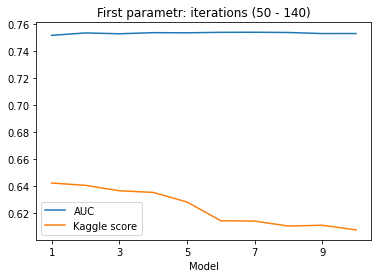

In [82]:
models = [f'{i+1}' for i in range(len(iter_res))]
AUC = iter_res
kaggle = iter_score

df = pd.DataFrame(list(zip(models, AUC, kaggle)), columns=['Model', 'AUC', 'Kaggle score'])

ax = df.plot(x='Model', y=['AUC', 'Kaggle score'])
ax.set_title("First parametr: iterations (50 - 140)")

plt.show()

In [86]:
models = [f'{i+1}' for i in range(len(bagg_res))]
AUC = bagg_res
kaggle = bagg_score

df = pd.DataFrame(list(zip(models, AUC, kaggle)), columns=['Model', 'AUC', 'Kaggle score'])

ax = df.plot(x='Model', y=['AUC', 'Kaggle score'])
ax.set_title("Second parametr: bagging_temperature (1 - 0.1)")

plt.show()

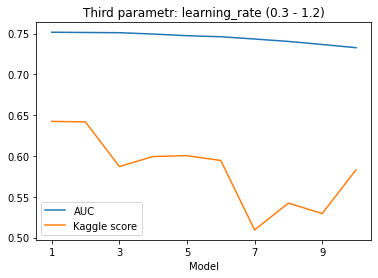

In [85]:
models = [f'{i+1}' for i in range(len(learnrate_res))]
AUC = learnrate_res
kaggle = learnrate_score

df = pd.DataFrame(list(zip(models, AUC, kaggle)), columns=['Model', 'AUC', 'Kaggle score'])

ax = df.plot(x='Model', y=['AUC', 'Kaggle score'])
ax.set_title("Third parametr: learning_rate (0.3 - 1.2)")

plt.show()

Количество соверашемых итераций влияет на качество предсказаний, но переобучение не зафиксировано
По полученным результатам можно сказать, что параметр bagging_temperature никак не влияет на обучение или предсказание результатов на тестовых данных (пыталась также увеличивать, а не уменьшать гиперапараметр - результат на Kaggle все равно был одинаковым). Изменения при learning_rate скорее является случайными, нельзя выделить момент с переобучением.

Попробуем также выбрать оптимальную модель с помощью RandomizedSearchCV и GridSearchCV

In [111]:
import random

In [138]:
model = CatBoostClassifier()

param_distribution = {
    #'iterations': random.randrange(10,200, 10),# - не могу передать в модель
    'bagging_temperature': stats.uniform(0, 1),
    'learning_rate': stats.uniform(0, 1)
}
param_distribution

{'bagging_temperature': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f3a453f9e80>,
 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f3a4545e9b0>}

In [146]:
param_distribution = {
    'learning_rate': stats.uniform(0, 1),
    'l2_leaf_reg': stats.bernoulli(p=0.2, loc=2),
    'depth': stats.binom(n=10, p=0.2)
}

In [147]:
randomized_search_results = model.randomized_search(param_distribution,
    X_norm_train.fillna(0), Y_train.fillna(0),
    n_iter=6,
    shuffle=False,
    search_by_train_test_split=False,
    verbose=0,
    plot=True
)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	learn: 0.3770085	test: 0.3767992	best: 0.3767992 (0)	total: 1.63s	remaining: 27m 10s
1:	learn: 0.2969649	test: 0.2969276	best: 0.2969276 (1)	total: 2.6s	remaining: 21m 35s
2:	learn: 0.2743206	test: 0.2742479	best: 0.2742479 (2)	total: 3.2s	remaining: 17m 43s
3:	learn: 0.2669321	test: 0.2666349	best: 0.2666349 (3)	total: 4.82s	remaining: 20m
4:	learn: 0.2621552	test: 0.2620179	best: 0.2620179 (4)	total: 6.38s	remaining: 21m 10s
5:	learn: 0.2605743	test: 0.2604539	best: 0.2604539 (5)	total: 7.59s	remaining: 20m 57s
6:	learn: 0.2597323	test: 0.2596088	best: 0.2596088 (6)	total: 8.39s	remaining: 19m 50s
7:	learn: 0.2586413	test: 0.2585222	best: 0.2585222 (7)	total: 9.61s	remaining: 19m 51s
8:	learn: 0.2567426	test: 0.2567362	best: 0.2567362 (8)	total: 10s	remaining: 18m 22s
9:	learn: 0.2561289	test: 0.2561102	best: 0.2561102 (9)	total: 10.8s	remaining: 17m 48s
10:	learn: 0.2556360	test: 0.2556209	best: 0.2556209 (10)	total: 11.8s	remaining: 17m 40s
11:	learn: 0.25

92:	learn: 0.2470206	test: 0.2485996	best: 0.2485996 (92)	total: 1m 21s	remaining: 13m 15s
93:	learn: 0.2469493	test: 0.2485249	best: 0.2485249 (93)	total: 1m 22s	remaining: 13m 12s
94:	learn: 0.2469016	test: 0.2485296	best: 0.2485249 (93)	total: 1m 22s	remaining: 13m 10s
95:	learn: 0.2468689	test: 0.2485078	best: 0.2485078 (95)	total: 1m 24s	remaining: 13m 16s
96:	learn: 0.2468517	test: 0.2485102	best: 0.2485078 (95)	total: 1m 25s	remaining: 13m 14s
97:	learn: 0.2468142	test: 0.2484572	best: 0.2484572 (97)	total: 1m 25s	remaining: 13m 11s
98:	learn: 0.2467747	test: 0.2484622	best: 0.2484572 (97)	total: 1m 26s	remaining: 13m 9s
99:	learn: 0.2467364	test: 0.2484542	best: 0.2484542 (99)	total: 1m 27s	remaining: 13m 6s
100:	learn: 0.2467067	test: 0.2484471	best: 0.2484471 (100)	total: 1m 27s	remaining: 13m 2s
101:	learn: 0.2466677	test: 0.2484142	best: 0.2484142 (101)	total: 1m 28s	remaining: 12m 59s
102:	learn: 0.2466287	test: 0.2483915	best: 0.2483915 (102)	total: 1m 29s	remaining: 12m 

181:	learn: 0.2444387	test: 0.2476470	best: 0.2476380 (167)	total: 2m 31s	remaining: 11m 20s
182:	learn: 0.2444020	test: 0.2476680	best: 0.2476380 (167)	total: 2m 31s	remaining: 11m 18s
183:	learn: 0.2443873	test: 0.2476738	best: 0.2476380 (167)	total: 2m 32s	remaining: 11m 16s
184:	learn: 0.2443581	test: 0.2476728	best: 0.2476380 (167)	total: 2m 33s	remaining: 11m 14s
185:	learn: 0.2443432	test: 0.2476828	best: 0.2476380 (167)	total: 2m 33s	remaining: 11m 12s
186:	learn: 0.2443290	test: 0.2476785	best: 0.2476380 (167)	total: 2m 34s	remaining: 11m 10s
187:	learn: 0.2443235	test: 0.2476687	best: 0.2476380 (167)	total: 2m 34s	remaining: 11m 8s
188:	learn: 0.2443076	test: 0.2476699	best: 0.2476380 (167)	total: 2m 35s	remaining: 11m 7s
189:	learn: 0.2442882	test: 0.2476626	best: 0.2476380 (167)	total: 2m 36s	remaining: 11m 5s
190:	learn: 0.2442708	test: 0.2476595	best: 0.2476380 (167)	total: 2m 36s	remaining: 11m 2s
191:	learn: 0.2442545	test: 0.2476444	best: 0.2476380 (167)	total: 2m 37s	

270:	learn: 0.2427425	test: 0.2471685	best: 0.2471685 (270)	total: 3m 29s	remaining: 9m 22s
271:	learn: 0.2427253	test: 0.2471755	best: 0.2471685 (270)	total: 3m 29s	remaining: 9m 21s
272:	learn: 0.2427151	test: 0.2471790	best: 0.2471685 (270)	total: 3m 30s	remaining: 9m 19s
273:	learn: 0.2426803	test: 0.2471644	best: 0.2471644 (273)	total: 3m 30s	remaining: 9m 18s
274:	learn: 0.2426721	test: 0.2471650	best: 0.2471644 (273)	total: 3m 31s	remaining: 9m 16s
275:	learn: 0.2426582	test: 0.2471754	best: 0.2471644 (273)	total: 3m 31s	remaining: 9m 15s
276:	learn: 0.2426405	test: 0.2471814	best: 0.2471644 (273)	total: 3m 32s	remaining: 9m 14s
277:	learn: 0.2426295	test: 0.2471830	best: 0.2471644 (273)	total: 3m 33s	remaining: 9m 13s
278:	learn: 0.2426137	test: 0.2471815	best: 0.2471644 (273)	total: 3m 34s	remaining: 9m 14s
279:	learn: 0.2426067	test: 0.2471857	best: 0.2471644 (273)	total: 3m 35s	remaining: 9m 14s
280:	learn: 0.2426037	test: 0.2471866	best: 0.2471644 (273)	total: 3m 37s	remain

360:	learn: 0.2413569	test: 0.2472627	best: 0.2471644 (273)	total: 4m 35s	remaining: 8m 7s
361:	learn: 0.2413458	test: 0.2472513	best: 0.2471644 (273)	total: 4m 36s	remaining: 8m 7s
362:	learn: 0.2413284	test: 0.2472805	best: 0.2471644 (273)	total: 4m 37s	remaining: 8m 6s
363:	learn: 0.2413283	test: 0.2472806	best: 0.2471644 (273)	total: 4m 38s	remaining: 8m 6s
364:	learn: 0.2413213	test: 0.2472940	best: 0.2471644 (273)	total: 4m 39s	remaining: 8m 5s
365:	learn: 0.2413155	test: 0.2472901	best: 0.2471644 (273)	total: 4m 40s	remaining: 8m 5s
366:	learn: 0.2413150	test: 0.2472889	best: 0.2471644 (273)	total: 4m 40s	remaining: 8m 4s
367:	learn: 0.2412994	test: 0.2472993	best: 0.2471644 (273)	total: 4m 41s	remaining: 8m 3s
368:	learn: 0.2412784	test: 0.2472950	best: 0.2471644 (273)	total: 4m 42s	remaining: 8m 3s
369:	learn: 0.2412632	test: 0.2472814	best: 0.2471644 (273)	total: 4m 43s	remaining: 8m 2s
370:	learn: 0.2412398	test: 0.2472964	best: 0.2471644 (273)	total: 4m 43s	remaining: 8m 1s

450:	learn: 0.2399582	test: 0.2473332	best: 0.2471644 (273)	total: 5m 44s	remaining: 6m 58s
451:	learn: 0.2399289	test: 0.2473298	best: 0.2471644 (273)	total: 5m 44s	remaining: 6m 57s
452:	learn: 0.2399019	test: 0.2473333	best: 0.2471644 (273)	total: 5m 45s	remaining: 6m 56s
453:	learn: 0.2398836	test: 0.2473395	best: 0.2471644 (273)	total: 5m 45s	remaining: 6m 55s
454:	learn: 0.2398701	test: 0.2473397	best: 0.2471644 (273)	total: 5m 46s	remaining: 6m 54s
455:	learn: 0.2398543	test: 0.2473219	best: 0.2471644 (273)	total: 5m 47s	remaining: 6m 54s
456:	learn: 0.2398479	test: 0.2473240	best: 0.2471644 (273)	total: 5m 48s	remaining: 6m 53s
457:	learn: 0.2398377	test: 0.2473364	best: 0.2471644 (273)	total: 5m 48s	remaining: 6m 52s
458:	learn: 0.2398235	test: 0.2473361	best: 0.2471644 (273)	total: 5m 49s	remaining: 6m 52s
459:	learn: 0.2398090	test: 0.2473139	best: 0.2471644 (273)	total: 5m 50s	remaining: 6m 51s
460:	learn: 0.2397936	test: 0.2473289	best: 0.2471644 (273)	total: 5m 50s	remain

540:	learn: 0.2387071	test: 0.2474932	best: 0.2471644 (273)	total: 6m 44s	remaining: 5m 43s
541:	learn: 0.2386944	test: 0.2474765	best: 0.2471644 (273)	total: 6m 45s	remaining: 5m 42s
542:	learn: 0.2386778	test: 0.2474712	best: 0.2471644 (273)	total: 6m 46s	remaining: 5m 41s
543:	learn: 0.2386701	test: 0.2474761	best: 0.2471644 (273)	total: 6m 46s	remaining: 5m 40s
544:	learn: 0.2386551	test: 0.2474847	best: 0.2471644 (273)	total: 6m 47s	remaining: 5m 39s
545:	learn: 0.2386421	test: 0.2474743	best: 0.2471644 (273)	total: 6m 47s	remaining: 5m 39s
546:	learn: 0.2386344	test: 0.2474802	best: 0.2471644 (273)	total: 6m 48s	remaining: 5m 38s
547:	learn: 0.2386019	test: 0.2474782	best: 0.2471644 (273)	total: 6m 50s	remaining: 5m 38s
548:	learn: 0.2385890	test: 0.2474685	best: 0.2471644 (273)	total: 6m 51s	remaining: 5m 37s
549:	learn: 0.2385813	test: 0.2474697	best: 0.2471644 (273)	total: 6m 52s	remaining: 5m 37s
550:	learn: 0.2385630	test: 0.2474687	best: 0.2471644 (273)	total: 6m 53s	remain

630:	learn: 0.2377411	test: 0.2475938	best: 0.2471644 (273)	total: 7m 51s	remaining: 4m 35s
631:	learn: 0.2377351	test: 0.2476069	best: 0.2471644 (273)	total: 7m 52s	remaining: 4m 34s
632:	learn: 0.2377284	test: 0.2476034	best: 0.2471644 (273)	total: 7m 52s	remaining: 4m 34s
633:	learn: 0.2377259	test: 0.2476069	best: 0.2471644 (273)	total: 7m 53s	remaining: 4m 33s
634:	learn: 0.2376939	test: 0.2476143	best: 0.2471644 (273)	total: 7m 54s	remaining: 4m 32s
635:	learn: 0.2376872	test: 0.2476178	best: 0.2471644 (273)	total: 7m 55s	remaining: 4m 31s
636:	learn: 0.2376798	test: 0.2476356	best: 0.2471644 (273)	total: 7m 55s	remaining: 4m 31s
637:	learn: 0.2376623	test: 0.2476292	best: 0.2471644 (273)	total: 7m 56s	remaining: 4m 30s
638:	learn: 0.2376539	test: 0.2476166	best: 0.2471644 (273)	total: 7m 57s	remaining: 4m 29s
639:	learn: 0.2376442	test: 0.2476197	best: 0.2471644 (273)	total: 7m 57s	remaining: 4m 28s
640:	learn: 0.2376332	test: 0.2476216	best: 0.2471644 (273)	total: 7m 58s	remain

720:	learn: 0.2368054	test: 0.2478549	best: 0.2471644 (273)	total: 9m	remaining: 3m 29s
721:	learn: 0.2367903	test: 0.2478481	best: 0.2471644 (273)	total: 9m	remaining: 3m 28s
722:	learn: 0.2367736	test: 0.2478240	best: 0.2471644 (273)	total: 9m 1s	remaining: 3m 27s
723:	learn: 0.2367560	test: 0.2478286	best: 0.2471644 (273)	total: 9m 1s	remaining: 3m 26s
724:	learn: 0.2367453	test: 0.2478102	best: 0.2471644 (273)	total: 9m 2s	remaining: 3m 25s
725:	learn: 0.2367380	test: 0.2478157	best: 0.2471644 (273)	total: 9m 2s	remaining: 3m 24s
726:	learn: 0.2367255	test: 0.2478239	best: 0.2471644 (273)	total: 9m 3s	remaining: 3m 24s
727:	learn: 0.2367202	test: 0.2478208	best: 0.2471644 (273)	total: 9m 4s	remaining: 3m 23s
728:	learn: 0.2367030	test: 0.2478135	best: 0.2471644 (273)	total: 9m 5s	remaining: 3m 22s
729:	learn: 0.2366904	test: 0.2478035	best: 0.2471644 (273)	total: 9m 6s	remaining: 3m 21s
730:	learn: 0.2366883	test: 0.2478083	best: 0.2471644 (273)	total: 9m 6s	remaining: 3m 21s
731:	

810:	learn: 0.2359873	test: 0.2479237	best: 0.2471644 (273)	total: 10m 4s	remaining: 2m 20s
811:	learn: 0.2359865	test: 0.2479227	best: 0.2471644 (273)	total: 10m 4s	remaining: 2m 20s
812:	learn: 0.2359748	test: 0.2479243	best: 0.2471644 (273)	total: 10m 5s	remaining: 2m 19s
813:	learn: 0.2359613	test: 0.2479118	best: 0.2471644 (273)	total: 10m 6s	remaining: 2m 18s
814:	learn: 0.2359469	test: 0.2479018	best: 0.2471644 (273)	total: 10m 7s	remaining: 2m 17s
815:	learn: 0.2359339	test: 0.2479058	best: 0.2471644 (273)	total: 10m 8s	remaining: 2m 17s
816:	learn: 0.2359242	test: 0.2479050	best: 0.2471644 (273)	total: 10m 9s	remaining: 2m 16s
817:	learn: 0.2359117	test: 0.2478994	best: 0.2471644 (273)	total: 10m 10s	remaining: 2m 15s
818:	learn: 0.2359027	test: 0.2478869	best: 0.2471644 (273)	total: 10m 10s	remaining: 2m 15s
819:	learn: 0.2358945	test: 0.2478885	best: 0.2471644 (273)	total: 10m 11s	remaining: 2m 14s
820:	learn: 0.2358864	test: 0.2478866	best: 0.2471644 (273)	total: 10m 12s	re

899:	learn: 0.2350586	test: 0.2480992	best: 0.2471644 (273)	total: 11m 11s	remaining: 1m 14s
900:	learn: 0.2350477	test: 0.2481018	best: 0.2471644 (273)	total: 11m 12s	remaining: 1m 13s
901:	learn: 0.2350442	test: 0.2481024	best: 0.2471644 (273)	total: 11m 13s	remaining: 1m 13s
902:	learn: 0.2350363	test: 0.2481144	best: 0.2471644 (273)	total: 11m 14s	remaining: 1m 12s
903:	learn: 0.2350193	test: 0.2481168	best: 0.2471644 (273)	total: 11m 15s	remaining: 1m 11s
904:	learn: 0.2350138	test: 0.2481250	best: 0.2471644 (273)	total: 11m 15s	remaining: 1m 10s
905:	learn: 0.2350125	test: 0.2481221	best: 0.2471644 (273)	total: 11m 16s	remaining: 1m 10s
906:	learn: 0.2350063	test: 0.2481240	best: 0.2471644 (273)	total: 11m 17s	remaining: 1m 9s
907:	learn: 0.2350018	test: 0.2481216	best: 0.2471644 (273)	total: 11m 18s	remaining: 1m 8s
908:	learn: 0.2349865	test: 0.2481506	best: 0.2471644 (273)	total: 11m 20s	remaining: 1m 8s
909:	learn: 0.2349744	test: 0.2481412	best: 0.2471644 (273)	total: 11m 21

989:	learn: 0.2342307	test: 0.2483488	best: 0.2471644 (273)	total: 12m 17s	remaining: 7.45s
990:	learn: 0.2342254	test: 0.2483497	best: 0.2471644 (273)	total: 12m 17s	remaining: 6.7s
991:	learn: 0.2342150	test: 0.2483342	best: 0.2471644 (273)	total: 12m 18s	remaining: 5.95s
992:	learn: 0.2341988	test: 0.2483310	best: 0.2471644 (273)	total: 12m 18s	remaining: 5.21s
993:	learn: 0.2341923	test: 0.2483358	best: 0.2471644 (273)	total: 12m 19s	remaining: 4.46s
994:	learn: 0.2341795	test: 0.2483352	best: 0.2471644 (273)	total: 12m 19s	remaining: 3.72s
995:	learn: 0.2341722	test: 0.2483365	best: 0.2471644 (273)	total: 12m 20s	remaining: 2.97s
996:	learn: 0.2341722	test: 0.2483365	best: 0.2471644 (273)	total: 12m 21s	remaining: 2.23s
997:	learn: 0.2341689	test: 0.2483478	best: 0.2471644 (273)	total: 12m 21s	remaining: 1.49s
998:	learn: 0.2341538	test: 0.2483256	best: 0.2471644 (273)	total: 12m 22s	remaining: 743ms
999:	learn: 0.2341403	test: 0.2483172	best: 0.2471644 (273)	total: 12m 23s	remain

80:	learn: 0.2470834	test: 0.2500291	best: 0.2500216 (79)	total: 58.2s	remaining: 11m
81:	learn: 0.2470448	test: 0.2500203	best: 0.2500203 (81)	total: 58.6s	remaining: 10m 56s
82:	learn: 0.2470042	test: 0.2500066	best: 0.2500066 (82)	total: 59.4s	remaining: 10m 56s
83:	learn: 0.2468506	test: 0.2499126	best: 0.2499126 (83)	total: 60s	remaining: 10m 54s
84:	learn: 0.2468334	test: 0.2499030	best: 0.2499030 (84)	total: 1m	remaining: 10m 54s
85:	learn: 0.2467661	test: 0.2498844	best: 0.2498844 (85)	total: 1m 1s	remaining: 10m 52s
86:	learn: 0.2467344	test: 0.2498879	best: 0.2498844 (85)	total: 1m 1s	remaining: 10m 48s
87:	learn: 0.2466979	test: 0.2499028	best: 0.2498844 (85)	total: 1m 2s	remaining: 10m 46s
88:	learn: 0.2466423	test: 0.2498564	best: 0.2498564 (88)	total: 1m 2s	remaining: 10m 44s
89:	learn: 0.2466225	test: 0.2498667	best: 0.2498564 (88)	total: 1m 3s	remaining: 10m 42s
90:	learn: 0.2465879	test: 0.2498331	best: 0.2498331 (90)	total: 1m 4s	remaining: 10m 41s
91:	learn: 0.246526

170:	learn: 0.2439468	test: 0.2486325	best: 0.2486325 (170)	total: 2m 2s	remaining: 9m 52s
171:	learn: 0.2439341	test: 0.2486261	best: 0.2486261 (171)	total: 2m 2s	remaining: 9m 51s
172:	learn: 0.2439331	test: 0.2486262	best: 0.2486261 (171)	total: 2m 3s	remaining: 9m 50s
173:	learn: 0.2439113	test: 0.2486347	best: 0.2486261 (171)	total: 2m 4s	remaining: 9m 50s
174:	learn: 0.2438853	test: 0.2486230	best: 0.2486230 (174)	total: 2m 4s	remaining: 9m 49s
175:	learn: 0.2438407	test: 0.2486029	best: 0.2486029 (175)	total: 2m 5s	remaining: 9m 47s
176:	learn: 0.2438166	test: 0.2486204	best: 0.2486029 (175)	total: 2m 6s	remaining: 9m 48s
177:	learn: 0.2438045	test: 0.2486191	best: 0.2486029 (175)	total: 2m 7s	remaining: 9m 49s
178:	learn: 0.2437741	test: 0.2485691	best: 0.2485691 (178)	total: 2m 9s	remaining: 9m 52s
179:	learn: 0.2437550	test: 0.2485489	best: 0.2485489 (179)	total: 2m 10s	remaining: 9m 53s
180:	learn: 0.2437371	test: 0.2485523	best: 0.2485489 (179)	total: 2m 10s	remaining: 9m 5

410:	learn: 0.2400747	test: 0.2483542	best: 0.2482903 (408)	total: 4m 43s	remaining: 6m 46s
411:	learn: 0.2400657	test: 0.2483579	best: 0.2482903 (408)	total: 4m 44s	remaining: 6m 45s
412:	learn: 0.2400531	test: 0.2483694	best: 0.2482903 (408)	total: 4m 44s	remaining: 6m 44s
413:	learn: 0.2400472	test: 0.2483659	best: 0.2482903 (408)	total: 4m 45s	remaining: 6m 43s
414:	learn: 0.2400353	test: 0.2483752	best: 0.2482903 (408)	total: 4m 45s	remaining: 6m 42s
415:	learn: 0.2400191	test: 0.2483773	best: 0.2482903 (408)	total: 4m 46s	remaining: 6m 41s
416:	learn: 0.2400083	test: 0.2483788	best: 0.2482903 (408)	total: 4m 47s	remaining: 6m 41s
417:	learn: 0.2399995	test: 0.2483828	best: 0.2482903 (408)	total: 4m 48s	remaining: 6m 41s
418:	learn: 0.2399921	test: 0.2483820	best: 0.2482903 (408)	total: 4m 49s	remaining: 6m 40s
419:	learn: 0.2399751	test: 0.2483598	best: 0.2482903 (408)	total: 4m 49s	remaining: 6m 40s
420:	learn: 0.2399525	test: 0.2483543	best: 0.2482903 (408)	total: 4m 50s	remain

500:	learn: 0.2388687	test: 0.2484053	best: 0.2482903 (408)	total: 5m 43s	remaining: 5m 41s
501:	learn: 0.2388577	test: 0.2484067	best: 0.2482903 (408)	total: 5m 43s	remaining: 5m 40s
502:	learn: 0.2388514	test: 0.2484139	best: 0.2482903 (408)	total: 5m 44s	remaining: 5m 39s
503:	learn: 0.2388378	test: 0.2484046	best: 0.2482903 (408)	total: 5m 44s	remaining: 5m 39s
504:	learn: 0.2388274	test: 0.2484056	best: 0.2482903 (408)	total: 5m 45s	remaining: 5m 38s
505:	learn: 0.2388229	test: 0.2484044	best: 0.2482903 (408)	total: 5m 45s	remaining: 5m 37s
506:	learn: 0.2388175	test: 0.2484055	best: 0.2482903 (408)	total: 5m 46s	remaining: 5m 36s
507:	learn: 0.2388057	test: 0.2484224	best: 0.2482903 (408)	total: 5m 47s	remaining: 5m 36s
508:	learn: 0.2387933	test: 0.2484358	best: 0.2482903 (408)	total: 5m 48s	remaining: 5m 35s
509:	learn: 0.2387736	test: 0.2484395	best: 0.2482903 (408)	total: 5m 49s	remaining: 5m 35s
510:	learn: 0.2387546	test: 0.2484226	best: 0.2482903 (408)	total: 5m 50s	remain

590:	learn: 0.2377397	test: 0.2484393	best: 0.2482903 (408)	total: 6m 44s	remaining: 4m 39s
591:	learn: 0.2377297	test: 0.2484373	best: 0.2482903 (408)	total: 6m 44s	remaining: 4m 39s
592:	learn: 0.2377072	test: 0.2484340	best: 0.2482903 (408)	total: 6m 45s	remaining: 4m 38s
593:	learn: 0.2377027	test: 0.2484357	best: 0.2482903 (408)	total: 6m 46s	remaining: 4m 38s
594:	learn: 0.2376914	test: 0.2484436	best: 0.2482903 (408)	total: 6m 47s	remaining: 4m 37s
595:	learn: 0.2376783	test: 0.2484659	best: 0.2482903 (408)	total: 6m 47s	remaining: 4m 36s
596:	learn: 0.2376642	test: 0.2484617	best: 0.2482903 (408)	total: 6m 48s	remaining: 4m 35s
597:	learn: 0.2376477	test: 0.2484722	best: 0.2482903 (408)	total: 6m 48s	remaining: 4m 34s
598:	learn: 0.2376172	test: 0.2484964	best: 0.2482903 (408)	total: 6m 49s	remaining: 4m 33s
599:	learn: 0.2376083	test: 0.2484951	best: 0.2482903 (408)	total: 6m 49s	remaining: 4m 33s
600:	learn: 0.2375969	test: 0.2484940	best: 0.2482903 (408)	total: 6m 50s	remain

680:	learn: 0.2366708	test: 0.2486546	best: 0.2482903 (408)	total: 7m 48s	remaining: 3m 39s
681:	learn: 0.2366617	test: 0.2486475	best: 0.2482903 (408)	total: 7m 48s	remaining: 3m 38s
682:	learn: 0.2366446	test: 0.2486457	best: 0.2482903 (408)	total: 7m 49s	remaining: 3m 37s
683:	learn: 0.2366382	test: 0.2486520	best: 0.2482903 (408)	total: 7m 49s	remaining: 3m 37s
684:	learn: 0.2366206	test: 0.2486573	best: 0.2482903 (408)	total: 7m 50s	remaining: 3m 36s
685:	learn: 0.2366067	test: 0.2486625	best: 0.2482903 (408)	total: 7m 52s	remaining: 3m 36s
686:	learn: 0.2365914	test: 0.2486601	best: 0.2482903 (408)	total: 7m 53s	remaining: 3m 35s
687:	learn: 0.2365831	test: 0.2486605	best: 0.2482903 (408)	total: 7m 53s	remaining: 3m 34s
688:	learn: 0.2365775	test: 0.2486656	best: 0.2482903 (408)	total: 7m 54s	remaining: 3m 34s
689:	learn: 0.2365601	test: 0.2486809	best: 0.2482903 (408)	total: 7m 54s	remaining: 3m 33s
690:	learn: 0.2365497	test: 0.2486888	best: 0.2482903 (408)	total: 7m 55s	remain

770:	learn: 0.2356758	test: 0.2488294	best: 0.2482903 (408)	total: 8m 50s	remaining: 2m 37s
771:	learn: 0.2356564	test: 0.2488344	best: 0.2482903 (408)	total: 8m 50s	remaining: 2m 36s
772:	learn: 0.2356340	test: 0.2488342	best: 0.2482903 (408)	total: 8m 51s	remaining: 2m 36s
773:	learn: 0.2356274	test: 0.2488166	best: 0.2482903 (408)	total: 8m 51s	remaining: 2m 35s
774:	learn: 0.2356146	test: 0.2488226	best: 0.2482903 (408)	total: 8m 52s	remaining: 2m 34s
775:	learn: 0.2356049	test: 0.2488257	best: 0.2482903 (408)	total: 8m 52s	remaining: 2m 33s
776:	learn: 0.2355977	test: 0.2488269	best: 0.2482903 (408)	total: 8m 53s	remaining: 2m 33s
777:	learn: 0.2355838	test: 0.2488150	best: 0.2482903 (408)	total: 8m 53s	remaining: 2m 32s
778:	learn: 0.2355808	test: 0.2488150	best: 0.2482903 (408)	total: 8m 54s	remaining: 2m 31s
779:	learn: 0.2355717	test: 0.2488055	best: 0.2482903 (408)	total: 8m 54s	remaining: 2m 30s
780:	learn: 0.2355610	test: 0.2487949	best: 0.2482903 (408)	total: 8m 55s	remain

981:	learn: 0.2337893	test: 0.2491442	best: 0.2482903 (408)	total: 11m 6s	remaining: 12.2s
982:	learn: 0.2337808	test: 0.2491470	best: 0.2482903 (408)	total: 11m 8s	remaining: 11.6s
983:	learn: 0.2337712	test: 0.2491478	best: 0.2482903 (408)	total: 11m 9s	remaining: 10.9s
984:	learn: 0.2337606	test: 0.2491545	best: 0.2482903 (408)	total: 11m 9s	remaining: 10.2s
985:	learn: 0.2337522	test: 0.2491649	best: 0.2482903 (408)	total: 11m 10s	remaining: 9.52s
986:	learn: 0.2337418	test: 0.2491708	best: 0.2482903 (408)	total: 11m 10s	remaining: 8.84s
987:	learn: 0.2337382	test: 0.2491780	best: 0.2482903 (408)	total: 11m 11s	remaining: 8.15s
988:	learn: 0.2337340	test: 0.2491792	best: 0.2482903 (408)	total: 11m 12s	remaining: 7.48s
989:	learn: 0.2337258	test: 0.2491801	best: 0.2482903 (408)	total: 11m 12s	remaining: 6.8s
990:	learn: 0.2337222	test: 0.2491796	best: 0.2482903 (408)	total: 11m 13s	remaining: 6.12s
991:	learn: 0.2337117	test: 0.2491828	best: 0.2482903 (408)	total: 11m 14s	remaining:

72:	learn: 0.2477942	test: 0.2486759	best: 0.2486759 (72)	total: 50.2s	remaining: 10m 37s
73:	learn: 0.2477494	test: 0.2486517	best: 0.2486517 (73)	total: 50.8s	remaining: 10m 35s
74:	learn: 0.2477026	test: 0.2486216	best: 0.2486216 (74)	total: 51.2s	remaining: 10m 31s
75:	learn: 0.2476493	test: 0.2485748	best: 0.2485748 (75)	total: 51.8s	remaining: 10m 29s
76:	learn: 0.2476149	test: 0.2485679	best: 0.2485679 (76)	total: 52.2s	remaining: 10m 25s
77:	learn: 0.2475817	test: 0.2485558	best: 0.2485558 (77)	total: 52.8s	remaining: 10m 23s
78:	learn: 0.2475552	test: 0.2485801	best: 0.2485558 (77)	total: 54s	remaining: 10m 29s
79:	learn: 0.2475355	test: 0.2485819	best: 0.2485558 (77)	total: 54.6s	remaining: 10m 27s
80:	learn: 0.2474972	test: 0.2485521	best: 0.2485521 (80)	total: 55s	remaining: 10m 23s
81:	learn: 0.2474754	test: 0.2485527	best: 0.2485521 (80)	total: 55.4s	remaining: 10m 20s
82:	learn: 0.2474606	test: 0.2485650	best: 0.2485521 (80)	total: 56s	remaining: 10m 18s
83:	learn: 0.247

162:	learn: 0.2451607	test: 0.2475902	best: 0.2475782 (159)	total: 1m 56s	remaining: 9m 58s
163:	learn: 0.2451463	test: 0.2475855	best: 0.2475782 (159)	total: 1m 57s	remaining: 9m 58s
164:	learn: 0.2451302	test: 0.2475903	best: 0.2475782 (159)	total: 1m 57s	remaining: 9m 57s
165:	learn: 0.2450703	test: 0.2475334	best: 0.2475334 (165)	total: 1m 58s	remaining: 9m 55s
166:	learn: 0.2450456	test: 0.2475350	best: 0.2475334 (165)	total: 1m 58s	remaining: 9m 53s
167:	learn: 0.2450099	test: 0.2474997	best: 0.2474997 (167)	total: 1m 59s	remaining: 9m 52s
168:	learn: 0.2449866	test: 0.2474704	best: 0.2474704 (168)	total: 1m 59s	remaining: 9m 49s
169:	learn: 0.2449639	test: 0.2474719	best: 0.2474704 (168)	total: 2m	remaining: 9m 49s
170:	learn: 0.2449445	test: 0.2474778	best: 0.2474704 (168)	total: 2m 1s	remaining: 9m 47s
171:	learn: 0.2449279	test: 0.2474945	best: 0.2474704 (168)	total: 2m 1s	remaining: 9m 46s
172:	learn: 0.2449109	test: 0.2475282	best: 0.2474704 (168)	total: 2m 2s	remaining: 9m

252:	learn: 0.2433026	test: 0.2472253	best: 0.2471847 (220)	total: 3m	remaining: 8m 53s
253:	learn: 0.2432900	test: 0.2472249	best: 0.2471847 (220)	total: 3m 1s	remaining: 8m 52s
254:	learn: 0.2432852	test: 0.2472309	best: 0.2471847 (220)	total: 3m 2s	remaining: 8m 53s
255:	learn: 0.2432798	test: 0.2472326	best: 0.2471847 (220)	total: 3m 3s	remaining: 8m 54s
256:	learn: 0.2432617	test: 0.2472263	best: 0.2471847 (220)	total: 3m 5s	remaining: 8m 55s
257:	learn: 0.2432261	test: 0.2471969	best: 0.2471847 (220)	total: 3m 6s	remaining: 8m 55s
258:	learn: 0.2432011	test: 0.2471776	best: 0.2471776 (258)	total: 3m 7s	remaining: 8m 57s
259:	learn: 0.2431843	test: 0.2471823	best: 0.2471776 (258)	total: 3m 9s	remaining: 8m 59s
260:	learn: 0.2431581	test: 0.2471736	best: 0.2471736 (260)	total: 3m 11s	remaining: 9m 1s
261:	learn: 0.2431459	test: 0.2471671	best: 0.2471671 (261)	total: 3m 12s	remaining: 9m 3s
262:	learn: 0.2431376	test: 0.2471694	best: 0.2471671 (261)	total: 3m 13s	remaining: 9m 2s
26

342:	learn: 0.2419638	test: 0.2472142	best: 0.2471361 (324)	total: 4m 18s	remaining: 8m 14s
343:	learn: 0.2419498	test: 0.2472123	best: 0.2471361 (324)	total: 4m 19s	remaining: 8m 14s
344:	learn: 0.2419385	test: 0.2472138	best: 0.2471361 (324)	total: 4m 19s	remaining: 8m 13s
345:	learn: 0.2419256	test: 0.2472272	best: 0.2471361 (324)	total: 4m 20s	remaining: 8m 12s
346:	learn: 0.2419092	test: 0.2472270	best: 0.2471361 (324)	total: 4m 20s	remaining: 8m 10s
347:	learn: 0.2418606	test: 0.2472002	best: 0.2471361 (324)	total: 4m 21s	remaining: 8m 9s
348:	learn: 0.2418451	test: 0.2471738	best: 0.2471361 (324)	total: 4m 21s	remaining: 8m 8s
349:	learn: 0.2418342	test: 0.2471734	best: 0.2471361 (324)	total: 4m 22s	remaining: 8m 7s
350:	learn: 0.2418112	test: 0.2471744	best: 0.2471361 (324)	total: 4m 22s	remaining: 8m 5s
351:	learn: 0.2417859	test: 0.2471714	best: 0.2471361 (324)	total: 4m 23s	remaining: 8m 4s
352:	learn: 0.2417848	test: 0.2471710	best: 0.2471361 (324)	total: 4m 23s	remaining: 

432:	learn: 0.2405501	test: 0.2471017	best: 0.2470805 (400)	total: 5m 9s	remaining: 6m 45s
433:	learn: 0.2405412	test: 0.2471097	best: 0.2470805 (400)	total: 5m 10s	remaining: 6m 44s
434:	learn: 0.2405107	test: 0.2470824	best: 0.2470805 (400)	total: 5m 10s	remaining: 6m 43s
435:	learn: 0.2405046	test: 0.2470793	best: 0.2470793 (435)	total: 5m 11s	remaining: 6m 42s
436:	learn: 0.2404924	test: 0.2470624	best: 0.2470624 (436)	total: 5m 12s	remaining: 6m 42s
437:	learn: 0.2404770	test: 0.2470776	best: 0.2470624 (436)	total: 5m 12s	remaining: 6m 41s
438:	learn: 0.2404625	test: 0.2470837	best: 0.2470624 (436)	total: 5m 12s	remaining: 6m 39s
439:	learn: 0.2404425	test: 0.2470941	best: 0.2470624 (436)	total: 5m 13s	remaining: 6m 38s
440:	learn: 0.2404330	test: 0.2471068	best: 0.2470624 (436)	total: 5m 13s	remaining: 6m 37s
441:	learn: 0.2404164	test: 0.2471150	best: 0.2470624 (436)	total: 5m 14s	remaining: 6m 36s
442:	learn: 0.2404038	test: 0.2471100	best: 0.2470624 (436)	total: 5m 14s	remaini

522:	learn: 0.2393600	test: 0.2470822	best: 0.2470347 (506)	total: 5m 57s	remaining: 5m 26s
523:	learn: 0.2393421	test: 0.2470973	best: 0.2470347 (506)	total: 5m 57s	remaining: 5m 25s
524:	learn: 0.2393318	test: 0.2471060	best: 0.2470347 (506)	total: 5m 58s	remaining: 5m 24s
525:	learn: 0.2393259	test: 0.2471092	best: 0.2470347 (506)	total: 5m 58s	remaining: 5m 23s
526:	learn: 0.2393084	test: 0.2471113	best: 0.2470347 (506)	total: 5m 59s	remaining: 5m 22s
527:	learn: 0.2392920	test: 0.2471261	best: 0.2470347 (506)	total: 5m 59s	remaining: 5m 21s
528:	learn: 0.2392773	test: 0.2471281	best: 0.2470347 (506)	total: 5m 59s	remaining: 5m 20s
529:	learn: 0.2392680	test: 0.2471349	best: 0.2470347 (506)	total: 6m	remaining: 5m 19s
530:	learn: 0.2392486	test: 0.2471359	best: 0.2470347 (506)	total: 6m	remaining: 5m 18s
531:	learn: 0.2392373	test: 0.2471349	best: 0.2470347 (506)	total: 6m	remaining: 5m 17s
532:	learn: 0.2392192	test: 0.2471387	best: 0.2470347 (506)	total: 6m 1s	remaining: 5m 16s
5

612:	learn: 0.2383249	test: 0.2473983	best: 0.2470347 (506)	total: 6m 47s	remaining: 4m 17s
613:	learn: 0.2383104	test: 0.2473885	best: 0.2470347 (506)	total: 6m 48s	remaining: 4m 16s
614:	learn: 0.2382942	test: 0.2474020	best: 0.2470347 (506)	total: 6m 48s	remaining: 4m 15s
615:	learn: 0.2382801	test: 0.2474053	best: 0.2470347 (506)	total: 6m 49s	remaining: 4m 15s
616:	learn: 0.2382659	test: 0.2474061	best: 0.2470347 (506)	total: 6m 50s	remaining: 4m 14s
617:	learn: 0.2382612	test: 0.2474099	best: 0.2470347 (506)	total: 6m 51s	remaining: 4m 14s
618:	learn: 0.2382567	test: 0.2474041	best: 0.2470347 (506)	total: 6m 51s	remaining: 4m 13s
619:	learn: 0.2382448	test: 0.2474111	best: 0.2470347 (506)	total: 6m 52s	remaining: 4m 12s
620:	learn: 0.2382317	test: 0.2474108	best: 0.2470347 (506)	total: 6m 52s	remaining: 4m 11s
621:	learn: 0.2382178	test: 0.2474131	best: 0.2470347 (506)	total: 6m 53s	remaining: 4m 10s
622:	learn: 0.2382066	test: 0.2474153	best: 0.2470347 (506)	total: 6m 53s	remain

702:	learn: 0.2373336	test: 0.2474755	best: 0.2470347 (506)	total: 7m 46s	remaining: 3m 17s
703:	learn: 0.2373169	test: 0.2474728	best: 0.2470347 (506)	total: 7m 47s	remaining: 3m 16s
704:	learn: 0.2373041	test: 0.2474602	best: 0.2470347 (506)	total: 7m 49s	remaining: 3m 16s
705:	learn: 0.2372928	test: 0.2474718	best: 0.2470347 (506)	total: 7m 50s	remaining: 3m 15s
706:	learn: 0.2372695	test: 0.2474657	best: 0.2470347 (506)	total: 7m 51s	remaining: 3m 15s
707:	learn: 0.2372594	test: 0.2474710	best: 0.2470347 (506)	total: 7m 51s	remaining: 3m 14s
708:	learn: 0.2372398	test: 0.2474825	best: 0.2470347 (506)	total: 7m 53s	remaining: 3m 14s
709:	learn: 0.2372323	test: 0.2474958	best: 0.2470347 (506)	total: 7m 55s	remaining: 3m 14s
710:	learn: 0.2372220	test: 0.2474809	best: 0.2470347 (506)	total: 7m 56s	remaining: 3m 13s
711:	learn: 0.2372136	test: 0.2474823	best: 0.2470347 (506)	total: 7m 57s	remaining: 3m 13s
712:	learn: 0.2372040	test: 0.2474807	best: 0.2470347 (506)	total: 7m 59s	remain

792:	learn: 0.2363884	test: 0.2474961	best: 0.2470347 (506)	total: 8m 43s	remaining: 2m 16s
793:	learn: 0.2363823	test: 0.2475001	best: 0.2470347 (506)	total: 8m 44s	remaining: 2m 16s
794:	learn: 0.2363688	test: 0.2475126	best: 0.2470347 (506)	total: 8m 45s	remaining: 2m 15s
795:	learn: 0.2363619	test: 0.2475166	best: 0.2470347 (506)	total: 8m 46s	remaining: 2m 14s
796:	learn: 0.2363529	test: 0.2475250	best: 0.2470347 (506)	total: 8m 47s	remaining: 2m 14s
797:	learn: 0.2363423	test: 0.2475407	best: 0.2470347 (506)	total: 8m 48s	remaining: 2m 13s
798:	learn: 0.2363351	test: 0.2475335	best: 0.2470347 (506)	total: 8m 49s	remaining: 2m 13s
799:	learn: 0.2363263	test: 0.2475421	best: 0.2470347 (506)	total: 8m 50s	remaining: 2m 12s
800:	learn: 0.2363263	test: 0.2475421	best: 0.2470347 (506)	total: 8m 51s	remaining: 2m 12s
801:	learn: 0.2363202	test: 0.2475363	best: 0.2470347 (506)	total: 8m 52s	remaining: 2m 11s
802:	learn: 0.2363057	test: 0.2475488	best: 0.2470347 (506)	total: 8m 52s	remain

964:	learn: 0.2346580	test: 0.2478876	best: 0.2470347 (506)	total: 10m 55s	remaining: 23.8s
965:	learn: 0.2346547	test: 0.2478899	best: 0.2470347 (506)	total: 10m 56s	remaining: 23.1s
966:	learn: 0.2346386	test: 0.2478980	best: 0.2470347 (506)	total: 10m 56s	remaining: 22.4s
967:	learn: 0.2346343	test: 0.2478891	best: 0.2470347 (506)	total: 10m 56s	remaining: 21.7s
968:	learn: 0.2346263	test: 0.2478895	best: 0.2470347 (506)	total: 10m 57s	remaining: 21s
969:	learn: 0.2346138	test: 0.2478839	best: 0.2470347 (506)	total: 10m 57s	remaining: 20.3s
970:	learn: 0.2346072	test: 0.2478867	best: 0.2470347 (506)	total: 10m 58s	remaining: 19.7s
971:	learn: 0.2345971	test: 0.2478779	best: 0.2470347 (506)	total: 10m 58s	remaining: 19s
972:	learn: 0.2345882	test: 0.2478921	best: 0.2470347 (506)	total: 10m 59s	remaining: 18.3s
973:	learn: 0.2345760	test: 0.2478880	best: 0.2470347 (506)	total: 11m	remaining: 17.6s
974:	learn: 0.2345661	test: 0.2478983	best: 0.2470347 (506)	total: 11m	remaining: 16.9s


55:	learn: 0.2952440	test: 0.2952771	best: 0.2952771 (55)	total: 36.6s	remaining: 10m 16s
56:	learn: 0.2939043	test: 0.2939423	best: 0.2939423 (56)	total: 37.8s	remaining: 10m 24s
57:	learn: 0.2926801	test: 0.2927156	best: 0.2927156 (57)	total: 39.1s	remaining: 10m 35s
58:	learn: 0.2912995	test: 0.2913314	best: 0.2913314 (58)	total: 40.2s	remaining: 10m 40s
59:	learn: 0.2900908	test: 0.2901246	best: 0.2901246 (59)	total: 41.6s	remaining: 10m 51s
60:	learn: 0.2888245	test: 0.2888643	best: 0.2888643 (60)	total: 42.8s	remaining: 10m 58s
61:	learn: 0.2877094	test: 0.2877568	best: 0.2877568 (61)	total: 44.1s	remaining: 11m 7s
62:	learn: 0.2865874	test: 0.2866351	best: 0.2866351 (62)	total: 45.4s	remaining: 11m 14s
63:	learn: 0.2856204	test: 0.2856676	best: 0.2856676 (63)	total: 46.9s	remaining: 11m 26s
64:	learn: 0.2846800	test: 0.2847222	best: 0.2847222 (64)	total: 48.4s	remaining: 11m 35s
65:	learn: 0.2837712	test: 0.2838093	best: 0.2838093 (65)	total: 49.5s	remaining: 11m 41s
66:	learn: 

145:	learn: 0.2604042	test: 0.2604799	best: 0.2604799 (145)	total: 1m 49s	remaining: 10m 38s
146:	learn: 0.2603265	test: 0.2604088	best: 0.2604088 (146)	total: 1m 49s	remaining: 10m 35s
147:	learn: 0.2602392	test: 0.2603211	best: 0.2603211 (147)	total: 1m 49s	remaining: 10m 32s
148:	learn: 0.2601751	test: 0.2602561	best: 0.2602561 (148)	total: 1m 50s	remaining: 10m 30s
149:	learn: 0.2600736	test: 0.2601591	best: 0.2601591 (149)	total: 1m 50s	remaining: 10m 27s
150:	learn: 0.2599951	test: 0.2600843	best: 0.2600843 (150)	total: 1m 51s	remaining: 10m 25s
151:	learn: 0.2599110	test: 0.2600072	best: 0.2600072 (151)	total: 1m 51s	remaining: 10m 22s
152:	learn: 0.2598582	test: 0.2599531	best: 0.2599531 (152)	total: 1m 51s	remaining: 10m 19s
153:	learn: 0.2597790	test: 0.2598738	best: 0.2598738 (153)	total: 1m 52s	remaining: 10m 17s
154:	learn: 0.2597140	test: 0.2598149	best: 0.2598149 (154)	total: 1m 53s	remaining: 10m 17s
155:	learn: 0.2596582	test: 0.2597564	best: 0.2597564 (155)	total: 1m 

235:	learn: 0.2563774	test: 0.2565821	best: 0.2565821 (235)	total: 2m 45s	remaining: 8m 55s
236:	learn: 0.2563477	test: 0.2565522	best: 0.2565522 (236)	total: 2m 45s	remaining: 8m 53s
237:	learn: 0.2563164	test: 0.2565217	best: 0.2565217 (237)	total: 2m 46s	remaining: 8m 51s
238:	learn: 0.2562760	test: 0.2564806	best: 0.2564806 (238)	total: 2m 47s	remaining: 8m 52s
239:	learn: 0.2562461	test: 0.2564539	best: 0.2564539 (239)	total: 2m 48s	remaining: 8m 54s
240:	learn: 0.2562139	test: 0.2564241	best: 0.2564241 (240)	total: 2m 50s	remaining: 8m 55s
241:	learn: 0.2561847	test: 0.2563956	best: 0.2563956 (241)	total: 2m 51s	remaining: 8m 56s
242:	learn: 0.2561567	test: 0.2563704	best: 0.2563704 (242)	total: 2m 52s	remaining: 8m 58s
243:	learn: 0.2561168	test: 0.2563321	best: 0.2563321 (243)	total: 2m 53s	remaining: 8m 57s
244:	learn: 0.2560746	test: 0.2562891	best: 0.2562891 (244)	total: 2m 53s	remaining: 8m 55s
245:	learn: 0.2560501	test: 0.2562657	best: 0.2562657 (245)	total: 2m 54s	remain

325:	learn: 0.2542256	test: 0.2545062	best: 0.2545062 (325)	total: 3m 52s	remaining: 8m
326:	learn: 0.2542008	test: 0.2544822	best: 0.2544822 (326)	total: 3m 52s	remaining: 7m 58s
327:	learn: 0.2541882	test: 0.2544699	best: 0.2544699 (327)	total: 3m 53s	remaining: 7m 57s
328:	learn: 0.2541712	test: 0.2544522	best: 0.2544522 (328)	total: 3m 53s	remaining: 7m 55s
329:	learn: 0.2541594	test: 0.2544391	best: 0.2544391 (329)	total: 3m 53s	remaining: 7m 54s
330:	learn: 0.2541226	test: 0.2544045	best: 0.2544045 (330)	total: 3m 54s	remaining: 7m 53s
331:	learn: 0.2541033	test: 0.2543834	best: 0.2543834 (331)	total: 3m 54s	remaining: 7m 51s
332:	learn: 0.2540895	test: 0.2543720	best: 0.2543720 (332)	total: 3m 54s	remaining: 7m 50s
333:	learn: 0.2540516	test: 0.2543367	best: 0.2543367 (333)	total: 3m 55s	remaining: 7m 49s
334:	learn: 0.2540335	test: 0.2543201	best: 0.2543201 (334)	total: 3m 55s	remaining: 7m 47s
335:	learn: 0.2540176	test: 0.2543041	best: 0.2543041 (335)	total: 3m 56s	remaining:

415:	learn: 0.2527893	test: 0.2531084	best: 0.2531084 (415)	total: 4m 48s	remaining: 6m 45s
416:	learn: 0.2527787	test: 0.2531001	best: 0.2531001 (416)	total: 4m 49s	remaining: 6m 44s
417:	learn: 0.2527709	test: 0.2530917	best: 0.2530917 (417)	total: 4m 49s	remaining: 6m 43s
418:	learn: 0.2527624	test: 0.2530862	best: 0.2530862 (418)	total: 4m 50s	remaining: 6m 42s
419:	learn: 0.2527528	test: 0.2530756	best: 0.2530756 (419)	total: 4m 50s	remaining: 6m 41s
420:	learn: 0.2527378	test: 0.2530607	best: 0.2530607 (420)	total: 4m 51s	remaining: 6m 40s
421:	learn: 0.2527077	test: 0.2530323	best: 0.2530323 (421)	total: 4m 51s	remaining: 6m 39s
422:	learn: 0.2527018	test: 0.2530268	best: 0.2530268 (422)	total: 4m 52s	remaining: 6m 38s
423:	learn: 0.2526907	test: 0.2530183	best: 0.2530183 (423)	total: 4m 53s	remaining: 6m 38s
424:	learn: 0.2526816	test: 0.2530094	best: 0.2530094 (424)	total: 4m 54s	remaining: 6m 38s
425:	learn: 0.2526755	test: 0.2530029	best: 0.2530029 (425)	total: 4m 55s	remain

505:	learn: 0.2518762	test: 0.2522385	best: 0.2522385 (505)	total: 6m 4s	remaining: 5m 55s
506:	learn: 0.2518680	test: 0.2522315	best: 0.2522315 (506)	total: 6m 4s	remaining: 5m 54s
507:	learn: 0.2518446	test: 0.2522081	best: 0.2522081 (507)	total: 6m 5s	remaining: 5m 53s
508:	learn: 0.2518344	test: 0.2522001	best: 0.2522001 (508)	total: 6m 5s	remaining: 5m 52s
509:	learn: 0.2518294	test: 0.2521946	best: 0.2521946 (509)	total: 6m 7s	remaining: 5m 52s
510:	learn: 0.2518227	test: 0.2521884	best: 0.2521884 (510)	total: 6m 8s	remaining: 5m 52s
511:	learn: 0.2518127	test: 0.2521801	best: 0.2521801 (511)	total: 6m 9s	remaining: 5m 52s
512:	learn: 0.2518034	test: 0.2521724	best: 0.2521724 (512)	total: 6m 11s	remaining: 5m 52s
513:	learn: 0.2517964	test: 0.2521629	best: 0.2521629 (513)	total: 6m 12s	remaining: 5m 51s
514:	learn: 0.2517872	test: 0.2521530	best: 0.2521530 (514)	total: 6m 12s	remaining: 5m 51s
515:	learn: 0.2517796	test: 0.2521458	best: 0.2521458 (515)	total: 6m 13s	remaining: 5m

595:	learn: 0.2510812	test: 0.2514803	best: 0.2514803 (595)	total: 7m 21s	remaining: 4m 59s
596:	learn: 0.2510770	test: 0.2514784	best: 0.2514784 (596)	total: 7m 23s	remaining: 4m 59s
597:	learn: 0.2510714	test: 0.2514731	best: 0.2514731 (597)	total: 7m 25s	remaining: 4m 59s
598:	learn: 0.2510647	test: 0.2514656	best: 0.2514656 (598)	total: 7m 26s	remaining: 4m 58s
599:	learn: 0.2510556	test: 0.2514563	best: 0.2514563 (599)	total: 7m 27s	remaining: 4m 58s
600:	learn: 0.2510505	test: 0.2514521	best: 0.2514521 (600)	total: 7m 27s	remaining: 4m 57s
601:	learn: 0.2510442	test: 0.2514470	best: 0.2514470 (601)	total: 7m 29s	remaining: 4m 56s
602:	learn: 0.2510374	test: 0.2514402	best: 0.2514402 (602)	total: 7m 30s	remaining: 4m 56s
603:	learn: 0.2510334	test: 0.2514353	best: 0.2514353 (603)	total: 7m 31s	remaining: 4m 55s
604:	learn: 0.2510223	test: 0.2514237	best: 0.2514237 (604)	total: 7m 32s	remaining: 4m 55s
605:	learn: 0.2510163	test: 0.2514210	best: 0.2514210 (605)	total: 7m 33s	remain

685:	learn: 0.2504539	test: 0.2508944	best: 0.2508944 (685)	total: 8m 29s	remaining: 3m 53s
686:	learn: 0.2504463	test: 0.2508883	best: 0.2508883 (686)	total: 8m 29s	remaining: 3m 52s
687:	learn: 0.2504348	test: 0.2508775	best: 0.2508775 (687)	total: 8m 30s	remaining: 3m 51s
688:	learn: 0.2504287	test: 0.2508729	best: 0.2508729 (688)	total: 8m 32s	remaining: 3m 51s
689:	learn: 0.2504234	test: 0.2508668	best: 0.2508668 (689)	total: 8m 33s	remaining: 3m 50s
690:	learn: 0.2504193	test: 0.2508639	best: 0.2508639 (690)	total: 8m 35s	remaining: 3m 50s
691:	learn: 0.2504082	test: 0.2508535	best: 0.2508535 (691)	total: 8m 36s	remaining: 3m 49s
692:	learn: 0.2504042	test: 0.2508510	best: 0.2508510 (692)	total: 8m 37s	remaining: 3m 49s
693:	learn: 0.2503968	test: 0.2508427	best: 0.2508427 (693)	total: 8m 38s	remaining: 3m 48s
694:	learn: 0.2503865	test: 0.2508330	best: 0.2508330 (694)	total: 8m 38s	remaining: 3m 47s
695:	learn: 0.2503777	test: 0.2508253	best: 0.2508253 (695)	total: 8m 39s	remain

775:	learn: 0.2499608	test: 0.2504732	best: 0.2504732 (775)	total: 9m 25s	remaining: 2m 43s
776:	learn: 0.2499569	test: 0.2504704	best: 0.2504704 (776)	total: 9m 26s	remaining: 2m 42s
777:	learn: 0.2499515	test: 0.2504648	best: 0.2504648 (777)	total: 9m 27s	remaining: 2m 42s
778:	learn: 0.2499473	test: 0.2504607	best: 0.2504607 (778)	total: 9m 28s	remaining: 2m 41s
779:	learn: 0.2499413	test: 0.2504572	best: 0.2504572 (779)	total: 9m 29s	remaining: 2m 40s
780:	learn: 0.2499379	test: 0.2504534	best: 0.2504534 (780)	total: 9m 30s	remaining: 2m 39s
781:	learn: 0.2499338	test: 0.2504481	best: 0.2504481 (781)	total: 9m 30s	remaining: 2m 39s
782:	learn: 0.2499294	test: 0.2504459	best: 0.2504459 (782)	total: 9m 31s	remaining: 2m 38s
783:	learn: 0.2499241	test: 0.2504407	best: 0.2504407 (783)	total: 9m 31s	remaining: 2m 37s
784:	learn: 0.2499160	test: 0.2504332	best: 0.2504332 (784)	total: 9m 32s	remaining: 2m 36s
785:	learn: 0.2499099	test: 0.2504261	best: 0.2504261 (785)	total: 9m 34s	remain

864:	learn: 0.2495718	test: 0.2501241	best: 0.2501241 (864)	total: 10m 30s	remaining: 1m 38s
865:	learn: 0.2495672	test: 0.2501198	best: 0.2501198 (865)	total: 10m 31s	remaining: 1m 37s
866:	learn: 0.2495626	test: 0.2501156	best: 0.2501156 (866)	total: 10m 31s	remaining: 1m 36s
867:	learn: 0.2495584	test: 0.2501100	best: 0.2501100 (867)	total: 10m 31s	remaining: 1m 36s
868:	learn: 0.2495564	test: 0.2501096	best: 0.2501096 (868)	total: 10m 32s	remaining: 1m 35s
869:	learn: 0.2495511	test: 0.2501053	best: 0.2501053 (869)	total: 10m 32s	remaining: 1m 34s
870:	learn: 0.2495490	test: 0.2501057	best: 0.2501053 (869)	total: 10m 33s	remaining: 1m 33s
871:	learn: 0.2495468	test: 0.2501049	best: 0.2501049 (871)	total: 10m 34s	remaining: 1m 33s
872:	learn: 0.2495436	test: 0.2501024	best: 0.2501024 (872)	total: 10m 34s	remaining: 1m 32s
873:	learn: 0.2495408	test: 0.2501006	best: 0.2501006 (873)	total: 10m 35s	remaining: 1m 31s
874:	learn: 0.2495369	test: 0.2500997	best: 0.2500997 (874)	total: 10m

953:	learn: 0.2492370	test: 0.2498418	best: 0.2498418 (953)	total: 11m 25s	remaining: 33s
954:	learn: 0.2492344	test: 0.2498386	best: 0.2498386 (954)	total: 11m 25s	remaining: 32.3s
955:	learn: 0.2492303	test: 0.2498337	best: 0.2498337 (955)	total: 11m 26s	remaining: 31.6s
956:	learn: 0.2492284	test: 0.2498330	best: 0.2498330 (956)	total: 11m 28s	remaining: 30.9s
957:	learn: 0.2492248	test: 0.2498311	best: 0.2498311 (957)	total: 11m 29s	remaining: 30.2s
958:	learn: 0.2492221	test: 0.2498280	best: 0.2498280 (958)	total: 11m 31s	remaining: 29.6s
959:	learn: 0.2492159	test: 0.2498209	best: 0.2498209 (959)	total: 11m 32s	remaining: 28.8s
960:	learn: 0.2492114	test: 0.2498165	best: 0.2498165 (960)	total: 11m 32s	remaining: 28.1s
961:	learn: 0.2492061	test: 0.2498111	best: 0.2498111 (961)	total: 11m 33s	remaining: 27.4s
962:	learn: 0.2492043	test: 0.2498116	best: 0.2498111 (961)	total: 11m 34s	remaining: 26.7s
963:	learn: 0.2492019	test: 0.2498097	best: 0.2498097 (963)	total: 11m 35s	remaini

43:	learn: 0.3164026	test: 0.3167770	best: 0.3167770 (43)	total: 30.4s	remaining: 11m
44:	learn: 0.3142056	test: 0.3145775	best: 0.3145775 (44)	total: 31s	remaining: 10m 57s
45:	learn: 0.3121602	test: 0.3125252	best: 0.3125252 (45)	total: 31.4s	remaining: 10m 51s
46:	learn: 0.3098881	test: 0.3102670	best: 0.3102670 (46)	total: 32s	remaining: 10m 48s
47:	learn: 0.3079842	test: 0.3083755	best: 0.3083755 (47)	total: 32.8s	remaining: 10m 50s
48:	learn: 0.3060031	test: 0.3064139	best: 0.3064139 (48)	total: 33.4s	remaining: 10m 47s
49:	learn: 0.3042384	test: 0.3046461	best: 0.3046461 (49)	total: 33.8s	remaining: 10m 42s
50:	learn: 0.3023315	test: 0.3027509	best: 0.3027509 (50)	total: 35s	remaining: 10m 51s
51:	learn: 0.3006816	test: 0.3011028	best: 0.3011028 (51)	total: 35.8s	remaining: 10m 52s
52:	learn: 0.2992032	test: 0.2996261	best: 0.2996261 (52)	total: 37.6s	remaining: 11m 11s
53:	learn: 0.2976516	test: 0.2980791	best: 0.2980791 (53)	total: 38.4s	remaining: 11m 12s
54:	learn: 0.2962055

201:	learn: 0.2568227	test: 0.2578319	best: 0.2578319 (201)	total: 2m 47s	remaining: 11m 1s
202:	learn: 0.2567860	test: 0.2577998	best: 0.2577998 (202)	total: 2m 48s	remaining: 11m 1s
203:	learn: 0.2567629	test: 0.2577774	best: 0.2577774 (203)	total: 2m 49s	remaining: 11m 2s
204:	learn: 0.2567297	test: 0.2577463	best: 0.2577463 (204)	total: 2m 50s	remaining: 11m 2s
205:	learn: 0.2567059	test: 0.2577231	best: 0.2577231 (205)	total: 2m 51s	remaining: 11m 2s
206:	learn: 0.2566631	test: 0.2576841	best: 0.2576841 (206)	total: 2m 52s	remaining: 11m 2s
207:	learn: 0.2566212	test: 0.2576413	best: 0.2576413 (207)	total: 2m 54s	remaining: 11m 4s
208:	learn: 0.2565856	test: 0.2576040	best: 0.2576040 (208)	total: 2m 56s	remaining: 11m 8s
209:	learn: 0.2565596	test: 0.2575801	best: 0.2575801 (209)	total: 2m 57s	remaining: 11m 8s
210:	learn: 0.2565370	test: 0.2575575	best: 0.2575575 (210)	total: 2m 59s	remaining: 11m 9s
211:	learn: 0.2565023	test: 0.2575205	best: 0.2575205 (211)	total: 3m	remaining:

290:	learn: 0.2545312	test: 0.2556459	best: 0.2556459 (290)	total: 4m 44s	remaining: 11m 32s
291:	learn: 0.2545110	test: 0.2556244	best: 0.2556244 (291)	total: 4m 45s	remaining: 11m 33s
292:	learn: 0.2544935	test: 0.2556095	best: 0.2556095 (292)	total: 4m 46s	remaining: 11m 31s
293:	learn: 0.2544768	test: 0.2555951	best: 0.2555951 (293)	total: 4m 47s	remaining: 11m 30s
294:	learn: 0.2544575	test: 0.2555792	best: 0.2555792 (294)	total: 4m 49s	remaining: 11m 30s
295:	learn: 0.2544077	test: 0.2555298	best: 0.2555298 (295)	total: 4m 50s	remaining: 11m 31s
296:	learn: 0.2543872	test: 0.2555095	best: 0.2555095 (296)	total: 4m 52s	remaining: 11m 32s
297:	learn: 0.2543724	test: 0.2554956	best: 0.2554956 (297)	total: 4m 54s	remaining: 11m 33s
298:	learn: 0.2543552	test: 0.2554796	best: 0.2554796 (298)	total: 4m 56s	remaining: 11m 34s
299:	learn: 0.2543319	test: 0.2554583	best: 0.2554583 (299)	total: 4m 58s	remaining: 11m 36s
300:	learn: 0.2543189	test: 0.2554476	best: 0.2554476 (300)	total: 5m	

379:	learn: 0.2530114	test: 0.2541913	best: 0.2541913 (379)	total: 6m 27s	remaining: 10m 32s
380:	learn: 0.2529999	test: 0.2541803	best: 0.2541803 (380)	total: 6m 27s	remaining: 10m 29s
381:	learn: 0.2529870	test: 0.2541677	best: 0.2541677 (381)	total: 6m 28s	remaining: 10m 28s
382:	learn: 0.2529800	test: 0.2541616	best: 0.2541616 (382)	total: 6m 29s	remaining: 10m 27s
383:	learn: 0.2529662	test: 0.2541479	best: 0.2541479 (383)	total: 6m 30s	remaining: 10m 26s
384:	learn: 0.2529503	test: 0.2541317	best: 0.2541317 (384)	total: 6m 31s	remaining: 10m 25s
385:	learn: 0.2529372	test: 0.2541191	best: 0.2541191 (385)	total: 6m 32s	remaining: 10m 24s
386:	learn: 0.2529255	test: 0.2541063	best: 0.2541063 (386)	total: 6m 33s	remaining: 10m 23s
387:	learn: 0.2529172	test: 0.2540999	best: 0.2540999 (387)	total: 6m 33s	remaining: 10m 21s
388:	learn: 0.2529054	test: 0.2540880	best: 0.2540880 (388)	total: 6m 34s	remaining: 10m 19s
389:	learn: 0.2528942	test: 0.2540774	best: 0.2540774 (389)	total: 6m 

469:	learn: 0.2518504	test: 0.2531241	best: 0.2531241 (469)	total: 8m 14s	remaining: 9m 17s
470:	learn: 0.2518404	test: 0.2531147	best: 0.2531147 (470)	total: 8m 15s	remaining: 9m 16s
471:	learn: 0.2518331	test: 0.2531099	best: 0.2531099 (471)	total: 8m 17s	remaining: 9m 16s
472:	learn: 0.2518244	test: 0.2531021	best: 0.2531021 (472)	total: 8m 18s	remaining: 9m 15s
473:	learn: 0.2518174	test: 0.2530964	best: 0.2530964 (473)	total: 8m 20s	remaining: 9m 15s
474:	learn: 0.2518076	test: 0.2530860	best: 0.2530860 (474)	total: 8m 21s	remaining: 9m 14s
475:	learn: 0.2517935	test: 0.2530708	best: 0.2530708 (475)	total: 8m 23s	remaining: 9m 14s
476:	learn: 0.2517856	test: 0.2530641	best: 0.2530641 (476)	total: 8m 24s	remaining: 9m 13s
477:	learn: 0.2517753	test: 0.2530544	best: 0.2530544 (477)	total: 8m 25s	remaining: 9m 11s
478:	learn: 0.2517688	test: 0.2530498	best: 0.2530498 (478)	total: 8m 25s	remaining: 9m 10s
479:	learn: 0.2517589	test: 0.2530410	best: 0.2530410 (479)	total: 8m 26s	remain

559:	learn: 0.2510347	test: 0.2523753	best: 0.2523753 (559)	total: 9m 51s	remaining: 7m 44s
560:	learn: 0.2510290	test: 0.2523701	best: 0.2523701 (560)	total: 9m 51s	remaining: 7m 43s
561:	learn: 0.2510239	test: 0.2523659	best: 0.2523659 (561)	total: 9m 52s	remaining: 7m 41s
562:	learn: 0.2510175	test: 0.2523602	best: 0.2523602 (562)	total: 9m 52s	remaining: 7m 39s
563:	learn: 0.2510106	test: 0.2523540	best: 0.2523540 (563)	total: 9m 53s	remaining: 7m 38s
564:	learn: 0.2510034	test: 0.2523462	best: 0.2523462 (564)	total: 9m 53s	remaining: 7m 36s
565:	learn: 0.2509980	test: 0.2523420	best: 0.2523420 (565)	total: 9m 53s	remaining: 7m 35s
566:	learn: 0.2509898	test: 0.2523372	best: 0.2523372 (566)	total: 9m 54s	remaining: 7m 33s
567:	learn: 0.2509810	test: 0.2523320	best: 0.2523320 (567)	total: 9m 54s	remaining: 7m 32s
568:	learn: 0.2509739	test: 0.2523253	best: 0.2523253 (568)	total: 9m 54s	remaining: 7m 30s
569:	learn: 0.2509661	test: 0.2523197	best: 0.2523197 (569)	total: 9m 55s	remain

648:	learn: 0.2503669	test: 0.2518037	best: 0.2518037 (648)	total: 10m 39s	remaining: 5m 46s
649:	learn: 0.2503608	test: 0.2517992	best: 0.2517992 (649)	total: 10m 40s	remaining: 5m 44s
650:	learn: 0.2503562	test: 0.2517981	best: 0.2517981 (650)	total: 10m 41s	remaining: 5m 44s
651:	learn: 0.2503493	test: 0.2517917	best: 0.2517917 (651)	total: 10m 42s	remaining: 5m 43s
652:	learn: 0.2503445	test: 0.2517864	best: 0.2517864 (652)	total: 10m 43s	remaining: 5m 41s
653:	learn: 0.2503380	test: 0.2517822	best: 0.2517822 (653)	total: 10m 43s	remaining: 5m 40s
654:	learn: 0.2503336	test: 0.2517792	best: 0.2517792 (654)	total: 10m 43s	remaining: 5m 39s
655:	learn: 0.2503177	test: 0.2517640	best: 0.2517640 (655)	total: 10m 43s	remaining: 5m 37s
656:	learn: 0.2503107	test: 0.2517584	best: 0.2517584 (656)	total: 10m 44s	remaining: 5m 36s
657:	learn: 0.2503044	test: 0.2517545	best: 0.2517545 (657)	total: 10m 44s	remaining: 5m 35s
658:	learn: 0.2502989	test: 0.2517505	best: 0.2517505 (658)	total: 10m

737:	learn: 0.2497779	test: 0.2513322	best: 0.2513322 (737)	total: 11m 37s	remaining: 4m 7s
738:	learn: 0.2497756	test: 0.2513304	best: 0.2513304 (738)	total: 11m 37s	remaining: 4m 6s
739:	learn: 0.2497700	test: 0.2513267	best: 0.2513267 (739)	total: 11m 39s	remaining: 4m 5s
740:	learn: 0.2497672	test: 0.2513248	best: 0.2513248 (740)	total: 11m 39s	remaining: 4m 4s
741:	learn: 0.2497619	test: 0.2513200	best: 0.2513200 (741)	total: 11m 40s	remaining: 4m 3s
742:	learn: 0.2497534	test: 0.2513106	best: 0.2513106 (742)	total: 11m 40s	remaining: 4m 2s
743:	learn: 0.2497480	test: 0.2513082	best: 0.2513082 (743)	total: 11m 42s	remaining: 4m 1s
744:	learn: 0.2497373	test: 0.2512984	best: 0.2512984 (744)	total: 11m 43s	remaining: 4m
745:	learn: 0.2497326	test: 0.2512950	best: 0.2512950 (745)	total: 11m 44s	remaining: 4m
746:	learn: 0.2497260	test: 0.2512902	best: 0.2512902 (746)	total: 11m 46s	remaining: 3m 59s
747:	learn: 0.2497224	test: 0.2512871	best: 0.2512871 (747)	total: 11m 47s	remaining:

826:	learn: 0.2493370	test: 0.2509955	best: 0.2509955 (826)	total: 12m 34s	remaining: 2m 37s
827:	learn: 0.2493335	test: 0.2509927	best: 0.2509927 (827)	total: 12m 35s	remaining: 2m 36s
828:	learn: 0.2493286	test: 0.2509881	best: 0.2509881 (828)	total: 12m 36s	remaining: 2m 36s
829:	learn: 0.2493261	test: 0.2509870	best: 0.2509870 (829)	total: 12m 36s	remaining: 2m 35s
830:	learn: 0.2493215	test: 0.2509834	best: 0.2509834 (830)	total: 12m 37s	remaining: 2m 34s
831:	learn: 0.2493176	test: 0.2509808	best: 0.2509808 (831)	total: 12m 37s	remaining: 2m 33s
832:	learn: 0.2493129	test: 0.2509789	best: 0.2509789 (832)	total: 12m 39s	remaining: 2m 32s
833:	learn: 0.2493082	test: 0.2509761	best: 0.2509761 (833)	total: 12m 39s	remaining: 2m 31s
834:	learn: 0.2493048	test: 0.2509730	best: 0.2509730 (834)	total: 12m 40s	remaining: 2m 30s
835:	learn: 0.2493016	test: 0.2509695	best: 0.2509695 (835)	total: 12m 40s	remaining: 2m 29s
836:	learn: 0.2492962	test: 0.2509635	best: 0.2509635 (836)	total: 12m

915:	learn: 0.2489586	test: 0.2507044	best: 0.2507044 (915)	total: 13m 27s	remaining: 1m 14s
916:	learn: 0.2489555	test: 0.2507016	best: 0.2507016 (916)	total: 13m 27s	remaining: 1m 13s
917:	learn: 0.2489515	test: 0.2507003	best: 0.2507003 (917)	total: 13m 28s	remaining: 1m 12s
918:	learn: 0.2489475	test: 0.2506972	best: 0.2506972 (918)	total: 13m 28s	remaining: 1m 11s
919:	learn: 0.2489436	test: 0.2506954	best: 0.2506954 (919)	total: 13m 28s	remaining: 1m 10s
920:	learn: 0.2489413	test: 0.2506942	best: 0.2506942 (920)	total: 13m 29s	remaining: 1m 9s
921:	learn: 0.2489357	test: 0.2506890	best: 0.2506890 (921)	total: 13m 29s	remaining: 1m 8s
922:	learn: 0.2489336	test: 0.2506885	best: 0.2506885 (922)	total: 13m 29s	remaining: 1m 7s
923:	learn: 0.2489309	test: 0.2506855	best: 0.2506855 (923)	total: 13m 30s	remaining: 1m 6s
924:	learn: 0.2489248	test: 0.2506783	best: 0.2506783 (924)	total: 13m 30s	remaining: 1m 5s
925:	learn: 0.2489210	test: 0.2506743	best: 0.2506743 (925)	total: 13m 31s	

4:	learn: 0.6000205	test: 0.6001254	best: 0.6001254 (4)	total: 3.18s	remaining: 10m 32s
5:	learn: 0.5843470	test: 0.5844381	best: 0.5844381 (5)	total: 4.03s	remaining: 11m 7s
6:	learn: 0.5686217	test: 0.5686907	best: 0.5686907 (6)	total: 4.41s	remaining: 10m 24s
7:	learn: 0.5537683	test: 0.5538079	best: 0.5538079 (7)	total: 4.96s	remaining: 10m 14s
8:	learn: 0.5395616	test: 0.5395638	best: 0.5395638 (8)	total: 5.36s	remaining: 9m 50s
9:	learn: 0.5260152	test: 0.5259790	best: 0.5259790 (9)	total: 5.78s	remaining: 9m 32s
10:	learn: 0.5132713	test: 0.5132166	best: 0.5132166 (10)	total: 6.56s	remaining: 9m 49s
11:	learn: 0.5012546	test: 0.5011902	best: 0.5011902 (11)	total: 7s	remaining: 9m 36s
12:	learn: 0.4904739	test: 0.4904018	best: 0.4904018 (12)	total: 8.15s	remaining: 10m 18s
13:	learn: 0.4796421	test: 0.4795578	best: 0.4795578 (13)	total: 9.37s	remaining: 10m 59s
14:	learn: 0.4698959	test: 0.4698031	best: 0.4698031 (14)	total: 10.2s	remaining: 11m 9s
15:	learn: 0.4604213	test: 0.46

97:	learn: 0.2676975	test: 0.2674782	best: 0.2674782 (97)	total: 1m 6s	remaining: 10m 14s
98:	learn: 0.2674264	test: 0.2672031	best: 0.2672031 (98)	total: 1m 7s	remaining: 10m 18s
99:	learn: 0.2671190	test: 0.2668867	best: 0.2668867 (99)	total: 1m 9s	remaining: 10m 22s
100:	learn: 0.2668603	test: 0.2666247	best: 0.2666247 (100)	total: 1m 10s	remaining: 10m 26s
101:	learn: 0.2666043	test: 0.2663682	best: 0.2663682 (101)	total: 1m 10s	remaining: 10m 24s
102:	learn: 0.2664020	test: 0.2661707	best: 0.2661707 (102)	total: 1m 11s	remaining: 10m 26s
103:	learn: 0.2661832	test: 0.2659507	best: 0.2659507 (103)	total: 1m 12s	remaining: 10m 28s
104:	learn: 0.2659898	test: 0.2657559	best: 0.2657559 (104)	total: 1m 13s	remaining: 10m 28s
105:	learn: 0.2658153	test: 0.2655856	best: 0.2655856 (105)	total: 1m 13s	remaining: 10m 23s
106:	learn: 0.2656025	test: 0.2653686	best: 0.2653686 (106)	total: 1m 14s	remaining: 10m 19s
107:	learn: 0.2653775	test: 0.2651446	best: 0.2651446 (107)	total: 1m 14s	remai

187:	learn: 0.2582467	test: 0.2579063	best: 0.2579063 (187)	total: 2m 5s	remaining: 9m 2s
188:	learn: 0.2582022	test: 0.2578558	best: 0.2578558 (188)	total: 2m 6s	remaining: 9m 1s
189:	learn: 0.2581452	test: 0.2577921	best: 0.2577921 (189)	total: 2m 7s	remaining: 9m 1s
190:	learn: 0.2580976	test: 0.2577454	best: 0.2577454 (190)	total: 2m 7s	remaining: 9m 1s
191:	learn: 0.2580616	test: 0.2577111	best: 0.2577111 (191)	total: 2m 8s	remaining: 9m
192:	learn: 0.2580218	test: 0.2576676	best: 0.2576676 (192)	total: 2m 8s	remaining: 8m 59s
193:	learn: 0.2579887	test: 0.2576334	best: 0.2576334 (193)	total: 2m 9s	remaining: 8m 58s
194:	learn: 0.2579621	test: 0.2576102	best: 0.2576102 (194)	total: 2m 9s	remaining: 8m 56s
195:	learn: 0.2579176	test: 0.2575642	best: 0.2575642 (195)	total: 2m 10s	remaining: 8m 55s
196:	learn: 0.2578906	test: 0.2575387	best: 0.2575387 (196)	total: 2m 10s	remaining: 8m 53s
197:	learn: 0.2578560	test: 0.2575010	best: 0.2575010 (197)	total: 2m 11s	remaining: 8m 51s
198:

277:	learn: 0.2554289	test: 0.2550844	best: 0.2550844 (277)	total: 2m 52s	remaining: 7m 28s
278:	learn: 0.2554034	test: 0.2550622	best: 0.2550622 (278)	total: 2m 53s	remaining: 7m 27s
279:	learn: 0.2553856	test: 0.2550454	best: 0.2550454 (279)	total: 2m 53s	remaining: 7m 27s
280:	learn: 0.2553603	test: 0.2550247	best: 0.2550247 (280)	total: 2m 54s	remaining: 7m 25s
281:	learn: 0.2553409	test: 0.2550059	best: 0.2550059 (281)	total: 2m 54s	remaining: 7m 24s
282:	learn: 0.2553180	test: 0.2549820	best: 0.2549820 (282)	total: 2m 55s	remaining: 7m 23s
283:	learn: 0.2552987	test: 0.2549646	best: 0.2549646 (283)	total: 2m 55s	remaining: 7m 23s
284:	learn: 0.2552725	test: 0.2549385	best: 0.2549385 (284)	total: 2m 56s	remaining: 7m 21s
285:	learn: 0.2552531	test: 0.2549219	best: 0.2549219 (285)	total: 2m 56s	remaining: 7m 20s
286:	learn: 0.2552303	test: 0.2548979	best: 0.2548979 (286)	total: 2m 56s	remaining: 7m 19s
287:	learn: 0.2552163	test: 0.2548882	best: 0.2548882 (287)	total: 2m 57s	remain

367:	learn: 0.2537532	test: 0.2534664	best: 0.2534664 (367)	total: 3m 54s	remaining: 6m 43s
368:	learn: 0.2537426	test: 0.2534545	best: 0.2534545 (368)	total: 3m 55s	remaining: 6m 42s
369:	learn: 0.2537303	test: 0.2534428	best: 0.2534428 (369)	total: 3m 56s	remaining: 6m 42s
370:	learn: 0.2537180	test: 0.2534320	best: 0.2534320 (370)	total: 3m 57s	remaining: 6m 42s
371:	learn: 0.2537085	test: 0.2534246	best: 0.2534246 (371)	total: 3m 58s	remaining: 6m 43s
372:	learn: 0.2536956	test: 0.2534142	best: 0.2534142 (372)	total: 3m 59s	remaining: 6m 41s
373:	learn: 0.2536846	test: 0.2534025	best: 0.2534025 (373)	total: 3m 59s	remaining: 6m 40s
374:	learn: 0.2536684	test: 0.2533845	best: 0.2533845 (374)	total: 3m 59s	remaining: 6m 39s
375:	learn: 0.2536585	test: 0.2533753	best: 0.2533753 (375)	total: 4m	remaining: 6m 38s
376:	learn: 0.2536464	test: 0.2533643	best: 0.2533643 (376)	total: 4m	remaining: 6m 37s
377:	learn: 0.2536364	test: 0.2533562	best: 0.2533562 (377)	total: 4m	remaining: 6m 36s


457:	learn: 0.2526066	test: 0.2524087	best: 0.2524087 (457)	total: 5m 1s	remaining: 5m 56s
458:	learn: 0.2525984	test: 0.2524023	best: 0.2524023 (458)	total: 5m 2s	remaining: 5m 56s
459:	learn: 0.2525893	test: 0.2523942	best: 0.2523942 (459)	total: 5m 2s	remaining: 5m 55s
460:	learn: 0.2525822	test: 0.2523871	best: 0.2523871 (460)	total: 5m 3s	remaining: 5m 55s
461:	learn: 0.2525736	test: 0.2523808	best: 0.2523808 (461)	total: 5m 5s	remaining: 5m 55s
462:	learn: 0.2525629	test: 0.2523699	best: 0.2523699 (462)	total: 5m 5s	remaining: 5m 54s
463:	learn: 0.2525522	test: 0.2523589	best: 0.2523589 (463)	total: 5m 6s	remaining: 5m 54s
464:	learn: 0.2525443	test: 0.2523506	best: 0.2523506 (464)	total: 5m 7s	remaining: 5m 54s
465:	learn: 0.2525368	test: 0.2523444	best: 0.2523444 (465)	total: 5m 9s	remaining: 5m 54s
466:	learn: 0.2525266	test: 0.2523351	best: 0.2523351 (466)	total: 5m 9s	remaining: 5m 53s
467:	learn: 0.2525171	test: 0.2523282	best: 0.2523282 (467)	total: 5m 10s	remaining: 5m 53

547:	learn: 0.2516846	test: 0.2515283	best: 0.2515283 (547)	total: 6m 9s	remaining: 5m 5s
548:	learn: 0.2516785	test: 0.2515216	best: 0.2515216 (548)	total: 6m 10s	remaining: 5m 4s
549:	learn: 0.2516717	test: 0.2515169	best: 0.2515169 (549)	total: 6m 11s	remaining: 5m 4s
550:	learn: 0.2516651	test: 0.2515101	best: 0.2515101 (550)	total: 6m 12s	remaining: 5m 3s
551:	learn: 0.2516577	test: 0.2515024	best: 0.2515024 (551)	total: 6m 13s	remaining: 5m 2s
552:	learn: 0.2516503	test: 0.2514946	best: 0.2514946 (552)	total: 6m 13s	remaining: 5m 2s
553:	learn: 0.2516446	test: 0.2514880	best: 0.2514880 (553)	total: 6m 14s	remaining: 5m 1s
554:	learn: 0.2516389	test: 0.2514835	best: 0.2514835 (554)	total: 6m 16s	remaining: 5m 1s
555:	learn: 0.2516335	test: 0.2514797	best: 0.2514797 (555)	total: 6m 16s	remaining: 5m
556:	learn: 0.2516272	test: 0.2514729	best: 0.2514729 (556)	total: 6m 16s	remaining: 4m 59s
557:	learn: 0.2516204	test: 0.2514664	best: 0.2514664 (557)	total: 6m 17s	remaining: 4m 59s
5

637:	learn: 0.2510296	test: 0.2509250	best: 0.2509250 (637)	total: 7m 10s	remaining: 4m 4s
638:	learn: 0.2510122	test: 0.2509074	best: 0.2509074 (638)	total: 7m 11s	remaining: 4m 3s
639:	learn: 0.2510027	test: 0.2509011	best: 0.2509011 (639)	total: 7m 12s	remaining: 4m 3s
640:	learn: 0.2509985	test: 0.2508974	best: 0.2508974 (640)	total: 7m 13s	remaining: 4m 2s
641:	learn: 0.2509915	test: 0.2508918	best: 0.2508918 (641)	total: 7m 13s	remaining: 4m 2s
642:	learn: 0.2509850	test: 0.2508858	best: 0.2508858 (642)	total: 7m 14s	remaining: 4m 1s
643:	learn: 0.2509782	test: 0.2508796	best: 0.2508796 (643)	total: 7m 15s	remaining: 4m
644:	learn: 0.2509714	test: 0.2508715	best: 0.2508715 (644)	total: 7m 16s	remaining: 4m
645:	learn: 0.2509630	test: 0.2508666	best: 0.2508666 (645)	total: 7m 17s	remaining: 3m 59s
646:	learn: 0.2509588	test: 0.2508629	best: 0.2508629 (646)	total: 7m 18s	remaining: 3m 59s
647:	learn: 0.2509421	test: 0.2508459	best: 0.2508459 (647)	total: 7m 18s	remaining: 3m 58s
64

727:	learn: 0.2504168	test: 0.2503725	best: 0.2503725 (727)	total: 8m 15s	remaining: 3m 5s
728:	learn: 0.2504126	test: 0.2503708	best: 0.2503708 (728)	total: 8m 16s	remaining: 3m 4s
729:	learn: 0.2504015	test: 0.2503605	best: 0.2503605 (729)	total: 8m 17s	remaining: 3m 4s
730:	learn: 0.2503911	test: 0.2503506	best: 0.2503506 (730)	total: 8m 18s	remaining: 3m 3s
731:	learn: 0.2503813	test: 0.2503411	best: 0.2503411 (731)	total: 8m 18s	remaining: 3m 2s
732:	learn: 0.2503759	test: 0.2503355	best: 0.2503355 (732)	total: 8m 18s	remaining: 3m 1s
733:	learn: 0.2503721	test: 0.2503318	best: 0.2503318 (733)	total: 8m 19s	remaining: 3m
734:	learn: 0.2503688	test: 0.2503288	best: 0.2503288 (734)	total: 8m 20s	remaining: 3m
735:	learn: 0.2503637	test: 0.2503234	best: 0.2503234 (735)	total: 8m 21s	remaining: 2m 59s
736:	learn: 0.2503581	test: 0.2503200	best: 0.2503200 (736)	total: 8m 22s	remaining: 2m 59s
737:	learn: 0.2503534	test: 0.2503155	best: 0.2503155 (737)	total: 8m 22s	remaining: 2m 58s
73

817:	learn: 0.2499367	test: 0.2499666	best: 0.2499666 (817)	total: 9m 17s	remaining: 2m 4s
818:	learn: 0.2499334	test: 0.2499644	best: 0.2499644 (818)	total: 9m 18s	remaining: 2m 3s
819:	learn: 0.2499282	test: 0.2499600	best: 0.2499600 (819)	total: 9m 19s	remaining: 2m 2s
820:	learn: 0.2499231	test: 0.2499549	best: 0.2499549 (820)	total: 9m 19s	remaining: 2m 2s
821:	learn: 0.2499178	test: 0.2499504	best: 0.2499504 (821)	total: 9m 20s	remaining: 2m 1s
822:	learn: 0.2499134	test: 0.2499476	best: 0.2499476 (822)	total: 9m 22s	remaining: 2m
823:	learn: 0.2499080	test: 0.2499420	best: 0.2499420 (823)	total: 9m 22s	remaining: 2m
824:	learn: 0.2499048	test: 0.2499399	best: 0.2499399 (824)	total: 9m 23s	remaining: 1m 59s
825:	learn: 0.2499005	test: 0.2499364	best: 0.2499364 (825)	total: 9m 23s	remaining: 1m 58s
826:	learn: 0.2498964	test: 0.2499346	best: 0.2499346 (826)	total: 9m 25s	remaining: 1m 58s
827:	learn: 0.2498932	test: 0.2499325	best: 0.2499325 (827)	total: 9m 25s	remaining: 1m 57s
8

907:	learn: 0.2495468	test: 0.2496422	best: 0.2496422 (907)	total: 10m 27s	remaining: 1m 3s
908:	learn: 0.2495437	test: 0.2496412	best: 0.2496412 (908)	total: 10m 27s	remaining: 1m 2s
909:	learn: 0.2495403	test: 0.2496376	best: 0.2496376 (909)	total: 10m 28s	remaining: 1m 2s
910:	learn: 0.2495382	test: 0.2496358	best: 0.2496358 (910)	total: 10m 28s	remaining: 1m 1s
911:	learn: 0.2495360	test: 0.2496339	best: 0.2496339 (911)	total: 10m 28s	remaining: 1m
912:	learn: 0.2495326	test: 0.2496310	best: 0.2496310 (912)	total: 10m 29s	remaining: 1m
913:	learn: 0.2495293	test: 0.2496290	best: 0.2496290 (913)	total: 10m 30s	remaining: 59.3s
914:	learn: 0.2495265	test: 0.2496272	best: 0.2496272 (914)	total: 10m 31s	remaining: 58.6s
915:	learn: 0.2495243	test: 0.2496253	best: 0.2496253 (915)	total: 10m 32s	remaining: 58s
916:	learn: 0.2495215	test: 0.2496239	best: 0.2496239 (916)	total: 10m 33s	remaining: 57.3s
917:	learn: 0.2495175	test: 0.2496219	best: 0.2496219 (917)	total: 10m 33s	remaining: 56

997:	learn: 0.2492201	test: 0.2493935	best: 0.2493935 (997)	total: 11m 28s	remaining: 1.38s
998:	learn: 0.2492177	test: 0.2493917	best: 0.2493917 (998)	total: 11m 29s	remaining: 690ms
999:	learn: 0.2492092	test: 0.2493836	best: 0.2493836 (999)	total: 11m 29s	remaining: 0us

bestTest = 0.2493835785
bestIteration = 999

Training on fold [0/3]
0:	learn: 0.5064407	test: 0.5064134	best: 0.5064134 (0)	total: 634ms	remaining: 10m 33s
1:	learn: 0.4006015	test: 0.4005653	best: 0.4005653 (1)	total: 1.32s	remaining: 10m 57s
2:	learn: 0.3422964	test: 0.3424033	best: 0.3424033 (2)	total: 1.68s	remaining: 9m 19s
3:	learn: 0.3134990	test: 0.3136402	best: 0.3136402 (3)	total: 2.05s	remaining: 8m 31s
4:	learn: 0.2946970	test: 0.2947613	best: 0.2947613 (4)	total: 2.92s	remaining: 9m 41s
5:	learn: 0.2830783	test: 0.2831706	best: 0.2831706 (5)	total: 3.72s	remaining: 10m 16s
6:	learn: 0.2767589	test: 0.2768155	best: 0.2768155 (6)	total: 4.1s	remaining: 9m 42s
7:	learn: 0.2727647	test: 0.2727301	best: 0.27

90:	learn: 0.2526607	test: 0.2530246	best: 0.2530246 (90)	total: 46.7s	remaining: 7m 46s
91:	learn: 0.2525685	test: 0.2529596	best: 0.2529596 (91)	total: 46.9s	remaining: 7m 42s
92:	learn: 0.2525204	test: 0.2528892	best: 0.2528892 (92)	total: 47.2s	remaining: 7m 40s
93:	learn: 0.2524537	test: 0.2528310	best: 0.2528310 (93)	total: 47.4s	remaining: 7m 37s
94:	learn: 0.2524149	test: 0.2528019	best: 0.2528019 (94)	total: 47.8s	remaining: 7m 35s
95:	learn: 0.2523623	test: 0.2527566	best: 0.2527566 (95)	total: 48.1s	remaining: 7m 32s
96:	learn: 0.2523440	test: 0.2527270	best: 0.2527270 (96)	total: 48.3s	remaining: 7m 29s
97:	learn: 0.2523150	test: 0.2527072	best: 0.2527072 (97)	total: 48.6s	remaining: 7m 27s
98:	learn: 0.2522690	test: 0.2526596	best: 0.2526596 (98)	total: 48.9s	remaining: 7m 24s
99:	learn: 0.2522314	test: 0.2526197	best: 0.2526197 (99)	total: 49s	remaining: 7m 21s
100:	learn: 0.2521920	test: 0.2525832	best: 0.2525832 (100)	total: 49.3s	remaining: 7m 18s
101:	learn: 0.2521634

341:	learn: 0.2486848	test: 0.2493782	best: 0.2493782 (341)	total: 3m 10s	remaining: 6m 6s
342:	learn: 0.2486789	test: 0.2493696	best: 0.2493696 (342)	total: 3m 11s	remaining: 6m 6s
343:	learn: 0.2486736	test: 0.2493666	best: 0.2493666 (343)	total: 3m 12s	remaining: 6m 6s
344:	learn: 0.2486693	test: 0.2493631	best: 0.2493631 (344)	total: 3m 12s	remaining: 6m 6s
345:	learn: 0.2486547	test: 0.2493667	best: 0.2493631 (344)	total: 3m 13s	remaining: 6m 6s
346:	learn: 0.2486503	test: 0.2493638	best: 0.2493631 (344)	total: 3m 14s	remaining: 6m 6s
347:	learn: 0.2486441	test: 0.2493623	best: 0.2493623 (347)	total: 3m 15s	remaining: 6m 5s
348:	learn: 0.2486406	test: 0.2493666	best: 0.2493623 (347)	total: 3m 15s	remaining: 6m 5s
349:	learn: 0.2486335	test: 0.2493552	best: 0.2493552 (349)	total: 3m 16s	remaining: 6m 4s
350:	learn: 0.2486267	test: 0.2493423	best: 0.2493423 (350)	total: 3m 17s	remaining: 6m 4s
351:	learn: 0.2486166	test: 0.2493395	best: 0.2493395 (351)	total: 3m 17s	remaining: 6m 4s

431:	learn: 0.2482590	test: 0.2490967	best: 0.2490967 (431)	total: 3m 55s	remaining: 5m 9s
432:	learn: 0.2482559	test: 0.2490995	best: 0.2490967 (431)	total: 3m 55s	remaining: 5m 8s
433:	learn: 0.2482525	test: 0.2490962	best: 0.2490962 (433)	total: 3m 56s	remaining: 5m 7s
434:	learn: 0.2482484	test: 0.2490865	best: 0.2490865 (434)	total: 3m 57s	remaining: 5m 8s
435:	learn: 0.2482443	test: 0.2490795	best: 0.2490795 (435)	total: 3m 57s	remaining: 5m 7s
436:	learn: 0.2482439	test: 0.2490795	best: 0.2490795 (435)	total: 3m 59s	remaining: 5m 8s
437:	learn: 0.2482422	test: 0.2490774	best: 0.2490774 (437)	total: 3m 59s	remaining: 5m 7s
438:	learn: 0.2482355	test: 0.2490884	best: 0.2490774 (437)	total: 4m	remaining: 5m 6s
439:	learn: 0.2482315	test: 0.2490881	best: 0.2490774 (437)	total: 4m	remaining: 5m 6s
440:	learn: 0.2482272	test: 0.2490910	best: 0.2490774 (437)	total: 4m	remaining: 5m 5s
441:	learn: 0.2482230	test: 0.2490797	best: 0.2490774 (437)	total: 4m	remaining: 5m 4s
442:	learn: 0.2

521:	learn: 0.2479517	test: 0.2489250	best: 0.2489250 (521)	total: 4m 42s	remaining: 4m 18s
522:	learn: 0.2479492	test: 0.2489226	best: 0.2489226 (522)	total: 4m 43s	remaining: 4m 18s
523:	learn: 0.2479462	test: 0.2489202	best: 0.2489202 (523)	total: 4m 44s	remaining: 4m 18s
524:	learn: 0.2479434	test: 0.2489230	best: 0.2489202 (523)	total: 4m 45s	remaining: 4m 17s
525:	learn: 0.2479430	test: 0.2489230	best: 0.2489202 (523)	total: 4m 46s	remaining: 4m 17s
526:	learn: 0.2479426	test: 0.2489230	best: 0.2489202 (523)	total: 4m 47s	remaining: 4m 18s
527:	learn: 0.2479399	test: 0.2489208	best: 0.2489202 (523)	total: 4m 47s	remaining: 4m 17s
528:	learn: 0.2479367	test: 0.2489142	best: 0.2489142 (528)	total: 4m 48s	remaining: 4m 17s
529:	learn: 0.2479337	test: 0.2489108	best: 0.2489108 (529)	total: 4m 49s	remaining: 4m 16s
530:	learn: 0.2479296	test: 0.2489034	best: 0.2489034 (530)	total: 4m 49s	remaining: 4m 16s
531:	learn: 0.2479267	test: 0.2488999	best: 0.2488999 (531)	total: 4m 50s	remain

611:	learn: 0.2477316	test: 0.2487827	best: 0.2487827 (611)	total: 5m 37s	remaining: 3m 33s
612:	learn: 0.2477290	test: 0.2487782	best: 0.2487782 (612)	total: 5m 38s	remaining: 3m 33s
613:	learn: 0.2477269	test: 0.2487741	best: 0.2487741 (613)	total: 5m 38s	remaining: 3m 32s
614:	learn: 0.2477248	test: 0.2487725	best: 0.2487725 (614)	total: 5m 39s	remaining: 3m 32s
615:	learn: 0.2477225	test: 0.2487714	best: 0.2487714 (615)	total: 5m 39s	remaining: 3m 31s
616:	learn: 0.2477185	test: 0.2487702	best: 0.2487702 (616)	total: 5m 40s	remaining: 3m 31s
617:	learn: 0.2477164	test: 0.2487674	best: 0.2487674 (617)	total: 5m 40s	remaining: 3m 30s
618:	learn: 0.2477141	test: 0.2487646	best: 0.2487646 (618)	total: 5m 41s	remaining: 3m 29s
619:	learn: 0.2477119	test: 0.2487597	best: 0.2487597 (619)	total: 5m 41s	remaining: 3m 29s
620:	learn: 0.2477087	test: 0.2487636	best: 0.2487597 (619)	total: 5m 42s	remaining: 3m 29s
621:	learn: 0.2477053	test: 0.2487704	best: 0.2487597 (619)	total: 5m 43s	remain

701:	learn: 0.2475321	test: 0.2486907	best: 0.2486907 (701)	total: 6m 31s	remaining: 2m 46s
702:	learn: 0.2475301	test: 0.2486926	best: 0.2486907 (701)	total: 6m 32s	remaining: 2m 45s
703:	learn: 0.2475278	test: 0.2486949	best: 0.2486907 (701)	total: 6m 33s	remaining: 2m 45s
704:	learn: 0.2475258	test: 0.2486943	best: 0.2486907 (701)	total: 6m 33s	remaining: 2m 44s
705:	learn: 0.2475246	test: 0.2486956	best: 0.2486907 (701)	total: 6m 34s	remaining: 2m 44s
706:	learn: 0.2475222	test: 0.2486924	best: 0.2486907 (701)	total: 6m 34s	remaining: 2m 43s
707:	learn: 0.2475214	test: 0.2486948	best: 0.2486907 (701)	total: 6m 35s	remaining: 2m 42s
708:	learn: 0.2475199	test: 0.2486938	best: 0.2486907 (701)	total: 6m 35s	remaining: 2m 42s
709:	learn: 0.2475183	test: 0.2486939	best: 0.2486907 (701)	total: 6m 35s	remaining: 2m 41s
710:	learn: 0.2475165	test: 0.2486935	best: 0.2486907 (701)	total: 6m 35s	remaining: 2m 40s
711:	learn: 0.2475142	test: 0.2486939	best: 0.2486907 (701)	total: 6m 36s	remain

791:	learn: 0.2473657	test: 0.2486103	best: 0.2486080 (788)	total: 7m 24s	remaining: 1m 56s
792:	learn: 0.2473622	test: 0.2486113	best: 0.2486080 (788)	total: 7m 24s	remaining: 1m 56s
793:	learn: 0.2473606	test: 0.2486120	best: 0.2486080 (788)	total: 7m 25s	remaining: 1m 55s
794:	learn: 0.2473590	test: 0.2486133	best: 0.2486080 (788)	total: 7m 26s	remaining: 1m 55s
795:	learn: 0.2473570	test: 0.2486127	best: 0.2486080 (788)	total: 7m 26s	remaining: 1m 54s
796:	learn: 0.2473552	test: 0.2486142	best: 0.2486080 (788)	total: 7m 27s	remaining: 1m 53s
797:	learn: 0.2473533	test: 0.2486129	best: 0.2486080 (788)	total: 7m 27s	remaining: 1m 53s
798:	learn: 0.2473521	test: 0.2486113	best: 0.2486080 (788)	total: 7m 27s	remaining: 1m 52s
799:	learn: 0.2473504	test: 0.2486144	best: 0.2486080 (788)	total: 7m 28s	remaining: 1m 52s
800:	learn: 0.2473487	test: 0.2486099	best: 0.2486080 (788)	total: 7m 28s	remaining: 1m 51s
801:	learn: 0.2473469	test: 0.2486066	best: 0.2486066 (801)	total: 7m 29s	remain

881:	learn: 0.2472262	test: 0.2485692	best: 0.2485692 (881)	total: 8m 4s	remaining: 1m 4s
882:	learn: 0.2472247	test: 0.2485700	best: 0.2485692 (881)	total: 8m 5s	remaining: 1m 4s
883:	learn: 0.2472227	test: 0.2485651	best: 0.2485651 (883)	total: 8m 5s	remaining: 1m 3s
884:	learn: 0.2472207	test: 0.2485680	best: 0.2485651 (883)	total: 8m 6s	remaining: 1m 3s
885:	learn: 0.2472165	test: 0.2485748	best: 0.2485651 (883)	total: 8m 7s	remaining: 1m 2s
886:	learn: 0.2472154	test: 0.2485728	best: 0.2485651 (883)	total: 8m 7s	remaining: 1m 2s
887:	learn: 0.2472141	test: 0.2485727	best: 0.2485651 (883)	total: 8m 8s	remaining: 1m 1s
888:	learn: 0.2472128	test: 0.2485708	best: 0.2485651 (883)	total: 8m 8s	remaining: 1m 1s
889:	learn: 0.2472115	test: 0.2485723	best: 0.2485651 (883)	total: 8m 9s	remaining: 1m
890:	learn: 0.2472100	test: 0.2485675	best: 0.2485651 (883)	total: 8m 10s	remaining: 60s
891:	learn: 0.2472076	test: 0.2485642	best: 0.2485642 (891)	total: 8m 10s	remaining: 59.4s
892:	learn: 0

972:	learn: 0.2470961	test: 0.2485407	best: 0.2485329 (954)	total: 8m 57s	remaining: 14.9s
973:	learn: 0.2470938	test: 0.2485382	best: 0.2485329 (954)	total: 8m 58s	remaining: 14.4s
974:	learn: 0.2470924	test: 0.2485380	best: 0.2485329 (954)	total: 8m 58s	remaining: 13.8s
975:	learn: 0.2470909	test: 0.2485413	best: 0.2485329 (954)	total: 8m 59s	remaining: 13.3s
976:	learn: 0.2470898	test: 0.2485404	best: 0.2485329 (954)	total: 8m 59s	remaining: 12.7s
977:	learn: 0.2470888	test: 0.2485421	best: 0.2485329 (954)	total: 8m 59s	remaining: 12.1s
978:	learn: 0.2470876	test: 0.2485405	best: 0.2485329 (954)	total: 9m	remaining: 11.6s
979:	learn: 0.2470863	test: 0.2485388	best: 0.2485329 (954)	total: 9m	remaining: 11s
980:	learn: 0.2470850	test: 0.2485361	best: 0.2485329 (954)	total: 9m	remaining: 10.5s
981:	learn: 0.2470839	test: 0.2485349	best: 0.2485329 (954)	total: 9m	remaining: 9.91s
982:	learn: 0.2470825	test: 0.2485348	best: 0.2485329 (954)	total: 9m 1s	remaining: 9.36s
983:	learn: 0.2470

64:	learn: 0.2538878	test: 0.2549232	best: 0.2549232 (64)	total: 35.2s	remaining: 8m 26s
65:	learn: 0.2537881	test: 0.2548700	best: 0.2548700 (65)	total: 36.1s	remaining: 8m 31s
66:	learn: 0.2537182	test: 0.2547931	best: 0.2547931 (66)	total: 36.7s	remaining: 8m 31s
67:	learn: 0.2536411	test: 0.2547245	best: 0.2547245 (67)	total: 37.5s	remaining: 8m 34s
68:	learn: 0.2535702	test: 0.2546520	best: 0.2546520 (68)	total: 38.1s	remaining: 8m 34s
69:	learn: 0.2534999	test: 0.2545883	best: 0.2545883 (69)	total: 39.1s	remaining: 8m 39s
70:	learn: 0.2534265	test: 0.2545206	best: 0.2545206 (70)	total: 39.9s	remaining: 8m 42s
71:	learn: 0.2533744	test: 0.2544438	best: 0.2544438 (71)	total: 40.7s	remaining: 8m 45s
72:	learn: 0.2533104	test: 0.2544071	best: 0.2544071 (72)	total: 41.4s	remaining: 8m 45s
73:	learn: 0.2532507	test: 0.2543637	best: 0.2543637 (73)	total: 41.6s	remaining: 8m 40s
74:	learn: 0.2531894	test: 0.2543138	best: 0.2543138 (74)	total: 41.8s	remaining: 8m 35s
75:	learn: 0.2531291	

155:	learn: 0.2502889	test: 0.2516958	best: 0.2516958 (155)	total: 1m 29s	remaining: 8m 3s
156:	learn: 0.2502705	test: 0.2516626	best: 0.2516626 (156)	total: 1m 29s	remaining: 8m 1s
157:	learn: 0.2502494	test: 0.2516617	best: 0.2516617 (157)	total: 1m 30s	remaining: 8m
158:	learn: 0.2502258	test: 0.2516477	best: 0.2516477 (158)	total: 1m 30s	remaining: 7m 57s
159:	learn: 0.2502042	test: 0.2516190	best: 0.2516190 (159)	total: 1m 30s	remaining: 7m 56s
160:	learn: 0.2501864	test: 0.2515865	best: 0.2515865 (160)	total: 1m 31s	remaining: 7m 56s
161:	learn: 0.2501678	test: 0.2515870	best: 0.2515865 (160)	total: 1m 32s	remaining: 7m 56s
162:	learn: 0.2501527	test: 0.2515805	best: 0.2515805 (162)	total: 1m 32s	remaining: 7m 57s
163:	learn: 0.2501365	test: 0.2515674	best: 0.2515674 (163)	total: 1m 33s	remaining: 7m 56s
164:	learn: 0.2501162	test: 0.2515466	best: 0.2515466 (164)	total: 1m 34s	remaining: 7m 56s
165:	learn: 0.2500994	test: 0.2515156	best: 0.2515156 (165)	total: 1m 34s	remaining: 7

245:	learn: 0.2489878	test: 0.2506069	best: 0.2506069 (245)	total: 2m 26s	remaining: 7m 29s
246:	learn: 0.2489770	test: 0.2506009	best: 0.2506009 (246)	total: 2m 26s	remaining: 7m 27s
247:	learn: 0.2489653	test: 0.2505894	best: 0.2505894 (247)	total: 2m 27s	remaining: 7m 26s
248:	learn: 0.2489528	test: 0.2505823	best: 0.2505823 (248)	total: 2m 27s	remaining: 7m 24s
249:	learn: 0.2489449	test: 0.2505789	best: 0.2505789 (249)	total: 2m 28s	remaining: 7m 24s
250:	learn: 0.2489322	test: 0.2505663	best: 0.2505663 (250)	total: 2m 28s	remaining: 7m 23s
251:	learn: 0.2489233	test: 0.2505678	best: 0.2505663 (250)	total: 2m 29s	remaining: 7m 22s
252:	learn: 0.2489051	test: 0.2505509	best: 0.2505509 (252)	total: 2m 29s	remaining: 7m 21s
253:	learn: 0.2488947	test: 0.2505505	best: 0.2505505 (253)	total: 2m 29s	remaining: 7m 20s
254:	learn: 0.2488830	test: 0.2505357	best: 0.2505357 (254)	total: 2m 30s	remaining: 7m 19s
255:	learn: 0.2488758	test: 0.2505403	best: 0.2505357 (254)	total: 2m 30s	remain

335:	learn: 0.2482686	test: 0.2501108	best: 0.2501008 (333)	total: 3m 23s	remaining: 6m 42s
336:	learn: 0.2482627	test: 0.2501104	best: 0.2501008 (333)	total: 3m 24s	remaining: 6m 41s
337:	learn: 0.2482572	test: 0.2501036	best: 0.2501008 (333)	total: 3m 25s	remaining: 6m 41s
338:	learn: 0.2482517	test: 0.2500981	best: 0.2500981 (338)	total: 3m 25s	remaining: 6m 40s
339:	learn: 0.2482494	test: 0.2500998	best: 0.2500981 (338)	total: 3m 26s	remaining: 6m 40s
340:	learn: 0.2482432	test: 0.2501012	best: 0.2500981 (338)	total: 3m 26s	remaining: 6m 39s
341:	learn: 0.2482372	test: 0.2501008	best: 0.2500981 (338)	total: 3m 27s	remaining: 6m 38s
342:	learn: 0.2482310	test: 0.2500968	best: 0.2500968 (342)	total: 3m 28s	remaining: 6m 38s
343:	learn: 0.2482247	test: 0.2500908	best: 0.2500908 (343)	total: 3m 28s	remaining: 6m 37s
344:	learn: 0.2482173	test: 0.2500857	best: 0.2500857 (344)	total: 3m 29s	remaining: 6m 37s
345:	learn: 0.2482128	test: 0.2500848	best: 0.2500848 (345)	total: 3m 29s	remain

425:	learn: 0.2478433	test: 0.2498536	best: 0.2498536 (425)	total: 4m 26s	remaining: 5m 59s
426:	learn: 0.2478385	test: 0.2498512	best: 0.2498512 (426)	total: 4m 27s	remaining: 5m 58s
427:	learn: 0.2478355	test: 0.2498465	best: 0.2498465 (427)	total: 4m 28s	remaining: 5m 58s
428:	learn: 0.2478317	test: 0.2498484	best: 0.2498465 (427)	total: 4m 28s	remaining: 5m 57s
429:	learn: 0.2478275	test: 0.2498445	best: 0.2498445 (429)	total: 4m 29s	remaining: 5m 56s
430:	learn: 0.2478233	test: 0.2498404	best: 0.2498404 (430)	total: 4m 29s	remaining: 5m 55s
431:	learn: 0.2478195	test: 0.2498358	best: 0.2498358 (431)	total: 4m 30s	remaining: 5m 55s
432:	learn: 0.2478159	test: 0.2498279	best: 0.2498279 (432)	total: 4m 31s	remaining: 5m 54s
433:	learn: 0.2478128	test: 0.2498306	best: 0.2498279 (432)	total: 4m 31s	remaining: 5m 54s
434:	learn: 0.2478094	test: 0.2498324	best: 0.2498279 (432)	total: 4m 32s	remaining: 5m 53s
435:	learn: 0.2478053	test: 0.2498261	best: 0.2498261 (435)	total: 4m 32s	remain

515:	learn: 0.2475391	test: 0.2496852	best: 0.2496852 (515)	total: 5m 27s	remaining: 5m 6s
516:	learn: 0.2475356	test: 0.2496834	best: 0.2496834 (516)	total: 5m 27s	remaining: 5m 6s
517:	learn: 0.2475273	test: 0.2496944	best: 0.2496834 (516)	total: 5m 28s	remaining: 5m 5s
518:	learn: 0.2475269	test: 0.2496944	best: 0.2496834 (516)	total: 5m 29s	remaining: 5m 5s
519:	learn: 0.2475204	test: 0.2496987	best: 0.2496834 (516)	total: 5m 30s	remaining: 5m 4s
520:	learn: 0.2475186	test: 0.2496949	best: 0.2496834 (516)	total: 5m 31s	remaining: 5m 4s
521:	learn: 0.2475160	test: 0.2496939	best: 0.2496834 (516)	total: 5m 31s	remaining: 5m 4s
522:	learn: 0.2475129	test: 0.2496915	best: 0.2496834 (516)	total: 5m 32s	remaining: 5m 3s
523:	learn: 0.2475115	test: 0.2496952	best: 0.2496834 (516)	total: 5m 34s	remaining: 5m 3s
524:	learn: 0.2475112	test: 0.2496955	best: 0.2496834 (516)	total: 5m 35s	remaining: 5m 3s
525:	learn: 0.2475090	test: 0.2496940	best: 0.2496834 (516)	total: 5m 35s	remaining: 5m 2s

605:	learn: 0.2473109	test: 0.2495918	best: 0.2495910 (603)	total: 6m 32s	remaining: 4m 15s
606:	learn: 0.2473079	test: 0.2495939	best: 0.2495910 (603)	total: 6m 33s	remaining: 4m 14s
607:	learn: 0.2473055	test: 0.2495918	best: 0.2495910 (603)	total: 6m 33s	remaining: 4m 13s
608:	learn: 0.2473031	test: 0.2495906	best: 0.2495906 (608)	total: 6m 34s	remaining: 4m 13s
609:	learn: 0.2473006	test: 0.2495890	best: 0.2495890 (609)	total: 6m 35s	remaining: 4m 12s
610:	learn: 0.2472981	test: 0.2495888	best: 0.2495888 (610)	total: 6m 36s	remaining: 4m 12s
611:	learn: 0.2472954	test: 0.2495852	best: 0.2495852 (611)	total: 6m 36s	remaining: 4m 11s
612:	learn: 0.2472936	test: 0.2495887	best: 0.2495852 (611)	total: 6m 37s	remaining: 4m 10s
613:	learn: 0.2472916	test: 0.2495842	best: 0.2495842 (613)	total: 6m 37s	remaining: 4m 10s
614:	learn: 0.2472892	test: 0.2495799	best: 0.2495799 (614)	total: 6m 38s	remaining: 4m 9s
615:	learn: 0.2472867	test: 0.2495776	best: 0.2495776 (615)	total: 6m 39s	remaini

695:	learn: 0.2471229	test: 0.2494784	best: 0.2494751 (694)	total: 7m 30s	remaining: 3m 16s
696:	learn: 0.2471206	test: 0.2494770	best: 0.2494751 (694)	total: 7m 31s	remaining: 3m 16s
697:	learn: 0.2471185	test: 0.2494731	best: 0.2494731 (697)	total: 7m 31s	remaining: 3m 15s
698:	learn: 0.2471151	test: 0.2494742	best: 0.2494731 (697)	total: 7m 32s	remaining: 3m 14s
699:	learn: 0.2471132	test: 0.2494728	best: 0.2494728 (699)	total: 7m 32s	remaining: 3m 13s
700:	learn: 0.2471118	test: 0.2494743	best: 0.2494728 (699)	total: 7m 33s	remaining: 3m 13s
701:	learn: 0.2471098	test: 0.2494755	best: 0.2494728 (699)	total: 7m 33s	remaining: 3m 12s
702:	learn: 0.2471079	test: 0.2494713	best: 0.2494713 (702)	total: 7m 34s	remaining: 3m 11s
703:	learn: 0.2471063	test: 0.2494681	best: 0.2494681 (703)	total: 7m 34s	remaining: 3m 11s
704:	learn: 0.2471043	test: 0.2494681	best: 0.2494681 (703)	total: 7m 35s	remaining: 3m 10s
705:	learn: 0.2471024	test: 0.2494655	best: 0.2494655 (705)	total: 7m 35s	remain

785:	learn: 0.2469734	test: 0.2494166	best: 0.2494159 (782)	total: 8m 34s	remaining: 2m 20s
786:	learn: 0.2469717	test: 0.2494167	best: 0.2494159 (782)	total: 8m 34s	remaining: 2m 19s
787:	learn: 0.2469701	test: 0.2494176	best: 0.2494159 (782)	total: 8m 35s	remaining: 2m 18s
788:	learn: 0.2469688	test: 0.2494168	best: 0.2494159 (782)	total: 8m 35s	remaining: 2m 17s
789:	learn: 0.2469672	test: 0.2494179	best: 0.2494159 (782)	total: 8m 35s	remaining: 2m 17s
790:	learn: 0.2469659	test: 0.2494180	best: 0.2494159 (782)	total: 8m 36s	remaining: 2m 16s
791:	learn: 0.2469649	test: 0.2494168	best: 0.2494159 (782)	total: 8m 37s	remaining: 2m 15s
792:	learn: 0.2469633	test: 0.2494175	best: 0.2494159 (782)	total: 8m 38s	remaining: 2m 15s
793:	learn: 0.2469613	test: 0.2494141	best: 0.2494141 (793)	total: 8m 39s	remaining: 2m 14s
794:	learn: 0.2469601	test: 0.2494173	best: 0.2494141 (793)	total: 8m 39s	remaining: 2m 13s
795:	learn: 0.2469583	test: 0.2494110	best: 0.2494110 (795)	total: 8m 40s	remain

875:	learn: 0.2468462	test: 0.2493528	best: 0.2493522 (874)	total: 9m 44s	remaining: 1m 22s
876:	learn: 0.2468449	test: 0.2493516	best: 0.2493516 (876)	total: 9m 45s	remaining: 1m 22s
877:	learn: 0.2468435	test: 0.2493495	best: 0.2493495 (877)	total: 9m 45s	remaining: 1m 21s
878:	learn: 0.2468416	test: 0.2493462	best: 0.2493462 (878)	total: 9m 46s	remaining: 1m 20s
879:	learn: 0.2468402	test: 0.2493433	best: 0.2493433 (879)	total: 9m 47s	remaining: 1m 20s
880:	learn: 0.2468389	test: 0.2493414	best: 0.2493414 (880)	total: 9m 48s	remaining: 1m 19s
881:	learn: 0.2468374	test: 0.2493434	best: 0.2493414 (880)	total: 9m 49s	remaining: 1m 18s
882:	learn: 0.2468361	test: 0.2493417	best: 0.2493414 (880)	total: 9m 49s	remaining: 1m 18s
883:	learn: 0.2468345	test: 0.2493433	best: 0.2493414 (880)	total: 9m 50s	remaining: 1m 17s
884:	learn: 0.2468332	test: 0.2493424	best: 0.2493414 (880)	total: 9m 51s	remaining: 1m 16s
885:	learn: 0.2468311	test: 0.2493479	best: 0.2493414 (880)	total: 9m 51s	remain

965:	learn: 0.2467234	test: 0.2493191	best: 0.2493170 (963)	total: 10m 55s	remaining: 23.1s
966:	learn: 0.2467220	test: 0.2493173	best: 0.2493170 (963)	total: 10m 55s	remaining: 22.4s
967:	learn: 0.2467207	test: 0.2493167	best: 0.2493167 (967)	total: 10m 56s	remaining: 21.7s
968:	learn: 0.2467194	test: 0.2493161	best: 0.2493161 (968)	total: 10m 57s	remaining: 21s
969:	learn: 0.2467185	test: 0.2493191	best: 0.2493161 (968)	total: 10m 58s	remaining: 20.4s
970:	learn: 0.2467172	test: 0.2493153	best: 0.2493153 (970)	total: 10m 58s	remaining: 19.7s
971:	learn: 0.2467149	test: 0.2493165	best: 0.2493153 (970)	total: 10m 58s	remaining: 19s
972:	learn: 0.2467137	test: 0.2493117	best: 0.2493117 (972)	total: 10m 59s	remaining: 18.3s
973:	learn: 0.2467123	test: 0.2493092	best: 0.2493092 (973)	total: 10m 59s	remaining: 17.6s
974:	learn: 0.2467110	test: 0.2493105	best: 0.2493092 (973)	total: 10m 59s	remaining: 16.9s
975:	learn: 0.2467097	test: 0.2493089	best: 0.2493089 (975)	total: 11m	remaining: 16

56:	learn: 0.2550182	test: 0.2546257	best: 0.2546257 (56)	total: 43.9s	remaining: 12m 6s
57:	learn: 0.2549407	test: 0.2545192	best: 0.2545192 (57)	total: 44.5s	remaining: 12m 2s
58:	learn: 0.2549004	test: 0.2545025	best: 0.2545025 (58)	total: 45.2s	remaining: 12m 1s
59:	learn: 0.2548195	test: 0.2544529	best: 0.2544529 (59)	total: 45.9s	remaining: 11m 58s
60:	learn: 0.2547477	test: 0.2543416	best: 0.2543416 (60)	total: 46.7s	remaining: 11m 58s
61:	learn: 0.2546561	test: 0.2542866	best: 0.2542866 (61)	total: 47.5s	remaining: 11m 57s
62:	learn: 0.2545559	test: 0.2541726	best: 0.2541726 (62)	total: 48.1s	remaining: 11m 55s
63:	learn: 0.2544652	test: 0.2540961	best: 0.2540961 (63)	total: 49.1s	remaining: 11m 57s
64:	learn: 0.2543783	test: 0.2540371	best: 0.2540371 (64)	total: 49.9s	remaining: 11m 57s
65:	learn: 0.2542948	test: 0.2539618	best: 0.2539618 (65)	total: 50.9s	remaining: 11m 59s
66:	learn: 0.2542243	test: 0.2539203	best: 0.2539203 (66)	total: 51.7s	remaining: 11m 59s
67:	learn: 0.

146:	learn: 0.2509737	test: 0.2508347	best: 0.2508347 (146)	total: 1m 52s	remaining: 10m 53s
147:	learn: 0.2509571	test: 0.2508120	best: 0.2508120 (147)	total: 1m 53s	remaining: 10m 52s
148:	learn: 0.2509272	test: 0.2508043	best: 0.2508043 (148)	total: 1m 54s	remaining: 10m 52s
149:	learn: 0.2509049	test: 0.2507895	best: 0.2507895 (149)	total: 1m 55s	remaining: 10m 51s
150:	learn: 0.2508791	test: 0.2507602	best: 0.2507602 (150)	total: 1m 55s	remaining: 10m 50s
151:	learn: 0.2508589	test: 0.2507556	best: 0.2507556 (151)	total: 1m 56s	remaining: 10m 49s
152:	learn: 0.2508349	test: 0.2507238	best: 0.2507238 (152)	total: 1m 57s	remaining: 10m 48s
153:	learn: 0.2508124	test: 0.2506983	best: 0.2506983 (153)	total: 1m 57s	remaining: 10m 47s
154:	learn: 0.2507960	test: 0.2506777	best: 0.2506777 (154)	total: 1m 58s	remaining: 10m 47s
155:	learn: 0.2507748	test: 0.2506703	best: 0.2506703 (155)	total: 1m 59s	remaining: 10m 47s
156:	learn: 0.2507583	test: 0.2506379	best: 0.2506379 (156)	total: 2m	

235:	learn: 0.2496184	test: 0.2496374	best: 0.2496374 (235)	total: 3m 2s	remaining: 9m 51s
236:	learn: 0.2496105	test: 0.2496226	best: 0.2496226 (236)	total: 3m 3s	remaining: 9m 50s
237:	learn: 0.2495987	test: 0.2496019	best: 0.2496019 (237)	total: 3m 3s	remaining: 9m 48s
238:	learn: 0.2495909	test: 0.2495816	best: 0.2495816 (238)	total: 3m 3s	remaining: 9m 45s
239:	learn: 0.2495796	test: 0.2495819	best: 0.2495816 (238)	total: 3m 4s	remaining: 9m 43s
240:	learn: 0.2495717	test: 0.2495617	best: 0.2495617 (240)	total: 3m 4s	remaining: 9m 42s
241:	learn: 0.2495619	test: 0.2495626	best: 0.2495617 (240)	total: 3m 5s	remaining: 9m 40s
242:	learn: 0.2495515	test: 0.2495520	best: 0.2495520 (242)	total: 3m 5s	remaining: 9m 37s
243:	learn: 0.2495392	test: 0.2495542	best: 0.2495520 (242)	total: 3m 5s	remaining: 9m 35s
244:	learn: 0.2495288	test: 0.2495529	best: 0.2495520 (242)	total: 3m 6s	remaining: 9m 33s
245:	learn: 0.2495212	test: 0.2495333	best: 0.2495333 (245)	total: 3m 6s	remaining: 9m 30s

325:	learn: 0.2489425	test: 0.2490266	best: 0.2490266 (325)	total: 4m 1s	remaining: 8m 19s
326:	learn: 0.2489368	test: 0.2490226	best: 0.2490226 (326)	total: 4m 2s	remaining: 8m 19s
327:	learn: 0.2489316	test: 0.2490252	best: 0.2490226 (326)	total: 4m 3s	remaining: 8m 18s
328:	learn: 0.2489257	test: 0.2490245	best: 0.2490226 (326)	total: 4m 3s	remaining: 8m 17s
329:	learn: 0.2489179	test: 0.2490184	best: 0.2490184 (329)	total: 4m 4s	remaining: 8m 16s
330:	learn: 0.2489125	test: 0.2490139	best: 0.2490139 (330)	total: 4m 5s	remaining: 8m 15s
331:	learn: 0.2489061	test: 0.2490117	best: 0.2490117 (331)	total: 4m 5s	remaining: 8m 14s
332:	learn: 0.2489016	test: 0.2490079	best: 0.2490079 (332)	total: 4m 6s	remaining: 8m 13s
333:	learn: 0.2488952	test: 0.2489973	best: 0.2489973 (333)	total: 4m 7s	remaining: 8m 12s
334:	learn: 0.2488896	test: 0.2490037	best: 0.2489973 (333)	total: 4m 8s	remaining: 8m 12s
335:	learn: 0.2488842	test: 0.2489974	best: 0.2489973 (333)	total: 4m 8s	remaining: 8m 11s

415:	learn: 0.2485236	test: 0.2487490	best: 0.2487490 (415)	total: 5m 8s	remaining: 7m 13s
416:	learn: 0.2485200	test: 0.2487528	best: 0.2487490 (415)	total: 5m 9s	remaining: 7m 12s
417:	learn: 0.2485131	test: 0.2487433	best: 0.2487433 (417)	total: 5m 10s	remaining: 7m 11s
418:	learn: 0.2485060	test: 0.2487442	best: 0.2487433 (417)	total: 5m 11s	remaining: 7m 11s
419:	learn: 0.2485024	test: 0.2487416	best: 0.2487416 (419)	total: 5m 11s	remaining: 7m 10s
420:	learn: 0.2484983	test: 0.2487404	best: 0.2487404 (420)	total: 5m 12s	remaining: 7m 9s
421:	learn: 0.2484939	test: 0.2487316	best: 0.2487316 (421)	total: 5m 13s	remaining: 7m 9s
422:	learn: 0.2484908	test: 0.2487289	best: 0.2487289 (422)	total: 5m 14s	remaining: 7m 8s
423:	learn: 0.2484851	test: 0.2487345	best: 0.2487289 (422)	total: 5m 14s	remaining: 7m 7s
424:	learn: 0.2484808	test: 0.2487304	best: 0.2487289 (422)	total: 5m 15s	remaining: 7m 6s
425:	learn: 0.2484760	test: 0.2487285	best: 0.2487285 (425)	total: 5m 16s	remaining: 7m

505:	learn: 0.2481990	test: 0.2485307	best: 0.2485256 (502)	total: 6m 15s	remaining: 6m 6s
506:	learn: 0.2481951	test: 0.2485326	best: 0.2485256 (502)	total: 6m 16s	remaining: 6m 6s
507:	learn: 0.2481929	test: 0.2485337	best: 0.2485256 (502)	total: 6m 17s	remaining: 6m 5s
508:	learn: 0.2481894	test: 0.2485288	best: 0.2485256 (502)	total: 6m 18s	remaining: 6m 4s
509:	learn: 0.2481861	test: 0.2485249	best: 0.2485249 (509)	total: 6m 18s	remaining: 6m 4s
510:	learn: 0.2481832	test: 0.2485185	best: 0.2485185 (510)	total: 6m 19s	remaining: 6m 3s
511:	learn: 0.2481802	test: 0.2485125	best: 0.2485125 (511)	total: 6m 20s	remaining: 6m 2s
512:	learn: 0.2481763	test: 0.2485113	best: 0.2485113 (512)	total: 6m 21s	remaining: 6m 1s
513:	learn: 0.2481741	test: 0.2485093	best: 0.2485093 (513)	total: 6m 22s	remaining: 6m 1s
514:	learn: 0.2481721	test: 0.2485095	best: 0.2485093 (513)	total: 6m 22s	remaining: 6m
515:	learn: 0.2481697	test: 0.2485103	best: 0.2485093 (513)	total: 6m 23s	remaining: 5m 59s
5

595:	learn: 0.2479520	test: 0.2483728	best: 0.2483728 (595)	total: 7m 17s	remaining: 4m 56s
596:	learn: 0.2479494	test: 0.2483724	best: 0.2483724 (596)	total: 7m 18s	remaining: 4m 55s
597:	learn: 0.2479470	test: 0.2483667	best: 0.2483667 (597)	total: 7m 19s	remaining: 4m 55s
598:	learn: 0.2479448	test: 0.2483685	best: 0.2483667 (597)	total: 7m 20s	remaining: 4m 54s
599:	learn: 0.2479424	test: 0.2483690	best: 0.2483667 (597)	total: 7m 20s	remaining: 4m 53s
600:	learn: 0.2479398	test: 0.2483663	best: 0.2483663 (600)	total: 7m 21s	remaining: 4m 53s
601:	learn: 0.2479376	test: 0.2483636	best: 0.2483636 (601)	total: 7m 22s	remaining: 4m 52s
602:	learn: 0.2479346	test: 0.2483609	best: 0.2483609 (602)	total: 7m 22s	remaining: 4m 51s
603:	learn: 0.2479318	test: 0.2483665	best: 0.2483609 (602)	total: 7m 22s	remaining: 4m 50s
604:	learn: 0.2479298	test: 0.2483638	best: 0.2483609 (602)	total: 7m 23s	remaining: 4m 49s
605:	learn: 0.2479240	test: 0.2483547	best: 0.2483547 (605)	total: 7m 23s	remain

685:	learn: 0.2477597	test: 0.2482651	best: 0.2482640 (684)	total: 8m 18s	remaining: 3m 48s
686:	learn: 0.2477580	test: 0.2482589	best: 0.2482589 (686)	total: 8m 19s	remaining: 3m 47s
687:	learn: 0.2477559	test: 0.2482612	best: 0.2482589 (686)	total: 8m 19s	remaining: 3m 46s
688:	learn: 0.2477548	test: 0.2482630	best: 0.2482589 (686)	total: 8m 20s	remaining: 3m 46s
689:	learn: 0.2477538	test: 0.2482608	best: 0.2482589 (686)	total: 8m 21s	remaining: 3m 45s
690:	learn: 0.2477518	test: 0.2482577	best: 0.2482577 (690)	total: 8m 22s	remaining: 3m 44s
691:	learn: 0.2477499	test: 0.2482530	best: 0.2482530 (691)	total: 8m 22s	remaining: 3m 43s
692:	learn: 0.2477483	test: 0.2482540	best: 0.2482530 (691)	total: 8m 23s	remaining: 3m 43s
693:	learn: 0.2477459	test: 0.2482537	best: 0.2482530 (691)	total: 8m 24s	remaining: 3m 42s
694:	learn: 0.2477434	test: 0.2482497	best: 0.2482497 (694)	total: 8m 24s	remaining: 3m 41s
695:	learn: 0.2477416	test: 0.2482511	best: 0.2482497 (694)	total: 8m 25s	remain

775:	learn: 0.2475936	test: 0.2482051	best: 0.2482051 (775)	total: 9m 20s	remaining: 2m 41s
776:	learn: 0.2475926	test: 0.2482031	best: 0.2482031 (776)	total: 9m 21s	remaining: 2m 41s
777:	learn: 0.2475915	test: 0.2482050	best: 0.2482031 (776)	total: 9m 22s	remaining: 2m 40s
778:	learn: 0.2475904	test: 0.2482062	best: 0.2482031 (776)	total: 9m 22s	remaining: 2m 39s
779:	learn: 0.2475887	test: 0.2482085	best: 0.2482031 (776)	total: 9m 23s	remaining: 2m 38s
780:	learn: 0.2475870	test: 0.2482037	best: 0.2482031 (776)	total: 9m 23s	remaining: 2m 38s
781:	learn: 0.2475855	test: 0.2482011	best: 0.2482011 (781)	total: 9m 24s	remaining: 2m 37s
782:	learn: 0.2475839	test: 0.2481990	best: 0.2481990 (782)	total: 9m 25s	remaining: 2m 36s
783:	learn: 0.2475821	test: 0.2482015	best: 0.2481990 (782)	total: 9m 26s	remaining: 2m 36s
784:	learn: 0.2475807	test: 0.2482020	best: 0.2481990 (782)	total: 9m 26s	remaining: 2m 35s
785:	learn: 0.2475792	test: 0.2481999	best: 0.2481990 (782)	total: 9m 27s	remain

865:	learn: 0.2474567	test: 0.2481442	best: 0.2481442 (865)	total: 10m 26s	remaining: 1m 36s
866:	learn: 0.2474554	test: 0.2481486	best: 0.2481442 (865)	total: 10m 26s	remaining: 1m 36s
867:	learn: 0.2474541	test: 0.2481518	best: 0.2481442 (865)	total: 10m 27s	remaining: 1m 35s
868:	learn: 0.2474524	test: 0.2481507	best: 0.2481442 (865)	total: 10m 28s	remaining: 1m 34s
869:	learn: 0.2474509	test: 0.2481492	best: 0.2481442 (865)	total: 10m 28s	remaining: 1m 33s
870:	learn: 0.2474496	test: 0.2481473	best: 0.2481442 (865)	total: 10m 29s	remaining: 1m 33s
871:	learn: 0.2474481	test: 0.2481483	best: 0.2481442 (865)	total: 10m 30s	remaining: 1m 32s
872:	learn: 0.2474469	test: 0.2481458	best: 0.2481442 (865)	total: 10m 30s	remaining: 1m 31s
873:	learn: 0.2474456	test: 0.2481461	best: 0.2481442 (865)	total: 10m 31s	remaining: 1m 31s
874:	learn: 0.2474450	test: 0.2481438	best: 0.2481438 (874)	total: 10m 32s	remaining: 1m 30s
875:	learn: 0.2474433	test: 0.2481449	best: 0.2481438 (874)	total: 10m

954:	learn: 0.2473346	test: 0.2481010	best: 0.2480981 (937)	total: 11m 24s	remaining: 32.2s
955:	learn: 0.2473336	test: 0.2481012	best: 0.2480981 (937)	total: 11m 24s	remaining: 31.5s
956:	learn: 0.2473321	test: 0.2481009	best: 0.2480981 (937)	total: 11m 25s	remaining: 30.8s
957:	learn: 0.2473305	test: 0.2480983	best: 0.2480981 (937)	total: 11m 25s	remaining: 30.1s
958:	learn: 0.2473288	test: 0.2480954	best: 0.2480954 (958)	total: 11m 26s	remaining: 29.3s
959:	learn: 0.2473275	test: 0.2480937	best: 0.2480937 (959)	total: 11m 27s	remaining: 28.6s
960:	learn: 0.2473271	test: 0.2480942	best: 0.2480937 (959)	total: 11m 28s	remaining: 27.9s
961:	learn: 0.2473258	test: 0.2480928	best: 0.2480928 (961)	total: 11m 28s	remaining: 27.2s
962:	learn: 0.2473251	test: 0.2480926	best: 0.2480926 (962)	total: 11m 29s	remaining: 26.5s
963:	learn: 0.2473239	test: 0.2480962	best: 0.2480926 (962)	total: 11m 30s	remaining: 25.8s
964:	learn: 0.2473227	test: 0.2480958	best: 0.2480926 (962)	total: 11m 31s	remai

44:	learn: 0.2535881	test: 0.2538326	best: 0.2538326 (44)	total: 47.8s	remaining: 16m 54s
45:	learn: 0.2534927	test: 0.2537605	best: 0.2537605 (45)	total: 48.8s	remaining: 16m 51s
46:	learn: 0.2533349	test: 0.2536053	best: 0.2536053 (46)	total: 50s	remaining: 16m 53s
47:	learn: 0.2531709	test: 0.2534428	best: 0.2534428 (47)	total: 51.2s	remaining: 16m 55s
48:	learn: 0.2530603	test: 0.2533430	best: 0.2533430 (48)	total: 52.4s	remaining: 16m 57s
49:	learn: 0.2529608	test: 0.2532437	best: 0.2532437 (49)	total: 53.4s	remaining: 16m 54s
50:	learn: 0.2528582	test: 0.2531350	best: 0.2531350 (50)	total: 54.4s	remaining: 16m 52s
51:	learn: 0.2527110	test: 0.2529986	best: 0.2529986 (51)	total: 55.4s	remaining: 16m 49s
52:	learn: 0.2525862	test: 0.2528811	best: 0.2528811 (52)	total: 56.3s	remaining: 16m 45s
53:	learn: 0.2524565	test: 0.2527767	best: 0.2527767 (53)	total: 57.4s	remaining: 16m 45s
54:	learn: 0.2523744	test: 0.2526854	best: 0.2526854 (54)	total: 58.4s	remaining: 16m 43s
55:	learn: 0

135:	learn: 0.2484975	test: 0.2493173	best: 0.2493173 (135)	total: 2m 16s	remaining: 14m 27s
136:	learn: 0.2484803	test: 0.2493157	best: 0.2493157 (136)	total: 2m 17s	remaining: 14m 26s
137:	learn: 0.2484631	test: 0.2493012	best: 0.2493012 (137)	total: 2m 17s	remaining: 14m 21s
138:	learn: 0.2484459	test: 0.2492857	best: 0.2492857 (138)	total: 2m 18s	remaining: 14m 17s
139:	learn: 0.2483935	test: 0.2492431	best: 0.2492431 (139)	total: 2m 18s	remaining: 14m 13s
140:	learn: 0.2483736	test: 0.2492287	best: 0.2492287 (140)	total: 2m 19s	remaining: 14m 10s
141:	learn: 0.2483552	test: 0.2492200	best: 0.2492200 (141)	total: 2m 20s	remaining: 14m 8s
142:	learn: 0.2483143	test: 0.2491911	best: 0.2491911 (142)	total: 2m 21s	remaining: 14m 7s
143:	learn: 0.2482933	test: 0.2491790	best: 0.2491790 (143)	total: 2m 22s	remaining: 14m 9s
144:	learn: 0.2482491	test: 0.2491301	best: 0.2491301 (144)	total: 2m 24s	remaining: 14m 11s
145:	learn: 0.2482273	test: 0.2491268	best: 0.2491268 (145)	total: 2m 25s

224:	learn: 0.2466296	test: 0.2481656	best: 0.2481655 (223)	total: 4m 3s	remaining: 14m
225:	learn: 0.2466145	test: 0.2481542	best: 0.2481542 (225)	total: 4m 5s	remaining: 14m
226:	learn: 0.2466129	test: 0.2481518	best: 0.2481518 (226)	total: 4m 6s	remaining: 14m
227:	learn: 0.2465976	test: 0.2481445	best: 0.2481445 (227)	total: 4m 8s	remaining: 14m
228:	learn: 0.2465718	test: 0.2481258	best: 0.2481258 (228)	total: 4m 9s	remaining: 13m 59s
229:	learn: 0.2465443	test: 0.2480994	best: 0.2480994 (229)	total: 4m 10s	remaining: 14m
230:	learn: 0.2465321	test: 0.2480999	best: 0.2480994 (229)	total: 4m 11s	remaining: 13m 58s
231:	learn: 0.2465138	test: 0.2480915	best: 0.2480915 (231)	total: 4m 12s	remaining: 13m 57s
232:	learn: 0.2465031	test: 0.2480899	best: 0.2480899 (232)	total: 4m 14s	remaining: 13m 56s
233:	learn: 0.2464827	test: 0.2480877	best: 0.2480877 (233)	total: 4m 15s	remaining: 13m 56s
234:	learn: 0.2464539	test: 0.2480708	best: 0.2480708 (234)	total: 4m 16s	remaining: 13m 54s
23

313:	learn: 0.2452530	test: 0.2474950	best: 0.2474950 (313)	total: 5m 44s	remaining: 12m 33s
314:	learn: 0.2452457	test: 0.2474910	best: 0.2474910 (314)	total: 5m 46s	remaining: 12m 32s
315:	learn: 0.2452331	test: 0.2474967	best: 0.2474910 (314)	total: 5m 47s	remaining: 12m 31s
316:	learn: 0.2452218	test: 0.2474966	best: 0.2474910 (314)	total: 5m 48s	remaining: 12m 30s
317:	learn: 0.2452115	test: 0.2474945	best: 0.2474910 (314)	total: 5m 49s	remaining: 12m 29s
318:	learn: 0.2452013	test: 0.2474892	best: 0.2474892 (318)	total: 5m 51s	remaining: 12m 29s
319:	learn: 0.2451925	test: 0.2474880	best: 0.2474880 (319)	total: 5m 52s	remaining: 12m 28s
320:	learn: 0.2451797	test: 0.2474913	best: 0.2474880 (319)	total: 5m 53s	remaining: 12m 27s
321:	learn: 0.2451642	test: 0.2474916	best: 0.2474880 (319)	total: 5m 54s	remaining: 12m 26s
322:	learn: 0.2451546	test: 0.2474886	best: 0.2474880 (319)	total: 5m 55s	remaining: 12m 25s
323:	learn: 0.2451335	test: 0.2474683	best: 0.2474683 (323)	total: 5m 

402:	learn: 0.2442482	test: 0.2471882	best: 0.2471882 (402)	total: 7m 30s	remaining: 11m 7s
403:	learn: 0.2442399	test: 0.2471826	best: 0.2471826 (403)	total: 7m 31s	remaining: 11m 6s
404:	learn: 0.2442176	test: 0.2471720	best: 0.2471720 (404)	total: 7m 32s	remaining: 11m 4s
405:	learn: 0.2442129	test: 0.2471718	best: 0.2471718 (405)	total: 7m 34s	remaining: 11m 4s
406:	learn: 0.2442024	test: 0.2471728	best: 0.2471718 (405)	total: 7m 34s	remaining: 11m 2s
407:	learn: 0.2441905	test: 0.2471661	best: 0.2471661 (407)	total: 7m 35s	remaining: 11m 1s
408:	learn: 0.2441784	test: 0.2471640	best: 0.2471640 (408)	total: 7m 36s	remaining: 10m 59s
409:	learn: 0.2441625	test: 0.2471521	best: 0.2471521 (409)	total: 7m 37s	remaining: 10m 58s
410:	learn: 0.2441575	test: 0.2471479	best: 0.2471479 (410)	total: 7m 39s	remaining: 10m 57s
411:	learn: 0.2441512	test: 0.2471491	best: 0.2471479 (410)	total: 7m 40s	remaining: 10m 57s
412:	learn: 0.2441417	test: 0.2471509	best: 0.2471479 (410)	total: 7m 42s	re

491:	learn: 0.2433916	test: 0.2469642	best: 0.2469642 (491)	total: 9m 13s	remaining: 9m 31s
492:	learn: 0.2433799	test: 0.2469680	best: 0.2469642 (491)	total: 9m 15s	remaining: 9m 30s
493:	learn: 0.2433650	test: 0.2469654	best: 0.2469642 (491)	total: 9m 16s	remaining: 9m 29s
494:	learn: 0.2433571	test: 0.2469693	best: 0.2469642 (491)	total: 9m 17s	remaining: 9m 28s
495:	learn: 0.2433455	test: 0.2469688	best: 0.2469642 (491)	total: 9m 18s	remaining: 9m 27s
496:	learn: 0.2433395	test: 0.2469650	best: 0.2469642 (491)	total: 9m 20s	remaining: 9m 26s
497:	learn: 0.2433254	test: 0.2469645	best: 0.2469642 (491)	total: 9m 21s	remaining: 9m 25s
498:	learn: 0.2433153	test: 0.2469631	best: 0.2469631 (498)	total: 9m 22s	remaining: 9m 24s
499:	learn: 0.2433038	test: 0.2469609	best: 0.2469609 (499)	total: 9m 23s	remaining: 9m 23s
500:	learn: 0.2432976	test: 0.2469587	best: 0.2469587 (500)	total: 9m 24s	remaining: 9m 22s
501:	learn: 0.2432938	test: 0.2469606	best: 0.2469587 (500)	total: 9m 25s	remain

580:	learn: 0.2425304	test: 0.2468214	best: 0.2468106 (577)	total: 10m 55s	remaining: 7m 52s
581:	learn: 0.2425238	test: 0.2468228	best: 0.2468106 (577)	total: 10m 56s	remaining: 7m 51s
582:	learn: 0.2425139	test: 0.2468159	best: 0.2468106 (577)	total: 10m 57s	remaining: 7m 50s
583:	learn: 0.2425058	test: 0.2468165	best: 0.2468106 (577)	total: 10m 59s	remaining: 7m 49s
584:	learn: 0.2425029	test: 0.2468178	best: 0.2468106 (577)	total: 11m	remaining: 7m 48s
585:	learn: 0.2424923	test: 0.2468136	best: 0.2468106 (577)	total: 11m 1s	remaining: 7m 47s
586:	learn: 0.2424849	test: 0.2468140	best: 0.2468106 (577)	total: 11m 2s	remaining: 7m 45s
587:	learn: 0.2424745	test: 0.2468153	best: 0.2468106 (577)	total: 11m 3s	remaining: 7m 44s
588:	learn: 0.2424727	test: 0.2468156	best: 0.2468106 (577)	total: 11m 4s	remaining: 7m 43s
589:	learn: 0.2424627	test: 0.2468159	best: 0.2468106 (577)	total: 11m 5s	remaining: 7m 42s
590:	learn: 0.2424514	test: 0.2468177	best: 0.2468106 (577)	total: 11m 6s	remai

669:	learn: 0.2417584	test: 0.2466911	best: 0.2466872 (667)	total: 12m 36s	remaining: 6m 12s
670:	learn: 0.2417503	test: 0.2466910	best: 0.2466872 (667)	total: 12m 37s	remaining: 6m 11s
671:	learn: 0.2417413	test: 0.2466885	best: 0.2466872 (667)	total: 12m 38s	remaining: 6m 10s
672:	learn: 0.2417296	test: 0.2466902	best: 0.2466872 (667)	total: 12m 40s	remaining: 6m 9s
673:	learn: 0.2417166	test: 0.2466841	best: 0.2466841 (673)	total: 12m 41s	remaining: 6m 8s
674:	learn: 0.2417092	test: 0.2466789	best: 0.2466789 (674)	total: 12m 42s	remaining: 6m 7s
675:	learn: 0.2417023	test: 0.2466748	best: 0.2466748 (675)	total: 12m 44s	remaining: 6m 6s
676:	learn: 0.2416884	test: 0.2466715	best: 0.2466715 (676)	total: 12m 45s	remaining: 6m 5s
677:	learn: 0.2416811	test: 0.2466707	best: 0.2466707 (677)	total: 12m 45s	remaining: 6m 3s
678:	learn: 0.2416712	test: 0.2466686	best: 0.2466686 (678)	total: 12m 47s	remaining: 6m 2s
679:	learn: 0.2416614	test: 0.2466717	best: 0.2466686 (678)	total: 12m 47s	re

758:	learn: 0.2410308	test: 0.2466607	best: 0.2466581 (756)	total: 14m 22s	remaining: 4m 33s
759:	learn: 0.2410221	test: 0.2466560	best: 0.2466560 (759)	total: 14m 23s	remaining: 4m 32s
760:	learn: 0.2410120	test: 0.2466590	best: 0.2466560 (759)	total: 14m 24s	remaining: 4m 31s
761:	learn: 0.2410019	test: 0.2466630	best: 0.2466560 (759)	total: 14m 25s	remaining: 4m 30s
762:	learn: 0.2409922	test: 0.2466653	best: 0.2466560 (759)	total: 14m 26s	remaining: 4m 29s
763:	learn: 0.2409858	test: 0.2466667	best: 0.2466560 (759)	total: 14m 27s	remaining: 4m 28s
764:	learn: 0.2409732	test: 0.2466654	best: 0.2466560 (759)	total: 14m 28s	remaining: 4m 26s
765:	learn: 0.2409667	test: 0.2466707	best: 0.2466560 (759)	total: 14m 30s	remaining: 4m 25s
766:	learn: 0.2409577	test: 0.2466650	best: 0.2466560 (759)	total: 14m 31s	remaining: 4m 24s
767:	learn: 0.2409506	test: 0.2466604	best: 0.2466560 (759)	total: 14m 31s	remaining: 4m 23s
768:	learn: 0.2409407	test: 0.2466589	best: 0.2466560 (759)	total: 14m

847:	learn: 0.2403289	test: 0.2466461	best: 0.2466412 (845)	total: 16m 2s	remaining: 2m 52s
848:	learn: 0.2403200	test: 0.2466397	best: 0.2466397 (848)	total: 16m 3s	remaining: 2m 51s
849:	learn: 0.2403110	test: 0.2466410	best: 0.2466397 (848)	total: 16m 4s	remaining: 2m 50s
850:	learn: 0.2402991	test: 0.2466322	best: 0.2466322 (850)	total: 16m 5s	remaining: 2m 49s
851:	learn: 0.2402866	test: 0.2466260	best: 0.2466260 (851)	total: 16m 6s	remaining: 2m 47s
852:	learn: 0.2402840	test: 0.2466283	best: 0.2466260 (851)	total: 16m 7s	remaining: 2m 46s
853:	learn: 0.2402738	test: 0.2466278	best: 0.2466260 (851)	total: 16m 8s	remaining: 2m 45s
854:	learn: 0.2402701	test: 0.2466226	best: 0.2466226 (854)	total: 16m 10s	remaining: 2m 44s
855:	learn: 0.2402555	test: 0.2466251	best: 0.2466226 (854)	total: 16m 11s	remaining: 2m 43s
856:	learn: 0.2402517	test: 0.2466253	best: 0.2466226 (854)	total: 16m 12s	remaining: 2m 42s
857:	learn: 0.2402483	test: 0.2466248	best: 0.2466226 (854)	total: 16m 13s	re

936:	learn: 0.2395778	test: 0.2465880	best: 0.2465699 (917)	total: 17m 37s	remaining: 1m 11s
937:	learn: 0.2395727	test: 0.2465909	best: 0.2465699 (917)	total: 17m 38s	remaining: 1m 9s
938:	learn: 0.2395703	test: 0.2465912	best: 0.2465699 (917)	total: 17m 39s	remaining: 1m 8s
939:	learn: 0.2395607	test: 0.2465937	best: 0.2465699 (917)	total: 17m 40s	remaining: 1m 7s
940:	learn: 0.2395533	test: 0.2465944	best: 0.2465699 (917)	total: 17m 42s	remaining: 1m 6s
941:	learn: 0.2395494	test: 0.2465910	best: 0.2465699 (917)	total: 17m 43s	remaining: 1m 5s
942:	learn: 0.2395448	test: 0.2465896	best: 0.2465699 (917)	total: 17m 45s	remaining: 1m 4s
943:	learn: 0.2395361	test: 0.2465921	best: 0.2465699 (917)	total: 17m 46s	remaining: 1m 3s
944:	learn: 0.2395270	test: 0.2465904	best: 0.2465699 (917)	total: 17m 47s	remaining: 1m 2s
945:	learn: 0.2395142	test: 0.2465887	best: 0.2465699 (917)	total: 17m 48s	remaining: 1m 1s
946:	learn: 0.2395038	test: 0.2465947	best: 0.2465699 (917)	total: 17m 49s	rema

26:	learn: 0.2572370	test: 0.2582574	best: 0.2582574 (26)	total: 25.5s	remaining: 15m 17s
27:	learn: 0.2568392	test: 0.2578925	best: 0.2578925 (27)	total: 26.4s	remaining: 15m 16s
28:	learn: 0.2563758	test: 0.2574193	best: 0.2574193 (28)	total: 27.2s	remaining: 15m 11s
29:	learn: 0.2560243	test: 0.2570986	best: 0.2570986 (29)	total: 28.2s	remaining: 15m 12s
30:	learn: 0.2557359	test: 0.2568509	best: 0.2568509 (30)	total: 29s	remaining: 15m 5s
31:	learn: 0.2555336	test: 0.2566374	best: 0.2566374 (31)	total: 30s	remaining: 15m 6s
32:	learn: 0.2552677	test: 0.2563753	best: 0.2563753 (32)	total: 30.8s	remaining: 15m 2s
33:	learn: 0.2550584	test: 0.2561819	best: 0.2561819 (33)	total: 31.4s	remaining: 14m 51s
34:	learn: 0.2548773	test: 0.2560119	best: 0.2560119 (34)	total: 32.3s	remaining: 14m 51s
35:	learn: 0.2546691	test: 0.2558139	best: 0.2558139 (35)	total: 33.3s	remaining: 14m 50s
36:	learn: 0.2545206	test: 0.2556501	best: 0.2556501 (36)	total: 33.8s	remaining: 14m 40s
37:	learn: 0.2543

117:	learn: 0.2487265	test: 0.2505466	best: 0.2505466 (117)	total: 1m 57s	remaining: 14m 40s
118:	learn: 0.2487032	test: 0.2505302	best: 0.2505302 (118)	total: 1m 58s	remaining: 14m 34s
119:	learn: 0.2486647	test: 0.2505215	best: 0.2505215 (119)	total: 1m 59s	remaining: 14m 33s
120:	learn: 0.2486409	test: 0.2505165	best: 0.2505165 (120)	total: 2m	remaining: 14m 33s
121:	learn: 0.2486040	test: 0.2504920	best: 0.2504920 (121)	total: 2m 1s	remaining: 14m 33s
122:	learn: 0.2485803	test: 0.2504834	best: 0.2504834 (122)	total: 2m 2s	remaining: 14m 32s
123:	learn: 0.2485211	test: 0.2504231	best: 0.2504231 (123)	total: 2m 3s	remaining: 14m 30s
124:	learn: 0.2484932	test: 0.2504042	best: 0.2504042 (124)	total: 2m 3s	remaining: 14m 26s
125:	learn: 0.2484657	test: 0.2503979	best: 0.2503979 (125)	total: 2m 4s	remaining: 14m 23s
126:	learn: 0.2484313	test: 0.2503757	best: 0.2503757 (126)	total: 2m 5s	remaining: 14m 22s
127:	learn: 0.2483749	test: 0.2503187	best: 0.2503187 (127)	total: 2m 6s	remaini

206:	learn: 0.2463802	test: 0.2491918	best: 0.2491918 (206)	total: 3m 30s	remaining: 13m 27s
207:	learn: 0.2463575	test: 0.2491812	best: 0.2491812 (207)	total: 3m 32s	remaining: 13m 27s
208:	learn: 0.2463563	test: 0.2491813	best: 0.2491812 (207)	total: 3m 33s	remaining: 13m 27s
209:	learn: 0.2463341	test: 0.2491575	best: 0.2491575 (209)	total: 3m 34s	remaining: 13m 26s
210:	learn: 0.2463164	test: 0.2491538	best: 0.2491538 (210)	total: 3m 35s	remaining: 13m 25s
211:	learn: 0.2462927	test: 0.2491227	best: 0.2491227 (211)	total: 3m 36s	remaining: 13m 24s
212:	learn: 0.2462797	test: 0.2491199	best: 0.2491199 (212)	total: 3m 37s	remaining: 13m 24s
213:	learn: 0.2462727	test: 0.2491222	best: 0.2491199 (212)	total: 3m 38s	remaining: 13m 24s
214:	learn: 0.2462611	test: 0.2491186	best: 0.2491186 (214)	total: 3m 40s	remaining: 13m 23s
215:	learn: 0.2462485	test: 0.2491171	best: 0.2491171 (215)	total: 3m 41s	remaining: 13m 23s
216:	learn: 0.2462291	test: 0.2491131	best: 0.2491131 (216)	total: 3m 

295:	learn: 0.2449281	test: 0.2486849	best: 0.2486790 (292)	total: 4m 58s	remaining: 11m 49s
296:	learn: 0.2449168	test: 0.2486835	best: 0.2486790 (292)	total: 4m 59s	remaining: 11m 48s
297:	learn: 0.2449030	test: 0.2486807	best: 0.2486790 (292)	total: 4m 59s	remaining: 11m 45s
298:	learn: 0.2448904	test: 0.2486705	best: 0.2486705 (298)	total: 5m	remaining: 11m 44s
299:	learn: 0.2448784	test: 0.2486695	best: 0.2486695 (299)	total: 5m 1s	remaining: 11m 43s
300:	learn: 0.2448665	test: 0.2486693	best: 0.2486693 (300)	total: 5m 2s	remaining: 11m 42s
301:	learn: 0.2448515	test: 0.2486559	best: 0.2486559 (301)	total: 5m 3s	remaining: 11m 41s
302:	learn: 0.2448388	test: 0.2486478	best: 0.2486478 (302)	total: 5m 4s	remaining: 11m 39s
303:	learn: 0.2448244	test: 0.2486486	best: 0.2486478 (302)	total: 5m 5s	remaining: 11m 38s
304:	learn: 0.2448237	test: 0.2486486	best: 0.2486478 (302)	total: 5m 6s	remaining: 11m 38s
305:	learn: 0.2448147	test: 0.2486488	best: 0.2486478 (302)	total: 5m 7s	remaini

384:	learn: 0.2438485	test: 0.2483656	best: 0.2483656 (384)	total: 6m 31s	remaining: 10m 24s
385:	learn: 0.2438282	test: 0.2483573	best: 0.2483573 (385)	total: 6m 32s	remaining: 10m 24s
386:	learn: 0.2438164	test: 0.2483573	best: 0.2483573 (385)	total: 6m 34s	remaining: 10m 24s
387:	learn: 0.2438067	test: 0.2483568	best: 0.2483568 (387)	total: 6m 35s	remaining: 10m 23s
388:	learn: 0.2437983	test: 0.2483591	best: 0.2483568 (387)	total: 6m 36s	remaining: 10m 22s
389:	learn: 0.2437837	test: 0.2483552	best: 0.2483552 (389)	total: 6m 37s	remaining: 10m 22s
390:	learn: 0.2437714	test: 0.2483559	best: 0.2483552 (389)	total: 6m 39s	remaining: 10m 21s
391:	learn: 0.2437550	test: 0.2483445	best: 0.2483445 (391)	total: 6m 40s	remaining: 10m 20s
392:	learn: 0.2437406	test: 0.2483548	best: 0.2483445 (391)	total: 6m 41s	remaining: 10m 19s
393:	learn: 0.2437281	test: 0.2483572	best: 0.2483445 (391)	total: 6m 42s	remaining: 10m 18s
394:	learn: 0.2437198	test: 0.2483559	best: 0.2483445 (391)	total: 6m 

474:	learn: 0.2428874	test: 0.2482078	best: 0.2482062 (472)	total: 8m 7s	remaining: 8m 58s
475:	learn: 0.2428646	test: 0.2482095	best: 0.2482062 (472)	total: 8m 8s	remaining: 8m 57s
476:	learn: 0.2428523	test: 0.2482073	best: 0.2482062 (472)	total: 8m 9s	remaining: 8m 56s
477:	learn: 0.2428456	test: 0.2482063	best: 0.2482062 (472)	total: 8m 10s	remaining: 8m 55s
478:	learn: 0.2428367	test: 0.2482014	best: 0.2482014 (478)	total: 8m 11s	remaining: 8m 54s
479:	learn: 0.2428298	test: 0.2482017	best: 0.2482014 (478)	total: 8m 12s	remaining: 8m 53s
480:	learn: 0.2428109	test: 0.2482056	best: 0.2482014 (478)	total: 8m 13s	remaining: 8m 52s
481:	learn: 0.2428020	test: 0.2482016	best: 0.2482014 (478)	total: 8m 14s	remaining: 8m 51s
482:	learn: 0.2427887	test: 0.2481974	best: 0.2481974 (482)	total: 8m 15s	remaining: 8m 50s
483:	learn: 0.2427784	test: 0.2481921	best: 0.2481921 (483)	total: 8m 16s	remaining: 8m 49s
484:	learn: 0.2427728	test: 0.2481910	best: 0.2481910 (484)	total: 8m 17s	remaining

564:	learn: 0.2419572	test: 0.2480482	best: 0.2480462 (563)	total: 9m 47s	remaining: 7m 32s
565:	learn: 0.2419526	test: 0.2480469	best: 0.2480462 (563)	total: 9m 48s	remaining: 7m 30s
566:	learn: 0.2419431	test: 0.2480453	best: 0.2480453 (566)	total: 9m 49s	remaining: 7m 29s
567:	learn: 0.2419344	test: 0.2480499	best: 0.2480453 (566)	total: 9m 50s	remaining: 7m 28s
568:	learn: 0.2419022	test: 0.2480273	best: 0.2480273 (568)	total: 9m 51s	remaining: 7m 27s
569:	learn: 0.2418874	test: 0.2480270	best: 0.2480270 (569)	total: 9m 52s	remaining: 7m 27s
570:	learn: 0.2418804	test: 0.2480277	best: 0.2480270 (569)	total: 9m 53s	remaining: 7m 26s
571:	learn: 0.2418633	test: 0.2480216	best: 0.2480216 (571)	total: 9m 54s	remaining: 7m 25s
572:	learn: 0.2418552	test: 0.2480257	best: 0.2480216 (571)	total: 9m 55s	remaining: 7m 23s
573:	learn: 0.2418517	test: 0.2480243	best: 0.2480216 (571)	total: 9m 56s	remaining: 7m 22s
574:	learn: 0.2418440	test: 0.2480315	best: 0.2480216 (571)	total: 9m 57s	remain

653:	learn: 0.2411175	test: 0.2479325	best: 0.2479182 (642)	total: 11m 11s	remaining: 5m 55s
654:	learn: 0.2411165	test: 0.2479320	best: 0.2479182 (642)	total: 11m 12s	remaining: 5m 54s
655:	learn: 0.2411093	test: 0.2479338	best: 0.2479182 (642)	total: 11m 13s	remaining: 5m 52s
656:	learn: 0.2411023	test: 0.2479306	best: 0.2479182 (642)	total: 11m 13s	remaining: 5m 51s
657:	learn: 0.2410863	test: 0.2479295	best: 0.2479182 (642)	total: 11m 14s	remaining: 5m 50s
658:	learn: 0.2410793	test: 0.2479278	best: 0.2479182 (642)	total: 11m 15s	remaining: 5m 49s
659:	learn: 0.2410694	test: 0.2479289	best: 0.2479182 (642)	total: 11m 16s	remaining: 5m 48s
660:	learn: 0.2410449	test: 0.2479229	best: 0.2479182 (642)	total: 11m 16s	remaining: 5m 47s
661:	learn: 0.2410396	test: 0.2479226	best: 0.2479182 (642)	total: 11m 17s	remaining: 5m 45s
662:	learn: 0.2410330	test: 0.2479230	best: 0.2479182 (642)	total: 11m 17s	remaining: 5m 44s
663:	learn: 0.2410218	test: 0.2479193	best: 0.2479182 (642)	total: 11m

742:	learn: 0.2402761	test: 0.2478422	best: 0.2478412 (719)	total: 12m 25s	remaining: 4m 17s
743:	learn: 0.2402669	test: 0.2478442	best: 0.2478412 (719)	total: 12m 26s	remaining: 4m 16s
744:	learn: 0.2402653	test: 0.2478431	best: 0.2478412 (719)	total: 12m 27s	remaining: 4m 15s
745:	learn: 0.2402627	test: 0.2478434	best: 0.2478412 (719)	total: 12m 28s	remaining: 4m 14s
746:	learn: 0.2402545	test: 0.2478425	best: 0.2478412 (719)	total: 12m 29s	remaining: 4m 13s
747:	learn: 0.2402486	test: 0.2478423	best: 0.2478412 (719)	total: 12m 30s	remaining: 4m 12s
748:	learn: 0.2402434	test: 0.2478415	best: 0.2478412 (719)	total: 12m 31s	remaining: 4m 11s
749:	learn: 0.2402334	test: 0.2478398	best: 0.2478398 (749)	total: 12m 33s	remaining: 4m 11s
750:	learn: 0.2402206	test: 0.2478393	best: 0.2478393 (750)	total: 12m 33s	remaining: 4m 9s
751:	learn: 0.2402121	test: 0.2478375	best: 0.2478375 (751)	total: 12m 34s	remaining: 4m 8s
752:	learn: 0.2402038	test: 0.2478419	best: 0.2478375 (751)	total: 12m 3

831:	learn: 0.2395471	test: 0.2477078	best: 0.2477069 (830)	total: 14m 4s	remaining: 2m 50s
832:	learn: 0.2395355	test: 0.2477108	best: 0.2477069 (830)	total: 14m 5s	remaining: 2m 49s
833:	learn: 0.2395251	test: 0.2477148	best: 0.2477069 (830)	total: 14m 5s	remaining: 2m 48s
834:	learn: 0.2395154	test: 0.2477142	best: 0.2477069 (830)	total: 14m 6s	remaining: 2m 47s
835:	learn: 0.2395104	test: 0.2477204	best: 0.2477069 (830)	total: 14m 8s	remaining: 2m 46s
836:	learn: 0.2395011	test: 0.2477214	best: 0.2477069 (830)	total: 14m 8s	remaining: 2m 45s
837:	learn: 0.2394948	test: 0.2477268	best: 0.2477069 (830)	total: 14m 9s	remaining: 2m 44s
838:	learn: 0.2394889	test: 0.2477324	best: 0.2477069 (830)	total: 14m 10s	remaining: 2m 43s
839:	learn: 0.2394816	test: 0.2477303	best: 0.2477069 (830)	total: 14m 10s	remaining: 2m 42s
840:	learn: 0.2394718	test: 0.2477290	best: 0.2477069 (830)	total: 14m 12s	remaining: 2m 41s
841:	learn: 0.2394619	test: 0.2477325	best: 0.2477069 (830)	total: 14m 13s	re

920:	learn: 0.2388580	test: 0.2476480	best: 0.2476466 (919)	total: 15m 24s	remaining: 1m 19s
921:	learn: 0.2388530	test: 0.2476488	best: 0.2476466 (919)	total: 15m 24s	remaining: 1m 18s
922:	learn: 0.2388423	test: 0.2476523	best: 0.2476466 (919)	total: 15m 25s	remaining: 1m 17s
923:	learn: 0.2388355	test: 0.2476541	best: 0.2476466 (919)	total: 15m 26s	remaining: 1m 16s
924:	learn: 0.2388241	test: 0.2476527	best: 0.2476466 (919)	total: 15m 27s	remaining: 1m 15s
925:	learn: 0.2388140	test: 0.2476576	best: 0.2476466 (919)	total: 15m 27s	remaining: 1m 14s
926:	learn: 0.2388021	test: 0.2476518	best: 0.2476466 (919)	total: 15m 27s	remaining: 1m 13s
927:	learn: 0.2387944	test: 0.2476416	best: 0.2476416 (927)	total: 15m 28s	remaining: 1m 12s
928:	learn: 0.2387860	test: 0.2476453	best: 0.2476416 (927)	total: 15m 29s	remaining: 1m 11s
929:	learn: 0.2387853	test: 0.2476450	best: 0.2476416 (927)	total: 15m 31s	remaining: 1m 10s
930:	learn: 0.2387782	test: 0.2476476	best: 0.2476416 (927)	total: 15m

10:	learn: 0.2883652	test: 0.2881950	best: 0.2881950 (10)	total: 13s	remaining: 19m 28s
11:	learn: 0.2832247	test: 0.2831181	best: 0.2831181 (11)	total: 14s	remaining: 19m 13s
12:	learn: 0.2790497	test: 0.2789958	best: 0.2789958 (12)	total: 15.2s	remaining: 19m 15s
13:	learn: 0.2749256	test: 0.2748591	best: 0.2748591 (13)	total: 16.4s	remaining: 19m 15s
14:	learn: 0.2716260	test: 0.2714948	best: 0.2714948 (14)	total: 17.2s	remaining: 18m 51s
15:	learn: 0.2691602	test: 0.2690112	best: 0.2690112 (15)	total: 18.6s	remaining: 19m 4s
16:	learn: 0.2672409	test: 0.2671172	best: 0.2671172 (16)	total: 19.8s	remaining: 19m 5s
17:	learn: 0.2655293	test: 0.2653713	best: 0.2653713 (17)	total: 20.6s	remaining: 18m 42s
18:	learn: 0.2640753	test: 0.2639347	best: 0.2639347 (18)	total: 21.1s	remaining: 18m 9s
19:	learn: 0.2627574	test: 0.2625874	best: 0.2625874 (19)	total: 22s	remaining: 17m 57s
20:	learn: 0.2618566	test: 0.2616950	best: 0.2616950 (20)	total: 22.6s	remaining: 17m 34s
21:	learn: 0.260986

102:	learn: 0.2498907	test: 0.2499975	best: 0.2499975 (102)	total: 1m 41s	remaining: 14m 44s
103:	learn: 0.2498654	test: 0.2499812	best: 0.2499812 (103)	total: 1m 42s	remaining: 14m 45s
104:	learn: 0.2498396	test: 0.2499594	best: 0.2499594 (104)	total: 1m 44s	remaining: 14m 49s
105:	learn: 0.2498075	test: 0.2499396	best: 0.2499396 (105)	total: 1m 45s	remaining: 14m 47s
106:	learn: 0.2497832	test: 0.2499152	best: 0.2499152 (106)	total: 1m 46s	remaining: 14m 47s
107:	learn: 0.2497097	test: 0.2498435	best: 0.2498435 (107)	total: 1m 47s	remaining: 14m 46s
108:	learn: 0.2496760	test: 0.2498150	best: 0.2498150 (108)	total: 1m 48s	remaining: 14m 47s
109:	learn: 0.2496543	test: 0.2497947	best: 0.2497947 (109)	total: 1m 50s	remaining: 14m 51s
110:	learn: 0.2496203	test: 0.2497738	best: 0.2497738 (110)	total: 1m 50s	remaining: 14m 48s
111:	learn: 0.2495508	test: 0.2497378	best: 0.2497378 (111)	total: 1m 51s	remaining: 14m 46s
112:	learn: 0.2495170	test: 0.2497056	best: 0.2497056 (112)	total: 1m 

191:	learn: 0.2473138	test: 0.2481378	best: 0.2481378 (191)	total: 3m 33s	remaining: 15m
192:	learn: 0.2472929	test: 0.2481226	best: 0.2481226 (192)	total: 3m 35s	remaining: 15m 3s
193:	learn: 0.2472633	test: 0.2481047	best: 0.2481047 (193)	total: 3m 37s	remaining: 15m 2s
194:	learn: 0.2472325	test: 0.2480843	best: 0.2480843 (194)	total: 3m 38s	remaining: 15m 3s
195:	learn: 0.2472047	test: 0.2480595	best: 0.2480595 (195)	total: 3m 39s	remaining: 15m 2s
196:	learn: 0.2471853	test: 0.2480617	best: 0.2480595 (195)	total: 3m 41s	remaining: 15m
197:	learn: 0.2471623	test: 0.2480571	best: 0.2480571 (197)	total: 3m 42s	remaining: 15m 2s
198:	learn: 0.2471420	test: 0.2480380	best: 0.2480380 (198)	total: 3m 44s	remaining: 15m 2s
199:	learn: 0.2471185	test: 0.2480247	best: 0.2480247 (199)	total: 3m 45s	remaining: 15m 3s
200:	learn: 0.2470959	test: 0.2479981	best: 0.2479981 (200)	total: 3m 46s	remaining: 15m 1s
201:	learn: 0.2470498	test: 0.2479691	best: 0.2479691 (201)	total: 3m 47s	remaining: 1

280:	learn: 0.2456896	test: 0.2473608	best: 0.2473608 (280)	total: 5m 31s	remaining: 14m 9s
281:	learn: 0.2456729	test: 0.2473560	best: 0.2473560 (281)	total: 5m 33s	remaining: 14m 9s
282:	learn: 0.2456611	test: 0.2473578	best: 0.2473560 (281)	total: 5m 34s	remaining: 14m 8s
283:	learn: 0.2456502	test: 0.2473517	best: 0.2473517 (283)	total: 5m 36s	remaining: 14m 8s
284:	learn: 0.2456343	test: 0.2473473	best: 0.2473473 (284)	total: 5m 36s	remaining: 14m 5s
285:	learn: 0.2456222	test: 0.2473411	best: 0.2473411 (285)	total: 5m 37s	remaining: 14m 3s
286:	learn: 0.2456128	test: 0.2473382	best: 0.2473382 (286)	total: 5m 38s	remaining: 14m 1s
287:	learn: 0.2456003	test: 0.2473360	best: 0.2473360 (287)	total: 5m 39s	remaining: 13m 59s
288:	learn: 0.2455897	test: 0.2473362	best: 0.2473360 (287)	total: 5m 40s	remaining: 13m 56s
289:	learn: 0.2455758	test: 0.2473303	best: 0.2473303 (289)	total: 5m 41s	remaining: 13m 55s
290:	learn: 0.2455665	test: 0.2473251	best: 0.2473251 (290)	total: 5m 43s	rem

369:	learn: 0.2445317	test: 0.2470891	best: 0.2470744 (363)	total: 7m	remaining: 11m 56s
370:	learn: 0.2445101	test: 0.2470748	best: 0.2470744 (363)	total: 7m 1s	remaining: 11m 54s
371:	learn: 0.2445026	test: 0.2470758	best: 0.2470744 (363)	total: 7m 1s	remaining: 11m 52s
372:	learn: 0.2444889	test: 0.2470769	best: 0.2470744 (363)	total: 7m 2s	remaining: 11m 49s
373:	learn: 0.2444843	test: 0.2470818	best: 0.2470744 (363)	total: 7m 2s	remaining: 11m 47s
374:	learn: 0.2444721	test: 0.2470799	best: 0.2470744 (363)	total: 7m 3s	remaining: 11m 45s
375:	learn: 0.2444655	test: 0.2470775	best: 0.2470744 (363)	total: 7m 3s	remaining: 11m 43s
376:	learn: 0.2444493	test: 0.2470827	best: 0.2470744 (363)	total: 7m 4s	remaining: 11m 40s
377:	learn: 0.2444333	test: 0.2470748	best: 0.2470744 (363)	total: 7m 4s	remaining: 11m 38s
378:	learn: 0.2444242	test: 0.2470790	best: 0.2470744 (363)	total: 7m 4s	remaining: 11m 35s
379:	learn: 0.2444037	test: 0.2470697	best: 0.2470697 (379)	total: 7m 5s	remaining:

458:	learn: 0.2435130	test: 0.2468191	best: 0.2468191 (458)	total: 8m 25s	remaining: 9m 56s
459:	learn: 0.2435007	test: 0.2468206	best: 0.2468191 (458)	total: 8m 27s	remaining: 9m 55s
460:	learn: 0.2434921	test: 0.2468199	best: 0.2468191 (458)	total: 8m 28s	remaining: 9m 54s
461:	learn: 0.2434791	test: 0.2468238	best: 0.2468191 (458)	total: 8m 29s	remaining: 9m 52s
462:	learn: 0.2434652	test: 0.2468155	best: 0.2468155 (462)	total: 8m 29s	remaining: 9m 51s
463:	learn: 0.2434411	test: 0.2467978	best: 0.2467978 (463)	total: 8m 30s	remaining: 9m 49s
464:	learn: 0.2434344	test: 0.2467956	best: 0.2467956 (464)	total: 8m 31s	remaining: 9m 48s
465:	learn: 0.2434273	test: 0.2467981	best: 0.2467956 (464)	total: 8m 32s	remaining: 9m 47s
466:	learn: 0.2434134	test: 0.2467969	best: 0.2467956 (464)	total: 8m 33s	remaining: 9m 46s
467:	learn: 0.2434042	test: 0.2467974	best: 0.2467956 (464)	total: 8m 35s	remaining: 9m 45s
468:	learn: 0.2434003	test: 0.2467971	best: 0.2467956 (464)	total: 8m 36s	remain

548:	learn: 0.2426411	test: 0.2467402	best: 0.2467376 (547)	total: 10m 10s	remaining: 8m 21s
549:	learn: 0.2426324	test: 0.2467489	best: 0.2467376 (547)	total: 10m 12s	remaining: 8m 20s
550:	learn: 0.2426203	test: 0.2467469	best: 0.2467376 (547)	total: 10m 13s	remaining: 8m 20s
551:	learn: 0.2426121	test: 0.2467465	best: 0.2467376 (547)	total: 10m 15s	remaining: 8m 19s
552:	learn: 0.2426068	test: 0.2467452	best: 0.2467376 (547)	total: 10m 17s	remaining: 8m 18s
553:	learn: 0.2425945	test: 0.2467377	best: 0.2467376 (547)	total: 10m 18s	remaining: 8m 18s
554:	learn: 0.2425850	test: 0.2467337	best: 0.2467337 (554)	total: 10m 20s	remaining: 8m 17s
555:	learn: 0.2425843	test: 0.2467336	best: 0.2467336 (555)	total: 10m 21s	remaining: 8m 16s
556:	learn: 0.2425701	test: 0.2467298	best: 0.2467298 (556)	total: 10m 22s	remaining: 8m 15s
557:	learn: 0.2425592	test: 0.2467291	best: 0.2467291 (557)	total: 10m 24s	remaining: 8m 14s
558:	learn: 0.2425543	test: 0.2467311	best: 0.2467291 (557)	total: 10m

637:	learn: 0.2418308	test: 0.2465607	best: 0.2465604 (636)	total: 12m 14s	remaining: 6m 56s
638:	learn: 0.2418240	test: 0.2465638	best: 0.2465604 (636)	total: 12m 15s	remaining: 6m 55s
639:	learn: 0.2418107	test: 0.2465563	best: 0.2465563 (639)	total: 12m 16s	remaining: 6m 54s
640:	learn: 0.2418082	test: 0.2465565	best: 0.2465563 (639)	total: 12m 18s	remaining: 6m 53s
641:	learn: 0.2417882	test: 0.2465391	best: 0.2465391 (641)	total: 12m 19s	remaining: 6m 52s
642:	learn: 0.2417836	test: 0.2465387	best: 0.2465387 (642)	total: 12m 20s	remaining: 6m 51s
643:	learn: 0.2417779	test: 0.2465391	best: 0.2465387 (642)	total: 12m 21s	remaining: 6m 50s
644:	learn: 0.2417731	test: 0.2465389	best: 0.2465387 (642)	total: 12m 23s	remaining: 6m 49s
645:	learn: 0.2417662	test: 0.2465400	best: 0.2465387 (642)	total: 12m 24s	remaining: 6m 48s
646:	learn: 0.2417561	test: 0.2465341	best: 0.2465341 (646)	total: 12m 25s	remaining: 6m 46s
647:	learn: 0.2417510	test: 0.2465340	best: 0.2465340 (647)	total: 12m

726:	learn: 0.2410763	test: 0.2464445	best: 0.2464360 (723)	total: 14m 10s	remaining: 5m 19s
727:	learn: 0.2410689	test: 0.2464408	best: 0.2464360 (723)	total: 14m 11s	remaining: 5m 18s
728:	learn: 0.2410607	test: 0.2464417	best: 0.2464360 (723)	total: 14m 12s	remaining: 5m 17s
729:	learn: 0.2410501	test: 0.2464410	best: 0.2464360 (723)	total: 14m 13s	remaining: 5m 15s
730:	learn: 0.2410374	test: 0.2464318	best: 0.2464318 (730)	total: 14m 14s	remaining: 5m 14s
731:	learn: 0.2410270	test: 0.2464311	best: 0.2464311 (731)	total: 14m 16s	remaining: 5m 13s
732:	learn: 0.2410134	test: 0.2464332	best: 0.2464311 (731)	total: 14m 17s	remaining: 5m 12s
733:	learn: 0.2410086	test: 0.2464305	best: 0.2464305 (733)	total: 14m 18s	remaining: 5m 11s
734:	learn: 0.2410002	test: 0.2464323	best: 0.2464305 (733)	total: 14m 19s	remaining: 5m 10s
735:	learn: 0.2409859	test: 0.2464255	best: 0.2464255 (735)	total: 14m 20s	remaining: 5m 8s
736:	learn: 0.2409757	test: 0.2464291	best: 0.2464255 (735)	total: 14m 

815:	learn: 0.2402855	test: 0.2463531	best: 0.2463484 (803)	total: 15m 59s	remaining: 3m 36s
816:	learn: 0.2402785	test: 0.2463477	best: 0.2463477 (816)	total: 16m	remaining: 3m 35s
817:	learn: 0.2402711	test: 0.2463447	best: 0.2463447 (817)	total: 16m 2s	remaining: 3m 34s
818:	learn: 0.2402658	test: 0.2463463	best: 0.2463447 (817)	total: 16m 2s	remaining: 3m 32s
819:	learn: 0.2402549	test: 0.2463430	best: 0.2463430 (819)	total: 16m 4s	remaining: 3m 31s
820:	learn: 0.2402453	test: 0.2463362	best: 0.2463362 (820)	total: 16m 4s	remaining: 3m 30s
821:	learn: 0.2402367	test: 0.2463359	best: 0.2463359 (821)	total: 16m 5s	remaining: 3m 29s
822:	learn: 0.2402261	test: 0.2463392	best: 0.2463359 (821)	total: 16m 6s	remaining: 3m 27s
823:	learn: 0.2402178	test: 0.2463370	best: 0.2463359 (821)	total: 16m 7s	remaining: 3m 26s
824:	learn: 0.2402086	test: 0.2463375	best: 0.2463359 (821)	total: 16m 7s	remaining: 3m 25s
825:	learn: 0.2402014	test: 0.2463365	best: 0.2463359 (821)	total: 16m 8s	remainin

904:	learn: 0.2395784	test: 0.2463291	best: 0.2462985 (853)	total: 17m 7s	remaining: 1m 47s
905:	learn: 0.2395698	test: 0.2463334	best: 0.2462985 (853)	total: 17m 8s	remaining: 1m 46s
906:	learn: 0.2395648	test: 0.2463344	best: 0.2462985 (853)	total: 17m 9s	remaining: 1m 45s
907:	learn: 0.2395564	test: 0.2463294	best: 0.2462985 (853)	total: 17m 10s	remaining: 1m 44s
908:	learn: 0.2395468	test: 0.2463202	best: 0.2462985 (853)	total: 17m 10s	remaining: 1m 43s
909:	learn: 0.2395415	test: 0.2463224	best: 0.2462985 (853)	total: 17m 10s	remaining: 1m 41s
910:	learn: 0.2395364	test: 0.2463231	best: 0.2462985 (853)	total: 17m 11s	remaining: 1m 40s
911:	learn: 0.2395283	test: 0.2463189	best: 0.2462985 (853)	total: 17m 11s	remaining: 1m 39s
912:	learn: 0.2395190	test: 0.2463163	best: 0.2462985 (853)	total: 17m 12s	remaining: 1m 38s
913:	learn: 0.2395091	test: 0.2463166	best: 0.2462985 (853)	total: 17m 12s	remaining: 1m 37s
914:	learn: 0.2394917	test: 0.2463208	best: 0.2462985 (853)	total: 17m 13

993:	learn: 0.2389025	test: 0.2462662	best: 0.2462618 (989)	total: 18m 23s	remaining: 6.66s
994:	learn: 0.2388893	test: 0.2462658	best: 0.2462618 (989)	total: 18m 23s	remaining: 5.55s
995:	learn: 0.2388818	test: 0.2462651	best: 0.2462618 (989)	total: 18m 24s	remaining: 4.44s
996:	learn: 0.2388704	test: 0.2462645	best: 0.2462618 (989)	total: 18m 25s	remaining: 3.33s
997:	learn: 0.2388639	test: 0.2462646	best: 0.2462618 (989)	total: 18m 26s	remaining: 2.22s
998:	learn: 0.2388554	test: 0.2462644	best: 0.2462618 (989)	total: 18m 27s	remaining: 1.11s
999:	learn: 0.2388459	test: 0.2462680	best: 0.2462618 (989)	total: 18m 28s	remaining: 0us

bestTest = 0.2462617702
bestIteration = 989

Training on fold [0/3]
0:	learn: 0.3091496	test: 0.3091019	best: 0.3091019 (0)	total: 1s	remaining: 16m 41s
1:	learn: 0.2750706	test: 0.2749906	best: 0.2749906 (1)	total: 1.38s	remaining: 11m 28s
2:	learn: 0.2661187	test: 0.2660463	best: 0.2660463 (2)	total: 2.17s	remaining: 12m 1s
3:	learn: 0.2645273	test: 0.2

85:	learn: 0.2495364	test: 0.2502809	best: 0.2502809 (85)	total: 54s	remaining: 9m 33s
86:	learn: 0.2495025	test: 0.2502716	best: 0.2502716 (86)	total: 54.4s	remaining: 9m 30s
87:	learn: 0.2494740	test: 0.2502304	best: 0.2502304 (87)	total: 55.1s	remaining: 9m 31s
88:	learn: 0.2494486	test: 0.2502263	best: 0.2502263 (88)	total: 56s	remaining: 9m 33s
89:	learn: 0.2494232	test: 0.2502114	best: 0.2502114 (89)	total: 56.7s	remaining: 9m 33s
90:	learn: 0.2494002	test: 0.2501957	best: 0.2501957 (90)	total: 57.3s	remaining: 9m 32s
91:	learn: 0.2493806	test: 0.2501766	best: 0.2501766 (91)	total: 58s	remaining: 9m 32s
92:	learn: 0.2493610	test: 0.2501581	best: 0.2501581 (92)	total: 58.4s	remaining: 9m 29s
93:	learn: 0.2493447	test: 0.2501584	best: 0.2501581 (92)	total: 59s	remaining: 9m 28s
94:	learn: 0.2493221	test: 0.2501622	best: 0.2501581 (92)	total: 59.5s	remaining: 9m 27s
95:	learn: 0.2492829	test: 0.2501020	best: 0.2501020 (95)	total: 1m	remaining: 9m 28s
96:	learn: 0.2492605	test: 0.250

176:	learn: 0.2480979	test: 0.2491750	best: 0.2491639 (175)	total: 1m 41s	remaining: 7m 52s
177:	learn: 0.2480787	test: 0.2491772	best: 0.2491639 (175)	total: 1m 42s	remaining: 7m 51s
178:	learn: 0.2480681	test: 0.2491690	best: 0.2491639 (175)	total: 1m 42s	remaining: 7m 51s
179:	learn: 0.2480536	test: 0.2491501	best: 0.2491501 (179)	total: 1m 43s	remaining: 7m 50s
180:	learn: 0.2480423	test: 0.2491499	best: 0.2491499 (180)	total: 1m 43s	remaining: 7m 50s
181:	learn: 0.2480287	test: 0.2491907	best: 0.2491499 (180)	total: 1m 44s	remaining: 7m 49s
182:	learn: 0.2480049	test: 0.2492197	best: 0.2491499 (180)	total: 1m 45s	remaining: 7m 49s
183:	learn: 0.2479997	test: 0.2492148	best: 0.2491499 (180)	total: 1m 46s	remaining: 7m 50s
184:	learn: 0.2479951	test: 0.2492200	best: 0.2491499 (180)	total: 1m 46s	remaining: 7m 50s
185:	learn: 0.2479908	test: 0.2492230	best: 0.2491499 (180)	total: 1m 47s	remaining: 7m 48s
186:	learn: 0.2479896	test: 0.2492238	best: 0.2491499 (180)	total: 1m 47s	remain

266:	learn: 0.2473557	test: 0.2490275	best: 0.2490223 (257)	total: 2m 31s	remaining: 6m 54s
267:	learn: 0.2473501	test: 0.2490108	best: 0.2490108 (267)	total: 2m 31s	remaining: 6m 53s
268:	learn: 0.2473438	test: 0.2490042	best: 0.2490042 (268)	total: 2m 31s	remaining: 6m 52s
269:	learn: 0.2473358	test: 0.2489987	best: 0.2489987 (269)	total: 2m 32s	remaining: 6m 51s
270:	learn: 0.2473302	test: 0.2490042	best: 0.2489987 (269)	total: 2m 33s	remaining: 6m 51s
271:	learn: 0.2473238	test: 0.2490020	best: 0.2489987 (269)	total: 2m 33s	remaining: 6m 51s
272:	learn: 0.2473190	test: 0.2489969	best: 0.2489969 (272)	total: 2m 34s	remaining: 6m 50s
273:	learn: 0.2473162	test: 0.2489910	best: 0.2489910 (273)	total: 2m 34s	remaining: 6m 50s
274:	learn: 0.2473119	test: 0.2489881	best: 0.2489881 (274)	total: 2m 35s	remaining: 6m 50s
275:	learn: 0.2473049	test: 0.2489701	best: 0.2489701 (275)	total: 2m 36s	remaining: 6m 49s
276:	learn: 0.2473008	test: 0.2489638	best: 0.2489638 (276)	total: 2m 36s	remain

356:	learn: 0.2469217	test: 0.2488097	best: 0.2488097 (356)	total: 3m 20s	remaining: 6m
357:	learn: 0.2469181	test: 0.2488098	best: 0.2488097 (356)	total: 3m 20s	remaining: 6m
358:	learn: 0.2469145	test: 0.2488073	best: 0.2488073 (358)	total: 3m 21s	remaining: 5m 59s
359:	learn: 0.2469103	test: 0.2488024	best: 0.2488024 (359)	total: 3m 21s	remaining: 5m 58s
360:	learn: 0.2469060	test: 0.2487868	best: 0.2487868 (360)	total: 3m 22s	remaining: 5m 57s
361:	learn: 0.2468968	test: 0.2487815	best: 0.2487815 (361)	total: 3m 22s	remaining: 5m 57s
362:	learn: 0.2468930	test: 0.2487777	best: 0.2487777 (362)	total: 3m 23s	remaining: 5m 56s
363:	learn: 0.2468887	test: 0.2487743	best: 0.2487743 (363)	total: 3m 24s	remaining: 5m 56s
364:	learn: 0.2468872	test: 0.2487752	best: 0.2487743 (363)	total: 3m 24s	remaining: 5m 55s
365:	learn: 0.2468849	test: 0.2487669	best: 0.2487669 (365)	total: 3m 24s	remaining: 5m 54s
366:	learn: 0.2468801	test: 0.2487681	best: 0.2487669 (365)	total: 3m 25s	remaining: 5m 

446:	learn: 0.2465998	test: 0.2486768	best: 0.2486768 (446)	total: 4m 10s	remaining: 5m 9s
447:	learn: 0.2465959	test: 0.2486801	best: 0.2486768 (446)	total: 4m 10s	remaining: 5m 9s
448:	learn: 0.2465936	test: 0.2486722	best: 0.2486722 (448)	total: 4m 11s	remaining: 5m 8s
449:	learn: 0.2465901	test: 0.2486640	best: 0.2486640 (449)	total: 4m 11s	remaining: 5m 7s
450:	learn: 0.2465868	test: 0.2486683	best: 0.2486640 (449)	total: 4m 12s	remaining: 5m 7s
451:	learn: 0.2465839	test: 0.2486720	best: 0.2486640 (449)	total: 4m 13s	remaining: 5m 6s
452:	learn: 0.2465827	test: 0.2486657	best: 0.2486640 (449)	total: 4m 13s	remaining: 5m 6s
453:	learn: 0.2465802	test: 0.2486631	best: 0.2486631 (453)	total: 4m 14s	remaining: 5m 5s
454:	learn: 0.2465765	test: 0.2486691	best: 0.2486631 (453)	total: 4m 15s	remaining: 5m 5s
455:	learn: 0.2465734	test: 0.2486615	best: 0.2486615 (455)	total: 4m 15s	remaining: 5m 5s
456:	learn: 0.2465705	test: 0.2486650	best: 0.2486615 (455)	total: 4m 16s	remaining: 5m 4s

536:	learn: 0.2463493	test: 0.2486263	best: 0.2486263 (536)	total: 5m 9s	remaining: 4m 26s
537:	learn: 0.2463464	test: 0.2486301	best: 0.2486263 (536)	total: 5m 9s	remaining: 4m 26s
538:	learn: 0.2463448	test: 0.2486262	best: 0.2486262 (538)	total: 5m 10s	remaining: 4m 25s
539:	learn: 0.2463420	test: 0.2486368	best: 0.2486262 (538)	total: 5m 10s	remaining: 4m 24s
540:	learn: 0.2463397	test: 0.2486368	best: 0.2486262 (538)	total: 5m 11s	remaining: 4m 24s
541:	learn: 0.2463372	test: 0.2486321	best: 0.2486262 (538)	total: 5m 12s	remaining: 4m 23s
542:	learn: 0.2463347	test: 0.2486321	best: 0.2486262 (538)	total: 5m 13s	remaining: 4m 23s
543:	learn: 0.2463304	test: 0.2486340	best: 0.2486262 (538)	total: 5m 13s	remaining: 4m 23s
544:	learn: 0.2463264	test: 0.2486339	best: 0.2486262 (538)	total: 5m 14s	remaining: 4m 22s
545:	learn: 0.2463244	test: 0.2486149	best: 0.2486149 (545)	total: 5m 15s	remaining: 4m 22s
546:	learn: 0.2463220	test: 0.2486167	best: 0.2486149 (545)	total: 5m 16s	remainin

626:	learn: 0.2461318	test: 0.2485762	best: 0.2485597 (614)	total: 6m 6s	remaining: 3m 38s
627:	learn: 0.2461301	test: 0.2485738	best: 0.2485597 (614)	total: 6m 7s	remaining: 3m 37s
628:	learn: 0.2461278	test: 0.2485705	best: 0.2485597 (614)	total: 6m 8s	remaining: 3m 37s
629:	learn: 0.2461256	test: 0.2485706	best: 0.2485597 (614)	total: 6m 8s	remaining: 3m 36s
630:	learn: 0.2461233	test: 0.2485664	best: 0.2485597 (614)	total: 6m 9s	remaining: 3m 35s
631:	learn: 0.2461211	test: 0.2485609	best: 0.2485597 (614)	total: 6m 9s	remaining: 3m 35s
632:	learn: 0.2461188	test: 0.2485637	best: 0.2485597 (614)	total: 6m 9s	remaining: 3m 34s
633:	learn: 0.2461170	test: 0.2485654	best: 0.2485597 (614)	total: 6m 10s	remaining: 3m 33s
634:	learn: 0.2461152	test: 0.2485679	best: 0.2485597 (614)	total: 6m 11s	remaining: 3m 33s
635:	learn: 0.2461134	test: 0.2485658	best: 0.2485597 (614)	total: 6m 11s	remaining: 3m 32s
636:	learn: 0.2461115	test: 0.2485624	best: 0.2485597 (614)	total: 6m 12s	remaining: 3m

716:	learn: 0.2459579	test: 0.2485209	best: 0.2485133 (711)	total: 6m 59s	remaining: 2m 45s
717:	learn: 0.2459564	test: 0.2485198	best: 0.2485133 (711)	total: 6m 59s	remaining: 2m 44s
718:	learn: 0.2459541	test: 0.2485243	best: 0.2485133 (711)	total: 7m	remaining: 2m 44s
719:	learn: 0.2459494	test: 0.2485215	best: 0.2485133 (711)	total: 7m 1s	remaining: 2m 43s
720:	learn: 0.2459481	test: 0.2485190	best: 0.2485133 (711)	total: 7m 1s	remaining: 2m 43s
721:	learn: 0.2459470	test: 0.2485145	best: 0.2485133 (711)	total: 7m 2s	remaining: 2m 42s
722:	learn: 0.2459456	test: 0.2485158	best: 0.2485133 (711)	total: 7m 3s	remaining: 2m 42s
723:	learn: 0.2459437	test: 0.2485180	best: 0.2485133 (711)	total: 7m 4s	remaining: 2m 41s
724:	learn: 0.2459421	test: 0.2485173	best: 0.2485133 (711)	total: 7m 4s	remaining: 2m 41s
725:	learn: 0.2459400	test: 0.2485163	best: 0.2485133 (711)	total: 7m 5s	remaining: 2m 40s
726:	learn: 0.2459391	test: 0.2485172	best: 0.2485133 (711)	total: 7m 6s	remaining: 2m 40s


806:	learn: 0.2457921	test: 0.2485253	best: 0.2485037 (734)	total: 7m 55s	remaining: 1m 53s
807:	learn: 0.2457921	test: 0.2485253	best: 0.2485037 (734)	total: 7m 55s	remaining: 1m 53s
808:	learn: 0.2457911	test: 0.2485288	best: 0.2485037 (734)	total: 7m 56s	remaining: 1m 52s
809:	learn: 0.2457896	test: 0.2485256	best: 0.2485037 (734)	total: 7m 57s	remaining: 1m 51s
810:	learn: 0.2457880	test: 0.2485370	best: 0.2485037 (734)	total: 7m 58s	remaining: 1m 51s
811:	learn: 0.2457862	test: 0.2485373	best: 0.2485037 (734)	total: 7m 58s	remaining: 1m 50s
812:	learn: 0.2457845	test: 0.2485346	best: 0.2485037 (734)	total: 7m 59s	remaining: 1m 50s
813:	learn: 0.2457827	test: 0.2485364	best: 0.2485037 (734)	total: 8m	remaining: 1m 49s
814:	learn: 0.2457811	test: 0.2485330	best: 0.2485037 (734)	total: 8m	remaining: 1m 49s
815:	learn: 0.2457793	test: 0.2485331	best: 0.2485037 (734)	total: 8m 1s	remaining: 1m 48s
816:	learn: 0.2457781	test: 0.2485323	best: 0.2485037 (734)	total: 8m 2s	remaining: 1m 47

896:	learn: 0.2456563	test: 0.2485304	best: 0.2485021 (847)	total: 8m 55s	remaining: 1m 1s
897:	learn: 0.2456548	test: 0.2485246	best: 0.2485021 (847)	total: 8m 55s	remaining: 1m
898:	learn: 0.2456531	test: 0.2485271	best: 0.2485021 (847)	total: 8m 56s	remaining: 1m
899:	learn: 0.2456517	test: 0.2485305	best: 0.2485021 (847)	total: 8m 57s	remaining: 59.7s
900:	learn: 0.2456503	test: 0.2485330	best: 0.2485021 (847)	total: 8m 57s	remaining: 59.1s
901:	learn: 0.2456491	test: 0.2485319	best: 0.2485021 (847)	total: 8m 58s	remaining: 58.5s
902:	learn: 0.2456478	test: 0.2485358	best: 0.2485021 (847)	total: 8m 59s	remaining: 57.9s
903:	learn: 0.2456476	test: 0.2485366	best: 0.2485021 (847)	total: 9m	remaining: 57.4s
904:	learn: 0.2456467	test: 0.2485304	best: 0.2485021 (847)	total: 9m 1s	remaining: 56.8s
905:	learn: 0.2456460	test: 0.2485308	best: 0.2485021 (847)	total: 9m 1s	remaining: 56.2s
906:	learn: 0.2456445	test: 0.2485350	best: 0.2485021 (847)	total: 9m 2s	remaining: 55.6s
907:	learn: 

987:	learn: 0.2455365	test: 0.2485012	best: 0.2484900 (980)	total: 9m 49s	remaining: 7.16s
988:	learn: 0.2455355	test: 0.2485071	best: 0.2484900 (980)	total: 9m 50s	remaining: 6.56s
989:	learn: 0.2455342	test: 0.2485034	best: 0.2484900 (980)	total: 9m 50s	remaining: 5.96s
990:	learn: 0.2455329	test: 0.2485046	best: 0.2484900 (980)	total: 9m 51s	remaining: 5.37s
991:	learn: 0.2455317	test: 0.2485079	best: 0.2484900 (980)	total: 9m 51s	remaining: 4.77s
992:	learn: 0.2455306	test: 0.2485071	best: 0.2484900 (980)	total: 9m 52s	remaining: 4.17s
993:	learn: 0.2455293	test: 0.2485008	best: 0.2484900 (980)	total: 9m 52s	remaining: 3.58s
994:	learn: 0.2455284	test: 0.2485065	best: 0.2484900 (980)	total: 9m 53s	remaining: 2.98s
995:	learn: 0.2455273	test: 0.2484994	best: 0.2484900 (980)	total: 9m 53s	remaining: 2.38s
996:	learn: 0.2455254	test: 0.2485003	best: 0.2484900 (980)	total: 9m 54s	remaining: 1.79s
997:	learn: 0.2455242	test: 0.2484970	best: 0.2484900 (980)	total: 9m 54s	remaining: 1.19s

79:	learn: 0.2492598	test: 0.2511737	best: 0.2511737 (79)	total: 47.2s	remaining: 9m 2s
80:	learn: 0.2492323	test: 0.2511511	best: 0.2511511 (80)	total: 47.5s	remaining: 8m 59s
81:	learn: 0.2492097	test: 0.2511267	best: 0.2511267 (81)	total: 47.8s	remaining: 8m 55s
82:	learn: 0.2491822	test: 0.2511141	best: 0.2511141 (82)	total: 48.1s	remaining: 8m 51s
83:	learn: 0.2491671	test: 0.2511105	best: 0.2511105 (83)	total: 48.3s	remaining: 8m 46s
84:	learn: 0.2491082	test: 0.2510592	best: 0.2510592 (84)	total: 48.6s	remaining: 8m 42s
85:	learn: 0.2490832	test: 0.2509989	best: 0.2509989 (85)	total: 48.9s	remaining: 8m 39s
86:	learn: 0.2490573	test: 0.2510156	best: 0.2509989 (85)	total: 49.1s	remaining: 8m 34s
87:	learn: 0.2490207	test: 0.2509244	best: 0.2509244 (87)	total: 49.3s	remaining: 8m 30s
88:	learn: 0.2489933	test: 0.2509216	best: 0.2509216 (88)	total: 49.6s	remaining: 8m 27s
89:	learn: 0.2489725	test: 0.2509248	best: 0.2509216 (88)	total: 49.8s	remaining: 8m 23s
90:	learn: 0.2489604	t

170:	learn: 0.2476815	test: 0.2501557	best: 0.2501542 (169)	total: 1m 35s	remaining: 7m 42s
171:	learn: 0.2476752	test: 0.2501620	best: 0.2501542 (169)	total: 1m 35s	remaining: 7m 41s
172:	learn: 0.2476653	test: 0.2501530	best: 0.2501530 (172)	total: 1m 36s	remaining: 7m 40s
173:	learn: 0.2476512	test: 0.2501308	best: 0.2501308 (173)	total: 1m 36s	remaining: 7m 40s
174:	learn: 0.2476404	test: 0.2501351	best: 0.2501308 (173)	total: 1m 37s	remaining: 7m 40s
175:	learn: 0.2476325	test: 0.2501498	best: 0.2501308 (173)	total: 1m 38s	remaining: 7m 39s
176:	learn: 0.2476211	test: 0.2501334	best: 0.2501308 (173)	total: 1m 38s	remaining: 7m 39s
177:	learn: 0.2476117	test: 0.2501413	best: 0.2501308 (173)	total: 1m 39s	remaining: 7m 38s
178:	learn: 0.2476013	test: 0.2501331	best: 0.2501308 (173)	total: 1m 39s	remaining: 7m 37s
179:	learn: 0.2475941	test: 0.2501242	best: 0.2501242 (179)	total: 1m 40s	remaining: 7m 36s
180:	learn: 0.2475845	test: 0.2501249	best: 0.2501242 (179)	total: 1m 40s	remain

260:	learn: 0.2469867	test: 0.2497132	best: 0.2497132 (260)	total: 2m 36s	remaining: 7m 23s
261:	learn: 0.2469823	test: 0.2497132	best: 0.2497132 (260)	total: 2m 37s	remaining: 7m 23s
262:	learn: 0.2469778	test: 0.2496997	best: 0.2496997 (262)	total: 2m 37s	remaining: 7m 22s
263:	learn: 0.2469711	test: 0.2497001	best: 0.2496997 (262)	total: 2m 38s	remaining: 7m 21s
264:	learn: 0.2469658	test: 0.2496894	best: 0.2496894 (264)	total: 2m 39s	remaining: 7m 21s
265:	learn: 0.2469584	test: 0.2496879	best: 0.2496879 (265)	total: 2m 39s	remaining: 7m 21s
266:	learn: 0.2469532	test: 0.2496900	best: 0.2496879 (265)	total: 2m 40s	remaining: 7m 20s
267:	learn: 0.2469468	test: 0.2496836	best: 0.2496836 (267)	total: 2m 40s	remaining: 7m 19s
268:	learn: 0.2469410	test: 0.2496818	best: 0.2496818 (268)	total: 2m 41s	remaining: 7m 18s
269:	learn: 0.2469360	test: 0.2496783	best: 0.2496783 (269)	total: 2m 42s	remaining: 7m 18s
270:	learn: 0.2469329	test: 0.2496811	best: 0.2496783 (269)	total: 2m 42s	remain

350:	learn: 0.2465651	test: 0.2495465	best: 0.2495465 (350)	total: 3m 35s	remaining: 6m 38s
351:	learn: 0.2465607	test: 0.2495490	best: 0.2495465 (350)	total: 3m 36s	remaining: 6m 38s
352:	learn: 0.2465566	test: 0.2495398	best: 0.2495398 (352)	total: 3m 37s	remaining: 6m 37s
353:	learn: 0.2465527	test: 0.2495414	best: 0.2495398 (352)	total: 3m 37s	remaining: 6m 37s
354:	learn: 0.2465490	test: 0.2495387	best: 0.2495387 (354)	total: 3m 38s	remaining: 6m 37s
355:	learn: 0.2465439	test: 0.2495321	best: 0.2495321 (355)	total: 3m 39s	remaining: 6m 36s
356:	learn: 0.2465400	test: 0.2495239	best: 0.2495239 (356)	total: 3m 40s	remaining: 6m 37s
357:	learn: 0.2465348	test: 0.2495234	best: 0.2495234 (357)	total: 3m 41s	remaining: 6m 36s
358:	learn: 0.2465300	test: 0.2495082	best: 0.2495082 (358)	total: 3m 41s	remaining: 6m 36s
359:	learn: 0.2465229	test: 0.2494999	best: 0.2494999 (359)	total: 3m 42s	remaining: 6m 35s
360:	learn: 0.2465226	test: 0.2495011	best: 0.2494999 (359)	total: 3m 43s	remain

440:	learn: 0.2462414	test: 0.2493993	best: 0.2493791 (434)	total: 4m 30s	remaining: 5m 43s
441:	learn: 0.2462387	test: 0.2494031	best: 0.2493791 (434)	total: 4m 31s	remaining: 5m 42s
442:	learn: 0.2462357	test: 0.2494081	best: 0.2493791 (434)	total: 4m 32s	remaining: 5m 42s
443:	learn: 0.2462308	test: 0.2494044	best: 0.2493791 (434)	total: 4m 32s	remaining: 5m 41s
444:	learn: 0.2462276	test: 0.2493979	best: 0.2493791 (434)	total: 4m 33s	remaining: 5m 41s
445:	learn: 0.2462232	test: 0.2494145	best: 0.2493791 (434)	total: 4m 34s	remaining: 5m 40s
446:	learn: 0.2462232	test: 0.2494145	best: 0.2493791 (434)	total: 4m 34s	remaining: 5m 40s
447:	learn: 0.2462195	test: 0.2494124	best: 0.2493791 (434)	total: 4m 35s	remaining: 5m 39s
448:	learn: 0.2462158	test: 0.2494144	best: 0.2493791 (434)	total: 4m 36s	remaining: 5m 38s
449:	learn: 0.2462116	test: 0.2494655	best: 0.2493791 (434)	total: 4m 37s	remaining: 5m 39s
450:	learn: 0.2462113	test: 0.2494655	best: 0.2493791 (434)	total: 4m 38s	remain

530:	learn: 0.2459870	test: 0.2493554	best: 0.2493366 (518)	total: 5m 28s	remaining: 4m 49s
531:	learn: 0.2459841	test: 0.2493540	best: 0.2493366 (518)	total: 5m 28s	remaining: 4m 49s
532:	learn: 0.2459828	test: 0.2493556	best: 0.2493366 (518)	total: 5m 29s	remaining: 4m 48s
533:	learn: 0.2459809	test: 0.2493584	best: 0.2493366 (518)	total: 5m 30s	remaining: 4m 48s
534:	learn: 0.2459790	test: 0.2493654	best: 0.2493366 (518)	total: 5m 30s	remaining: 4m 47s
535:	learn: 0.2459770	test: 0.2493680	best: 0.2493366 (518)	total: 5m 31s	remaining: 4m 46s
536:	learn: 0.2459745	test: 0.2493630	best: 0.2493366 (518)	total: 5m 31s	remaining: 4m 45s
537:	learn: 0.2459721	test: 0.2493636	best: 0.2493366 (518)	total: 5m 32s	remaining: 4m 45s
538:	learn: 0.2459693	test: 0.2493607	best: 0.2493366 (518)	total: 5m 32s	remaining: 4m 44s
539:	learn: 0.2459664	test: 0.2493429	best: 0.2493366 (518)	total: 5m 33s	remaining: 4m 44s
540:	learn: 0.2459635	test: 0.2493561	best: 0.2493366 (518)	total: 5m 34s	remain

620:	learn: 0.2458008	test: 0.2492626	best: 0.2492626 (620)	total: 6m 25s	remaining: 3m 55s
621:	learn: 0.2457985	test: 0.2492564	best: 0.2492564 (621)	total: 6m 26s	remaining: 3m 55s
622:	learn: 0.2457959	test: 0.2492616	best: 0.2492564 (621)	total: 6m 27s	remaining: 3m 54s
623:	learn: 0.2457938	test: 0.2492662	best: 0.2492564 (621)	total: 6m 28s	remaining: 3m 53s
624:	learn: 0.2457913	test: 0.2492618	best: 0.2492564 (621)	total: 6m 29s	remaining: 3m 53s
625:	learn: 0.2457897	test: 0.2492629	best: 0.2492564 (621)	total: 6m 29s	remaining: 3m 52s
626:	learn: 0.2457871	test: 0.2492614	best: 0.2492564 (621)	total: 6m 30s	remaining: 3m 52s
627:	learn: 0.2457859	test: 0.2492604	best: 0.2492564 (621)	total: 6m 31s	remaining: 3m 51s
628:	learn: 0.2457831	test: 0.2492607	best: 0.2492564 (621)	total: 6m 31s	remaining: 3m 51s
629:	learn: 0.2457809	test: 0.2492589	best: 0.2492564 (621)	total: 6m 32s	remaining: 3m 50s
630:	learn: 0.2457785	test: 0.2492621	best: 0.2492564 (621)	total: 6m 32s	remain

710:	learn: 0.2456346	test: 0.2492223	best: 0.2492097 (704)	total: 7m 13s	remaining: 2m 56s
711:	learn: 0.2456329	test: 0.2492151	best: 0.2492097 (704)	total: 7m 13s	remaining: 2m 55s
712:	learn: 0.2456316	test: 0.2492162	best: 0.2492097 (704)	total: 7m 14s	remaining: 2m 54s
713:	learn: 0.2456296	test: 0.2492207	best: 0.2492097 (704)	total: 7m 14s	remaining: 2m 54s
714:	learn: 0.2456276	test: 0.2492100	best: 0.2492097 (704)	total: 7m 15s	remaining: 2m 53s
715:	learn: 0.2456262	test: 0.2492064	best: 0.2492064 (715)	total: 7m 16s	remaining: 2m 52s
716:	learn: 0.2456252	test: 0.2492091	best: 0.2492064 (715)	total: 7m 16s	remaining: 2m 52s
717:	learn: 0.2456233	test: 0.2492100	best: 0.2492064 (715)	total: 7m 17s	remaining: 2m 51s
718:	learn: 0.2456213	test: 0.2492033	best: 0.2492033 (718)	total: 7m 18s	remaining: 2m 51s
719:	learn: 0.2456193	test: 0.2492083	best: 0.2492033 (718)	total: 7m 19s	remaining: 2m 50s
720:	learn: 0.2456174	test: 0.2492020	best: 0.2492020 (720)	total: 7m 19s	remain

800:	learn: 0.2454973	test: 0.2491996	best: 0.2491968 (723)	total: 8m 9s	remaining: 2m 1s
801:	learn: 0.2454953	test: 0.2492034	best: 0.2491968 (723)	total: 8m 10s	remaining: 2m 1s
802:	learn: 0.2454941	test: 0.2492091	best: 0.2491968 (723)	total: 8m 11s	remaining: 2m
803:	learn: 0.2454928	test: 0.2492069	best: 0.2491968 (723)	total: 8m 11s	remaining: 1m 59s
804:	learn: 0.2454909	test: 0.2492037	best: 0.2491968 (723)	total: 8m 12s	remaining: 1m 59s
805:	learn: 0.2454896	test: 0.2492037	best: 0.2491968 (723)	total: 8m 13s	remaining: 1m 58s
806:	learn: 0.2454878	test: 0.2491970	best: 0.2491968 (723)	total: 8m 14s	remaining: 1m 58s
807:	learn: 0.2454865	test: 0.2491971	best: 0.2491968 (723)	total: 8m 15s	remaining: 1m 57s
808:	learn: 0.2454855	test: 0.2491950	best: 0.2491950 (808)	total: 8m 15s	remaining: 1m 57s
809:	learn: 0.2454838	test: 0.2491984	best: 0.2491950 (808)	total: 8m 16s	remaining: 1m 56s
810:	learn: 0.2454826	test: 0.2491944	best: 0.2491944 (810)	total: 8m 17s	remaining: 1m

890:	learn: 0.2453641	test: 0.2491468	best: 0.2491361 (889)	total: 9m 2s	remaining: 1m 6s
891:	learn: 0.2453626	test: 0.2491345	best: 0.2491345 (891)	total: 9m 3s	remaining: 1m 5s
892:	learn: 0.2453613	test: 0.2491374	best: 0.2491345 (891)	total: 9m 3s	remaining: 1m 5s
893:	learn: 0.2453601	test: 0.2491443	best: 0.2491345 (891)	total: 9m 4s	remaining: 1m 4s
894:	learn: 0.2453590	test: 0.2491433	best: 0.2491345 (891)	total: 9m 5s	remaining: 1m 3s
895:	learn: 0.2453576	test: 0.2491432	best: 0.2491345 (891)	total: 9m 6s	remaining: 1m 3s
896:	learn: 0.2453561	test: 0.2491396	best: 0.2491345 (891)	total: 9m 6s	remaining: 1m 2s
897:	learn: 0.2453547	test: 0.2491423	best: 0.2491345 (891)	total: 9m 7s	remaining: 1m 2s
898:	learn: 0.2453531	test: 0.2491424	best: 0.2491345 (891)	total: 9m 7s	remaining: 1m 1s
899:	learn: 0.2453520	test: 0.2491441	best: 0.2491345 (891)	total: 9m 8s	remaining: 1m
900:	learn: 0.2453508	test: 0.2491421	best: 0.2491345 (891)	total: 9m 9s	remaining: 1m
901:	learn: 0.24

981:	learn: 0.2452434	test: 0.2490821	best: 0.2490821 (981)	total: 10m 9s	remaining: 11.2s
982:	learn: 0.2452433	test: 0.2490821	best: 0.2490821 (981)	total: 10m 9s	remaining: 10.5s
983:	learn: 0.2452422	test: 0.2490847	best: 0.2490821 (981)	total: 10m 10s	remaining: 9.93s
984:	learn: 0.2452421	test: 0.2490847	best: 0.2490821 (981)	total: 10m 10s	remaining: 9.3s
985:	learn: 0.2452413	test: 0.2490813	best: 0.2490813 (985)	total: 10m 11s	remaining: 8.69s
986:	learn: 0.2452403	test: 0.2490771	best: 0.2490771 (986)	total: 10m 12s	remaining: 8.06s
987:	learn: 0.2452388	test: 0.2490816	best: 0.2490771 (986)	total: 10m 12s	remaining: 7.44s
988:	learn: 0.2452383	test: 0.2490816	best: 0.2490771 (986)	total: 10m 13s	remaining: 6.83s
989:	learn: 0.2452370	test: 0.2490731	best: 0.2490731 (989)	total: 10m 14s	remaining: 6.21s
990:	learn: 0.2452357	test: 0.2490771	best: 0.2490731 (989)	total: 10m 15s	remaining: 5.59s
991:	learn: 0.2452345	test: 0.2490779	best: 0.2490731 (989)	total: 10m 16s	remainin

72:	learn: 0.2503591	test: 0.2502474	best: 0.2502474 (72)	total: 49.3s	remaining: 10m 26s
73:	learn: 0.2503436	test: 0.2502435	best: 0.2502435 (73)	total: 50.5s	remaining: 10m 32s
74:	learn: 0.2503206	test: 0.2501900	best: 0.2501900 (74)	total: 51.3s	remaining: 10m 33s
75:	learn: 0.2502873	test: 0.2501964	best: 0.2501900 (74)	total: 52.3s	remaining: 10m 36s
76:	learn: 0.2502400	test: 0.2502065	best: 0.2501900 (74)	total: 53.5s	remaining: 10m 41s
77:	learn: 0.2502128	test: 0.2501957	best: 0.2501900 (74)	total: 54.4s	remaining: 10m 42s
78:	learn: 0.2501839	test: 0.2501864	best: 0.2501864 (78)	total: 54.9s	remaining: 10m 40s
79:	learn: 0.2501415	test: 0.2501631	best: 0.2501631 (79)	total: 56s	remaining: 10m 43s
80:	learn: 0.2500891	test: 0.2501074	best: 0.2501074 (80)	total: 57s	remaining: 10m 46s
81:	learn: 0.2500655	test: 0.2500402	best: 0.2500402 (81)	total: 58.1s	remaining: 10m 50s
82:	learn: 0.2500488	test: 0.2500399	best: 0.2500399 (82)	total: 59.3s	remaining: 10m 55s
83:	learn: 0.2

164:	learn: 0.2485436	test: 0.2489359	best: 0.2489359 (164)	total: 1m 51s	remaining: 9m 23s
165:	learn: 0.2485332	test: 0.2489406	best: 0.2489359 (164)	total: 1m 51s	remaining: 9m 20s
166:	learn: 0.2485192	test: 0.2489058	best: 0.2489058 (166)	total: 1m 51s	remaining: 9m 17s
167:	learn: 0.2485054	test: 0.2489024	best: 0.2489024 (167)	total: 1m 51s	remaining: 9m 14s
168:	learn: 0.2484957	test: 0.2488976	best: 0.2488976 (168)	total: 1m 52s	remaining: 9m 11s
169:	learn: 0.2484814	test: 0.2488860	best: 0.2488860 (169)	total: 1m 53s	remaining: 9m 13s
170:	learn: 0.2484680	test: 0.2489000	best: 0.2488860 (169)	total: 1m 54s	remaining: 9m 15s
171:	learn: 0.2484605	test: 0.2489054	best: 0.2488860 (169)	total: 1m 54s	remaining: 9m 12s
172:	learn: 0.2484522	test: 0.2489103	best: 0.2488860 (169)	total: 1m 56s	remaining: 9m 19s
173:	learn: 0.2484362	test: 0.2489220	best: 0.2488860 (169)	total: 1m 58s	remaining: 9m 23s
174:	learn: 0.2484283	test: 0.2489320	best: 0.2488860 (169)	total: 2m	remaining:

254:	learn: 0.2477723	test: 0.2484274	best: 0.2484227 (253)	total: 2m 54s	remaining: 8m 30s
255:	learn: 0.2477643	test: 0.2484357	best: 0.2484227 (253)	total: 2m 55s	remaining: 8m 30s
256:	learn: 0.2477614	test: 0.2484345	best: 0.2484227 (253)	total: 2m 56s	remaining: 8m 29s
257:	learn: 0.2477564	test: 0.2484378	best: 0.2484227 (253)	total: 2m 57s	remaining: 8m 30s
258:	learn: 0.2477533	test: 0.2484394	best: 0.2484227 (253)	total: 2m 57s	remaining: 8m 28s
259:	learn: 0.2477443	test: 0.2484221	best: 0.2484221 (259)	total: 2m 58s	remaining: 8m 28s
260:	learn: 0.2477355	test: 0.2484123	best: 0.2484123 (260)	total: 3m	remaining: 8m 29s
261:	learn: 0.2477312	test: 0.2484033	best: 0.2484033 (261)	total: 3m	remaining: 8m 28s
262:	learn: 0.2477239	test: 0.2484139	best: 0.2484033 (261)	total: 3m 1s	remaining: 8m 28s
263:	learn: 0.2477167	test: 0.2484246	best: 0.2484033 (261)	total: 3m 2s	remaining: 8m 27s
264:	learn: 0.2477110	test: 0.2484271	best: 0.2484033 (261)	total: 3m 2s	remaining: 8m 26s

344:	learn: 0.2472715	test: 0.2481938	best: 0.2481938 (344)	total: 3m 55s	remaining: 7m 26s
345:	learn: 0.2472664	test: 0.2482014	best: 0.2481938 (344)	total: 3m 56s	remaining: 7m 27s
346:	learn: 0.2472625	test: 0.2481881	best: 0.2481881 (346)	total: 3m 57s	remaining: 7m 26s
347:	learn: 0.2472598	test: 0.2481816	best: 0.2481816 (347)	total: 3m 57s	remaining: 7m 25s
348:	learn: 0.2472561	test: 0.2481840	best: 0.2481816 (347)	total: 3m 59s	remaining: 7m 26s
349:	learn: 0.2472490	test: 0.2481646	best: 0.2481646 (349)	total: 4m 1s	remaining: 7m 27s
350:	learn: 0.2472430	test: 0.2481782	best: 0.2481646 (349)	total: 4m 2s	remaining: 7m 27s
351:	learn: 0.2472392	test: 0.2481757	best: 0.2481646 (349)	total: 4m 3s	remaining: 7m 27s
352:	learn: 0.2472321	test: 0.2481682	best: 0.2481646 (349)	total: 4m 4s	remaining: 7m 27s
353:	learn: 0.2472284	test: 0.2481656	best: 0.2481646 (349)	total: 4m 5s	remaining: 7m 28s
354:	learn: 0.2472244	test: 0.2481630	best: 0.2481630 (354)	total: 4m 6s	remaining: 7

434:	learn: 0.2469384	test: 0.2480317	best: 0.2480292 (428)	total: 4m 59s	remaining: 6m 28s
435:	learn: 0.2469366	test: 0.2480230	best: 0.2480230 (435)	total: 4m 59s	remaining: 6m 27s
436:	learn: 0.2469291	test: 0.2480077	best: 0.2480077 (436)	total: 4m 59s	remaining: 6m 26s
437:	learn: 0.2469268	test: 0.2480021	best: 0.2480021 (437)	total: 5m	remaining: 6m 25s
438:	learn: 0.2469249	test: 0.2479980	best: 0.2479980 (438)	total: 5m	remaining: 6m 24s
439:	learn: 0.2469224	test: 0.2479922	best: 0.2479922 (439)	total: 5m 1s	remaining: 6m 24s
440:	learn: 0.2469198	test: 0.2479829	best: 0.2479829 (440)	total: 5m 2s	remaining: 6m 23s
441:	learn: 0.2469177	test: 0.2479813	best: 0.2479813 (441)	total: 5m 3s	remaining: 6m 22s
442:	learn: 0.2469131	test: 0.2479897	best: 0.2479813 (441)	total: 5m 3s	remaining: 6m 22s
443:	learn: 0.2469116	test: 0.2479846	best: 0.2479813 (441)	total: 5m 4s	remaining: 6m 21s
444:	learn: 0.2469090	test: 0.2479807	best: 0.2479807 (444)	total: 5m 5s	remaining: 6m 20s
44

525:	learn: 0.2466782	test: 0.2479344	best: 0.2479249 (524)	total: 5m 51s	remaining: 5m 16s
526:	learn: 0.2466758	test: 0.2479243	best: 0.2479243 (526)	total: 5m 51s	remaining: 5m 15s
527:	learn: 0.2466735	test: 0.2479336	best: 0.2479243 (526)	total: 5m 52s	remaining: 5m 14s
528:	learn: 0.2466713	test: 0.2479238	best: 0.2479238 (528)	total: 5m 52s	remaining: 5m 14s
529:	learn: 0.2466689	test: 0.2479384	best: 0.2479238 (528)	total: 5m 53s	remaining: 5m 13s
530:	learn: 0.2466660	test: 0.2479461	best: 0.2479238 (528)	total: 5m 53s	remaining: 5m 12s
531:	learn: 0.2466640	test: 0.2479536	best: 0.2479238 (528)	total: 5m 54s	remaining: 5m 11s
532:	learn: 0.2466614	test: 0.2479496	best: 0.2479238 (528)	total: 5m 54s	remaining: 5m 10s
533:	learn: 0.2466580	test: 0.2479510	best: 0.2479238 (528)	total: 5m 54s	remaining: 5m 9s
534:	learn: 0.2466568	test: 0.2479518	best: 0.2479238 (528)	total: 5m 55s	remaining: 5m 8s
535:	learn: 0.2466560	test: 0.2479528	best: 0.2479238 (528)	total: 5m 55s	remainin

616:	learn: 0.2464671	test: 0.2479475	best: 0.2479238 (528)	total: 6m 31s	remaining: 4m 3s
617:	learn: 0.2464653	test: 0.2479438	best: 0.2479238 (528)	total: 6m 32s	remaining: 4m 2s
618:	learn: 0.2464637	test: 0.2479439	best: 0.2479238 (528)	total: 6m 32s	remaining: 4m 1s
619:	learn: 0.2464618	test: 0.2479353	best: 0.2479238 (528)	total: 6m 32s	remaining: 4m
620:	learn: 0.2464596	test: 0.2479443	best: 0.2479238 (528)	total: 6m 33s	remaining: 4m
621:	learn: 0.2464579	test: 0.2479457	best: 0.2479238 (528)	total: 6m 33s	remaining: 3m 59s
622:	learn: 0.2464554	test: 0.2479427	best: 0.2479238 (528)	total: 6m 33s	remaining: 3m 58s
623:	learn: 0.2464532	test: 0.2479331	best: 0.2479238 (528)	total: 6m 34s	remaining: 3m 57s
624:	learn: 0.2464512	test: 0.2479418	best: 0.2479238 (528)	total: 6m 34s	remaining: 3m 56s
625:	learn: 0.2464488	test: 0.2479328	best: 0.2479238 (528)	total: 6m 35s	remaining: 3m 56s
626:	learn: 0.2464467	test: 0.2479234	best: 0.2479234 (626)	total: 6m 35s	remaining: 3m 55s

706:	learn: 0.2462780	test: 0.2479192	best: 0.2479101 (694)	total: 7m 5s	remaining: 2m 56s
707:	learn: 0.2462769	test: 0.2479150	best: 0.2479101 (694)	total: 7m 5s	remaining: 2m 55s
708:	learn: 0.2462762	test: 0.2479153	best: 0.2479101 (694)	total: 7m 6s	remaining: 2m 54s
709:	learn: 0.2462747	test: 0.2479038	best: 0.2479038 (709)	total: 7m 6s	remaining: 2m 54s
710:	learn: 0.2462710	test: 0.2479178	best: 0.2479038 (709)	total: 7m 7s	remaining: 2m 53s
711:	learn: 0.2462689	test: 0.2479178	best: 0.2479038 (709)	total: 7m 7s	remaining: 2m 52s
712:	learn: 0.2462677	test: 0.2479174	best: 0.2479038 (709)	total: 7m 7s	remaining: 2m 52s
713:	learn: 0.2462662	test: 0.2479140	best: 0.2479038 (709)	total: 7m 7s	remaining: 2m 51s
714:	learn: 0.2462640	test: 0.2479066	best: 0.2479038 (709)	total: 7m 8s	remaining: 2m 50s
715:	learn: 0.2462615	test: 0.2479032	best: 0.2479032 (715)	total: 7m 8s	remaining: 2m 49s
716:	learn: 0.2462599	test: 0.2479018	best: 0.2479018 (716)	total: 7m 8s	remaining: 2m 49s

796:	learn: 0.2461012	test: 0.2478841	best: 0.2478769 (780)	total: 7m 37s	remaining: 1m 56s
797:	learn: 0.2461001	test: 0.2478838	best: 0.2478769 (780)	total: 7m 37s	remaining: 1m 55s
798:	learn: 0.2460995	test: 0.2478838	best: 0.2478769 (780)	total: 7m 37s	remaining: 1m 55s
799:	learn: 0.2460984	test: 0.2478827	best: 0.2478769 (780)	total: 7m 38s	remaining: 1m 54s
800:	learn: 0.2460969	test: 0.2478913	best: 0.2478769 (780)	total: 7m 38s	remaining: 1m 53s
801:	learn: 0.2460955	test: 0.2478928	best: 0.2478769 (780)	total: 7m 38s	remaining: 1m 53s
802:	learn: 0.2460928	test: 0.2478903	best: 0.2478769 (780)	total: 7m 39s	remaining: 1m 52s
803:	learn: 0.2460917	test: 0.2478859	best: 0.2478769 (780)	total: 7m 39s	remaining: 1m 52s
804:	learn: 0.2460907	test: 0.2478773	best: 0.2478769 (780)	total: 7m 39s	remaining: 1m 51s
805:	learn: 0.2460888	test: 0.2478859	best: 0.2478769 (780)	total: 7m 40s	remaining: 1m 50s
806:	learn: 0.2460856	test: 0.2478814	best: 0.2478769 (780)	total: 7m 40s	remain

886:	learn: 0.2459614	test: 0.2478685	best: 0.2478685 (886)	total: 8m 6s	remaining: 1m 2s
887:	learn: 0.2459605	test: 0.2478627	best: 0.2478627 (887)	total: 8m 7s	remaining: 1m 1s
888:	learn: 0.2459592	test: 0.2478664	best: 0.2478627 (887)	total: 8m 7s	remaining: 1m
889:	learn: 0.2459579	test: 0.2478627	best: 0.2478627 (887)	total: 8m 7s	remaining: 1m
890:	learn: 0.2459564	test: 0.2478704	best: 0.2478627 (887)	total: 8m 8s	remaining: 59.7s
891:	learn: 0.2459550	test: 0.2478689	best: 0.2478627 (887)	total: 8m 8s	remaining: 59.2s
892:	learn: 0.2459532	test: 0.2478738	best: 0.2478627 (887)	total: 8m 9s	remaining: 58.6s
893:	learn: 0.2459518	test: 0.2478671	best: 0.2478627 (887)	total: 8m 9s	remaining: 58s
894:	learn: 0.2459501	test: 0.2478733	best: 0.2478627 (887)	total: 8m 9s	remaining: 57.5s
895:	learn: 0.2459485	test: 0.2478711	best: 0.2478627 (887)	total: 8m 10s	remaining: 56.9s
896:	learn: 0.2459464	test: 0.2478730	best: 0.2478627 (887)	total: 8m 10s	remaining: 56.3s
897:	learn: 0.24

977:	learn: 0.2458277	test: 0.2478670	best: 0.2478348 (951)	total: 8m 57s	remaining: 12.1s
978:	learn: 0.2458265	test: 0.2478720	best: 0.2478348 (951)	total: 8m 57s	remaining: 11.5s
979:	learn: 0.2458249	test: 0.2478714	best: 0.2478348 (951)	total: 8m 58s	remaining: 11s
980:	learn: 0.2458232	test: 0.2478724	best: 0.2478348 (951)	total: 8m 59s	remaining: 10.5s
981:	learn: 0.2458214	test: 0.2478665	best: 0.2478348 (951)	total: 9m	remaining: 9.91s
982:	learn: 0.2458197	test: 0.2478739	best: 0.2478348 (951)	total: 9m 1s	remaining: 9.36s
983:	learn: 0.2458185	test: 0.2478663	best: 0.2478348 (951)	total: 9m 2s	remaining: 8.81s
984:	learn: 0.2458173	test: 0.2478604	best: 0.2478348 (951)	total: 9m 3s	remaining: 8.27s
985:	learn: 0.2458155	test: 0.2478656	best: 0.2478348 (951)	total: 9m 3s	remaining: 7.72s
986:	learn: 0.2458141	test: 0.2478726	best: 0.2478348 (951)	total: 9m 4s	remaining: 7.17s
987:	learn: 0.2458130	test: 0.2478798	best: 0.2478348 (951)	total: 9m 5s	remaining: 6.63s
988:	learn:

KeyboardInterrupt: 

In [ ]:
randomized_search_results['params']

In [88]:
grid = {
    'iterations': [20, 40, 60, 80],
    'bagging_temperature':[1, 3, 5, 7],
    'learning_rate': [0.3, 0.5, 0.7, 0.9]
}

grid_search_results = model.grid_search(grid, X_norm_train.fillna(0), Y_train.fillna(0), shuffle=False, verbose=20, plot=True)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4352006	test: 0.4333086	best: 0.4333086 (0)	total: 3s	remaining: 57s
1:	learn: 0.3381944	test: 0.3357364	best: 0.3357364 (1)	total: 6.2s	remaining: 55.8s
2:	learn: 0.2959449	test: 0.2933980	best: 0.2933980 (2)	total: 9.99s	remaining: 56.6s
3:	learn: 0.2788123	test: 0.2759673	best: 0.2759673 (3)	total: 15.6s	remaining: 1m 2s
4:	learn: 0.2668681	test: 0.2639763	best: 0.2639763 (4)	total: 18.8s	remaining: 56.4s
5:	learn: 0.2612583	test: 0.2582727	best: 0.2582727 (5)	total: 21.8s	remaining: 50.9s
6:	learn: 0.2582720	test: 0.2554023	best: 0.2554023 (6)	total: 25s	remaining: 46.4s
7:	learn: 0.2559222	test: 0.2530488	best: 0.2530488 (7)	total: 27.8s	remaining: 41.7s
8:	learn: 0.2546997	test: 0.2519818	best: 0.2519818 (8)	total: 31s	remaining: 37.9s
9:	learn: 0.2535872	test: 0.2509079	best: 0.2509079 (9)	total: 35.2s	remaining: 35.2s
10:	learn: 0.2528394	test: 0.2502305	best: 0.2502305 (10)	total: 39s	remaining: 31.9s
11:	learn: 0.2520872	test: 0.2495921	best: 0.2495921 (11)	total:

12:	learn: 0.2516350	test: 0.2492174	best: 0.2492174 (12)	total: 44.2s	remaining: 1m 31s
13:	learn: 0.2511744	test: 0.2488291	best: 0.2488291 (13)	total: 47.2s	remaining: 1m 27s
14:	learn: 0.2508105	test: 0.2484588	best: 0.2484588 (14)	total: 50.2s	remaining: 1m 23s
15:	learn: 0.2505058	test: 0.2482072	best: 0.2482072 (15)	total: 53.2s	remaining: 1m 19s
16:	learn: 0.2501946	test: 0.2479666	best: 0.2479666 (16)	total: 58s	remaining: 1m 18s
17:	learn: 0.2499536	test: 0.2477852	best: 0.2477852 (17)	total: 1m 4s	remaining: 1m 18s
18:	learn: 0.2497373	test: 0.2476470	best: 0.2476470 (18)	total: 1m 7s	remaining: 1m 15s
19:	learn: 0.2495576	test: 0.2476124	best: 0.2476124 (19)	total: 1m 11s	remaining: 1m 11s
20:	learn: 0.2491387	test: 0.2472515	best: 0.2472515 (20)	total: 1m 13s	remaining: 1m 6s
21:	learn: 0.2489913	test: 0.2471554	best: 0.2471554 (21)	total: 1m 16s	remaining: 1m 2s
22:	learn: 0.2487639	test: 0.2470349	best: 0.2470349 (22)	total: 1m 19s	remaining: 59.1s
23:	learn: 0.2485341	t

24:	learn: 0.2458670	test: 0.2464499	best: 0.2464499 (24)	total: 1m 29s	remaining: 54s
25:	learn: 0.2455056	test: 0.2464221	best: 0.2464221 (25)	total: 1m 33s	remaining: 50.3s
26:	learn: 0.2452591	test: 0.2464258	best: 0.2464221 (25)	total: 1m 36s	remaining: 46.3s
27:	learn: 0.2451025	test: 0.2465141	best: 0.2464221 (25)	total: 1m 38s	remaining: 42.4s
28:	learn: 0.2449101	test: 0.2463768	best: 0.2463768 (28)	total: 1m 42s	remaining: 38.9s
29:	learn: 0.2446766	test: 0.2462492	best: 0.2462492 (29)	total: 1m 47s	remaining: 35.9s
30:	learn: 0.2444827	test: 0.2462623	best: 0.2462492 (29)	total: 1m 50s	remaining: 32s
31:	learn: 0.2442718	test: 0.2462933	best: 0.2462492 (29)	total: 1m 53s	remaining: 28.3s
32:	learn: 0.2439441	test: 0.2462565	best: 0.2462492 (29)	total: 1m 56s	remaining: 24.7s
33:	learn: 0.2437369	test: 0.2461956	best: 0.2461956 (33)	total: 1m 59s	remaining: 21.1s
34:	learn: 0.2434951	test: 0.2461951	best: 0.2461951 (34)	total: 2m 2s	remaining: 17.5s
35:	learn: 0.2432940	test:

36:	learn: 0.2466673	test: 0.2460363	best: 0.2460363 (36)	total: 2m 5s	remaining: 1m 18s
37:	learn: 0.2464843	test: 0.2459466	best: 0.2459466 (37)	total: 2m 9s	remaining: 1m 15s
38:	learn: 0.2463714	test: 0.2458941	best: 0.2458941 (38)	total: 2m 12s	remaining: 1m 11s
39:	learn: 0.2462275	test: 0.2457748	best: 0.2457748 (39)	total: 2m 15s	remaining: 1m 7s
40:	learn: 0.2461032	test: 0.2458078	best: 0.2457748 (39)	total: 2m 19s	remaining: 1m 4s
41:	learn: 0.2459867	test: 0.2457534	best: 0.2457534 (41)	total: 2m 22s	remaining: 1m
42:	learn: 0.2458534	test: 0.2457636	best: 0.2457534 (41)	total: 2m 25s	remaining: 57.4s
43:	learn: 0.2456863	test: 0.2456770	best: 0.2456770 (43)	total: 2m 28s	remaining: 54s
44:	learn: 0.2456294	test: 0.2456815	best: 0.2456770 (43)	total: 2m 31s	remaining: 50.6s
45:	learn: 0.2455122	test: 0.2456197	best: 0.2456197 (45)	total: 2m 36s	remaining: 47.7s
46:	learn: 0.2453531	test: 0.2455432	best: 0.2455432 (46)	total: 2m 41s	remaining: 44.6s
47:	learn: 0.2452580	test

8:	learn: 0.2507919	test: 0.2486102	best: 0.2486102 (8)	total: 37.2s	remaining: 3m 30s
9:	learn: 0.2503909	test: 0.2483578	best: 0.2483578 (9)	total: 41s	remaining: 3m 24s
10:	learn: 0.2502544	test: 0.2483668	best: 0.2483578 (9)	total: 44.4s	remaining: 3m 17s
11:	learn: 0.2498755	test: 0.2483203	best: 0.2483203 (11)	total: 47.8s	remaining: 3m 11s
12:	learn: 0.2496352	test: 0.2480929	best: 0.2480929 (12)	total: 51s	remaining: 3m 4s
13:	learn: 0.2493375	test: 0.2479613	best: 0.2479613 (13)	total: 56.2s	remaining: 3m 4s
14:	learn: 0.2490867	test: 0.2479101	best: 0.2479101 (14)	total: 59.6s	remaining: 2m 58s
15:	learn: 0.2488721	test: 0.2477538	best: 0.2477538 (15)	total: 1m 2s	remaining: 2m 52s
16:	learn: 0.2483077	test: 0.2474105	best: 0.2474105 (16)	total: 1m 5s	remaining: 2m 45s
17:	learn: 0.2479591	test: 0.2474617	best: 0.2474105 (16)	total: 1m 8s	remaining: 2m 39s
18:	learn: 0.2476319	test: 0.2473026	best: 0.2473026 (18)	total: 1m 11s	remaining: 2m 34s
19:	learn: 0.2474439	test: 0.24

40:	learn: 0.2411561	test: 0.2479670	best: 0.2464628 (22)	total: 4m 16s	remaining: 1m 58s
41:	learn: 0.2408883	test: 0.2478562	best: 0.2464628 (22)	total: 4m 22s	remaining: 1m 52s
42:	learn: 0.2406899	test: 0.2479203	best: 0.2464628 (22)	total: 4m 28s	remaining: 1m 46s
43:	learn: 0.2404470	test: 0.2480130	best: 0.2464628 (22)	total: 4m 32s	remaining: 1m 39s
44:	learn: 0.2402119	test: 0.2481862	best: 0.2464628 (22)	total: 4m 35s	remaining: 1m 31s
45:	learn: 0.2400164	test: 0.2483369	best: 0.2464628 (22)	total: 4m 40s	remaining: 1m 25s
46:	learn: 0.2399647	test: 0.2484148	best: 0.2464628 (22)	total: 4m 44s	remaining: 1m 18s
47:	learn: 0.2397337	test: 0.2484468	best: 0.2464628 (22)	total: 4m 47s	remaining: 1m 11s
48:	learn: 0.2395635	test: 0.2484879	best: 0.2464628 (22)	total: 4m 50s	remaining: 1m 5s
49:	learn: 0.2393813	test: 0.2485297	best: 0.2464628 (22)	total: 4m 54s	remaining: 58.8s
50:	learn: 0.2391845	test: 0.2485844	best: 0.2464628 (22)	total: 4m 57s	remaining: 52.5s
51:	learn: 0.

72:	learn: 0.2425713	test: 0.2451568	best: 0.2451568 (72)	total: 6m 35s	remaining: 37.9s
73:	learn: 0.2424564	test: 0.2451554	best: 0.2451554 (73)	total: 6m 39s	remaining: 32.4s
74:	learn: 0.2423543	test: 0.2451433	best: 0.2451433 (74)	total: 6m 48s	remaining: 27.2s
75:	learn: 0.2422665	test: 0.2450981	best: 0.2450981 (75)	total: 6m 56s	remaining: 21.9s
76:	learn: 0.2421369	test: 0.2450692	best: 0.2450692 (76)	total: 7m 2s	remaining: 16.5s
77:	learn: 0.2420308	test: 0.2450726	best: 0.2450692 (76)	total: 7m 9s	remaining: 11s
78:	learn: 0.2419076	test: 0.2451005	best: 0.2450692 (76)	total: 7m 17s	remaining: 5.53s
79:	learn: 0.2417953	test: 0.2451041	best: 0.2450692 (76)	total: 7m 24s	remaining: 0us

bestTest = 0.2450692397
bestIteration = 76

0:	learn: 0.3398267	test: 0.3370975	best: 0.3370975 (0)	total: 7.79s	remaining: 10m 15s
1:	learn: 0.2792630	test: 0.2762399	best: 0.2762399 (1)	total: 15.2s	remaining: 9m 52s
2:	learn: 0.2623012	test: 0.2589948	best: 0.2589948 (2)	total: 22.2s	remai

4:	learn: 0.2533044	test: 0.2504121	best: 0.2504121 (4)	total: 30.2s	remaining: 7m 32s
5:	learn: 0.2521195	test: 0.2493329	best: 0.2493329 (5)	total: 37.6s	remaining: 7m 43s
6:	learn: 0.2515382	test: 0.2489902	best: 0.2489902 (6)	total: 44.8s	remaining: 7m 47s
7:	learn: 0.2512266	test: 0.2487792	best: 0.2487792 (7)	total: 52.8s	remaining: 7m 55s
8:	learn: 0.2507919	test: 0.2486102	best: 0.2486102 (8)	total: 1m	remaining: 8m 1s
9:	learn: 0.2503909	test: 0.2483578	best: 0.2483578 (9)	total: 1m 9s	remaining: 8m 5s
10:	learn: 0.2502544	test: 0.2483668	best: 0.2483578 (9)	total: 1m 17s	remaining: 8m 7s
11:	learn: 0.2498755	test: 0.2483203	best: 0.2483203 (11)	total: 1m 25s	remaining: 8m 7s
12:	learn: 0.2496352	test: 0.2480929	best: 0.2480929 (12)	total: 1m 31s	remaining: 7m 53s
13:	learn: 0.2493375	test: 0.2479613	best: 0.2479613 (13)	total: 1m 40s	remaining: 7m 52s
14:	learn: 0.2490867	test: 0.2479101	best: 0.2479101 (14)	total: 1m 46s	remaining: 7m 43s
15:	learn: 0.2488721	test: 0.2477538

16:	learn: 0.2474634	test: 0.2466030	best: 0.2465824 (15)	total: 1m 50s	remaining: 6m 49s
17:	learn: 0.2470873	test: 0.2465248	best: 0.2465248 (17)	total: 1m 56s	remaining: 6m 42s
18:	learn: 0.2467792	test: 0.2467084	best: 0.2465248 (17)	total: 2m 3s	remaining: 6m 36s
19:	learn: 0.2464453	test: 0.2467517	best: 0.2465248 (17)	total: 2m 6s	remaining: 6m 20s
20:	learn: 0.2460517	test: 0.2468269	best: 0.2465248 (17)	total: 2m 12s	remaining: 6m 13s
21:	learn: 0.2456418	test: 0.2465834	best: 0.2465248 (17)	total: 2m 18s	remaining: 6m 5s
22:	learn: 0.2453166	test: 0.2464628	best: 0.2464628 (22)	total: 2m 25s	remaining: 6m 1s
23:	learn: 0.2450441	test: 0.2466528	best: 0.2464628 (22)	total: 2m 32s	remaining: 5m 56s
24:	learn: 0.2448730	test: 0.2467334	best: 0.2464628 (22)	total: 2m 38s	remaining: 5m 49s
25:	learn: 0.2446888	test: 0.2468075	best: 0.2464628 (22)	total: 2m 44s	remaining: 5m 41s
26:	learn: 0.2444407	test: 0.2468080	best: 0.2464628 (22)	total: 2m 50s	remaining: 5m 34s
27:	learn: 0.2

8:	learn: 0.2514800	test: 0.2487851	best: 0.2487851 (8)	total: 57.6s	remaining: 1m 10s
9:	learn: 0.2508606	test: 0.2483231	best: 0.2483231 (9)	total: 1m 4s	remaining: 1m 4s
10:	learn: 0.2505440	test: 0.2482339	best: 0.2482339 (10)	total: 1m 9s	remaining: 57.3s
11:	learn: 0.2501462	test: 0.2479956	best: 0.2479956 (11)	total: 1m 16s	remaining: 50.8s
12:	learn: 0.2498113	test: 0.2477405	best: 0.2477405 (12)	total: 1m 23s	remaining: 45s
13:	learn: 0.2495899	test: 0.2475551	best: 0.2475551 (13)	total: 1m 29s	remaining: 38.6s
14:	learn: 0.2490776	test: 0.2472016	best: 0.2472016 (14)	total: 1m 37s	remaining: 32.5s
15:	learn: 0.2489949	test: 0.2471989	best: 0.2471989 (15)	total: 1m 43s	remaining: 25.8s
16:	learn: 0.2486886	test: 0.2471852	best: 0.2471852 (16)	total: 1m 49s	remaining: 19.3s
17:	learn: 0.2482744	test: 0.2466952	best: 0.2466952 (17)	total: 1m 56s	remaining: 12.9s
18:	learn: 0.2480951	test: 0.2466004	best: 0.2466004 (18)	total: 2m 2s	remaining: 6.44s
19:	learn: 0.2478418	test: 0.2

0:	learn: 0.3398267	test: 0.3370975	best: 0.3370975 (0)	total: 8.6s	remaining: 5m 35s
1:	learn: 0.2792630	test: 0.2762399	best: 0.2762399 (1)	total: 17s	remaining: 5m 22s
2:	learn: 0.2623012	test: 0.2589948	best: 0.2589948 (2)	total: 22.8s	remaining: 4m 41s
3:	learn: 0.2572109	test: 0.2538371	best: 0.2538371 (3)	total: 30.2s	remaining: 4m 31s
4:	learn: 0.2552529	test: 0.2519012	best: 0.2519012 (4)	total: 37.2s	remaining: 4m 20s
5:	learn: 0.2536439	test: 0.2505799	best: 0.2505799 (5)	total: 46s	remaining: 4m 20s
6:	learn: 0.2527394	test: 0.2500027	best: 0.2500027 (6)	total: 54.4s	remaining: 4m 16s
7:	learn: 0.2519577	test: 0.2491664	best: 0.2491664 (7)	total: 1m 1s	remaining: 4m 7s
8:	learn: 0.2514800	test: 0.2487851	best: 0.2487851 (8)	total: 1m 9s	remaining: 3m 59s
9:	learn: 0.2508606	test: 0.2483231	best: 0.2483231 (9)	total: 1m 17s	remaining: 3m 52s
10:	learn: 0.2505440	test: 0.2482339	best: 0.2482339 (10)	total: 1m 25s	remaining: 3m 46s
11:	learn: 0.2501462	test: 0.2479956	best: 0.

12:	learn: 0.2485487	test: 0.2467900	best: 0.2467900 (12)	total: 1m 39s	remaining: 3m 26s
13:	learn: 0.2483141	test: 0.2467993	best: 0.2467900 (12)	total: 1m 48s	remaining: 3m 21s
14:	learn: 0.2480364	test: 0.2467172	best: 0.2467172 (14)	total: 1m 55s	remaining: 3m 13s
15:	learn: 0.2478404	test: 0.2465824	best: 0.2465824 (15)	total: 2m 4s	remaining: 3m 6s
16:	learn: 0.2474634	test: 0.2466030	best: 0.2465824 (15)	total: 2m 11s	remaining: 2m 57s
17:	learn: 0.2470873	test: 0.2465248	best: 0.2465248 (17)	total: 2m 19s	remaining: 2m 50s
18:	learn: 0.2467792	test: 0.2467084	best: 0.2465248 (17)	total: 2m 27s	remaining: 2m 42s
19:	learn: 0.2464453	test: 0.2467517	best: 0.2465248 (17)	total: 2m 35s	remaining: 2m 35s
20:	learn: 0.2460517	test: 0.2468269	best: 0.2465248 (17)	total: 2m 41s	remaining: 2m 26s
21:	learn: 0.2456418	test: 0.2465834	best: 0.2465248 (17)	total: 2m 50s	remaining: 2m 19s
22:	learn: 0.2453166	test: 0.2464628	best: 0.2464628 (22)	total: 2m 58s	remaining: 2m 12s
23:	learn: 0

4:	learn: 0.2552529	test: 0.2519012	best: 0.2519012 (4)	total: 34.8s	remaining: 6m 22s
5:	learn: 0.2536439	test: 0.2505799	best: 0.2505799 (5)	total: 42.8s	remaining: 6m 25s
6:	learn: 0.2527394	test: 0.2500027	best: 0.2500027 (6)	total: 51.8s	remaining: 6m 32s
7:	learn: 0.2519577	test: 0.2491664	best: 0.2491664 (7)	total: 59.6s	remaining: 6m 27s
8:	learn: 0.2514800	test: 0.2487851	best: 0.2487851 (8)	total: 1m 6s	remaining: 6m 18s
9:	learn: 0.2508606	test: 0.2483231	best: 0.2483231 (9)	total: 1m 15s	remaining: 6m 15s
10:	learn: 0.2505440	test: 0.2482339	best: 0.2482339 (10)	total: 1m 24s	remaining: 6m 15s
11:	learn: 0.2501462	test: 0.2479956	best: 0.2479956 (11)	total: 1m 32s	remaining: 6m 8s
12:	learn: 0.2498113	test: 0.2477405	best: 0.2477405 (12)	total: 1m 40s	remaining: 6m 4s
13:	learn: 0.2495899	test: 0.2475551	best: 0.2475551 (13)	total: 1m 49s	remaining: 5m 59s
14:	learn: 0.2490776	test: 0.2472016	best: 0.2472016 (14)	total: 1m 55s	remaining: 5m 47s
15:	learn: 0.2489949	test: 0.

36:	learn: 0.2431557	test: 0.2462752	best: 0.2461951 (34)	total: 4m 29s	remaining: 2m 47s
37:	learn: 0.2429227	test: 0.2464115	best: 0.2461951 (34)	total: 4m 37s	remaining: 2m 40s
38:	learn: 0.2426849	test: 0.2465831	best: 0.2461951 (34)	total: 4m 44s	remaining: 2m 33s
39:	learn: 0.2425074	test: 0.2465989	best: 0.2461951 (34)	total: 4m 52s	remaining: 2m 26s
40:	learn: 0.2422708	test: 0.2465694	best: 0.2461951 (34)	total: 5m	remaining: 2m 19s
41:	learn: 0.2420320	test: 0.2466078	best: 0.2461951 (34)	total: 5m 7s	remaining: 2m 11s
42:	learn: 0.2418670	test: 0.2465898	best: 0.2461951 (34)	total: 5m 15s	remaining: 2m 4s
43:	learn: 0.2416910	test: 0.2466742	best: 0.2461951 (34)	total: 5m 23s	remaining: 1m 57s
44:	learn: 0.2415073	test: 0.2466539	best: 0.2461951 (34)	total: 5m 29s	remaining: 1m 49s
45:	learn: 0.2413220	test: 0.2467610	best: 0.2461951 (34)	total: 5m 36s	remaining: 1m 42s
46:	learn: 0.2411350	test: 0.2468744	best: 0.2461951 (34)	total: 5m 44s	remaining: 1m 35s
47:	learn: 0.240

8:	learn: 0.2546997	test: 0.2519818	best: 0.2519818 (8)	total: 1m 3s	remaining: 8m 18s
9:	learn: 0.2535872	test: 0.2509079	best: 0.2509079 (9)	total: 1m 11s	remaining: 8m 18s
10:	learn: 0.2528394	test: 0.2502305	best: 0.2502305 (10)	total: 1m 19s	remaining: 8m 16s
11:	learn: 0.2520872	test: 0.2495921	best: 0.2495921 (11)	total: 1m 27s	remaining: 8m 16s
12:	learn: 0.2516350	test: 0.2492174	best: 0.2492174 (12)	total: 1m 35s	remaining: 8m 11s
13:	learn: 0.2511744	test: 0.2488291	best: 0.2488291 (13)	total: 1m 40s	remaining: 7m 56s
14:	learn: 0.2508105	test: 0.2484588	best: 0.2484588 (14)	total: 1m 46s	remaining: 7m 43s
15:	learn: 0.2505058	test: 0.2482072	best: 0.2482072 (15)	total: 1m 54s	remaining: 7m 39s
16:	learn: 0.2501946	test: 0.2479666	best: 0.2479666 (16)	total: 2m 2s	remaining: 7m 34s
17:	learn: 0.2499536	test: 0.2477852	best: 0.2477852 (17)	total: 2m 7s	remaining: 7m 19s
18:	learn: 0.2497373	test: 0.2476470	best: 0.2476470 (18)	total: 2m 14s	remaining: 7m 12s
19:	learn: 0.2495

20:	learn: 0.2476527	test: 0.2463572	best: 0.2463572 (20)	total: 2m 32s	remaining: 7m 7s
21:	learn: 0.2474967	test: 0.2462948	best: 0.2462948 (21)	total: 2m 39s	remaining: 7m 1s
22:	learn: 0.2472589	test: 0.2461764	best: 0.2461764 (22)	total: 2m 46s	remaining: 6m 53s
23:	learn: 0.2471553	test: 0.2462247	best: 0.2461764 (22)	total: 2m 53s	remaining: 6m 45s
24:	learn: 0.2469877	test: 0.2462593	best: 0.2461764 (22)	total: 3m 1s	remaining: 6m 39s
25:	learn: 0.2467494	test: 0.2461856	best: 0.2461764 (22)	total: 3m 10s	remaining: 6m 34s
26:	learn: 0.2465259	test: 0.2461582	best: 0.2461582 (26)	total: 3m 18s	remaining: 6m 29s
27:	learn: 0.2463569	test: 0.2460806	best: 0.2460806 (27)	total: 3m 25s	remaining: 6m 21s
28:	learn: 0.2461866	test: 0.2460643	best: 0.2460643 (28)	total: 3m 33s	remaining: 6m 15s
29:	learn: 0.2459386	test: 0.2461321	best: 0.2460643 (28)	total: 3m 41s	remaining: 6m 8s
30:	learn: 0.2456799	test: 0.2461927	best: 0.2460643 (28)	total: 3m 46s	remaining: 5m 57s
31:	learn: 0.2

32:	learn: 0.2439441	test: 0.2462565	best: 0.2462492 (29)	total: 4m 1s	remaining: 5m 44s
33:	learn: 0.2437369	test: 0.2461956	best: 0.2461956 (33)	total: 4m 8s	remaining: 5m 36s
34:	learn: 0.2434951	test: 0.2461951	best: 0.2461951 (34)	total: 4m 15s	remaining: 5m 28s
35:	learn: 0.2432940	test: 0.2462604	best: 0.2461951 (34)	total: 4m 23s	remaining: 5m 21s
36:	learn: 0.2431557	test: 0.2462752	best: 0.2461951 (34)	total: 4m 31s	remaining: 5m 15s
37:	learn: 0.2429227	test: 0.2464115	best: 0.2461951 (34)	total: 4m 38s	remaining: 5m 7s
38:	learn: 0.2426849	test: 0.2465831	best: 0.2461951 (34)	total: 4m 45s	remaining: 5m
39:	learn: 0.2425074	test: 0.2465989	best: 0.2461951 (34)	total: 4m 54s	remaining: 4m 54s
40:	learn: 0.2422708	test: 0.2465694	best: 0.2461951 (34)	total: 5m 2s	remaining: 4m 47s
41:	learn: 0.2420320	test: 0.2466078	best: 0.2461951 (34)	total: 5m 9s	remaining: 4m 40s
42:	learn: 0.2418670	test: 0.2465898	best: 0.2461951 (34)	total: 5m 17s	remaining: 4m 33s
43:	learn: 0.241691

44:	learn: 0.2402119	test: 0.2481862	best: 0.2464628 (22)	total: 4m 45s	remaining: 3m 41s
45:	learn: 0.2400164	test: 0.2483369	best: 0.2464628 (22)	total: 4m 52s	remaining: 3m 36s
46:	learn: 0.2399647	test: 0.2484148	best: 0.2464628 (22)	total: 5m	remaining: 3m 31s
47:	learn: 0.2397337	test: 0.2484468	best: 0.2464628 (22)	total: 5m 7s	remaining: 3m 24s
48:	learn: 0.2395635	test: 0.2484879	best: 0.2464628 (22)	total: 5m 11s	remaining: 3m 17s
49:	learn: 0.2393813	test: 0.2485297	best: 0.2464628 (22)	total: 5m 16s	remaining: 3m 10s
50:	learn: 0.2391845	test: 0.2485844	best: 0.2464628 (22)	total: 5m 24s	remaining: 3m 4s
51:	learn: 0.2389798	test: 0.2487681	best: 0.2464628 (22)	total: 5m 31s	remaining: 2m 58s
52:	learn: 0.2387564	test: 0.2488826	best: 0.2464628 (22)	total: 5m 37s	remaining: 2m 51s
53:	learn: 0.2386382	test: 0.2488350	best: 0.2464628 (22)	total: 5m 44s	remaining: 2m 45s
54:	learn: 0.2384779	test: 0.2488280	best: 0.2464628 (22)	total: 5m 51s	remaining: 2m 39s
55:	learn: 0.238

16:	learn: 0.2483077	test: 0.2474105	best: 0.2474105 (16)	total: 1m 41s	remaining: 17.9s
17:	learn: 0.2479591	test: 0.2474617	best: 0.2474105 (16)	total: 1m 48s	remaining: 12.1s
18:	learn: 0.2476319	test: 0.2473026	best: 0.2473026 (18)	total: 1m 55s	remaining: 6.08s
19:	learn: 0.2474439	test: 0.2472932	best: 0.2472932 (19)	total: 2m 1s	remaining: 0us

bestTest = 0.2472932123
bestIteration = 19

0:	learn: 0.2684955	test: 0.2645209	best: 0.2645209 (0)	total: 7.19s	remaining: 2m 16s
1:	learn: 0.2582597	test: 0.2546699	best: 0.2546699 (1)	total: 14.2s	remaining: 2m 7s
2:	learn: 0.2553560	test: 0.2517094	best: 0.2517094 (2)	total: 20.8s	remaining: 1m 57s
3:	learn: 0.2534855	test: 0.2501349	best: 0.2501349 (3)	total: 28.8s	remaining: 1m 55s
4:	learn: 0.2521611	test: 0.2490966	best: 0.2490966 (4)	total: 33.6s	remaining: 1m 40s
5:	learn: 0.2515162	test: 0.2485365	best: 0.2485365 (5)	total: 40.4s	remaining: 1m 34s
6:	learn: 0.2510490	test: 0.2481685	best: 0.2481685 (6)	total: 46.8s	remaining: 1

28:	learn: 0.2461866	test: 0.2460643	best: 0.2460643 (28)	total: 3m 15s	remaining: 1m 14s
29:	learn: 0.2459386	test: 0.2461321	best: 0.2460643 (28)	total: 3m 23s	remaining: 1m 7s
30:	learn: 0.2456799	test: 0.2461927	best: 0.2460643 (28)	total: 3m 30s	remaining: 1m 1s
31:	learn: 0.2455098	test: 0.2461808	best: 0.2460643 (28)	total: 3m 36s	remaining: 54.2s
32:	learn: 0.2453348	test: 0.2461311	best: 0.2460643 (28)	total: 3m 44s	remaining: 47.7s
33:	learn: 0.2450554	test: 0.2459557	best: 0.2459557 (33)	total: 3m 52s	remaining: 41s
34:	learn: 0.2447941	test: 0.2458674	best: 0.2458674 (34)	total: 3m 58s	remaining: 34.1s
35:	learn: 0.2446722	test: 0.2458954	best: 0.2458674 (34)	total: 4m 6s	remaining: 27.4s
36:	learn: 0.2444629	test: 0.2458434	best: 0.2458434 (36)	total: 4m 14s	remaining: 20.6s
37:	learn: 0.2442847	test: 0.2458672	best: 0.2458434 (36)	total: 4m 22s	remaining: 13.8s
38:	learn: 0.2441571	test: 0.2458697	best: 0.2458434 (36)	total: 4m 29s	remaining: 6.92s
39:	learn: 0.2439200	te

0:	learn: 0.4352006	test: 0.4333086	best: 0.4333086 (0)	total: 7.19s	remaining: 7m 4s
1:	learn: 0.3381944	test: 0.3357364	best: 0.3357364 (1)	total: 13.4s	remaining: 6m 28s
2:	learn: 0.2959449	test: 0.2933980	best: 0.2933980 (2)	total: 19.6s	remaining: 6m 12s
3:	learn: 0.2788123	test: 0.2759673	best: 0.2759673 (3)	total: 27.2s	remaining: 6m 20s
4:	learn: 0.2668681	test: 0.2639763	best: 0.2639763 (4)	total: 33.6s	remaining: 6m 9s
5:	learn: 0.2612583	test: 0.2582727	best: 0.2582727 (5)	total: 39.2s	remaining: 5m 52s
6:	learn: 0.2582720	test: 0.2554023	best: 0.2554023 (6)	total: 44.4s	remaining: 5m 36s
7:	learn: 0.2559222	test: 0.2530488	best: 0.2530488 (7)	total: 50.8s	remaining: 5m 30s
8:	learn: 0.2546997	test: 0.2519818	best: 0.2519818 (8)	total: 58s	remaining: 5m 28s
9:	learn: 0.2535872	test: 0.2509079	best: 0.2509079 (9)	total: 1m 2s	remaining: 5m 12s
10:	learn: 0.2528394	test: 0.2502305	best: 0.2502305 (10)	total: 1m 10s	remaining: 5m 12s
11:	learn: 0.2520872	test: 0.2495921	best: 0

31:	learn: 0.2455098	test: 0.2461808	best: 0.2460643 (28)	total: 3m 30s	remaining: 3m 4s
32:	learn: 0.2453348	test: 0.2461311	best: 0.2460643 (28)	total: 3m 38s	remaining: 2m 58s
33:	learn: 0.2450554	test: 0.2459557	best: 0.2459557 (33)	total: 3m 45s	remaining: 2m 52s
34:	learn: 0.2447941	test: 0.2458674	best: 0.2458674 (34)	total: 3m 52s	remaining: 2m 46s
35:	learn: 0.2446722	test: 0.2458954	best: 0.2458674 (34)	total: 4m	remaining: 2m 40s
36:	learn: 0.2444629	test: 0.2458434	best: 0.2458434 (36)	total: 4m 9s	remaining: 2m 34s
37:	learn: 0.2442847	test: 0.2458672	best: 0.2458434 (36)	total: 4m 16s	remaining: 2m 28s
38:	learn: 0.2441571	test: 0.2458697	best: 0.2458434 (36)	total: 4m 24s	remaining: 2m 22s
39:	learn: 0.2439200	test: 0.2457619	best: 0.2457619 (39)	total: 4m 30s	remaining: 2m 15s
40:	learn: 0.2437909	test: 0.2457415	best: 0.2457415 (40)	total: 4m 37s	remaining: 2m 8s
41:	learn: 0.2436740	test: 0.2457786	best: 0.2457415 (40)	total: 4m 44s	remaining: 2m 2s
42:	learn: 0.24350

3:	learn: 0.2534855	test: 0.2501349	best: 0.2501349 (3)	total: 29s	remaining: 6m 45s
4:	learn: 0.2521611	test: 0.2490966	best: 0.2490966 (4)	total: 36.4s	remaining: 6m 40s
5:	learn: 0.2515162	test: 0.2485365	best: 0.2485365 (5)	total: 43s	remaining: 6m 26s
6:	learn: 0.2510490	test: 0.2481685	best: 0.2481685 (6)	total: 51s	remaining: 6m 26s
7:	learn: 0.2504362	test: 0.2479062	best: 0.2479062 (7)	total: 57.4s	remaining: 6m 13s
8:	learn: 0.2499331	test: 0.2474533	best: 0.2474533 (8)	total: 1m 4s	remaining: 6m 8s
9:	learn: 0.2496845	test: 0.2472844	best: 0.2472844 (9)	total: 1m 13s	remaining: 6m 6s
10:	learn: 0.2491435	test: 0.2470345	best: 0.2470345 (10)	total: 1m 20s	remaining: 5m 58s
11:	learn: 0.2489020	test: 0.2468424	best: 0.2468424 (11)	total: 1m 28s	remaining: 5m 55s
12:	learn: 0.2485487	test: 0.2467900	best: 0.2467900 (12)	total: 1m 36s	remaining: 5m 50s
13:	learn: 0.2483141	test: 0.2467993	best: 0.2467900 (12)	total: 1m 43s	remaining: 5m 41s
14:	learn: 0.2480364	test: 0.2467172	b

35:	learn: 0.2467825	test: 0.2460644	best: 0.2460644 (35)	total: 3m 34s	remaining: 4m 21s
36:	learn: 0.2466673	test: 0.2460363	best: 0.2460363 (36)	total: 3m 38s	remaining: 4m 14s
37:	learn: 0.2464843	test: 0.2459466	best: 0.2459466 (37)	total: 3m 42s	remaining: 4m 6s
38:	learn: 0.2463714	test: 0.2458941	best: 0.2458941 (38)	total: 3m 47s	remaining: 3m 59s
39:	learn: 0.2462275	test: 0.2457748	best: 0.2457748 (39)	total: 3m 52s	remaining: 3m 52s
40:	learn: 0.2461032	test: 0.2458078	best: 0.2457748 (39)	total: 3m 58s	remaining: 3m 46s
41:	learn: 0.2459867	test: 0.2457534	best: 0.2457534 (41)	total: 4m 4s	remaining: 3m 41s
42:	learn: 0.2458534	test: 0.2457636	best: 0.2457534 (41)	total: 4m 12s	remaining: 3m 36s
43:	learn: 0.2456863	test: 0.2456770	best: 0.2456770 (43)	total: 4m 18s	remaining: 3m 31s
44:	learn: 0.2456294	test: 0.2456815	best: 0.2456770 (43)	total: 4m 25s	remaining: 3m 26s
45:	learn: 0.2455122	test: 0.2456197	best: 0.2456197 (45)	total: 4m 34s	remaining: 3m 22s
46:	learn: 0

47:	learn: 0.2423132	test: 0.2456391	best: 0.2455703 (44)	total: 5m 31s	remaining: 3m 41s
48:	learn: 0.2421527	test: 0.2455558	best: 0.2455558 (48)	total: 5m 38s	remaining: 3m 34s
49:	learn: 0.2419558	test: 0.2454880	best: 0.2454880 (49)	total: 5m 40s	remaining: 3m 24s
50:	learn: 0.2418652	test: 0.2455167	best: 0.2454880 (49)	total: 5m 42s	remaining: 3m 14s
51:	learn: 0.2417157	test: 0.2455784	best: 0.2454880 (49)	total: 5m 44s	remaining: 3m 5s
52:	learn: 0.2415503	test: 0.2455646	best: 0.2454880 (49)	total: 5m 46s	remaining: 2m 56s
53:	learn: 0.2413421	test: 0.2455999	best: 0.2454880 (49)	total: 5m 47s	remaining: 2m 47s
54:	learn: 0.2412435	test: 0.2455988	best: 0.2454880 (49)	total: 5m 49s	remaining: 2m 38s
55:	learn: 0.2411136	test: 0.2456338	best: 0.2454880 (49)	total: 5m 50s	remaining: 2m 30s
56:	learn: 0.2409441	test: 0.2456421	best: 0.2454880 (49)	total: 5m 52s	remaining: 2m 22s
57:	learn: 0.2407583	test: 0.2456927	best: 0.2454880 (49)	total: 5m 54s	remaining: 2m 14s
58:	learn: 

59:	learn: 0.2387592	test: 0.2471610	best: 0.2461951 (34)	total: 5m 33s	remaining: 1m 51s
60:	learn: 0.2386279	test: 0.2471723	best: 0.2461951 (34)	total: 5m 41s	remaining: 1m 46s
61:	learn: 0.2384293	test: 0.2472976	best: 0.2461951 (34)	total: 5m 50s	remaining: 1m 41s
62:	learn: 0.2382613	test: 0.2472654	best: 0.2461951 (34)	total: 5m 56s	remaining: 1m 36s
63:	learn: 0.2380952	test: 0.2473306	best: 0.2461951 (34)	total: 6m 4s	remaining: 1m 31s
64:	learn: 0.2378515	test: 0.2473916	best: 0.2461951 (34)	total: 6m 11s	remaining: 1m 25s
65:	learn: 0.2376640	test: 0.2473784	best: 0.2461951 (34)	total: 6m 19s	remaining: 1m 20s
66:	learn: 0.2374988	test: 0.2474313	best: 0.2461951 (34)	total: 6m 26s	remaining: 1m 15s
67:	learn: 0.2373311	test: 0.2473776	best: 0.2461951 (34)	total: 6m 34s	remaining: 1m 9s
68:	learn: 0.2371453	test: 0.2474543	best: 0.2461951 (34)	total: 6m 43s	remaining: 1m 4s
69:	learn: 0.2369156	test: 0.2473564	best: 0.2461951 (34)	total: 6m 50s	remaining: 58.7s
70:	learn: 0.2

71:	learn: 0.2354027	test: 0.2499351	best: 0.2464628 (22)	total: 8m 3s	remaining: 53.8s
72:	learn: 0.2352376	test: 0.2500303	best: 0.2464628 (22)	total: 8m 12s	remaining: 47.2s
73:	learn: 0.2350521	test: 0.2500725	best: 0.2464628 (22)	total: 8m 18s	remaining: 40.5s
74:	learn: 0.2348458	test: 0.2501490	best: 0.2464628 (22)	total: 8m 26s	remaining: 33.8s
75:	learn: 0.2345873	test: 0.2500798	best: 0.2464628 (22)	total: 8m 34s	remaining: 27.1s
76:	learn: 0.2344252	test: 0.2500665	best: 0.2464628 (22)	total: 8m 41s	remaining: 20.3s
77:	learn: 0.2342802	test: 0.2501092	best: 0.2464628 (22)	total: 8m 49s	remaining: 13.6s
78:	learn: 0.2341633	test: 0.2502132	best: 0.2464628 (22)	total: 8m 56s	remaining: 6.79s
79:	learn: 0.2339593	test: 0.2503701	best: 0.2464628 (22)	total: 9m 4s	remaining: 0us

bestTest = 0.2464627943
bestIteration = 22

0:	learn: 0.4352006	test: 0.4333086	best: 0.4333086 (0)	total: 7.19s	remaining: 2m 16s
1:	learn: 0.3381944	test: 0.3357364	best: 0.3357364 (1)	total: 14.4s	re

3:	learn: 0.2788123	test: 0.2759673	best: 0.2759673 (3)	total: 28.8s	remaining: 4m 19s
4:	learn: 0.2668681	test: 0.2639763	best: 0.2639763 (4)	total: 35s	remaining: 4m 5s
5:	learn: 0.2612583	test: 0.2582727	best: 0.2582727 (5)	total: 41.4s	remaining: 3m 54s
6:	learn: 0.2582720	test: 0.2554023	best: 0.2554023 (6)	total: 48.4s	remaining: 3m 48s
7:	learn: 0.2559222	test: 0.2530488	best: 0.2530488 (7)	total: 55.6s	remaining: 3m 42s
8:	learn: 0.2546997	test: 0.2519818	best: 0.2519818 (8)	total: 1m 1s	remaining: 3m 31s
9:	learn: 0.2535872	test: 0.2509079	best: 0.2509079 (9)	total: 1m 8s	remaining: 3m 25s
10:	learn: 0.2528394	test: 0.2502305	best: 0.2502305 (10)	total: 1m 15s	remaining: 3m 19s
11:	learn: 0.2520872	test: 0.2495921	best: 0.2495921 (11)	total: 1m 22s	remaining: 3m 13s
12:	learn: 0.2516350	test: 0.2492174	best: 0.2492174 (12)	total: 1m 27s	remaining: 3m 2s
13:	learn: 0.2511744	test: 0.2488291	best: 0.2488291 (13)	total: 1m 34s	remaining: 2m 55s
14:	learn: 0.2508105	test: 0.248458

15:	learn: 0.2488721	test: 0.2477538	best: 0.2477538 (15)	total: 1m 49s	remaining: 2m 43s
16:	learn: 0.2483077	test: 0.2474105	best: 0.2474105 (16)	total: 1m 56s	remaining: 2m 38s
17:	learn: 0.2479591	test: 0.2474617	best: 0.2474105 (16)	total: 2m 4s	remaining: 2m 32s
18:	learn: 0.2476319	test: 0.2473026	best: 0.2473026 (18)	total: 2m 11s	remaining: 2m 25s
19:	learn: 0.2474439	test: 0.2472932	best: 0.2472932 (19)	total: 2m 19s	remaining: 2m 19s
20:	learn: 0.2470168	test: 0.2469296	best: 0.2469296 (20)	total: 2m 25s	remaining: 2m 12s
21:	learn: 0.2466839	test: 0.2466909	best: 0.2466909 (21)	total: 2m 33s	remaining: 2m 5s
22:	learn: 0.2463834	test: 0.2465025	best: 0.2465025 (22)	total: 2m 41s	remaining: 1m 59s
23:	learn: 0.2461004	test: 0.2464533	best: 0.2464533 (23)	total: 2m 48s	remaining: 1m 52s
24:	learn: 0.2458670	test: 0.2464499	best: 0.2464499 (24)	total: 2m 54s	remaining: 1m 44s
25:	learn: 0.2455056	test: 0.2464221	best: 0.2464221 (25)	total: 3m 2s	remaining: 1m 38s
26:	learn: 0.

27:	learn: 0.2479147	test: 0.2465946	best: 0.2465946 (27)	total: 3m 1s	remaining: 3m 27s
28:	learn: 0.2477812	test: 0.2465343	best: 0.2465343 (28)	total: 3m 8s	remaining: 3m 21s
29:	learn: 0.2475466	test: 0.2463364	best: 0.2463364 (29)	total: 3m 16s	remaining: 3m 16s
30:	learn: 0.2474456	test: 0.2462462	best: 0.2462462 (30)	total: 3m 23s	remaining: 3m 10s
31:	learn: 0.2472966	test: 0.2461745	best: 0.2461745 (31)	total: 3m 32s	remaining: 3m 5s
32:	learn: 0.2472061	test: 0.2461432	best: 0.2461432 (32)	total: 3m 39s	remaining: 2m 59s
33:	learn: 0.2470603	test: 0.2461858	best: 0.2461432 (32)	total: 3m 46s	remaining: 2m 53s
34:	learn: 0.2469597	test: 0.2461185	best: 0.2461185 (34)	total: 3m 54s	remaining: 2m 47s
35:	learn: 0.2467825	test: 0.2460644	best: 0.2460644 (35)	total: 3m 58s	remaining: 2m 38s
36:	learn: 0.2466673	test: 0.2460363	best: 0.2460363 (36)	total: 4m 3s	remaining: 2m 31s
37:	learn: 0.2464843	test: 0.2459466	best: 0.2459466 (37)	total: 4m 10s	remaining: 2m 25s
38:	learn: 0.2

59:	learn: 0.2404828	test: 0.2457399	best: 0.2454880 (49)	total: 6m 37s	remaining: 0us

bestTest = 0.2454879736
bestIteration = 49

0:	learn: 0.2888637	test: 0.2854892	best: 0.2854892 (0)	total: 7.19s	remaining: 7m 4s
1:	learn: 0.2614088	test: 0.2582354	best: 0.2582354 (1)	total: 15s	remaining: 7m 14s
2:	learn: 0.2563155	test: 0.2529527	best: 0.2529527 (2)	total: 23.2s	remaining: 7m 20s
3:	learn: 0.2547103	test: 0.2515577	best: 0.2515577 (3)	total: 31.6s	remaining: 7m 22s
4:	learn: 0.2533044	test: 0.2504121	best: 0.2504121 (4)	total: 38.2s	remaining: 7m
5:	learn: 0.2521195	test: 0.2493329	best: 0.2493329 (5)	total: 44.2s	remaining: 6m 37s
6:	learn: 0.2515382	test: 0.2489902	best: 0.2489902 (6)	total: 49.6s	remaining: 6m 15s
7:	learn: 0.2512266	test: 0.2487792	best: 0.2487792 (7)	total: 57.8s	remaining: 6m 15s
8:	learn: 0.2507919	test: 0.2486102	best: 0.2486102 (8)	total: 1m 5s	remaining: 6m 11s
9:	learn: 0.2503909	test: 0.2483578	best: 0.2483578 (9)	total: 1m 12s	remaining: 6m 3s
10:	l

31:	learn: 0.2431945	test: 0.2475551	best: 0.2464628 (22)	total: 3m 48s	remaining: 3m 19s
32:	learn: 0.2430329	test: 0.2476059	best: 0.2464628 (22)	total: 3m 55s	remaining: 3m 12s
33:	learn: 0.2427791	test: 0.2476360	best: 0.2464628 (22)	total: 4m 3s	remaining: 3m 6s
34:	learn: 0.2425110	test: 0.2476924	best: 0.2464628 (22)	total: 4m 9s	remaining: 2m 58s
35:	learn: 0.2422670	test: 0.2475937	best: 0.2464628 (22)	total: 4m 16s	remaining: 2m 51s
36:	learn: 0.2420890	test: 0.2477685	best: 0.2464628 (22)	total: 4m 24s	remaining: 2m 44s
37:	learn: 0.2418681	test: 0.2478463	best: 0.2464628 (22)	total: 4m 29s	remaining: 2m 36s
38:	learn: 0.2416640	test: 0.2479865	best: 0.2464628 (22)	total: 4m 36s	remaining: 2m 29s
39:	learn: 0.2414362	test: 0.2479867	best: 0.2464628 (22)	total: 4m 43s	remaining: 2m 21s
40:	learn: 0.2411561	test: 0.2479670	best: 0.2464628 (22)	total: 4m 51s	remaining: 2m 15s
41:	learn: 0.2408883	test: 0.2478562	best: 0.2464628 (22)	total: 4m 58s	remaining: 2m 7s
42:	learn: 0.2

63:	learn: 0.2434821	test: 0.2451927	best: 0.2451684 (62)	total: 7m 25s	remaining: 1m 51s
64:	learn: 0.2433680	test: 0.2452398	best: 0.2451684 (62)	total: 7m 32s	remaining: 1m 44s
65:	learn: 0.2432597	test: 0.2452785	best: 0.2451684 (62)	total: 7m 39s	remaining: 1m 37s
66:	learn: 0.2431734	test: 0.2452710	best: 0.2451684 (62)	total: 7m 47s	remaining: 1m 30s
67:	learn: 0.2430355	test: 0.2452485	best: 0.2451684 (62)	total: 7m 56s	remaining: 1m 24s
68:	learn: 0.2429465	test: 0.2452311	best: 0.2451684 (62)	total: 8m 2s	remaining: 1m 16s
69:	learn: 0.2428771	test: 0.2451992	best: 0.2451684 (62)	total: 8m 10s	remaining: 1m 10s
70:	learn: 0.2427429	test: 0.2451659	best: 0.2451659 (70)	total: 8m 18s	remaining: 1m 3s
71:	learn: 0.2426562	test: 0.2451636	best: 0.2451636 (71)	total: 8m 25s	remaining: 56.2s
72:	learn: 0.2425713	test: 0.2451568	best: 0.2451568 (72)	total: 8m 33s	remaining: 49.2s
73:	learn: 0.2424564	test: 0.2451554	best: 0.2451554 (73)	total: 8m 42s	remaining: 42.3s
74:	learn: 0.24

74:	learn: 0.2383878	test: 0.2456966	best: 0.2454880 (49)	total: 8m 39s	remaining: 34.6s
75:	learn: 0.2382385	test: 0.2457171	best: 0.2454880 (49)	total: 8m 41s	remaining: 27.5s
76:	learn: 0.2380878	test: 0.2456912	best: 0.2454880 (49)	total: 8m 44s	remaining: 20.4s
77:	learn: 0.2379757	test: 0.2458044	best: 0.2454880 (49)	total: 8m 46s	remaining: 13.5s
78:	learn: 0.2378351	test: 0.2458005	best: 0.2454880 (49)	total: 8m 49s	remaining: 6.7s
79:	learn: 0.2376681	test: 0.2457979	best: 0.2454880 (49)	total: 8m 51s	remaining: 0us

bestTest = 0.2454879736
bestIteration = 49

0:	learn: 0.2888637	test: 0.2854892	best: 0.2854892 (0)	total: 1.55s	remaining: 2m 2s
1:	learn: 0.2614088	test: 0.2582354	best: 0.2582354 (1)	total: 3.38s	remaining: 2m 11s
2:	learn: 0.2563155	test: 0.2529527	best: 0.2529527 (2)	total: 5.97s	remaining: 2m 33s
3:	learn: 0.2547103	test: 0.2515577	best: 0.2515577 (3)	total: 8.97s	remaining: 2m 50s
4:	learn: 0.2533044	test: 0.2504121	best: 0.2504121 (4)	total: 11.4s	remainin

6:	learn: 0.2510490	test: 0.2481685	best: 0.2481685 (6)	total: 47.6s	remaining: 8m 16s
7:	learn: 0.2504362	test: 0.2479062	best: 0.2479062 (7)	total: 54.8s	remaining: 8m 13s
8:	learn: 0.2499331	test: 0.2474533	best: 0.2474533 (8)	total: 1m 2s	remaining: 8m 10s
9:	learn: 0.2496845	test: 0.2472844	best: 0.2472844 (9)	total: 1m 10s	remaining: 8m 11s
10:	learn: 0.2491435	test: 0.2470345	best: 0.2470345 (10)	total: 1m 17s	remaining: 8m 5s
11:	learn: 0.2489020	test: 0.2468424	best: 0.2468424 (11)	total: 1m 24s	remaining: 7m 57s
12:	learn: 0.2485487	test: 0.2467900	best: 0.2467900 (12)	total: 1m 32s	remaining: 7m 55s
13:	learn: 0.2483141	test: 0.2467993	best: 0.2467900 (12)	total: 1m 39s	remaining: 7m 50s
14:	learn: 0.2480364	test: 0.2467172	best: 0.2467172 (14)	total: 1m 45s	remaining: 7m 37s
15:	learn: 0.2478404	test: 0.2465824	best: 0.2465824 (15)	total: 1m 52s	remaining: 7m 31s
16:	learn: 0.2474634	test: 0.2466030	best: 0.2465824 (15)	total: 1m 59s	remaining: 7m 23s
17:	learn: 0.2470873	t

17:	learn: 0.2491142	test: 0.2502810	best: 0.2502810 (17)	total: 1m 48s	remaining: 6m 13s
18:	learn: 0.2488195	test: 0.2499911	best: 0.2499911 (18)	total: 1m 55s	remaining: 6m 9s
19:	learn: 0.2483863	test: 0.2496427	best: 0.2496427 (19)	total: 2m 2s	remaining: 6m 6s
20:	learn: 0.2481430	test: 0.2495261	best: 0.2495261 (20)	total: 2m 9s	remaining: 6m 4s
21:	learn: 0.2479187	test: 0.2493837	best: 0.2493837 (21)	total: 2m 16s	remaining: 5m 59s
22:	learn: 0.2476949	test: 0.2492518	best: 0.2492518 (22)	total: 2m 23s	remaining: 5m 55s
23:	learn: 0.2474445	test: 0.2490612	best: 0.2490612 (23)	total: 2m 30s	remaining: 5m 52s
24:	learn: 0.2472676	test: 0.2489626	best: 0.2489626 (24)	total: 2m 37s	remaining: 5m 47s
25:	learn: 0.2470802	test: 0.2488997	best: 0.2488997 (25)	total: 2m 44s	remaining: 5m 42s
26:	learn: 0.2469007	test: 0.2488034	best: 0.2488034 (26)	total: 2m 52s	remaining: 5m 38s
27:	learn: 0.2467035	test: 0.2487433	best: 0.2487433 (27)	total: 2m 59s	remaining: 5m 33s
28:	learn: 0.24

29:	learn: 0.2460860	test: 0.2500715	best: 0.2500715 (29)	total: 3m 23s	remaining: 5m 39s
30:	learn: 0.2460369	test: 0.2500501	best: 0.2500501 (30)	total: 3m 30s	remaining: 5m 33s
31:	learn: 0.2459158	test: 0.2499952	best: 0.2499952 (31)	total: 3m 38s	remaining: 5m 28s
32:	learn: 0.2458279	test: 0.2499654	best: 0.2499654 (32)	total: 3m 46s	remaining: 5m 22s
33:	learn: 0.2456675	test: 0.2498306	best: 0.2498306 (33)	total: 3m 53s	remaining: 5m 16s
34:	learn: 0.2455218	test: 0.2497720	best: 0.2497720 (34)	total: 4m 1s	remaining: 5m 10s
35:	learn: 0.2453190	test: 0.2496915	best: 0.2496915 (35)	total: 4m 8s	remaining: 5m 3s
36:	learn: 0.2452273	test: 0.2496411	best: 0.2496411 (36)	total: 4m 15s	remaining: 4m 57s
37:	learn: 0.2451130	test: 0.2496221	best: 0.2496221 (37)	total: 4m 23s	remaining: 4m 51s
38:	learn: 0.2448806	test: 0.2494856	best: 0.2494856 (38)	total: 4m 30s	remaining: 4m 44s
39:	learn: 0.2447477	test: 0.2494751	best: 0.2494751 (39)	total: 4m 37s	remaining: 4m 37s
40:	learn: 0.

41:	learn: 0.2449416	test: 0.2482057	best: 0.2481720 (40)	total: 4m 15s	remaining: 3m 51s
42:	learn: 0.2448927	test: 0.2482039	best: 0.2481720 (40)	total: 4m 21s	remaining: 3m 45s
43:	learn: 0.2448000	test: 0.2481998	best: 0.2481720 (40)	total: 4m 28s	remaining: 3m 39s
44:	learn: 0.2445961	test: 0.2480799	best: 0.2480799 (44)	total: 4m 35s	remaining: 3m 34s
45:	learn: 0.2444818	test: 0.2480775	best: 0.2480775 (45)	total: 4m 42s	remaining: 3m 28s
46:	learn: 0.2442976	test: 0.2479646	best: 0.2479646 (46)	total: 4m 49s	remaining: 3m 23s
47:	learn: 0.2440850	test: 0.2478799	best: 0.2478799 (47)	total: 4m 54s	remaining: 3m 16s
48:	learn: 0.2439348	test: 0.2478972	best: 0.2478799 (47)	total: 5m 1s	remaining: 3m 10s
49:	learn: 0.2437733	test: 0.2478540	best: 0.2478540 (49)	total: 5m 7s	remaining: 3m 4s
50:	learn: 0.2436545	test: 0.2478695	best: 0.2478540 (49)	total: 5m 14s	remaining: 2m 58s
51:	learn: 0.2434447	test: 0.2477747	best: 0.2477747 (51)	total: 5m 20s	remaining: 2m 52s
52:	learn: 0.

In [90]:
grid_search_results['params']

{'bagging_temperature': 1, 'iterations': 80, 'learning_rate': 0.3}

Построим по итогу полученной модели, полученной с помощью GridSearchCV, график Feature Importance

In [91]:
pool = Pool(X_norm_train.fillna(0), Y_train.fillna(0))

model = CatBoostClassifier(**grid_search_results['params']).fit(pool)
feature_importances = model.get_feature_importance(pool)
#feature_names = x_cols

0:	learn: 0.4344870	total: 769ms	remaining: 1m
1:	learn: 0.3373455	total: 1.36s	remaining: 53.2s
2:	learn: 0.2952516	total: 1.96s	remaining: 50.4s
3:	learn: 0.2747809	total: 2.56s	remaining: 48.7s
4:	learn: 0.2651467	total: 3.16s	remaining: 47.4s
5:	learn: 0.2598774	total: 3.77s	remaining: 46.5s
6:	learn: 0.2568640	total: 4.36s	remaining: 45.4s
7:	learn: 0.2546170	total: 4.76s	remaining: 42.9s
8:	learn: 0.2535105	total: 5.35s	remaining: 42.2s
9:	learn: 0.2525788	total: 5.67s	remaining: 39.7s
10:	learn: 0.2520011	total: 6.16s	remaining: 38.6s
11:	learn: 0.2514118	total: 6.75s	remaining: 38.3s
12:	learn: 0.2509220	total: 7.17s	remaining: 36.9s
13:	learn: 0.2504416	total: 7.75s	remaining: 36.5s
14:	learn: 0.2501280	total: 8.16s	remaining: 35.4s
15:	learn: 0.2497165	total: 8.75s	remaining: 35s
16:	learn: 0.2494686	total: 9.16s	remaining: 34s
17:	learn: 0.2492421	total: 9.76s	remaining: 33.6s
18:	learn: 0.2489645	total: 10.3s	remaining: 33.2s
19:	learn: 0.2487180	total: 10.8s	remaining: 32.

Text(0.5, 1.0, 'Feature Importance')

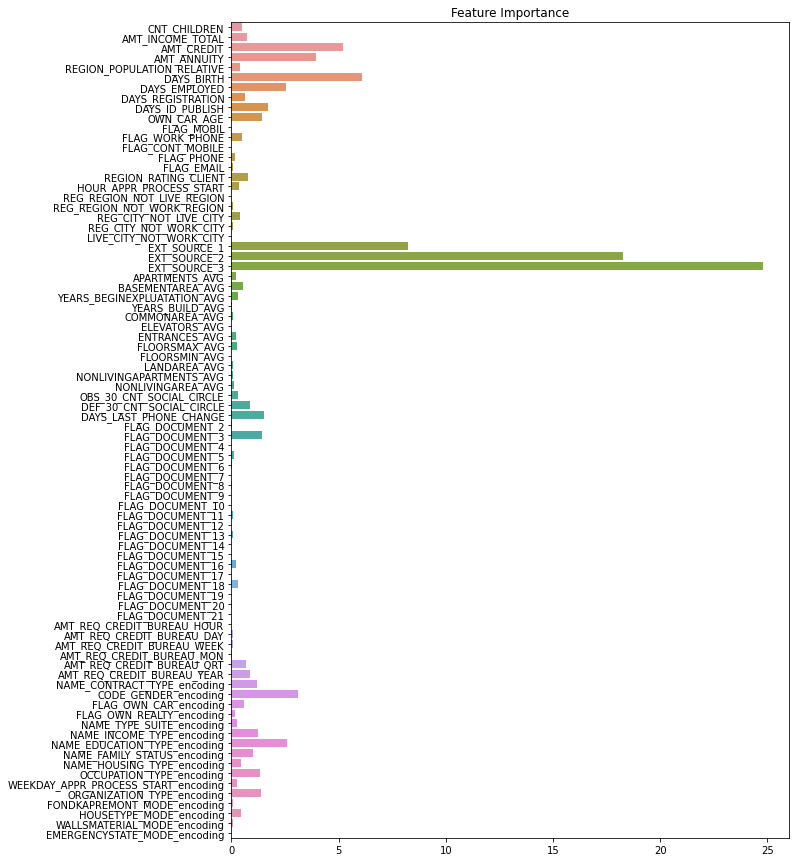

In [155]:
fig, ax = plt.subplots()

ax = sns.barplot(x=feature_importances, y=X_norm_train.columns)
fig.set_figwidth(10)
fig.set_figheight(15)
ax.set_title("Feature Importance")

Самыми значимым являются EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1,DAYS_BIRTH (неожиданно)

# Стекинг

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

1 Модель - модель по результатам GridSearchCV

In [157]:
cat1 =  CatBoostClassifier(bagging_temperature= 1, iterations = 80, learning_rate = 0.3)
classifier(X_norm_train.fillna(0), Y_train.fillna(0), CatBoostClassifier,bagging_temperature= 1, iterations = 80, learning_rate = 0.3)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.4341096	total: 554ms	remaining: 43.7s
1:	learn: 0.3369545	total: 961ms	remaining: 37.5s
2:	learn: 0.2948800	total: 1.36s	remaining: 34.8s
3:	learn: 0.2774660	total: 1.76s	remaining: 33.5s
4:	learn: 0.2656993	total: 2.15s	remaining: 32.2s
5:	learn: 0.2602781	total: 2.75s	remaining: 33.9s
6:	learn: 0.2569117	total: 2.99s	remaining: 31.2s
7:	learn: 0.2548907	total: 3.37s	remaining: 30.3s
8:	learn: 0.2536924	total: 3.61s	remaining: 28.5s
9:	learn: 0.2525904	total: 4.01s	remaining: 28s
10:	learn: 0.2517058	total: 4.4s	remaining: 27.6s
11:	learn: 0.2510252	total: 5.02s	remaining: 28.4s
12:	learn: 0.2503729	total: 5.58s	remaining: 28.8s
13:	learn: 0.2499409	total: 5.82s	remaining: 27.4s
14:	learn: 0.2495960	total: 6.19s	remaining: 26.8s
15:	learn: 0.2491286	total: 6.4s	remaining: 25.6s
16:	learn: 0.2488314	total: 6.82s	remaining: 25.3s
17:	learn: 0.2485279	total: 7.19s	remaining: 24.8s
18:	learn: 0.2483528	total: 7.59s	remaining: 24.4s
19:	learn: 0.2481586	total: 7.79s	remaining: 

1:	learn: 0.3396833	total: 737ms	remaining: 28.7s
2:	learn: 0.2984499	total: 1.12s	remaining: 28.7s
3:	learn: 0.2776999	total: 1.52s	remaining: 28.9s
4:	learn: 0.2663445	total: 1.73s	remaining: 26s
5:	learn: 0.2610745	total: 2.11s	remaining: 26s
6:	learn: 0.2581363	total: 2.33s	remaining: 24.3s
7:	learn: 0.2559483	total: 2.71s	remaining: 24.4s
8:	learn: 0.2545212	total: 2.93s	remaining: 23.1s
9:	learn: 0.2535654	total: 3.31s	remaining: 23.2s
10:	learn: 0.2529100	total: 3.54s	remaining: 22.2s
11:	learn: 0.2521803	total: 3.93s	remaining: 22.3s
12:	learn: 0.2516908	total: 4.32s	remaining: 22.3s
13:	learn: 0.2512408	total: 4.73s	remaining: 22.3s
14:	learn: 0.2507303	total: 5.31s	remaining: 23s
15:	learn: 0.2502964	total: 5.53s	remaining: 22.1s
16:	learn: 0.2500773	total: 5.73s	remaining: 21.2s
17:	learn: 0.2498675	total: 6.12s	remaining: 21.1s
18:	learn: 0.2496287	total: 6.73s	remaining: 21.6s
19:	learn: 0.2494308	total: 7.11s	remaining: 21.3s
20:	learn: 0.2492271	total: 7.49s	remaining: 2

1:	learn: 0.3373434	total: 1.6s	remaining: 1m 2s
2:	learn: 0.2977975	total: 2.2s	remaining: 56.6s
3:	learn: 0.2759041	total: 2.56s	remaining: 48.6s
4:	learn: 0.2654159	total: 3.6s	remaining: 53.9s
5:	learn: 0.2595849	total: 4.58s	remaining: 56.5s
6:	learn: 0.2566848	total: 5.78s	remaining: 1m
7:	learn: 0.2548534	total: 6.59s	remaining: 59.3s
8:	learn: 0.2533651	total: 7.58s	remaining: 59.8s
9:	learn: 0.2526738	total: 8.37s	remaining: 58.6s
10:	learn: 0.2518544	total: 10.2s	remaining: 1m 3s
11:	learn: 0.2512227	total: 11.2s	remaining: 1m 3s
12:	learn: 0.2507748	total: 11.8s	remaining: 1m
13:	learn: 0.2503779	total: 12.6s	remaining: 59.2s
14:	learn: 0.2498376	total: 12.8s	remaining: 55.4s
15:	learn: 0.2494283	total: 13.2s	remaining: 52.9s
16:	learn: 0.2491954	total: 13.6s	remaining: 50.4s
17:	learn: 0.2489262	total: 14s	remaining: 48.4s
18:	learn: 0.2485722	total: 14.6s	remaining: 46.9s
19:	learn: 0.2483576	total: 15.1s	remaining: 45.2s
20:	learn: 0.2481911	total: 15.4s	remaining: 43.3s


0.7534286144202154

Лучшая, ее будем убирать в дальнейшем

2 Модель - модель по результатам RandomizedSearchCV

In [158]:
cat2 = CatBoostClassifier(depth =  5, l2_leaf_reg = 7, learning_rate = 0.5)
classifier(X_norm_train.fillna(0), Y_train.fillna(0), CatBoostClassifier, depth =  5, l2_leaf_reg = 7, learning_rate = 0.5)

0:	learn: 0.3401062	total: 192ms	remaining: 3m 11s
1:	learn: 0.2798525	total: 817ms	remaining: 6m 47s
2:	learn: 0.2623269	total: 1.2s	remaining: 6m 38s
3:	learn: 0.2566143	total: 1.81s	remaining: 7m 29s
4:	learn: 0.2542906	total: 3.31s	remaining: 10m 59s
5:	learn: 0.2530567	total: 4.4s	remaining: 12m 9s
6:	learn: 0.2522492	total: 5.4s	remaining: 12m 45s
7:	learn: 0.2513444	total: 6s	remaining: 12m 23s
8:	learn: 0.2504937	total: 6.68s	remaining: 12m 15s
9:	learn: 0.2500698	total: 7.23s	remaining: 11m 55s
10:	learn: 0.2494189	total: 7.4s	remaining: 11m 5s
11:	learn: 0.2491629	total: 8.01s	remaining: 10m 59s
12:	learn: 0.2489818	total: 8.2s	remaining: 10m 22s
13:	learn: 0.2486783	total: 8.69s	remaining: 10m 11s
14:	learn: 0.2484382	total: 8.99s	remaining: 9m 50s
15:	learn: 0.2481914	total: 9.73s	remaining: 9m 58s
16:	learn: 0.2479801	total: 11.2s	remaining: 10m 48s
17:	learn: 0.2477799	total: 11.9s	remaining: 10m 47s
18:	learn: 0.2476318	total: 12.4s	remaining: 10m 39s
19:	learn: 0.247378

157:	learn: 0.2337080	total: 1m 44s	remaining: 9m 16s
158:	learn: 0.2336032	total: 1m 45s	remaining: 9m 16s
159:	learn: 0.2335052	total: 1m 46s	remaining: 9m 17s
160:	learn: 0.2334184	total: 1m 46s	remaining: 9m 14s
161:	learn: 0.2333473	total: 1m 47s	remaining: 9m 13s
162:	learn: 0.2333342	total: 1m 47s	remaining: 9m 10s
163:	learn: 0.2332692	total: 1m 48s	remaining: 9m 14s
164:	learn: 0.2332123	total: 1m 48s	remaining: 9m 11s
165:	learn: 0.2331120	total: 1m 49s	remaining: 9m 12s
166:	learn: 0.2330560	total: 1m 50s	remaining: 9m 12s
167:	learn: 0.2329768	total: 1m 51s	remaining: 9m 9s
168:	learn: 0.2328862	total: 1m 51s	remaining: 9m 6s
169:	learn: 0.2328235	total: 1m 51s	remaining: 9m 6s
170:	learn: 0.2327505	total: 1m 52s	remaining: 9m 4s
171:	learn: 0.2327361	total: 1m 53s	remaining: 9m 6s
172:	learn: 0.2326235	total: 1m 54s	remaining: 9m 6s
173:	learn: 0.2325458	total: 1m 55s	remaining: 9m 6s
174:	learn: 0.2324816	total: 1m 56s	remaining: 9m 7s
175:	learn: 0.2324118	total: 1m 56s	

310:	learn: 0.2227733	total: 2m 51s	remaining: 6m 19s
311:	learn: 0.2226977	total: 2m 51s	remaining: 6m 17s
312:	learn: 0.2226348	total: 2m 51s	remaining: 6m 16s
313:	learn: 0.2225603	total: 2m 51s	remaining: 6m 15s
314:	learn: 0.2225008	total: 2m 52s	remaining: 6m 14s
315:	learn: 0.2224252	total: 2m 52s	remaining: 6m 13s
316:	learn: 0.2223153	total: 2m 53s	remaining: 6m 13s
317:	learn: 0.2222494	total: 2m 53s	remaining: 6m 11s
318:	learn: 0.2221936	total: 2m 53s	remaining: 6m 10s
319:	learn: 0.2221854	total: 2m 53s	remaining: 6m 9s
320:	learn: 0.2221647	total: 2m 53s	remaining: 6m 8s
321:	learn: 0.2221132	total: 2m 54s	remaining: 6m 6s
322:	learn: 0.2220458	total: 2m 54s	remaining: 6m 5s
323:	learn: 0.2219781	total: 2m 55s	remaining: 6m 5s
324:	learn: 0.2219162	total: 2m 55s	remaining: 6m 4s
325:	learn: 0.2218425	total: 2m 55s	remaining: 6m 3s
326:	learn: 0.2217778	total: 2m 56s	remaining: 6m 2s
327:	learn: 0.2216912	total: 2m 56s	remaining: 6m 1s
328:	learn: 0.2216257	total: 2m 57s	r

464:	learn: 0.2130678	total: 3m 43s	remaining: 4m 17s
465:	learn: 0.2130135	total: 3m 44s	remaining: 4m 16s
466:	learn: 0.2129942	total: 3m 44s	remaining: 4m 16s
467:	learn: 0.2129792	total: 3m 44s	remaining: 4m 15s
468:	learn: 0.2129289	total: 3m 45s	remaining: 4m 14s
469:	learn: 0.2128518	total: 3m 45s	remaining: 4m 14s
470:	learn: 0.2127648	total: 3m 45s	remaining: 4m 13s
471:	learn: 0.2126780	total: 3m 46s	remaining: 4m 12s
472:	learn: 0.2125963	total: 3m 46s	remaining: 4m 12s
473:	learn: 0.2125197	total: 3m 46s	remaining: 4m 11s
474:	learn: 0.2124505	total: 3m 47s	remaining: 4m 10s
475:	learn: 0.2124391	total: 3m 47s	remaining: 4m 10s
476:	learn: 0.2124268	total: 3m 47s	remaining: 4m 9s
477:	learn: 0.2123540	total: 3m 47s	remaining: 4m 8s
478:	learn: 0.2122688	total: 3m 48s	remaining: 4m 8s
479:	learn: 0.2122138	total: 3m 48s	remaining: 4m 7s
480:	learn: 0.2121371	total: 3m 48s	remaining: 4m 6s
481:	learn: 0.2120730	total: 3m 49s	remaining: 4m 6s
482:	learn: 0.2120719	total: 3m 49

617:	learn: 0.2045746	total: 4m 59s	remaining: 3m 4s
618:	learn: 0.2045173	total: 4m 59s	remaining: 3m 4s
619:	learn: 0.2044576	total: 4m 59s	remaining: 3m 3s
620:	learn: 0.2043645	total: 4m 59s	remaining: 3m 3s
621:	learn: 0.2042873	total: 5m	remaining: 3m 2s
622:	learn: 0.2042655	total: 5m 1s	remaining: 3m 2s
623:	learn: 0.2042314	total: 5m 1s	remaining: 3m 1s
624:	learn: 0.2041760	total: 5m 1s	remaining: 3m 1s
625:	learn: 0.2041359	total: 5m 2s	remaining: 3m
626:	learn: 0.2040772	total: 5m 2s	remaining: 2m 59s
627:	learn: 0.2040043	total: 5m 2s	remaining: 2m 59s
628:	learn: 0.2039447	total: 5m 3s	remaining: 2m 58s
629:	learn: 0.2039445	total: 5m 3s	remaining: 2m 58s
630:	learn: 0.2039314	total: 5m 3s	remaining: 2m 57s
631:	learn: 0.2038716	total: 5m 3s	remaining: 2m 56s
632:	learn: 0.2038324	total: 5m 4s	remaining: 2m 56s
633:	learn: 0.2037622	total: 5m 4s	remaining: 2m 55s
634:	learn: 0.2037206	total: 5m 5s	remaining: 2m 55s
635:	learn: 0.2036696	total: 5m 5s	remaining: 2m 54s
636:

771:	learn: 0.1962032	total: 5m 51s	remaining: 1m 43s
772:	learn: 0.1961627	total: 5m 51s	remaining: 1m 43s
773:	learn: 0.1961276	total: 5m 52s	remaining: 1m 42s
774:	learn: 0.1961274	total: 5m 52s	remaining: 1m 42s
775:	learn: 0.1960562	total: 5m 52s	remaining: 1m 41s
776:	learn: 0.1960099	total: 5m 53s	remaining: 1m 41s
777:	learn: 0.1959556	total: 5m 53s	remaining: 1m 40s
778:	learn: 0.1958939	total: 5m 53s	remaining: 1m 40s
779:	learn: 0.1958585	total: 5m 54s	remaining: 1m 39s
780:	learn: 0.1958367	total: 5m 54s	remaining: 1m 39s
781:	learn: 0.1957647	total: 5m 54s	remaining: 1m 38s
782:	learn: 0.1957094	total: 5m 54s	remaining: 1m 38s
783:	learn: 0.1956870	total: 5m 55s	remaining: 1m 37s
784:	learn: 0.1956057	total: 5m 55s	remaining: 1m 37s
785:	learn: 0.1955651	total: 5m 55s	remaining: 1m 36s
786:	learn: 0.1955070	total: 5m 56s	remaining: 1m 36s
787:	learn: 0.1954875	total: 5m 56s	remaining: 1m 35s
788:	learn: 0.1954403	total: 5m 56s	remaining: 1m 35s
789:	learn: 0.1953837	total:

926:	learn: 0.1888413	total: 6m 44s	remaining: 31.9s
927:	learn: 0.1887706	total: 6m 44s	remaining: 31.4s
928:	learn: 0.1886990	total: 6m 45s	remaining: 31s
929:	learn: 0.1886303	total: 6m 45s	remaining: 30.5s
930:	learn: 0.1885965	total: 6m 45s	remaining: 30.1s
931:	learn: 0.1885586	total: 6m 46s	remaining: 29.6s
932:	learn: 0.1885130	total: 6m 46s	remaining: 29.2s
933:	learn: 0.1884628	total: 6m 47s	remaining: 28.8s
934:	learn: 0.1884111	total: 6m 47s	remaining: 28.3s
935:	learn: 0.1883472	total: 6m 47s	remaining: 27.9s
936:	learn: 0.1883132	total: 6m 47s	remaining: 27.4s
937:	learn: 0.1883059	total: 6m 48s	remaining: 27s
938:	learn: 0.1882482	total: 6m 48s	remaining: 26.5s
939:	learn: 0.1881909	total: 6m 49s	remaining: 26.1s
940:	learn: 0.1881440	total: 6m 49s	remaining: 25.7s
941:	learn: 0.1880813	total: 6m 49s	remaining: 25.2s
942:	learn: 0.1880178	total: 6m 50s	remaining: 24.8s
943:	learn: 0.1879458	total: 6m 50s	remaining: 24.4s
944:	learn: 0.1878833	total: 6m 50s	remaining: 23.

83:	learn: 0.2402136	total: 28.2s	remaining: 5m 7s
84:	learn: 0.2401220	total: 28.6s	remaining: 5m 7s
85:	learn: 0.2400457	total: 29s	remaining: 5m 8s
86:	learn: 0.2399335	total: 29.4s	remaining: 5m 8s
87:	learn: 0.2398445	total: 29.6s	remaining: 5m 6s
88:	learn: 0.2397419	total: 30s	remaining: 5m 7s
89:	learn: 0.2396753	total: 30.2s	remaining: 5m 5s
90:	learn: 0.2395192	total: 30.6s	remaining: 5m 5s
91:	learn: 0.2394433	total: 31s	remaining: 5m 5s
92:	learn: 0.2393817	total: 31.2s	remaining: 5m 4s
93:	learn: 0.2393311	total: 31.6s	remaining: 5m 4s
94:	learn: 0.2392545	total: 32s	remaining: 5m 4s
95:	learn: 0.2391896	total: 32.2s	remaining: 5m 3s
96:	learn: 0.2391198	total: 32.6s	remaining: 5m 3s
97:	learn: 0.2391179	total: 33s	remaining: 5m 3s
98:	learn: 0.2390536	total: 33.4s	remaining: 5m 3s
99:	learn: 0.2389740	total: 33.6s	remaining: 5m 2s
100:	learn: 0.2388950	total: 34s	remaining: 5m 2s
101:	learn: 0.2388584	total: 34.4s	remaining: 5m 2s
102:	learn: 0.2387878	total: 34.6s	remain

239:	learn: 0.2287209	total: 1m 20s	remaining: 4m 14s
240:	learn: 0.2286398	total: 1m 20s	remaining: 4m 13s
241:	learn: 0.2285808	total: 1m 21s	remaining: 4m 13s
242:	learn: 0.2284966	total: 1m 21s	remaining: 4m 13s
243:	learn: 0.2284606	total: 1m 21s	remaining: 4m 12s
244:	learn: 0.2283788	total: 1m 21s	remaining: 4m 12s
245:	learn: 0.2282981	total: 1m 22s	remaining: 4m 11s
246:	learn: 0.2282958	total: 1m 22s	remaining: 4m 11s
247:	learn: 0.2282207	total: 1m 22s	remaining: 4m 10s
248:	learn: 0.2282032	total: 1m 23s	remaining: 4m 10s
249:	learn: 0.2281440	total: 1m 23s	remaining: 4m 9s
250:	learn: 0.2280465	total: 1m 23s	remaining: 4m 9s
251:	learn: 0.2279296	total: 1m 23s	remaining: 4m 8s
252:	learn: 0.2279130	total: 1m 24s	remaining: 4m 8s
253:	learn: 0.2278464	total: 1m 24s	remaining: 4m 7s
254:	learn: 0.2277783	total: 1m 24s	remaining: 4m 7s
255:	learn: 0.2276932	total: 1m 25s	remaining: 4m 7s
256:	learn: 0.2276161	total: 1m 25s	remaining: 4m 7s
257:	learn: 0.2275284	total: 1m 25s	

393:	learn: 0.2192839	total: 2m 11s	remaining: 3m 21s
394:	learn: 0.2192513	total: 2m 11s	remaining: 3m 21s
395:	learn: 0.2191439	total: 2m 11s	remaining: 3m 21s
396:	learn: 0.2191313	total: 2m 12s	remaining: 3m 20s
397:	learn: 0.2190792	total: 2m 12s	remaining: 3m 20s
398:	learn: 0.2189958	total: 2m 13s	remaining: 3m 20s
399:	learn: 0.2189462	total: 2m 13s	remaining: 3m 20s
400:	learn: 0.2188749	total: 2m 13s	remaining: 3m 19s
401:	learn: 0.2188626	total: 2m 13s	remaining: 3m 19s
402:	learn: 0.2188027	total: 2m 14s	remaining: 3m 19s
403:	learn: 0.2187447	total: 2m 14s	remaining: 3m 18s
404:	learn: 0.2186699	total: 2m 15s	remaining: 3m 18s
405:	learn: 0.2185636	total: 2m 15s	remaining: 3m 18s
406:	learn: 0.2185048	total: 2m 15s	remaining: 3m 17s
407:	learn: 0.2184298	total: 2m 16s	remaining: 3m 17s
408:	learn: 0.2183600	total: 2m 16s	remaining: 3m 17s
409:	learn: 0.2183516	total: 2m 16s	remaining: 3m 16s
410:	learn: 0.2182824	total: 2m 16s	remaining: 3m 16s
411:	learn: 0.2182217	total:

546:	learn: 0.2105415	total: 3m 4s	remaining: 2m 33s
547:	learn: 0.2104719	total: 3m 4s	remaining: 2m 32s
548:	learn: 0.2104262	total: 3m 5s	remaining: 2m 32s
549:	learn: 0.2103654	total: 3m 5s	remaining: 2m 32s
550:	learn: 0.2102965	total: 3m 6s	remaining: 2m 31s
551:	learn: 0.2102386	total: 3m 6s	remaining: 2m 31s
552:	learn: 0.2101601	total: 3m 6s	remaining: 2m 30s
553:	learn: 0.2100480	total: 3m 6s	remaining: 2m 30s
554:	learn: 0.2099895	total: 3m 7s	remaining: 2m 30s
555:	learn: 0.2099440	total: 3m 7s	remaining: 2m 29s
556:	learn: 0.2098688	total: 3m 7s	remaining: 2m 29s
557:	learn: 0.2097650	total: 3m 8s	remaining: 2m 29s
558:	learn: 0.2096950	total: 3m 8s	remaining: 2m 29s
559:	learn: 0.2096045	total: 3m 9s	remaining: 2m 28s
560:	learn: 0.2095456	total: 3m 9s	remaining: 2m 28s
561:	learn: 0.2094806	total: 3m 9s	remaining: 2m 28s
562:	learn: 0.2094028	total: 3m 10s	remaining: 2m 27s
563:	learn: 0.2093463	total: 3m 10s	remaining: 2m 27s
564:	learn: 0.2092950	total: 3m 10s	remainin

699:	learn: 0.2020596	total: 3m 58s	remaining: 1m 42s
700:	learn: 0.2020068	total: 3m 58s	remaining: 1m 41s
701:	learn: 0.2019703	total: 3m 58s	remaining: 1m 41s
702:	learn: 0.2019043	total: 3m 59s	remaining: 1m 41s
703:	learn: 0.2018332	total: 3m 59s	remaining: 1m 40s
704:	learn: 0.2017918	total: 4m	remaining: 1m 40s
705:	learn: 0.2017063	total: 4m	remaining: 1m 40s
706:	learn: 0.2016610	total: 4m 1s	remaining: 1m 39s
707:	learn: 0.2015929	total: 4m 1s	remaining: 1m 39s
708:	learn: 0.2015363	total: 4m 1s	remaining: 1m 39s
709:	learn: 0.2014790	total: 4m 1s	remaining: 1m 38s
710:	learn: 0.2014304	total: 4m 2s	remaining: 1m 38s
711:	learn: 0.2014066	total: 4m 2s	remaining: 1m 38s
712:	learn: 0.2013983	total: 4m 3s	remaining: 1m 37s
713:	learn: 0.2013436	total: 4m 3s	remaining: 1m 37s
714:	learn: 0.2013291	total: 4m 3s	remaining: 1m 37s
715:	learn: 0.2012667	total: 4m 4s	remaining: 1m 36s
716:	learn: 0.2012088	total: 4m 4s	remaining: 1m 36s
717:	learn: 0.2011952	total: 4m 4s	remaining: 1

853:	learn: 0.1940370	total: 4m 51s	remaining: 49.9s
854:	learn: 0.1939567	total: 4m 52s	remaining: 49.5s
855:	learn: 0.1939186	total: 4m 52s	remaining: 49.2s
856:	learn: 0.1939110	total: 4m 53s	remaining: 48.9s
857:	learn: 0.1939050	total: 4m 53s	remaining: 48.6s
858:	learn: 0.1938340	total: 4m 54s	remaining: 48.3s
859:	learn: 0.1938030	total: 4m 54s	remaining: 47.9s
860:	learn: 0.1937525	total: 4m 54s	remaining: 47.5s
861:	learn: 0.1936828	total: 4m 55s	remaining: 47.3s
862:	learn: 0.1936152	total: 4m 55s	remaining: 46.9s
863:	learn: 0.1935907	total: 4m 55s	remaining: 46.6s
864:	learn: 0.1935353	total: 4m 56s	remaining: 46.3s
865:	learn: 0.1935084	total: 4m 56s	remaining: 45.9s
866:	learn: 0.1935036	total: 4m 57s	remaining: 45.6s
867:	learn: 0.1934698	total: 4m 57s	remaining: 45.2s
868:	learn: 0.1934317	total: 4m 57s	remaining: 44.9s
869:	learn: 0.1933725	total: 4m 57s	remaining: 44.5s
870:	learn: 0.1933015	total: 4m 58s	remaining: 44.2s
871:	learn: 0.1932533	total: 4m 58s	remaining:

8:	learn: 0.2516152	total: 2.96s	remaining: 5m 25s
9:	learn: 0.2511568	total: 3.54s	remaining: 5m 50s
10:	learn: 0.2508185	total: 4.13s	remaining: 6m 11s
11:	learn: 0.2505223	total: 4.34s	remaining: 5m 57s
12:	learn: 0.2500533	total: 4.74s	remaining: 6m
13:	learn: 0.2498945	total: 5.13s	remaining: 6m 1s
14:	learn: 0.2495344	total: 5.33s	remaining: 5m 50s
15:	learn: 0.2493273	total: 5.73s	remaining: 5m 52s
16:	learn: 0.2491353	total: 6.13s	remaining: 5m 54s
17:	learn: 0.2489005	total: 6.52s	remaining: 5m 55s
18:	learn: 0.2485558	total: 6.75s	remaining: 5m 48s
19:	learn: 0.2482342	total: 7.12s	remaining: 5m 48s
20:	learn: 0.2480911	total: 7.53s	remaining: 5m 50s
21:	learn: 0.2479287	total: 7.75s	remaining: 5m 44s
22:	learn: 0.2477452	total: 7.95s	remaining: 5m 37s
23:	learn: 0.2475284	total: 8.32s	remaining: 5m 38s
24:	learn: 0.2474116	total: 8.71s	remaining: 5m 39s
25:	learn: 0.2472741	total: 8.93s	remaining: 5m 34s
26:	learn: 0.2471284	total: 9.34s	remaining: 5m 36s
27:	learn: 0.246833

165:	learn: 0.2340212	total: 1m	remaining: 5m 3s
166:	learn: 0.2339078	total: 1m 1s	remaining: 5m 5s
167:	learn: 0.2338195	total: 1m 1s	remaining: 5m 4s
168:	learn: 0.2337284	total: 1m 2s	remaining: 5m 5s
169:	learn: 0.2336402	total: 1m 2s	remaining: 5m 6s
170:	learn: 0.2335590	total: 1m 3s	remaining: 5m 9s
171:	learn: 0.2334751	total: 1m 4s	remaining: 5m 8s
172:	learn: 0.2333711	total: 1m 4s	remaining: 5m 8s
173:	learn: 0.2333057	total: 1m 4s	remaining: 5m 8s
174:	learn: 0.2332210	total: 1m 6s	remaining: 5m 13s
175:	learn: 0.2331419	total: 1m 15s	remaining: 5m 53s
176:	learn: 0.2330742	total: 1m 25s	remaining: 6m 38s
177:	learn: 0.2330479	total: 1m 26s	remaining: 6m 40s
178:	learn: 0.2329949	total: 1m 27s	remaining: 6m 40s
179:	learn: 0.2329025	total: 1m 27s	remaining: 6m 38s
180:	learn: 0.2328128	total: 1m 27s	remaining: 6m 37s
181:	learn: 0.2327476	total: 1m 28s	remaining: 6m 35s
182:	learn: 0.2326451	total: 1m 28s	remaining: 6m 34s
183:	learn: 0.2325764	total: 1m 28s	remaining: 6m 

319:	learn: 0.2234184	total: 2m 16s	remaining: 4m 49s
320:	learn: 0.2233534	total: 2m 16s	remaining: 4m 49s
321:	learn: 0.2232996	total: 2m 16s	remaining: 4m 48s
322:	learn: 0.2232041	total: 2m 17s	remaining: 4m 47s
323:	learn: 0.2231124	total: 2m 17s	remaining: 4m 47s
324:	learn: 0.2230383	total: 2m 17s	remaining: 4m 46s
325:	learn: 0.2229644	total: 2m 18s	remaining: 4m 46s
326:	learn: 0.2228858	total: 2m 18s	remaining: 4m 45s
327:	learn: 0.2228235	total: 2m 19s	remaining: 4m 45s
328:	learn: 0.2227441	total: 2m 19s	remaining: 4m 44s
329:	learn: 0.2226799	total: 2m 19s	remaining: 4m 43s
330:	learn: 0.2226072	total: 2m 20s	remaining: 4m 43s
331:	learn: 0.2225643	total: 2m 20s	remaining: 4m 42s
332:	learn: 0.2225122	total: 2m 20s	remaining: 4m 42s
333:	learn: 0.2224465	total: 2m 21s	remaining: 4m 41s
334:	learn: 0.2223746	total: 2m 21s	remaining: 4m 41s
335:	learn: 0.2223035	total: 2m 21s	remaining: 4m 40s
336:	learn: 0.2222180	total: 2m 22s	remaining: 4m 40s
337:	learn: 0.2221455	total:

472:	learn: 0.2142710	total: 3m 12s	remaining: 3m 34s
473:	learn: 0.2142111	total: 3m 12s	remaining: 3m 33s
474:	learn: 0.2141736	total: 3m 12s	remaining: 3m 33s
475:	learn: 0.2141141	total: 3m 13s	remaining: 3m 32s
476:	learn: 0.2140567	total: 3m 13s	remaining: 3m 32s
477:	learn: 0.2140138	total: 3m 14s	remaining: 3m 32s
478:	learn: 0.2139999	total: 3m 14s	remaining: 3m 31s
479:	learn: 0.2139372	total: 3m 14s	remaining: 3m 31s
480:	learn: 0.2138932	total: 3m 14s	remaining: 3m 30s
481:	learn: 0.2138336	total: 3m 15s	remaining: 3m 29s
482:	learn: 0.2138183	total: 3m 15s	remaining: 3m 29s
483:	learn: 0.2137442	total: 3m 15s	remaining: 3m 28s
484:	learn: 0.2136887	total: 3m 16s	remaining: 3m 28s
485:	learn: 0.2136119	total: 3m 17s	remaining: 3m 28s
486:	learn: 0.2135470	total: 3m 17s	remaining: 3m 27s
487:	learn: 0.2134879	total: 3m 17s	remaining: 3m 27s
488:	learn: 0.2134248	total: 3m 18s	remaining: 3m 27s
489:	learn: 0.2133692	total: 3m 18s	remaining: 3m 26s
490:	learn: 0.2133166	total:

625:	learn: 0.2055628	total: 4m 6s	remaining: 2m 27s
626:	learn: 0.2055513	total: 4m 6s	remaining: 2m 26s
627:	learn: 0.2054839	total: 4m 7s	remaining: 2m 26s
628:	learn: 0.2054330	total: 4m 7s	remaining: 2m 26s
629:	learn: 0.2053311	total: 4m 8s	remaining: 2m 25s
630:	learn: 0.2052701	total: 4m 8s	remaining: 2m 25s
631:	learn: 0.2051934	total: 4m 8s	remaining: 2m 24s
632:	learn: 0.2051777	total: 4m 9s	remaining: 2m 24s
633:	learn: 0.2051054	total: 4m 9s	remaining: 2m 23s
634:	learn: 0.2050305	total: 4m 9s	remaining: 2m 23s
635:	learn: 0.2049625	total: 4m 9s	remaining: 2m 23s
636:	learn: 0.2049537	total: 4m 10s	remaining: 2m 22s
637:	learn: 0.2048842	total: 4m 10s	remaining: 2m 22s
638:	learn: 0.2048068	total: 4m 10s	remaining: 2m 21s
639:	learn: 0.2047180	total: 4m 11s	remaining: 2m 21s
640:	learn: 0.2046630	total: 4m 12s	remaining: 2m 21s
641:	learn: 0.2046147	total: 4m 12s	remaining: 2m 21s
642:	learn: 0.2045630	total: 4m 13s	remaining: 2m 20s
643:	learn: 0.2045004	total: 4m 13s	rem

778:	learn: 0.1973623	total: 5m 2s	remaining: 1m 25s
779:	learn: 0.1973376	total: 5m 3s	remaining: 1m 25s
780:	learn: 0.1972780	total: 5m 3s	remaining: 1m 25s
781:	learn: 0.1972041	total: 5m 4s	remaining: 1m 24s
782:	learn: 0.1971213	total: 5m 4s	remaining: 1m 24s
783:	learn: 0.1970455	total: 5m 4s	remaining: 1m 23s
784:	learn: 0.1970067	total: 5m 5s	remaining: 1m 23s
785:	learn: 0.1969653	total: 5m 5s	remaining: 1m 23s
786:	learn: 0.1969385	total: 5m 5s	remaining: 1m 22s
787:	learn: 0.1968738	total: 5m 5s	remaining: 1m 22s
788:	learn: 0.1968187	total: 5m 6s	remaining: 1m 21s
789:	learn: 0.1967723	total: 5m 6s	remaining: 1m 21s
790:	learn: 0.1966895	total: 5m 7s	remaining: 1m 21s
791:	learn: 0.1966686	total: 5m 7s	remaining: 1m 20s
792:	learn: 0.1966608	total: 5m 7s	remaining: 1m 20s
793:	learn: 0.1966587	total: 5m 7s	remaining: 1m 19s
794:	learn: 0.1966071	total: 5m 8s	remaining: 1m 19s
795:	learn: 0.1965823	total: 5m 9s	remaining: 1m 19s
796:	learn: 0.1965145	total: 5m 9s	remaining: 

933:	learn: 0.1899289	total: 6m 1s	remaining: 25.5s
934:	learn: 0.1898694	total: 6m 1s	remaining: 25.1s
935:	learn: 0.1898347	total: 6m 1s	remaining: 24.8s
936:	learn: 0.1897773	total: 6m 2s	remaining: 24.4s
937:	learn: 0.1897444	total: 6m 2s	remaining: 24s
938:	learn: 0.1896655	total: 6m 2s	remaining: 23.6s
939:	learn: 0.1896564	total: 6m 3s	remaining: 23.2s
940:	learn: 0.1896192	total: 6m 3s	remaining: 22.8s
941:	learn: 0.1895673	total: 6m 4s	remaining: 22.4s
942:	learn: 0.1895016	total: 6m 4s	remaining: 22s
943:	learn: 0.1894859	total: 6m 5s	remaining: 21.7s
944:	learn: 0.1894196	total: 6m 5s	remaining: 21.3s
945:	learn: 0.1893529	total: 6m 6s	remaining: 20.9s
946:	learn: 0.1892870	total: 6m 6s	remaining: 20.5s
947:	learn: 0.1892438	total: 6m 7s	remaining: 20.1s
948:	learn: 0.1892225	total: 6m 7s	remaining: 19.8s
949:	learn: 0.1891679	total: 6m 7s	remaining: 19.4s
950:	learn: 0.1891127	total: 6m 8s	remaining: 19s
951:	learn: 0.1890376	total: 6m 8s	remaining: 18.6s
952:	learn: 0.1890

90:	learn: 0.2396046	total: 32.6s	remaining: 5m 25s
91:	learn: 0.2395261	total: 33s	remaining: 5m 25s
92:	learn: 0.2394229	total: 33.6s	remaining: 5m 27s
93:	learn: 0.2393349	total: 33.8s	remaining: 5m 25s
94:	learn: 0.2393215	total: 34.2s	remaining: 5m 25s
95:	learn: 0.2392157	total: 34.4s	remaining: 5m 24s
96:	learn: 0.2391756	total: 34.8s	remaining: 5m 23s
97:	learn: 0.2390924	total: 35.2s	remaining: 5m 23s
98:	learn: 0.2390586	total: 35.6s	remaining: 5m 23s
99:	learn: 0.2389498	total: 35.8s	remaining: 5m 22s
100:	learn: 0.2388850	total: 36.2s	remaining: 5m 22s
101:	learn: 0.2388171	total: 36.4s	remaining: 5m 20s
102:	learn: 0.2387110	total: 36.8s	remaining: 5m 20s
103:	learn: 0.2386136	total: 37.2s	remaining: 5m 20s
104:	learn: 0.2385428	total: 37.4s	remaining: 5m 18s
105:	learn: 0.2384246	total: 37.8s	remaining: 5m 18s
106:	learn: 0.2383219	total: 38s	remaining: 5m 17s
107:	learn: 0.2382396	total: 38.2s	remaining: 5m 15s
108:	learn: 0.2381502	total: 38.8s	remaining: 5m 17s
109:	le

246:	learn: 0.2283162	total: 1m 25s	remaining: 4m 20s
247:	learn: 0.2282605	total: 1m 25s	remaining: 4m 20s
248:	learn: 0.2281864	total: 1m 25s	remaining: 4m 19s
249:	learn: 0.2281167	total: 1m 26s	remaining: 4m 19s
250:	learn: 0.2280152	total: 1m 27s	remaining: 4m 20s
251:	learn: 0.2279003	total: 1m 27s	remaining: 4m 19s
252:	learn: 0.2278045	total: 1m 27s	remaining: 4m 19s
253:	learn: 0.2277107	total: 1m 28s	remaining: 4m 18s
254:	learn: 0.2275976	total: 1m 28s	remaining: 4m 18s
255:	learn: 0.2275551	total: 1m 28s	remaining: 4m 17s
256:	learn: 0.2275327	total: 1m 28s	remaining: 4m 17s
257:	learn: 0.2274737	total: 1m 29s	remaining: 4m 16s
258:	learn: 0.2274544	total: 1m 29s	remaining: 4m 16s
259:	learn: 0.2273454	total: 1m 30s	remaining: 4m 16s
260:	learn: 0.2272456	total: 1m 30s	remaining: 4m 15s
261:	learn: 0.2272261	total: 1m 30s	remaining: 4m 15s
262:	learn: 0.2271680	total: 1m 30s	remaining: 4m 14s
263:	learn: 0.2270964	total: 1m 31s	remaining: 4m 14s
264:	learn: 0.2270226	total:

399:	learn: 0.2179872	total: 2m 17s	remaining: 3m 25s
400:	learn: 0.2179295	total: 2m 17s	remaining: 3m 25s
401:	learn: 0.2178846	total: 2m 17s	remaining: 3m 25s
402:	learn: 0.2178173	total: 2m 18s	remaining: 3m 24s
403:	learn: 0.2177365	total: 2m 18s	remaining: 3m 24s
404:	learn: 0.2176386	total: 2m 18s	remaining: 3m 24s
405:	learn: 0.2176376	total: 2m 19s	remaining: 3m 23s
406:	learn: 0.2175556	total: 2m 19s	remaining: 3m 23s
407:	learn: 0.2174822	total: 2m 19s	remaining: 3m 22s
408:	learn: 0.2174099	total: 2m 20s	remaining: 3m 22s
409:	learn: 0.2173466	total: 2m 20s	remaining: 3m 21s
410:	learn: 0.2172911	total: 2m 20s	remaining: 3m 21s
411:	learn: 0.2172087	total: 2m 21s	remaining: 3m 21s
412:	learn: 0.2171375	total: 2m 21s	remaining: 3m 20s
413:	learn: 0.2170655	total: 2m 21s	remaining: 3m 20s
414:	learn: 0.2170177	total: 2m 21s	remaining: 3m 20s
415:	learn: 0.2169527	total: 2m 22s	remaining: 3m 19s
416:	learn: 0.2168996	total: 2m 22s	remaining: 3m 19s
417:	learn: 0.2168329	total:

553:	learn: 0.2091105	total: 3m 9s	remaining: 2m 32s
554:	learn: 0.2090268	total: 3m 10s	remaining: 2m 32s
555:	learn: 0.2089489	total: 3m 10s	remaining: 2m 32s
556:	learn: 0.2089425	total: 3m 10s	remaining: 2m 31s
557:	learn: 0.2089037	total: 3m 10s	remaining: 2m 31s
558:	learn: 0.2088020	total: 3m 11s	remaining: 2m 30s
559:	learn: 0.2087377	total: 3m 11s	remaining: 2m 30s
560:	learn: 0.2086464	total: 3m 11s	remaining: 2m 30s
561:	learn: 0.2085987	total: 3m 12s	remaining: 2m 29s
562:	learn: 0.2085131	total: 3m 12s	remaining: 2m 29s
563:	learn: 0.2084483	total: 3m 12s	remaining: 2m 28s
564:	learn: 0.2083719	total: 3m 13s	remaining: 2m 28s
565:	learn: 0.2083193	total: 3m 13s	remaining: 2m 28s
566:	learn: 0.2083044	total: 3m 13s	remaining: 2m 27s
567:	learn: 0.2082697	total: 3m 13s	remaining: 2m 27s
568:	learn: 0.2082084	total: 3m 14s	remaining: 2m 26s
569:	learn: 0.2081707	total: 3m 14s	remaining: 2m 26s
570:	learn: 0.2080753	total: 3m 15s	remaining: 2m 26s
571:	learn: 0.2080419	total: 

706:	learn: 0.2007862	total: 4m 2s	remaining: 1m 40s
707:	learn: 0.2007106	total: 4m 3s	remaining: 1m 40s
708:	learn: 0.2006350	total: 4m 3s	remaining: 1m 39s
709:	learn: 0.2005937	total: 4m 3s	remaining: 1m 39s
710:	learn: 0.2005343	total: 4m 3s	remaining: 1m 39s
711:	learn: 0.2004519	total: 4m 4s	remaining: 1m 38s
712:	learn: 0.2003719	total: 4m 4s	remaining: 1m 38s
713:	learn: 0.2002952	total: 4m 5s	remaining: 1m 38s
714:	learn: 0.2002611	total: 4m 5s	remaining: 1m 37s
715:	learn: 0.2002508	total: 4m 5s	remaining: 1m 37s
716:	learn: 0.2001869	total: 4m 6s	remaining: 1m 37s
717:	learn: 0.2001116	total: 4m 6s	remaining: 1m 36s
718:	learn: 0.2000661	total: 4m 6s	remaining: 1m 36s
719:	learn: 0.2000169	total: 4m 6s	remaining: 1m 35s
720:	learn: 0.1999563	total: 4m 7s	remaining: 1m 35s
721:	learn: 0.1999174	total: 4m 7s	remaining: 1m 35s
722:	learn: 0.1998553	total: 4m 8s	remaining: 1m 35s
723:	learn: 0.1998050	total: 4m 8s	remaining: 1m 34s
724:	learn: 0.1997514	total: 4m 8s	remaining: 

861:	learn: 0.1924832	total: 6m 10s	remaining: 59.2s
862:	learn: 0.1924316	total: 6m 10s	remaining: 58.8s
863:	learn: 0.1923372	total: 6m 10s	remaining: 58.3s
864:	learn: 0.1923004	total: 6m 10s	remaining: 57.9s
865:	learn: 0.1922263	total: 6m 11s	remaining: 57.5s
866:	learn: 0.1921599	total: 6m 11s	remaining: 57s
867:	learn: 0.1921429	total: 6m 12s	remaining: 56.6s
868:	learn: 0.1921321	total: 6m 12s	remaining: 56.1s
869:	learn: 0.1920929	total: 6m 12s	remaining: 55.7s
870:	learn: 0.1920611	total: 6m 13s	remaining: 55.2s
871:	learn: 0.1920069	total: 6m 13s	remaining: 54.8s
872:	learn: 0.1919852	total: 6m 13s	remaining: 54.4s
873:	learn: 0.1919720	total: 6m 14s	remaining: 53.9s
874:	learn: 0.1919330	total: 6m 14s	remaining: 53.5s
875:	learn: 0.1918768	total: 6m 14s	remaining: 53.1s
876:	learn: 0.1918126	total: 6m 15s	remaining: 52.6s
877:	learn: 0.1917656	total: 6m 15s	remaining: 52.2s
878:	learn: 0.1917380	total: 6m 15s	remaining: 51.7s
879:	learn: 0.1916796	total: 6m 15s	remaining: 5

16:	learn: 0.2492964	total: 5.91s	remaining: 5m 41s
17:	learn: 0.2491245	total: 6.3s	remaining: 5m 43s
18:	learn: 0.2488541	total: 6.51s	remaining: 5m 35s
19:	learn: 0.2487164	total: 6.89s	remaining: 5m 37s
20:	learn: 0.2484958	total: 7.1s	remaining: 5m 30s
21:	learn: 0.2482300	total: 7.48s	remaining: 5m 32s
22:	learn: 0.2480516	total: 7.71s	remaining: 5m 27s
23:	learn: 0.2478698	total: 8.11s	remaining: 5m 29s
24:	learn: 0.2477322	total: 8.51s	remaining: 5m 31s
25:	learn: 0.2475754	total: 8.72s	remaining: 5m 26s
26:	learn: 0.2473010	total: 9.3s	remaining: 5m 35s
27:	learn: 0.2471110	total: 9.69s	remaining: 5m 36s
28:	learn: 0.2470059	total: 10.3s	remaining: 5m 44s
29:	learn: 0.2468312	total: 10.7s	remaining: 5m 45s
30:	learn: 0.2466571	total: 10.9s	remaining: 5m 40s
31:	learn: 0.2465179	total: 11.3s	remaining: 5m 41s
32:	learn: 0.2463878	total: 11.5s	remaining: 5m 37s
33:	learn: 0.2462562	total: 11.9s	remaining: 5m 37s
34:	learn: 0.2461382	total: 12.1s	remaining: 5m 33s
35:	learn: 0.24

174:	learn: 0.2332475	total: 1m	remaining: 4m 43s
175:	learn: 0.2332468	total: 1m	remaining: 4m 43s
176:	learn: 0.2331579	total: 1m	remaining: 4m 42s
177:	learn: 0.2331100	total: 1m 1s	remaining: 4m 42s
178:	learn: 0.2330539	total: 1m 1s	remaining: 4m 42s
179:	learn: 0.2329847	total: 1m 2s	remaining: 4m 42s
180:	learn: 0.2328778	total: 1m 2s	remaining: 4m 41s
181:	learn: 0.2327793	total: 1m 2s	remaining: 4m 40s
182:	learn: 0.2326829	total: 1m 2s	remaining: 4m 40s
183:	learn: 0.2326113	total: 1m 3s	remaining: 4m 40s
184:	learn: 0.2325842	total: 1m 3s	remaining: 4m 39s
185:	learn: 0.2325710	total: 1m 3s	remaining: 4m 38s
186:	learn: 0.2324658	total: 1m 4s	remaining: 4m 38s
187:	learn: 0.2323908	total: 1m 4s	remaining: 4m 38s
188:	learn: 0.2323355	total: 1m 4s	remaining: 4m 37s
189:	learn: 0.2322728	total: 1m 5s	remaining: 4m 37s
190:	learn: 0.2321843	total: 1m 5s	remaining: 4m 37s
191:	learn: 0.2321280	total: 1m 5s	remaining: 4m 36s
192:	learn: 0.2320775	total: 1m 6s	remaining: 4m 36s
19

328:	learn: 0.2230114	total: 1m 54s	remaining: 3m 53s
329:	learn: 0.2229594	total: 1m 54s	remaining: 3m 53s
330:	learn: 0.2228943	total: 1m 55s	remaining: 3m 52s
331:	learn: 0.2228330	total: 1m 55s	remaining: 3m 52s
332:	learn: 0.2228248	total: 1m 55s	remaining: 3m 51s
333:	learn: 0.2227794	total: 1m 56s	remaining: 3m 51s
334:	learn: 0.2226935	total: 1m 56s	remaining: 3m 52s
335:	learn: 0.2226128	total: 1m 57s	remaining: 3m 51s
336:	learn: 0.2225210	total: 1m 57s	remaining: 3m 51s
337:	learn: 0.2224765	total: 1m 57s	remaining: 3m 51s
338:	learn: 0.2224047	total: 1m 58s	remaining: 3m 50s
339:	learn: 0.2223376	total: 1m 58s	remaining: 3m 50s
340:	learn: 0.2222753	total: 1m 59s	remaining: 3m 50s
341:	learn: 0.2222186	total: 1m 59s	remaining: 3m 50s
342:	learn: 0.2221458	total: 1m 59s	remaining: 3m 49s
343:	learn: 0.2220894	total: 2m	remaining: 3m 49s
344:	learn: 0.2220242	total: 2m	remaining: 3m 49s
345:	learn: 0.2219852	total: 2m	remaining: 3m 48s
346:	learn: 0.2219314	total: 2m 1s	remai

481:	learn: 0.2139932	total: 2m 48s	remaining: 3m 1s
482:	learn: 0.2139163	total: 2m 49s	remaining: 3m
483:	learn: 0.2138563	total: 2m 49s	remaining: 3m
484:	learn: 0.2138497	total: 2m 49s	remaining: 3m
485:	learn: 0.2138072	total: 2m 50s	remaining: 2m 59s
486:	learn: 0.2137678	total: 2m 50s	remaining: 2m 59s
487:	learn: 0.2136963	total: 2m 50s	remaining: 2m 59s
488:	learn: 0.2136513	total: 2m 51s	remaining: 2m 58s
489:	learn: 0.2135927	total: 2m 51s	remaining: 2m 58s
490:	learn: 0.2135367	total: 2m 51s	remaining: 2m 58s
491:	learn: 0.2134702	total: 2m 52s	remaining: 2m 57s
492:	learn: 0.2134353	total: 2m 52s	remaining: 2m 57s
493:	learn: 0.2133627	total: 2m 52s	remaining: 2m 57s
494:	learn: 0.2133114	total: 2m 53s	remaining: 2m 56s
495:	learn: 0.2132370	total: 2m 53s	remaining: 2m 56s
496:	learn: 0.2131421	total: 2m 54s	remaining: 2m 56s
497:	learn: 0.2130994	total: 2m 54s	remaining: 2m 55s
498:	learn: 0.2130414	total: 2m 54s	remaining: 2m 55s
499:	learn: 0.2130291	total: 2m 55s	remai

634:	learn: 0.2053245	total: 3m 41s	remaining: 2m 7s
635:	learn: 0.2052419	total: 3m 41s	remaining: 2m 6s
636:	learn: 0.2051576	total: 3m 41s	remaining: 2m 6s
637:	learn: 0.2051074	total: 3m 41s	remaining: 2m 5s
638:	learn: 0.2050556	total: 3m 42s	remaining: 2m 5s
639:	learn: 0.2049723	total: 3m 42s	remaining: 2m 5s
640:	learn: 0.2049414	total: 3m 42s	remaining: 2m 4s
641:	learn: 0.2048994	total: 3m 43s	remaining: 2m 4s
642:	learn: 0.2048528	total: 3m 43s	remaining: 2m 4s
643:	learn: 0.2048080	total: 3m 43s	remaining: 2m 3s
644:	learn: 0.2047421	total: 3m 44s	remaining: 2m 3s
645:	learn: 0.2047417	total: 3m 44s	remaining: 2m 2s
646:	learn: 0.2047178	total: 3m 44s	remaining: 2m 2s
647:	learn: 0.2046521	total: 3m 45s	remaining: 2m 2s
648:	learn: 0.2045856	total: 3m 45s	remaining: 2m 1s
649:	learn: 0.2045034	total: 3m 45s	remaining: 2m 1s
650:	learn: 0.2044458	total: 3m 45s	remaining: 2m
651:	learn: 0.2043981	total: 3m 46s	remaining: 2m
652:	learn: 0.2043302	total: 3m 46s	remaining: 2m
65

787:	learn: 0.1974340	total: 4m 33s	remaining: 1m 13s
788:	learn: 0.1973774	total: 4m 34s	remaining: 1m 13s
789:	learn: 0.1973529	total: 4m 34s	remaining: 1m 12s
790:	learn: 0.1973291	total: 4m 34s	remaining: 1m 12s
791:	learn: 0.1972801	total: 4m 35s	remaining: 1m 12s
792:	learn: 0.1972622	total: 4m 35s	remaining: 1m 11s
793:	learn: 0.1972163	total: 4m 35s	remaining: 1m 11s
794:	learn: 0.1971480	total: 4m 36s	remaining: 1m 11s
795:	learn: 0.1970991	total: 4m 36s	remaining: 1m 10s
796:	learn: 0.1970254	total: 4m 36s	remaining: 1m 10s
797:	learn: 0.1969976	total: 4m 37s	remaining: 1m 10s
798:	learn: 0.1969466	total: 4m 37s	remaining: 1m 9s
799:	learn: 0.1969077	total: 4m 37s	remaining: 1m 9s
800:	learn: 0.1968335	total: 4m 38s	remaining: 1m 9s
801:	learn: 0.1968174	total: 4m 38s	remaining: 1m 8s
802:	learn: 0.1967551	total: 4m 38s	remaining: 1m 8s
803:	learn: 0.1966953	total: 4m 39s	remaining: 1m 8s
804:	learn: 0.1966263	total: 4m 39s	remaining: 1m 7s
805:	learn: 0.1965432	total: 4m 39s

943:	learn: 0.1891509	total: 5m 27s	remaining: 19.4s
944:	learn: 0.1891053	total: 5m 28s	remaining: 19.1s
945:	learn: 0.1891053	total: 5m 28s	remaining: 18.7s
946:	learn: 0.1890704	total: 5m 28s	remaining: 18.4s
947:	learn: 0.1890219	total: 5m 28s	remaining: 18s
948:	learn: 0.1889717	total: 5m 29s	remaining: 17.7s
949:	learn: 0.1889084	total: 5m 29s	remaining: 17.3s
950:	learn: 0.1888497	total: 5m 29s	remaining: 17s
951:	learn: 0.1887792	total: 5m 30s	remaining: 16.6s
952:	learn: 0.1887332	total: 5m 30s	remaining: 16.3s
953:	learn: 0.1886960	total: 5m 30s	remaining: 16s
954:	learn: 0.1886815	total: 5m 31s	remaining: 15.6s
955:	learn: 0.1886335	total: 5m 31s	remaining: 15.3s
956:	learn: 0.1885917	total: 5m 32s	remaining: 14.9s
957:	learn: 0.1885303	total: 5m 32s	remaining: 14.6s
958:	learn: 0.1885243	total: 5m 32s	remaining: 14.2s
959:	learn: 0.1884797	total: 5m 32s	remaining: 13.9s
960:	learn: 0.1884248	total: 5m 33s	remaining: 13.5s
961:	learn: 0.1883723	total: 5m 33s	remaining: 13.2s

0.724888910537825

3 Модель - логистическая регрессия с параметрами из HW 2

In [159]:
logistic1 = LogisticRegression(penalty='l1', class_weight='balanced', solver='liblinear')
classifier(X_norm_train.fillna(0), Y_train.fillna(0), LogisticRegression, penalty='l1', class_weight='balanced', solver='liblinear')

Fold 0: LOG LOSS =  0.6194713494934073, AUC: 0.7118652440474393
Fold 1: LOG LOSS =  0.6199453359847046, AUC: 0.7186813372939951
Fold 2: LOG LOSS =  0.6202299813612558, AUC: 0.7161710262110871
Fold 3: LOG LOSS =  0.620911282833156, AUC: 0.7118599256492317
Fold 4: LOG LOSS =  0.6217802978346815, AUC: 0.7131146124946302
LOG LOSS mean = 0.6204676495014411 , LOG LOSS std =0.0008052040040139003  
AUC mean = 0.7143384291392767 , AUC std =0.0026824099051521943  


0.7143384291392767

4 Модель - логистическая регрессия с параметрами из HW 2, но изменили порядок регуляризации

In [160]:
logistic2 = LogisticRegression(penalty='l2', class_weight='balanced', solver='liblinear')
classifier(X_norm_train.fillna(0), Y_train.fillna(0), LogisticRegression, penalty='l2', class_weight='balanced', solver='liblinear')

Fold 0: LOG LOSS =  0.6783949945026865, AUC: 0.6341476728584481
Fold 1: LOG LOSS =  0.6788530656919861, AUC: 0.6482829639739758
Fold 2: LOG LOSS =  0.678660912370278, AUC: 0.6546008526054563
Fold 3: LOG LOSS =  0.6787050473706843, AUC: 0.6387581463516033
Fold 4: LOG LOSS =  0.6780975832105047, AUC: 0.641386682300247
LOG LOSS mean = 0.6785423206292279 , LOG LOSS std =0.00026705911204569086  
AUC mean = 0.6434352636179461 , AUC std =0.007218061091929327  


0.6434352636179461

5 Модель - случайный лес

In [161]:
randforest = RandomForestClassifier(n_estimators=6)
classifier(X_norm_train.fillna(0), Y_train.fillna(0), RandomForestClassifier, n_estimators=6)

Fold 0: LOG LOSS =  1.390833742508249, AUC: 0.606598434410546
Fold 1: LOG LOSS =  1.4100179629742893, AUC: 0.5997090424478538
Fold 2: LOG LOSS =  1.3791029885065962, AUC: 0.6039861359350329
Fold 3: LOG LOSS =  1.3677473464445566, AUC: 0.6028016527169723
Fold 4: LOG LOSS =  1.443095564988118, AUC: 0.5966121438185767
LOG LOSS mean = 1.3981595210843618 , LOG LOSS std =0.02646352024101397  
AUC mean = 0.6019414818657964 , AUC std =0.0034639093791966947  


0.6019414818657964

In [164]:
models = [
    ('cat1', cat1),
    ('cat2', cat2),
     ('logistic1', logistic1), 
     ('logistic2', logistic2),
     ('randforest', randforest)
]

clf = StackingClassifier(
    estimators=models, final_estimator=LogisticRegression()
)

y_score = clf.fit(X_norm_train.fillna(0), Y_train.fillna(0)).predict_proba(X_norm_test.fillna(0))
sub = pd.read_csv("sample_submission.csv")
sub['TARGET'] = y_score[:, 1]
sub.to_csv("stacking.csv", index=False)

0:	learn: 0.4344870	total: 538ms	remaining: 42.5s
1:	learn: 0.3373455	total: 944ms	remaining: 36.8s
2:	learn: 0.2952516	total: 1.34s	remaining: 34.5s
3:	learn: 0.2747809	total: 1.57s	remaining: 29.8s
4:	learn: 0.2651467	total: 1.95s	remaining: 29.3s
5:	learn: 0.2598774	total: 2.54s	remaining: 31.3s
6:	learn: 0.2568640	total: 3.35s	remaining: 35s
7:	learn: 0.2546170	total: 3.73s	remaining: 33.6s
8:	learn: 0.2535105	total: 4.14s	remaining: 32.6s
9:	learn: 0.2525788	total: 4.53s	remaining: 31.7s
10:	learn: 0.2520011	total: 4.92s	remaining: 30.9s
11:	learn: 0.2514118	total: 5.14s	remaining: 29.1s
12:	learn: 0.2509220	total: 5.54s	remaining: 28.6s
13:	learn: 0.2504416	total: 5.93s	remaining: 28s
14:	learn: 0.2501280	total: 6.34s	remaining: 27.5s
15:	learn: 0.2497165	total: 6.55s	remaining: 26.2s
16:	learn: 0.2494686	total: 6.95s	remaining: 25.8s
17:	learn: 0.2492421	total: 7.35s	remaining: 25.3s
18:	learn: 0.2489645	total: 7.92s	remaining: 25.4s
19:	learn: 0.2487180	total: 8.14s	remaining: 

80:	learn: 0.2417007	total: 28.2s	remaining: 5m 19s
81:	learn: 0.2416086	total: 28.6s	remaining: 5m 19s
82:	learn: 0.2415344	total: 28.8s	remaining: 5m 17s
83:	learn: 0.2414379	total: 29.2s	remaining: 5m 18s
84:	learn: 0.2413557	total: 29.6s	remaining: 5m 18s
85:	learn: 0.2412892	total: 29.8s	remaining: 5m 16s
86:	learn: 0.2412034	total: 30.2s	remaining: 5m 16s
87:	learn: 0.2411317	total: 30.4s	remaining: 5m 14s
88:	learn: 0.2410777	total: 31s	remaining: 5m 16s
89:	learn: 0.2409935	total: 31.2s	remaining: 5m 15s
90:	learn: 0.2408882	total: 31.6s	remaining: 5m 15s
91:	learn: 0.2408316	total: 32.4s	remaining: 5m 19s
92:	learn: 0.2407154	total: 32.7s	remaining: 5m 19s
93:	learn: 0.2406898	total: 33.2s	remaining: 5m 19s
94:	learn: 0.2406243	total: 33.4s	remaining: 5m 17s
95:	learn: 0.2405681	total: 33.8s	remaining: 5m 17s
96:	learn: 0.2404696	total: 34.1s	remaining: 5m 17s
97:	learn: 0.2404096	total: 34.4s	remaining: 5m 16s
98:	learn: 0.2403575	total: 34.6s	remaining: 5m 14s
99:	learn: 0.2

236:	learn: 0.2316342	total: 1m 20s	remaining: 4m 19s
237:	learn: 0.2315624	total: 1m 20s	remaining: 4m 19s
238:	learn: 0.2314966	total: 1m 21s	remaining: 4m 19s
239:	learn: 0.2314399	total: 1m 21s	remaining: 4m 18s
240:	learn: 0.2313650	total: 1m 22s	remaining: 4m 18s
241:	learn: 0.2312825	total: 1m 22s	remaining: 4m 18s
242:	learn: 0.2312761	total: 1m 22s	remaining: 4m 17s
243:	learn: 0.2312042	total: 1m 23s	remaining: 4m 18s
244:	learn: 0.2311067	total: 1m 23s	remaining: 4m 18s
245:	learn: 0.2310439	total: 1m 24s	remaining: 4m 17s
246:	learn: 0.2309846	total: 1m 24s	remaining: 4m 17s
247:	learn: 0.2309352	total: 1m 24s	remaining: 4m 16s
248:	learn: 0.2308746	total: 1m 25s	remaining: 4m 16s
249:	learn: 0.2308097	total: 1m 25s	remaining: 4m 15s
250:	learn: 0.2307064	total: 1m 25s	remaining: 4m 15s
251:	learn: 0.2306391	total: 1m 25s	remaining: 4m 15s
252:	learn: 0.2305800	total: 1m 26s	remaining: 4m 15s
253:	learn: 0.2305327	total: 1m 26s	remaining: 4m 15s
254:	learn: 0.2304794	total:

390:	learn: 0.2232035	total: 2m 16s	remaining: 3m 32s
391:	learn: 0.2231665	total: 2m 17s	remaining: 3m 32s
392:	learn: 0.2231060	total: 2m 17s	remaining: 3m 32s
393:	learn: 0.2230489	total: 2m 17s	remaining: 3m 31s
394:	learn: 0.2229992	total: 2m 17s	remaining: 3m 31s
395:	learn: 0.2229867	total: 2m 18s	remaining: 3m 31s
396:	learn: 0.2229150	total: 2m 19s	remaining: 3m 31s
397:	learn: 0.2228541	total: 2m 19s	remaining: 3m 30s
398:	learn: 0.2227663	total: 2m 20s	remaining: 3m 30s
399:	learn: 0.2227022	total: 2m 20s	remaining: 3m 30s
400:	learn: 0.2226617	total: 2m 20s	remaining: 3m 30s
401:	learn: 0.2226174	total: 2m 21s	remaining: 3m 30s
402:	learn: 0.2226022	total: 2m 21s	remaining: 3m 29s
403:	learn: 0.2225156	total: 2m 22s	remaining: 3m 29s
404:	learn: 0.2224701	total: 2m 22s	remaining: 3m 29s
405:	learn: 0.2223960	total: 2m 23s	remaining: 3m 29s
406:	learn: 0.2223263	total: 2m 23s	remaining: 3m 28s
407:	learn: 0.2222892	total: 2m 23s	remaining: 3m 28s
408:	learn: 0.2222210	total:

544:	learn: 0.2154727	total: 3m 11s	remaining: 2m 39s
545:	learn: 0.2154239	total: 3m 11s	remaining: 2m 39s
546:	learn: 0.2153716	total: 3m 11s	remaining: 2m 38s
547:	learn: 0.2153166	total: 3m 12s	remaining: 2m 38s
548:	learn: 0.2152641	total: 3m 12s	remaining: 2m 38s
549:	learn: 0.2152399	total: 3m 12s	remaining: 2m 37s
550:	learn: 0.2151658	total: 3m 13s	remaining: 2m 37s
551:	learn: 0.2151080	total: 3m 13s	remaining: 2m 37s
552:	learn: 0.2150407	total: 3m 13s	remaining: 2m 36s
553:	learn: 0.2149826	total: 3m 14s	remaining: 2m 36s
554:	learn: 0.2149255	total: 3m 14s	remaining: 2m 35s
555:	learn: 0.2148601	total: 3m 14s	remaining: 2m 35s
556:	learn: 0.2148057	total: 3m 15s	remaining: 2m 35s
557:	learn: 0.2147816	total: 3m 15s	remaining: 2m 34s
558:	learn: 0.2147314	total: 3m 15s	remaining: 2m 34s
559:	learn: 0.2146855	total: 3m 16s	remaining: 2m 34s
560:	learn: 0.2146626	total: 3m 16s	remaining: 2m 33s
561:	learn: 0.2146137	total: 3m 16s	remaining: 2m 33s
562:	learn: 0.2145624	total:

698:	learn: 0.2085085	total: 4m 7s	remaining: 1m 46s
699:	learn: 0.2084716	total: 4m 8s	remaining: 1m 46s
700:	learn: 0.2084110	total: 4m 8s	remaining: 1m 45s
701:	learn: 0.2083757	total: 4m 8s	remaining: 1m 45s
702:	learn: 0.2083394	total: 4m 9s	remaining: 1m 45s
703:	learn: 0.2082685	total: 4m 9s	remaining: 1m 44s
704:	learn: 0.2082211	total: 4m 9s	remaining: 1m 44s
705:	learn: 0.2081470	total: 4m 10s	remaining: 1m 44s
706:	learn: 0.2081343	total: 4m 10s	remaining: 1m 43s
707:	learn: 0.2080969	total: 4m 11s	remaining: 1m 43s
708:	learn: 0.2080614	total: 4m 11s	remaining: 1m 43s
709:	learn: 0.2080181	total: 4m 11s	remaining: 1m 42s
710:	learn: 0.2079532	total: 4m 12s	remaining: 1m 42s
711:	learn: 0.2079087	total: 4m 12s	remaining: 1m 42s
712:	learn: 0.2079047	total: 4m 13s	remaining: 1m 41s
713:	learn: 0.2078503	total: 4m 13s	remaining: 1m 41s
714:	learn: 0.2078079	total: 4m 14s	remaining: 1m 41s
715:	learn: 0.2077538	total: 4m 14s	remaining: 1m 40s
716:	learn: 0.2077056	total: 4m 14s

852:	learn: 0.2015693	total: 5m 12s	remaining: 53.8s
853:	learn: 0.2015461	total: 5m 12s	remaining: 53.4s
854:	learn: 0.2015131	total: 5m 12s	remaining: 53s
855:	learn: 0.2014752	total: 5m 12s	remaining: 52.7s
856:	learn: 0.2014409	total: 5m 13s	remaining: 52.3s
857:	learn: 0.2013901	total: 5m 13s	remaining: 51.9s
858:	learn: 0.2013546	total: 5m 13s	remaining: 51.5s
859:	learn: 0.2013120	total: 5m 14s	remaining: 51.1s
860:	learn: 0.2012507	total: 5m 14s	remaining: 50.8s
861:	learn: 0.2012289	total: 5m 15s	remaining: 50.5s
862:	learn: 0.2012068	total: 5m 15s	remaining: 50.1s
863:	learn: 0.2011599	total: 5m 15s	remaining: 49.7s
864:	learn: 0.2011348	total: 5m 16s	remaining: 49.3s
865:	learn: 0.2010827	total: 5m 16s	remaining: 49s
866:	learn: 0.2010462	total: 5m 17s	remaining: 48.7s
867:	learn: 0.2009828	total: 5m 17s	remaining: 48.3s
868:	learn: 0.2009181	total: 5m 17s	remaining: 47.9s
869:	learn: 0.2008576	total: 5m 18s	remaining: 47.5s
870:	learn: 0.2008332	total: 5m 18s	remaining: 47.

9:	learn: 0.2530301	total: 3.33s	remaining: 23.4s
10:	learn: 0.2522368	total: 3.75s	remaining: 23.5s
11:	learn: 0.2517647	total: 3.96s	remaining: 22.5s
12:	learn: 0.2512573	total: 4.34s	remaining: 22.4s
13:	learn: 0.2508015	total: 4.73s	remaining: 22.3s
14:	learn: 0.2505602	total: 4.93s	remaining: 21.4s
15:	learn: 0.2502720	total: 5.13s	remaining: 20.5s
16:	learn: 0.2496864	total: 5.33s	remaining: 19.8s
17:	learn: 0.2494089	total: 5.72s	remaining: 19.7s
18:	learn: 0.2492155	total: 5.94s	remaining: 19.1s
19:	learn: 0.2489731	total: 6.32s	remaining: 19s
20:	learn: 0.2487510	total: 6.53s	remaining: 18.3s
21:	learn: 0.2485043	total: 6.74s	remaining: 17.8s
22:	learn: 0.2483509	total: 6.94s	remaining: 17.2s
23:	learn: 0.2481543	total: 7.53s	remaining: 17.6s
24:	learn: 0.2479137	total: 7.75s	remaining: 17s
25:	learn: 0.2477550	total: 8.12s	remaining: 16.9s
26:	learn: 0.2475440	total: 8.33s	remaining: 16.4s
27:	learn: 0.2474002	total: 8.74s	remaining: 16.2s
28:	learn: 0.2472709	total: 9.12s	re

12:	learn: 0.2507248	total: 4.36s	remaining: 22.5s
13:	learn: 0.2502599	total: 4.74s	remaining: 22.4s
14:	learn: 0.2498406	total: 4.95s	remaining: 21.5s
15:	learn: 0.2496202	total: 5.34s	remaining: 21.4s
16:	learn: 0.2493407	total: 5.75s	remaining: 21.3s
17:	learn: 0.2490402	total: 6.13s	remaining: 21.1s
18:	learn: 0.2487514	total: 6.55s	remaining: 21s
19:	learn: 0.2484701	total: 6.76s	remaining: 20.3s
20:	learn: 0.2482266	total: 7.13s	remaining: 20s
21:	learn: 0.2479576	total: 7.35s	remaining: 19.4s
22:	learn: 0.2478158	total: 7.73s	remaining: 19.2s
23:	learn: 0.2476754	total: 8.53s	remaining: 19.9s
24:	learn: 0.2474582	total: 8.74s	remaining: 19.2s
25:	learn: 0.2473177	total: 8.95s	remaining: 18.6s
26:	learn: 0.2471377	total: 9.54s	remaining: 18.7s
27:	learn: 0.2470383	total: 9.74s	remaining: 18.1s
28:	learn: 0.2469383	total: 9.95s	remaining: 17.5s
29:	learn: 0.2468249	total: 10.2s	remaining: 16.9s
30:	learn: 0.2466684	total: 10.9s	remaining: 17.3s
31:	learn: 0.2465334	total: 11.1s	r

14:	learn: 0.2500711	total: 5.18s	remaining: 22.5s
15:	learn: 0.2496800	total: 5.96s	remaining: 23.8s
16:	learn: 0.2493603	total: 6.39s	remaining: 23.7s
17:	learn: 0.2491020	total: 6.75s	remaining: 23.3s
18:	learn: 0.2488800	total: 6.96s	remaining: 22.3s
19:	learn: 0.2486280	total: 7.16s	remaining: 21.5s
20:	learn: 0.2482061	total: 7.77s	remaining: 21.8s
21:	learn: 0.2480436	total: 8.15s	remaining: 21.5s
22:	learn: 0.2477766	total: 8.37s	remaining: 20.7s
23:	learn: 0.2476126	total: 8.75s	remaining: 20.4s
24:	learn: 0.2474868	total: 8.96s	remaining: 19.7s
25:	learn: 0.2473548	total: 9.16s	remaining: 19s
26:	learn: 0.2471527	total: 9.37s	remaining: 18.4s
27:	learn: 0.2469815	total: 9.76s	remaining: 18.1s
28:	learn: 0.2468282	total: 9.98s	remaining: 17.5s
29:	learn: 0.2467100	total: 10.2s	remaining: 17s
30:	learn: 0.2465489	total: 10.6s	remaining: 16.7s
31:	learn: 0.2463552	total: 10.8s	remaining: 16.1s
32:	learn: 0.2461561	total: 11.4s	remaining: 16.2s
33:	learn: 0.2460817	total: 11.6s	r

96:	learn: 0.2398419	total: 32.5s	remaining: 5m 2s
97:	learn: 0.2397450	total: 33.2s	remaining: 5m 5s
98:	learn: 0.2396634	total: 33.4s	remaining: 5m 3s
99:	learn: 0.2396625	total: 34s	remaining: 5m 5s
100:	learn: 0.2395950	total: 34.4s	remaining: 5m 5s
101:	learn: 0.2395016	total: 34.8s	remaining: 5m 6s
102:	learn: 0.2395006	total: 35.2s	remaining: 5m 6s
103:	learn: 0.2394055	total: 35.6s	remaining: 5m 6s
104:	learn: 0.2393066	total: 35.8s	remaining: 5m 4s
105:	learn: 0.2391539	total: 36.4s	remaining: 5m 6s
106:	learn: 0.2390675	total: 36.8s	remaining: 5m 6s
107:	learn: 0.2389833	total: 37.1s	remaining: 5m 6s
108:	learn: 0.2388966	total: 37.4s	remaining: 5m 5s
109:	learn: 0.2387878	total: 37.8s	remaining: 5m 5s
110:	learn: 0.2387167	total: 38.1s	remaining: 5m 5s
111:	learn: 0.2386466	total: 38.3s	remaining: 5m 4s
112:	learn: 0.2385777	total: 38.5s	remaining: 5m 2s
113:	learn: 0.2384984	total: 38.9s	remaining: 5m 2s
114:	learn: 0.2384875	total: 39.1s	remaining: 5m 1s
115:	learn: 0.2383

252:	learn: 0.2283236	total: 1m 28s	remaining: 4m 21s
253:	learn: 0.2282421	total: 1m 29s	remaining: 4m 21s
254:	learn: 0.2281513	total: 1m 29s	remaining: 4m 20s
255:	learn: 0.2280511	total: 1m 29s	remaining: 4m 20s
256:	learn: 0.2279420	total: 1m 30s	remaining: 4m 20s
257:	learn: 0.2279198	total: 1m 30s	remaining: 4m 20s
258:	learn: 0.2278235	total: 1m 30s	remaining: 4m 19s
259:	learn: 0.2277381	total: 1m 31s	remaining: 4m 19s
260:	learn: 0.2276795	total: 1m 31s	remaining: 4m 18s
261:	learn: 0.2275853	total: 1m 31s	remaining: 4m 18s
262:	learn: 0.2275354	total: 1m 32s	remaining: 4m 18s
263:	learn: 0.2274561	total: 1m 32s	remaining: 4m 17s
264:	learn: 0.2274236	total: 1m 32s	remaining: 4m 16s
265:	learn: 0.2273569	total: 1m 32s	remaining: 4m 16s
266:	learn: 0.2273354	total: 1m 33s	remaining: 4m 15s
267:	learn: 0.2272581	total: 1m 33s	remaining: 4m 15s
268:	learn: 0.2271864	total: 1m 33s	remaining: 4m 14s
269:	learn: 0.2270965	total: 1m 34s	remaining: 4m 15s
270:	learn: 0.2270137	total:

406:	learn: 0.2184175	total: 2m 20s	remaining: 3m 24s
407:	learn: 0.2183265	total: 2m 20s	remaining: 3m 24s
408:	learn: 0.2182320	total: 2m 21s	remaining: 3m 23s
409:	learn: 0.2182007	total: 2m 21s	remaining: 3m 23s
410:	learn: 0.2181323	total: 2m 21s	remaining: 3m 22s
411:	learn: 0.2180561	total: 2m 21s	remaining: 3m 22s
412:	learn: 0.2180561	total: 2m 22s	remaining: 3m 22s
413:	learn: 0.2179895	total: 2m 22s	remaining: 3m 22s
414:	learn: 0.2179442	total: 2m 23s	remaining: 3m 21s
415:	learn: 0.2178847	total: 2m 23s	remaining: 3m 21s
416:	learn: 0.2178111	total: 2m 23s	remaining: 3m 20s
417:	learn: 0.2177315	total: 2m 23s	remaining: 3m 20s
418:	learn: 0.2176700	total: 2m 24s	remaining: 3m 20s
419:	learn: 0.2176118	total: 2m 24s	remaining: 3m 19s
420:	learn: 0.2175691	total: 2m 25s	remaining: 3m 20s
421:	learn: 0.2175251	total: 2m 25s	remaining: 3m 19s
422:	learn: 0.2174837	total: 2m 25s	remaining: 3m 19s
423:	learn: 0.2174032	total: 2m 26s	remaining: 3m 18s
424:	learn: 0.2173333	total:

560:	learn: 0.2089713	total: 3m 18s	remaining: 2m 34s
561:	learn: 0.2089481	total: 3m 18s	remaining: 2m 34s
562:	learn: 0.2088784	total: 3m 18s	remaining: 2m 34s
563:	learn: 0.2088053	total: 3m 19s	remaining: 2m 34s
564:	learn: 0.2087699	total: 3m 19s	remaining: 2m 33s
565:	learn: 0.2086792	total: 3m 19s	remaining: 2m 33s
566:	learn: 0.2086411	total: 3m 20s	remaining: 2m 32s
567:	learn: 0.2085971	total: 3m 20s	remaining: 2m 32s
568:	learn: 0.2085298	total: 3m 20s	remaining: 2m 32s
569:	learn: 0.2084560	total: 3m 21s	remaining: 2m 31s
570:	learn: 0.2083785	total: 3m 21s	remaining: 2m 31s
571:	learn: 0.2083036	total: 3m 21s	remaining: 2m 31s
572:	learn: 0.2082385	total: 3m 22s	remaining: 2m 30s
573:	learn: 0.2081877	total: 3m 22s	remaining: 2m 30s
574:	learn: 0.2081246	total: 3m 22s	remaining: 2m 29s
575:	learn: 0.2080743	total: 3m 22s	remaining: 2m 29s
576:	learn: 0.2080127	total: 3m 23s	remaining: 2m 29s
577:	learn: 0.2079608	total: 3m 23s	remaining: 2m 28s
578:	learn: 0.2079477	total:

714:	learn: 0.2006094	total: 4m 11s	remaining: 1m 40s
715:	learn: 0.2005460	total: 4m 12s	remaining: 1m 40s
716:	learn: 0.2004781	total: 4m 12s	remaining: 1m 39s
717:	learn: 0.2003967	total: 4m 12s	remaining: 1m 39s
718:	learn: 0.2003550	total: 4m 13s	remaining: 1m 38s
719:	learn: 0.2002894	total: 4m 13s	remaining: 1m 38s
720:	learn: 0.2002325	total: 4m 13s	remaining: 1m 38s
721:	learn: 0.2001743	total: 4m 14s	remaining: 1m 37s
722:	learn: 0.2001085	total: 4m 14s	remaining: 1m 37s
723:	learn: 0.2000615	total: 4m 15s	remaining: 1m 37s
724:	learn: 0.2000572	total: 4m 15s	remaining: 1m 36s
725:	learn: 0.1999911	total: 4m 15s	remaining: 1m 36s
726:	learn: 0.1999174	total: 4m 16s	remaining: 1m 36s
727:	learn: 0.1999174	total: 4m 16s	remaining: 1m 35s
728:	learn: 0.1998926	total: 4m 17s	remaining: 1m 35s
729:	learn: 0.1998433	total: 4m 17s	remaining: 1m 35s
730:	learn: 0.1998432	total: 4m 17s	remaining: 1m 34s
731:	learn: 0.1997965	total: 4m 17s	remaining: 1m 34s
732:	learn: 0.1997362	total:

868:	learn: 0.1933701	total: 5m 4s	remaining: 45.9s
869:	learn: 0.1933045	total: 5m 4s	remaining: 45.6s
870:	learn: 0.1932454	total: 5m 5s	remaining: 45.3s
871:	learn: 0.1931940	total: 5m 6s	remaining: 45s
872:	learn: 0.1931270	total: 5m 6s	remaining: 44.7s
873:	learn: 0.1931269	total: 5m 7s	remaining: 44.3s
874:	learn: 0.1930693	total: 5m 7s	remaining: 43.9s
875:	learn: 0.1930119	total: 5m 7s	remaining: 43.6s
876:	learn: 0.1929600	total: 5m 8s	remaining: 43.2s
877:	learn: 0.1929030	total: 5m 8s	remaining: 42.8s
878:	learn: 0.1928603	total: 5m 8s	remaining: 42.5s
879:	learn: 0.1928166	total: 5m 8s	remaining: 42.1s
880:	learn: 0.1928051	total: 5m 9s	remaining: 41.8s
881:	learn: 0.1927960	total: 5m 9s	remaining: 41.4s
882:	learn: 0.1927382	total: 5m 9s	remaining: 41s
883:	learn: 0.1926721	total: 5m 10s	remaining: 40.7s
884:	learn: 0.1926558	total: 5m 10s	remaining: 40.3s
885:	learn: 0.1926282	total: 5m 10s	remaining: 40s
886:	learn: 0.1925805	total: 5m 11s	remaining: 39.6s
887:	learn: 0.

25:	learn: 0.2474165	total: 9.76s	remaining: 6m 5s
26:	learn: 0.2472617	total: 10.2s	remaining: 6m 6s
27:	learn: 0.2469999	total: 10.4s	remaining: 6m
28:	learn: 0.2467787	total: 10.9s	remaining: 6m 6s
29:	learn: 0.2466480	total: 11.2s	remaining: 6m
30:	learn: 0.2465271	total: 11.9s	remaining: 6m 13s
31:	learn: 0.2462622	total: 12.3s	remaining: 6m 13s
32:	learn: 0.2461675	total: 12.5s	remaining: 6m 7s
33:	learn: 0.2460325	total: 12.8s	remaining: 6m 2s
34:	learn: 0.2458546	total: 13.2s	remaining: 6m 2s
35:	learn: 0.2457111	total: 13.4s	remaining: 5m 58s
36:	learn: 0.2455415	total: 13.8s	remaining: 5m 57s
37:	learn: 0.2454353	total: 14.1s	remaining: 5m 57s
38:	learn: 0.2452893	total: 14.3s	remaining: 5m 53s
39:	learn: 0.2451611	total: 14.8s	remaining: 5m 54s
40:	learn: 0.2450646	total: 15.2s	remaining: 5m 55s
41:	learn: 0.2448672	total: 15.4s	remaining: 5m 50s
42:	learn: 0.2446825	total: 15.6s	remaining: 5m 46s
43:	learn: 0.2445710	total: 15.9s	remaining: 5m 46s
44:	learn: 0.2444322	total

182:	learn: 0.2326363	total: 1m	remaining: 4m 28s
183:	learn: 0.2325386	total: 1m	remaining: 4m 27s
184:	learn: 0.2324396	total: 1m	remaining: 4m 27s
185:	learn: 0.2323649	total: 1m	remaining: 4m 26s
186:	learn: 0.2322324	total: 1m 1s	remaining: 4m 26s
187:	learn: 0.2321719	total: 1m 1s	remaining: 4m 24s
188:	learn: 0.2320874	total: 1m 1s	remaining: 4m 24s
189:	learn: 0.2320247	total: 1m 1s	remaining: 4m 23s
190:	learn: 0.2319738	total: 1m 2s	remaining: 4m 23s
191:	learn: 0.2318926	total: 1m 2s	remaining: 4m 22s
192:	learn: 0.2318244	total: 1m 3s	remaining: 4m 23s
193:	learn: 0.2317092	total: 1m 3s	remaining: 4m 25s
194:	learn: 0.2316287	total: 1m 4s	remaining: 4m 24s
195:	learn: 0.2315241	total: 1m 4s	remaining: 4m 23s
196:	learn: 0.2314434	total: 1m 4s	remaining: 4m 23s
197:	learn: 0.2313825	total: 1m 4s	remaining: 4m 22s
198:	learn: 0.2313204	total: 1m 5s	remaining: 4m 22s
199:	learn: 0.2312547	total: 1m 5s	remaining: 4m 22s
200:	learn: 0.2311997	total: 1m 6s	remaining: 4m 22s
201:	

337:	learn: 0.2221270	total: 1m 49s	remaining: 3m 33s
338:	learn: 0.2220871	total: 1m 49s	remaining: 3m 33s
339:	learn: 0.2220019	total: 1m 49s	remaining: 3m 33s
340:	learn: 0.2219393	total: 1m 50s	remaining: 3m 33s
341:	learn: 0.2218698	total: 1m 50s	remaining: 3m 32s
342:	learn: 0.2218372	total: 1m 50s	remaining: 3m 31s
343:	learn: 0.2217916	total: 1m 51s	remaining: 3m 31s
344:	learn: 0.2217319	total: 1m 51s	remaining: 3m 31s
345:	learn: 0.2216604	total: 1m 51s	remaining: 3m 30s
346:	learn: 0.2216115	total: 1m 52s	remaining: 3m 31s
347:	learn: 0.2215597	total: 1m 52s	remaining: 3m 31s
348:	learn: 0.2214902	total: 1m 53s	remaining: 3m 31s
349:	learn: 0.2214146	total: 1m 53s	remaining: 3m 30s
350:	learn: 0.2213451	total: 1m 54s	remaining: 3m 30s
351:	learn: 0.2213390	total: 1m 54s	remaining: 3m 30s
352:	learn: 0.2212298	total: 1m 55s	remaining: 3m 30s
353:	learn: 0.2212047	total: 1m 55s	remaining: 3m 30s
354:	learn: 0.2211208	total: 1m 55s	remaining: 3m 30s
355:	learn: 0.2210750	total:

491:	learn: 0.2128185	total: 2m 38s	remaining: 2m 43s
492:	learn: 0.2127620	total: 2m 38s	remaining: 2m 42s
493:	learn: 0.2126978	total: 2m 38s	remaining: 2m 42s
494:	learn: 0.2126121	total: 2m 39s	remaining: 2m 42s
495:	learn: 0.2125345	total: 2m 39s	remaining: 2m 41s
496:	learn: 0.2124263	total: 2m 39s	remaining: 2m 41s
497:	learn: 0.2123385	total: 2m 40s	remaining: 2m 41s
498:	learn: 0.2122632	total: 2m 40s	remaining: 2m 41s
499:	learn: 0.2121964	total: 2m 40s	remaining: 2m 40s
500:	learn: 0.2121115	total: 2m 41s	remaining: 2m 40s
501:	learn: 0.2120708	total: 2m 41s	remaining: 2m 40s
502:	learn: 0.2120363	total: 2m 41s	remaining: 2m 40s
503:	learn: 0.2119646	total: 2m 42s	remaining: 2m 39s
504:	learn: 0.2118848	total: 2m 42s	remaining: 2m 39s
505:	learn: 0.2118077	total: 2m 42s	remaining: 2m 38s
506:	learn: 0.2117435	total: 2m 43s	remaining: 2m 38s
507:	learn: 0.2117003	total: 2m 43s	remaining: 2m 38s
508:	learn: 0.2116350	total: 2m 43s	remaining: 2m 37s
509:	learn: 0.2115863	total:

645:	learn: 0.2039651	total: 3m 25s	remaining: 1m 52s
646:	learn: 0.2038980	total: 3m 26s	remaining: 1m 52s
647:	learn: 0.2038905	total: 3m 26s	remaining: 1m 52s
648:	learn: 0.2038199	total: 3m 26s	remaining: 1m 51s
649:	learn: 0.2037950	total: 3m 26s	remaining: 1m 51s
650:	learn: 0.2037241	total: 3m 27s	remaining: 1m 50s
651:	learn: 0.2036444	total: 3m 27s	remaining: 1m 50s
652:	learn: 0.2036266	total: 3m 27s	remaining: 1m 50s
653:	learn: 0.2035622	total: 3m 27s	remaining: 1m 49s
654:	learn: 0.2035129	total: 3m 28s	remaining: 1m 49s
655:	learn: 0.2034422	total: 3m 28s	remaining: 1m 49s
656:	learn: 0.2033875	total: 3m 29s	remaining: 1m 49s
657:	learn: 0.2033276	total: 3m 29s	remaining: 1m 48s
658:	learn: 0.2032820	total: 3m 29s	remaining: 1m 48s
659:	learn: 0.2032032	total: 3m 29s	remaining: 1m 48s
660:	learn: 0.2031572	total: 3m 30s	remaining: 1m 47s
661:	learn: 0.2030782	total: 3m 30s	remaining: 1m 47s
662:	learn: 0.2030094	total: 3m 30s	remaining: 1m 47s
663:	learn: 0.2029405	total:

798:	learn: 0.1963135	total: 4m 15s	remaining: 1m 4s
799:	learn: 0.1963005	total: 4m 16s	remaining: 1m 4s
800:	learn: 0.1962709	total: 4m 16s	remaining: 1m 3s
801:	learn: 0.1962098	total: 4m 16s	remaining: 1m 3s
802:	learn: 0.1961460	total: 4m 16s	remaining: 1m 3s
803:	learn: 0.1961027	total: 4m 17s	remaining: 1m 2s
804:	learn: 0.1960419	total: 4m 17s	remaining: 1m 2s
805:	learn: 0.1960181	total: 4m 17s	remaining: 1m 2s
806:	learn: 0.1959401	total: 4m 18s	remaining: 1m 1s
807:	learn: 0.1958626	total: 4m 18s	remaining: 1m 1s
808:	learn: 0.1958142	total: 4m 18s	remaining: 1m 1s
809:	learn: 0.1958015	total: 4m 19s	remaining: 1m
810:	learn: 0.1957446	total: 4m 19s	remaining: 1m
811:	learn: 0.1957065	total: 4m 19s	remaining: 1m
812:	learn: 0.1956931	total: 4m 19s	remaining: 59.8s
813:	learn: 0.1956902	total: 4m 19s	remaining: 59.4s
814:	learn: 0.1956562	total: 4m 20s	remaining: 59.1s
815:	learn: 0.1955991	total: 4m 20s	remaining: 58.7s
816:	learn: 0.1955679	total: 4m 20s	remaining: 58.4s
81

955:	learn: 0.1882414	total: 5m 3s	remaining: 14s
956:	learn: 0.1881790	total: 5m 3s	remaining: 13.7s
957:	learn: 0.1881282	total: 5m 4s	remaining: 13.3s
958:	learn: 0.1880598	total: 5m 4s	remaining: 13s
959:	learn: 0.1880230	total: 5m 4s	remaining: 12.7s
960:	learn: 0.1879703	total: 5m 4s	remaining: 12.4s
961:	learn: 0.1879423	total: 5m 5s	remaining: 12.1s
962:	learn: 0.1879297	total: 5m 5s	remaining: 11.7s
963:	learn: 0.1878658	total: 5m 5s	remaining: 11.4s
964:	learn: 0.1878632	total: 5m 5s	remaining: 11.1s
965:	learn: 0.1877800	total: 5m 6s	remaining: 10.8s
966:	learn: 0.1877063	total: 5m 6s	remaining: 10.5s
967:	learn: 0.1876394	total: 5m 7s	remaining: 10.2s
968:	learn: 0.1875844	total: 5m 7s	remaining: 9.84s
969:	learn: 0.1875329	total: 5m 7s	remaining: 9.52s
970:	learn: 0.1874731	total: 5m 7s	remaining: 9.2s
971:	learn: 0.1874582	total: 5m 8s	remaining: 8.88s
972:	learn: 0.1874445	total: 5m 8s	remaining: 8.57s
973:	learn: 0.1874119	total: 5m 8s	remaining: 8.25s
974:	learn: 0.187

115:	learn: 0.2377614	total: 35.2s	remaining: 4m 28s
116:	learn: 0.2376735	total: 35.4s	remaining: 4m 27s
117:	learn: 0.2376003	total: 35.8s	remaining: 4m 27s
118:	learn: 0.2375574	total: 36.2s	remaining: 4m 28s
119:	learn: 0.2374910	total: 36.6s	remaining: 4m 28s
120:	learn: 0.2373921	total: 36.8s	remaining: 4m 27s
121:	learn: 0.2373714	total: 37s	remaining: 4m 26s
122:	learn: 0.2372571	total: 37.2s	remaining: 4m 25s
123:	learn: 0.2372036	total: 37.6s	remaining: 4m 25s
124:	learn: 0.2371815	total: 37.8s	remaining: 4m 24s
125:	learn: 0.2370834	total: 38.2s	remaining: 4m 25s
126:	learn: 0.2370106	total: 38.4s	remaining: 4m 23s
127:	learn: 0.2369217	total: 38.6s	remaining: 4m 23s
128:	learn: 0.2368555	total: 38.8s	remaining: 4m 22s
129:	learn: 0.2367438	total: 39s	remaining: 4m 21s
130:	learn: 0.2367057	total: 39.4s	remaining: 4m 21s
131:	learn: 0.2366373	total: 39.6s	remaining: 4m 20s
132:	learn: 0.2365795	total: 39.8s	remaining: 4m 19s
133:	learn: 0.2365081	total: 40.6s	remaining: 4m 2

272:	learn: 0.2264141	total: 1m 23s	remaining: 3m 41s
273:	learn: 0.2263426	total: 1m 23s	remaining: 3m 40s
274:	learn: 0.2262824	total: 1m 23s	remaining: 3m 40s
275:	learn: 0.2261976	total: 1m 23s	remaining: 3m 40s
276:	learn: 0.2261555	total: 1m 24s	remaining: 3m 40s
277:	learn: 0.2261330	total: 1m 24s	remaining: 3m 39s
278:	learn: 0.2260303	total: 1m 24s	remaining: 3m 38s
279:	learn: 0.2259955	total: 1m 25s	remaining: 3m 38s
280:	learn: 0.2259255	total: 1m 25s	remaining: 3m 38s
281:	learn: 0.2258269	total: 1m 25s	remaining: 3m 38s
282:	learn: 0.2257499	total: 1m 26s	remaining: 3m 38s
283:	learn: 0.2256531	total: 1m 26s	remaining: 3m 38s
284:	learn: 0.2255730	total: 1m 26s	remaining: 3m 37s
285:	learn: 0.2255565	total: 1m 26s	remaining: 3m 36s
286:	learn: 0.2254720	total: 1m 27s	remaining: 3m 36s
287:	learn: 0.2254486	total: 1m 27s	remaining: 3m 35s
288:	learn: 0.2253773	total: 1m 27s	remaining: 3m 35s
289:	learn: 0.2253544	total: 1m 27s	remaining: 3m 35s
290:	learn: 0.2252776	total:

425:	learn: 0.2168213	total: 2m 7s	remaining: 2m 51s
426:	learn: 0.2167875	total: 2m 7s	remaining: 2m 51s
427:	learn: 0.2167281	total: 2m 7s	remaining: 2m 50s
428:	learn: 0.2166498	total: 2m 8s	remaining: 2m 50s
429:	learn: 0.2165916	total: 2m 8s	remaining: 2m 50s
430:	learn: 0.2165305	total: 2m 8s	remaining: 2m 49s
431:	learn: 0.2164907	total: 2m 9s	remaining: 2m 49s
432:	learn: 0.2164331	total: 2m 9s	remaining: 2m 49s
433:	learn: 0.2164010	total: 2m 9s	remaining: 2m 49s
434:	learn: 0.2163090	total: 2m 9s	remaining: 2m 48s
435:	learn: 0.2162153	total: 2m 10s	remaining: 2m 48s
436:	learn: 0.2161558	total: 2m 10s	remaining: 2m 48s
437:	learn: 0.2160694	total: 2m 11s	remaining: 2m 48s
438:	learn: 0.2159910	total: 2m 11s	remaining: 2m 47s
439:	learn: 0.2159396	total: 2m 11s	remaining: 2m 47s
440:	learn: 0.2159026	total: 2m 11s	remaining: 2m 46s
441:	learn: 0.2158250	total: 2m 12s	remaining: 2m 46s
442:	learn: 0.2158125	total: 2m 12s	remaining: 2m 46s
443:	learn: 0.2157412	total: 2m 12s	re

577:	learn: 0.2082119	total: 2m 55s	remaining: 2m 8s
578:	learn: 0.2081496	total: 2m 56s	remaining: 2m 8s
579:	learn: 0.2080802	total: 2m 56s	remaining: 2m 7s
580:	learn: 0.2080294	total: 2m 56s	remaining: 2m 7s
581:	learn: 0.2079744	total: 2m 57s	remaining: 2m 7s
582:	learn: 0.2078920	total: 2m 57s	remaining: 2m 6s
583:	learn: 0.2078177	total: 2m 57s	remaining: 2m 6s
584:	learn: 0.2077339	total: 2m 58s	remaining: 2m 6s
585:	learn: 0.2076538	total: 2m 58s	remaining: 2m 6s
586:	learn: 0.2075869	total: 2m 58s	remaining: 2m 5s
587:	learn: 0.2074988	total: 2m 59s	remaining: 2m 5s
588:	learn: 0.2074658	total: 2m 59s	remaining: 2m 5s
589:	learn: 0.2073843	total: 2m 59s	remaining: 2m 4s
590:	learn: 0.2073487	total: 3m	remaining: 2m 4s
591:	learn: 0.2072691	total: 3m	remaining: 2m 4s
592:	learn: 0.2072079	total: 3m	remaining: 2m 4s
593:	learn: 0.2071411	total: 3m 1s	remaining: 2m 3s
594:	learn: 0.2070494	total: 3m 1s	remaining: 2m 3s
595:	learn: 0.2069581	total: 3m 1s	remaining: 2m 3s
596:	lea

731:	learn: 0.1996016	total: 3m 49s	remaining: 1m 24s
732:	learn: 0.1995302	total: 3m 50s	remaining: 1m 23s
733:	learn: 0.1995228	total: 3m 50s	remaining: 1m 23s
734:	learn: 0.1994285	total: 3m 50s	remaining: 1m 23s
735:	learn: 0.1993783	total: 3m 50s	remaining: 1m 22s
736:	learn: 0.1993592	total: 3m 51s	remaining: 1m 22s
737:	learn: 0.1993242	total: 3m 51s	remaining: 1m 22s
738:	learn: 0.1993099	total: 3m 51s	remaining: 1m 21s
739:	learn: 0.1992876	total: 3m 52s	remaining: 1m 21s
740:	learn: 0.1992648	total: 3m 52s	remaining: 1m 21s
741:	learn: 0.1992121	total: 3m 53s	remaining: 1m 21s
742:	learn: 0.1991546	total: 3m 53s	remaining: 1m 20s
743:	learn: 0.1990910	total: 3m 53s	remaining: 1m 20s
744:	learn: 0.1990312	total: 3m 53s	remaining: 1m 20s
745:	learn: 0.1989709	total: 3m 54s	remaining: 1m 19s
746:	learn: 0.1989003	total: 3m 54s	remaining: 1m 19s
747:	learn: 0.1988484	total: 3m 54s	remaining: 1m 19s
748:	learn: 0.1988433	total: 3m 55s	remaining: 1m 18s
749:	learn: 0.1987866	total:

886:	learn: 0.1919220	total: 5m	remaining: 38.3s
887:	learn: 0.1918757	total: 5m	remaining: 38s
888:	learn: 0.1918284	total: 5m 1s	remaining: 37.6s
889:	learn: 0.1917792	total: 5m 1s	remaining: 37.3s
890:	learn: 0.1917001	total: 5m 1s	remaining: 36.9s
891:	learn: 0.1916789	total: 5m 2s	remaining: 36.6s
892:	learn: 0.1916126	total: 5m 2s	remaining: 36.3s
893:	learn: 0.1915445	total: 5m 2s	remaining: 35.9s
894:	learn: 0.1914951	total: 5m 3s	remaining: 35.6s
895:	learn: 0.1914669	total: 5m 3s	remaining: 35.2s
896:	learn: 0.1914083	total: 5m 3s	remaining: 34.9s
897:	learn: 0.1913279	total: 5m 4s	remaining: 34.5s
898:	learn: 0.1912711	total: 5m 4s	remaining: 34.2s
899:	learn: 0.1912044	total: 5m 4s	remaining: 33.8s
900:	learn: 0.1911344	total: 5m 4s	remaining: 33.5s
901:	learn: 0.1910693	total: 5m 5s	remaining: 33.1s
902:	learn: 0.1910199	total: 5m 5s	remaining: 32.8s
903:	learn: 0.1909502	total: 5m 5s	remaining: 32.5s
904:	learn: 0.1909089	total: 5m 6s	remaining: 32.1s
905:	learn: 0.190858

43:	learn: 0.2444667	total: 13.3s	remaining: 4m 48s
44:	learn: 0.2443705	total: 13.5s	remaining: 4m 45s
45:	learn: 0.2442530	total: 13.9s	remaining: 4m 47s
46:	learn: 0.2442219	total: 14.1s	remaining: 4m 45s
47:	learn: 0.2441424	total: 14.3s	remaining: 4m 42s
48:	learn: 0.2439947	total: 14.7s	remaining: 4m 44s
49:	learn: 0.2438276	total: 14.9s	remaining: 4m 42s
50:	learn: 0.2438044	total: 14.9s	remaining: 4m 36s
51:	learn: 0.2436607	total: 15.2s	remaining: 4m 37s
52:	learn: 0.2435788	total: 15.5s	remaining: 4m 36s
53:	learn: 0.2434767	total: 16.3s	remaining: 4m 44s
54:	learn: 0.2433401	total: 16.5s	remaining: 4m 42s
55:	learn: 0.2432620	total: 16.9s	remaining: 4m 44s
56:	learn: 0.2431671	total: 17s	remaining: 4m 42s
57:	learn: 0.2430178	total: 17.3s	remaining: 4m 40s
58:	learn: 0.2429686	total: 17.6s	remaining: 4m 41s
59:	learn: 0.2428056	total: 17.9s	remaining: 4m 39s
60:	learn: 0.2427411	total: 18s	remaining: 4m 37s
61:	learn: 0.2426330	total: 18.2s	remaining: 4m 35s
62:	learn: 0.242

200:	learn: 0.2316517	total: 1m 1s	remaining: 4m 2s
201:	learn: 0.2315812	total: 1m 1s	remaining: 4m 3s
202:	learn: 0.2314705	total: 1m 2s	remaining: 4m 3s
203:	learn: 0.2313621	total: 1m 2s	remaining: 4m 3s
204:	learn: 0.2312930	total: 1m 2s	remaining: 4m 3s
205:	learn: 0.2312051	total: 1m 2s	remaining: 4m 2s
206:	learn: 0.2311600	total: 1m 3s	remaining: 4m 2s
207:	learn: 0.2311358	total: 1m 3s	remaining: 4m 1s
208:	learn: 0.2310554	total: 1m 3s	remaining: 4m 1s
209:	learn: 0.2309681	total: 1m 4s	remaining: 4m 1s
210:	learn: 0.2308950	total: 1m 4s	remaining: 4m 1s
211:	learn: 0.2308426	total: 1m 5s	remaining: 4m 1s
212:	learn: 0.2307492	total: 1m 5s	remaining: 4m 1s
213:	learn: 0.2306767	total: 1m 5s	remaining: 4m
214:	learn: 0.2306091	total: 1m 5s	remaining: 3m 59s
215:	learn: 0.2305801	total: 1m 6s	remaining: 3m 59s
216:	learn: 0.2305018	total: 1m 6s	remaining: 3m 59s
217:	learn: 0.2304190	total: 1m 6s	remaining: 3m 59s
218:	learn: 0.2303211	total: 1m 7s	remaining: 3m 59s
219:	learn

353:	learn: 0.2216416	total: 1m 54s	remaining: 3m 29s
354:	learn: 0.2216406	total: 1m 55s	remaining: 3m 29s
355:	learn: 0.2215913	total: 1m 55s	remaining: 3m 29s
356:	learn: 0.2215355	total: 1m 55s	remaining: 3m 28s
357:	learn: 0.2214925	total: 1m 56s	remaining: 3m 28s
358:	learn: 0.2214336	total: 1m 56s	remaining: 3m 27s
359:	learn: 0.2213936	total: 1m 56s	remaining: 3m 27s
360:	learn: 0.2213201	total: 1m 56s	remaining: 3m 26s
361:	learn: 0.2212986	total: 1m 57s	remaining: 3m 26s
362:	learn: 0.2212102	total: 1m 57s	remaining: 3m 26s
363:	learn: 0.2211447	total: 1m 58s	remaining: 3m 26s
364:	learn: 0.2211033	total: 1m 58s	remaining: 3m 26s
365:	learn: 0.2210074	total: 1m 58s	remaining: 3m 25s
366:	learn: 0.2209698	total: 1m 59s	remaining: 3m 25s
367:	learn: 0.2209016	total: 1m 59s	remaining: 3m 24s
368:	learn: 0.2208681	total: 1m 59s	remaining: 3m 24s
369:	learn: 0.2208009	total: 1m 59s	remaining: 3m 24s
370:	learn: 0.2207325	total: 2m	remaining: 3m 23s
371:	learn: 0.2206565	total: 2m	

507:	learn: 0.2127661	total: 2m 49s	remaining: 2m 44s
508:	learn: 0.2127066	total: 2m 49s	remaining: 2m 43s
509:	learn: 0.2126565	total: 2m 50s	remaining: 2m 43s
510:	learn: 0.2125527	total: 2m 50s	remaining: 2m 43s
511:	learn: 0.2125132	total: 2m 50s	remaining: 2m 42s
512:	learn: 0.2124367	total: 2m 50s	remaining: 2m 42s
513:	learn: 0.2123731	total: 2m 51s	remaining: 2m 41s
514:	learn: 0.2122878	total: 2m 51s	remaining: 2m 41s
515:	learn: 0.2122548	total: 2m 52s	remaining: 2m 41s
516:	learn: 0.2121823	total: 2m 52s	remaining: 2m 41s
517:	learn: 0.2121173	total: 2m 52s	remaining: 2m 40s
518:	learn: 0.2120816	total: 2m 53s	remaining: 2m 40s
519:	learn: 0.2120049	total: 2m 53s	remaining: 2m 39s
520:	learn: 0.2119443	total: 2m 53s	remaining: 2m 39s
521:	learn: 0.2118825	total: 2m 53s	remaining: 2m 39s
522:	learn: 0.2118100	total: 2m 54s	remaining: 2m 38s
523:	learn: 0.2117478	total: 2m 54s	remaining: 2m 38s
524:	learn: 0.2117103	total: 2m 54s	remaining: 2m 38s
525:	learn: 0.2116867	total:

661:	learn: 0.2040333	total: 3m 40s	remaining: 1m 52s
662:	learn: 0.2039909	total: 3m 41s	remaining: 1m 52s
663:	learn: 0.2039344	total: 3m 41s	remaining: 1m 52s
664:	learn: 0.2038650	total: 3m 41s	remaining: 1m 51s
665:	learn: 0.2038646	total: 3m 41s	remaining: 1m 51s
666:	learn: 0.2038307	total: 3m 42s	remaining: 1m 51s
667:	learn: 0.2037928	total: 3m 42s	remaining: 1m 50s
668:	learn: 0.2037529	total: 3m 42s	remaining: 1m 50s
669:	learn: 0.2036906	total: 3m 42s	remaining: 1m 49s
670:	learn: 0.2036692	total: 3m 43s	remaining: 1m 49s
671:	learn: 0.2036336	total: 3m 43s	remaining: 1m 49s
672:	learn: 0.2036151	total: 3m 44s	remaining: 1m 49s
673:	learn: 0.2035470	total: 3m 44s	remaining: 1m 48s
674:	learn: 0.2034823	total: 3m 44s	remaining: 1m 48s
675:	learn: 0.2034099	total: 3m 45s	remaining: 1m 48s
676:	learn: 0.2033577	total: 3m 45s	remaining: 1m 47s
677:	learn: 0.2033504	total: 3m 46s	remaining: 1m 47s
678:	learn: 0.2032736	total: 3m 46s	remaining: 1m 47s
679:	learn: 0.2032000	total:

814:	learn: 0.1961527	total: 5m 33s	remaining: 1m 15s
815:	learn: 0.1960922	total: 5m 35s	remaining: 1m 15s
816:	learn: 0.1960509	total: 5m 43s	remaining: 1m 16s
817:	learn: 0.1960045	total: 5m 52s	remaining: 1m 18s
818:	learn: 0.1959417	total: 5m 58s	remaining: 1m 19s
819:	learn: 0.1959365	total: 6m 9s	remaining: 1m 21s
820:	learn: 0.1959020	total: 6m 15s	remaining: 1m 21s
821:	learn: 0.1958421	total: 6m 26s	remaining: 1m 23s
822:	learn: 0.1957956	total: 6m 30s	remaining: 1m 24s
823:	learn: 0.1957300	total: 6m 33s	remaining: 1m 24s
824:	learn: 0.1957250	total: 6m 38s	remaining: 1m 24s
825:	learn: 0.1957137	total: 6m 41s	remaining: 1m 24s
826:	learn: 0.1956678	total: 6m 46s	remaining: 1m 25s
827:	learn: 0.1955970	total: 6m 52s	remaining: 1m 25s
828:	learn: 0.1955349	total: 6m 59s	remaining: 1m 26s
829:	learn: 0.1954804	total: 7m 5s	remaining: 1m 27s
830:	learn: 0.1954044	total: 7m 11s	remaining: 1m 27s
831:	learn: 0.1953353	total: 7m 19s	remaining: 1m 28s
832:	learn: 0.1952778	total: 7

969:	learn: 0.1886719	total: 9m 33s	remaining: 17.7s
970:	learn: 0.1886544	total: 9m 33s	remaining: 17.1s
971:	learn: 0.1886502	total: 9m 33s	remaining: 16.5s
972:	learn: 0.1886106	total: 9m 34s	remaining: 15.9s
973:	learn: 0.1885387	total: 9m 34s	remaining: 15.3s
974:	learn: 0.1884790	total: 9m 34s	remaining: 14.7s
975:	learn: 0.1884197	total: 9m 34s	remaining: 14.1s
976:	learn: 0.1884146	total: 9m 34s	remaining: 13.5s
977:	learn: 0.1883858	total: 9m 35s	remaining: 12.9s
978:	learn: 0.1883453	total: 9m 35s	remaining: 12.3s
979:	learn: 0.1883150	total: 9m 35s	remaining: 11.7s
980:	learn: 0.1882697	total: 9m 35s	remaining: 11.2s
981:	learn: 0.1882079	total: 9m 36s	remaining: 10.6s
982:	learn: 0.1881577	total: 9m 36s	remaining: 9.97s
983:	learn: 0.1881014	total: 9m 36s	remaining: 9.38s
984:	learn: 0.1880633	total: 9m 37s	remaining: 8.79s
985:	learn: 0.1880087	total: 9m 37s	remaining: 8.2s
986:	learn: 0.1879370	total: 9m 37s	remaining: 7.61s
987:	learn: 0.1878930	total: 9m 37s	remaining: 

128:	learn: 0.2366958	total: 40.4s	remaining: 4m 33s
129:	learn: 0.2366293	total: 40.6s	remaining: 4m 31s
130:	learn: 0.2365840	total: 40.8s	remaining: 4m 30s
131:	learn: 0.2365093	total: 41s	remaining: 4m 29s
132:	learn: 0.2364234	total: 41.4s	remaining: 4m 30s
133:	learn: 0.2363443	total: 41.6s	remaining: 4m 29s
134:	learn: 0.2362717	total: 41.8s	remaining: 4m 27s
135:	learn: 0.2362122	total: 42s	remaining: 4m 27s
136:	learn: 0.2361341	total: 42.4s	remaining: 4m 27s
137:	learn: 0.2361120	total: 43.2s	remaining: 4m 29s
138:	learn: 0.2361002	total: 43.4s	remaining: 4m 29s
139:	learn: 0.2360020	total: 43.6s	remaining: 4m 28s
140:	learn: 0.2359546	total: 43.8s	remaining: 4m 27s
141:	learn: 0.2358352	total: 44.2s	remaining: 4m 27s
142:	learn: 0.2357998	total: 44.8s	remaining: 4m 28s
143:	learn: 0.2357158	total: 45.8s	remaining: 4m 32s
144:	learn: 0.2356507	total: 46s	remaining: 4m 31s
145:	learn: 0.2356140	total: 46.6s	remaining: 4m 32s
146:	learn: 0.2355305	total: 46.8s	remaining: 4m 31s

284:	learn: 0.2260907	total: 1m 28s	remaining: 3m 41s
285:	learn: 0.2260362	total: 1m 28s	remaining: 3m 40s
286:	learn: 0.2259605	total: 1m 28s	remaining: 3m 39s
287:	learn: 0.2259213	total: 1m 28s	remaining: 3m 39s
288:	learn: 0.2259013	total: 1m 29s	remaining: 3m 39s
289:	learn: 0.2258287	total: 1m 29s	remaining: 3m 39s
290:	learn: 0.2257499	total: 1m 29s	remaining: 3m 38s
291:	learn: 0.2256731	total: 1m 30s	remaining: 3m 38s
292:	learn: 0.2255887	total: 1m 30s	remaining: 3m 37s
293:	learn: 0.2255274	total: 1m 30s	remaining: 3m 37s
294:	learn: 0.2254752	total: 1m 30s	remaining: 3m 36s
295:	learn: 0.2253872	total: 1m 31s	remaining: 3m 36s
296:	learn: 0.2252777	total: 1m 31s	remaining: 3m 36s
297:	learn: 0.2252043	total: 1m 31s	remaining: 3m 35s
298:	learn: 0.2251052	total: 1m 31s	remaining: 3m 35s
299:	learn: 0.2250282	total: 1m 31s	remaining: 3m 34s
300:	learn: 0.2249485	total: 1m 32s	remaining: 3m 34s
301:	learn: 0.2248793	total: 1m 32s	remaining: 3m 33s
302:	learn: 0.2247778	total:

439:	learn: 0.2160329	total: 2m 16s	remaining: 2m 54s
440:	learn: 0.2159542	total: 2m 17s	remaining: 2m 53s
441:	learn: 0.2158528	total: 2m 17s	remaining: 2m 53s
442:	learn: 0.2157829	total: 2m 17s	remaining: 2m 53s
443:	learn: 0.2157291	total: 2m 18s	remaining: 2m 52s
444:	learn: 0.2156695	total: 2m 18s	remaining: 2m 52s
445:	learn: 0.2156407	total: 2m 18s	remaining: 2m 51s
446:	learn: 0.2155732	total: 2m 19s	remaining: 2m 51s
447:	learn: 0.2155090	total: 2m 19s	remaining: 2m 51s
448:	learn: 0.2154736	total: 2m 19s	remaining: 2m 51s
449:	learn: 0.2154289	total: 2m 19s	remaining: 2m 50s
450:	learn: 0.2153585	total: 2m 19s	remaining: 2m 49s
451:	learn: 0.2152681	total: 2m 20s	remaining: 2m 50s
452:	learn: 0.2152260	total: 2m 20s	remaining: 2m 49s
453:	learn: 0.2151430	total: 2m 20s	remaining: 2m 49s
454:	learn: 0.2150662	total: 2m 20s	remaining: 2m 48s
455:	learn: 0.2150073	total: 2m 21s	remaining: 2m 48s
456:	learn: 0.2149265	total: 2m 21s	remaining: 2m 48s
457:	learn: 0.2148546	total:

592:	learn: 0.2070556	total: 3m 1s	remaining: 2m 4s
593:	learn: 0.2069903	total: 3m 2s	remaining: 2m 4s
594:	learn: 0.2069346	total: 3m 2s	remaining: 2m 4s
595:	learn: 0.2068574	total: 3m 2s	remaining: 2m 3s
596:	learn: 0.2067880	total: 3m 3s	remaining: 2m 3s
597:	learn: 0.2067761	total: 3m 3s	remaining: 2m 3s
598:	learn: 0.2067384	total: 3m 4s	remaining: 2m 3s
599:	learn: 0.2066809	total: 3m 4s	remaining: 2m 3s
600:	learn: 0.2066140	total: 3m 4s	remaining: 2m 2s
601:	learn: 0.2065819	total: 3m 5s	remaining: 2m 2s
602:	learn: 0.2065232	total: 3m 5s	remaining: 2m 2s
603:	learn: 0.2064416	total: 3m 5s	remaining: 2m 1s
604:	learn: 0.2063738	total: 3m 6s	remaining: 2m 1s
605:	learn: 0.2063190	total: 3m 6s	remaining: 2m 1s
606:	learn: 0.2062772	total: 3m 6s	remaining: 2m
607:	learn: 0.2062251	total: 3m 6s	remaining: 2m
608:	learn: 0.2062172	total: 3m 7s	remaining: 2m
609:	learn: 0.2061595	total: 3m 7s	remaining: 1m 59s
610:	learn: 0.2060925	total: 3m 7s	remaining: 1m 59s
611:	learn: 0.20607

745:	learn: 0.1987400	total: 3m 51s	remaining: 1m 18s
746:	learn: 0.1986859	total: 3m 51s	remaining: 1m 18s
747:	learn: 0.1986369	total: 3m 52s	remaining: 1m 18s
748:	learn: 0.1986217	total: 3m 52s	remaining: 1m 17s
749:	learn: 0.1985581	total: 3m 53s	remaining: 1m 17s
750:	learn: 0.1984732	total: 3m 53s	remaining: 1m 17s
751:	learn: 0.1984493	total: 3m 53s	remaining: 1m 17s
752:	learn: 0.1984088	total: 3m 54s	remaining: 1m 16s
753:	learn: 0.1983556	total: 3m 54s	remaining: 1m 16s
754:	learn: 0.1983035	total: 3m 55s	remaining: 1m 16s
755:	learn: 0.1982219	total: 3m 55s	remaining: 1m 15s
756:	learn: 0.1981951	total: 3m 55s	remaining: 1m 15s
757:	learn: 0.1981188	total: 3m 56s	remaining: 1m 15s
758:	learn: 0.1980564	total: 3m 56s	remaining: 1m 15s
759:	learn: 0.1980212	total: 3m 57s	remaining: 1m 14s
760:	learn: 0.1980172	total: 3m 57s	remaining: 1m 14s
761:	learn: 0.1979813	total: 3m 58s	remaining: 1m 14s
762:	learn: 0.1979373	total: 3m 58s	remaining: 1m 14s
763:	learn: 0.1978824	total:

901:	learn: 0.1914600	total: 4m 40s	remaining: 30.5s
902:	learn: 0.1914046	total: 4m 40s	remaining: 30.2s
903:	learn: 0.1913510	total: 4m 41s	remaining: 29.8s
904:	learn: 0.1913074	total: 4m 41s	remaining: 29.5s
905:	learn: 0.1912565	total: 4m 41s	remaining: 29.2s
906:	learn: 0.1912068	total: 4m 42s	remaining: 28.9s
907:	learn: 0.1911563	total: 4m 42s	remaining: 28.6s
908:	learn: 0.1911060	total: 4m 42s	remaining: 28.3s
909:	learn: 0.1910665	total: 4m 43s	remaining: 28s
910:	learn: 0.1909909	total: 4m 43s	remaining: 27.7s
911:	learn: 0.1909433	total: 4m 43s	remaining: 27.3s
912:	learn: 0.1909001	total: 4m 43s	remaining: 27s
913:	learn: 0.1908773	total: 4m 44s	remaining: 26.7s
914:	learn: 0.1908143	total: 4m 44s	remaining: 26.4s
915:	learn: 0.1907801	total: 4m 44s	remaining: 26.1s
916:	learn: 0.1907801	total: 4m 44s	remaining: 25.8s
917:	learn: 0.1907748	total: 4m 45s	remaining: 25.5s
918:	learn: 0.1906981	total: 4m 45s	remaining: 25.2s
919:	learn: 0.1906522	total: 4m 46s	remaining: 24.

# Результат на kaggle в 0.62870

Убираем 1 Модель с самым высоким средним AUC

In [166]:
models = [
    #('cat1', cat1),
    ('cat2', cat2),
     ('logistic1', logistic1), 
     ('logistic2', logistic2),
     ('randforest', randforest)
]

clf_new = StackingClassifier(
    estimators=models, final_estimator=LogisticRegression()
)

y_score = clf_new.fit(X_norm_train.fillna(0), Y_train.fillna(0)).predict_proba(X_norm_test.fillna(0))
sub = pd.read_csv("sample_submission.csv")
sub['TARGET'] = y_score[:, 1]
sub.to_csv("stacking_new.csv", index=False)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.3405519	total: 387ms	remaining: 6m 26s
1:	learn: 0.2782693	total: 968ms	remaining: 8m 3s
2:	learn: 0.2615839	total: 1.38s	remaining: 7m 37s
3:	learn: 0.2572164	total: 1.77s	remaining: 7m 19s
4:	learn: 0.2554788	total: 2.36s	remaining: 7m 50s
5:	learn: 0.2541342	total: 2.57s	remaining: 7m 6s
6:	learn: 0.2528266	total: 2.97s	remaining: 7m 1s
7:	learn: 0.2518900	total: 3.37s	remaining: 6m 58s
8:	learn: 0.2513375	total: 3.76s	remaining: 6m 54s
9:	learn: 0.2508588	total: 4.17s	remaining: 6m 52s
10:	learn: 0.2505715	total: 4.56s	remaining: 6m 50s
11:	learn: 0.2501785	total: 4.96s	remaining: 6m 48s
12:	learn: 0.2499341	total: 5.36s	remaining: 6m 46s
13:	learn: 0.2495318	total: 5.76s	remaining: 6m 46s
14:	learn: 0.2492575	total: 6.16s	remaining: 6m 44s
15:	learn: 0.2490990	total: 6.56s	remaining: 6m 43s
16:	learn: 0.2489893	total: 7.16s	remaining: 6m 53s
17:	learn: 0.2485978	total: 7.57s	remaining: 6m 52s
18:	learn: 0.2484629	total: 7.97s	remaining: 6m 51s
19:	learn: 0.2481774	tota

158:	learn: 0.2363364	total: 1m 2s	remaining: 5m 31s
159:	learn: 0.2362909	total: 1m 2s	remaining: 5m 30s
160:	learn: 0.2362139	total: 1m 3s	remaining: 5m 31s
161:	learn: 0.2361592	total: 1m 3s	remaining: 5m 30s
162:	learn: 0.2360498	total: 1m 4s	remaining: 5m 29s
163:	learn: 0.2360345	total: 1m 4s	remaining: 5m 29s
164:	learn: 0.2359932	total: 1m 5s	remaining: 5m 29s
165:	learn: 0.2359196	total: 1m 5s	remaining: 5m 29s
166:	learn: 0.2358596	total: 1m 5s	remaining: 5m 28s
167:	learn: 0.2358248	total: 1m 6s	remaining: 5m 28s
168:	learn: 0.2357813	total: 1m 6s	remaining: 5m 28s
169:	learn: 0.2357148	total: 1m 7s	remaining: 5m 27s
170:	learn: 0.2356450	total: 1m 7s	remaining: 5m 27s
171:	learn: 0.2355952	total: 1m 7s	remaining: 5m 26s
172:	learn: 0.2355394	total: 1m 8s	remaining: 5m 25s
173:	learn: 0.2354787	total: 1m 8s	remaining: 5m 25s
174:	learn: 0.2353734	total: 1m 8s	remaining: 5m 24s
175:	learn: 0.2353267	total: 1m 9s	remaining: 5m 23s
176:	learn: 0.2352315	total: 1m 9s	remaining: 

312:	learn: 0.2269660	total: 2m 3s	remaining: 4m 30s
313:	learn: 0.2268903	total: 2m 3s	remaining: 4m 29s
314:	learn: 0.2268213	total: 2m 3s	remaining: 4m 29s
315:	learn: 0.2268122	total: 2m 4s	remaining: 4m 29s
316:	learn: 0.2267468	total: 2m 4s	remaining: 4m 28s
317:	learn: 0.2267050	total: 2m 4s	remaining: 4m 27s
318:	learn: 0.2266577	total: 2m 5s	remaining: 4m 27s
319:	learn: 0.2265957	total: 2m 5s	remaining: 4m 27s
320:	learn: 0.2265458	total: 2m 6s	remaining: 4m 26s
321:	learn: 0.2264670	total: 2m 6s	remaining: 4m 26s
322:	learn: 0.2264359	total: 2m 6s	remaining: 4m 25s
323:	learn: 0.2263740	total: 2m 7s	remaining: 4m 25s
324:	learn: 0.2263168	total: 2m 7s	remaining: 4m 25s
325:	learn: 0.2262577	total: 2m 8s	remaining: 4m 24s
326:	learn: 0.2262404	total: 2m 9s	remaining: 4m 25s
327:	learn: 0.2261734	total: 2m 10s	remaining: 4m 26s
328:	learn: 0.2261230	total: 2m 10s	remaining: 4m 26s
329:	learn: 0.2260617	total: 2m 11s	remaining: 4m 26s
330:	learn: 0.2259888	total: 2m 11s	remaini

465:	learn: 0.2191713	total: 3m 3s	remaining: 3m 30s
466:	learn: 0.2191358	total: 3m 3s	remaining: 3m 29s
467:	learn: 0.2190764	total: 3m 4s	remaining: 3m 29s
468:	learn: 0.2190194	total: 3m 4s	remaining: 3m 28s
469:	learn: 0.2189669	total: 3m 4s	remaining: 3m 28s
470:	learn: 0.2189147	total: 3m 5s	remaining: 3m 27s
471:	learn: 0.2188500	total: 3m 5s	remaining: 3m 27s
472:	learn: 0.2188027	total: 3m 5s	remaining: 3m 26s
473:	learn: 0.2187844	total: 3m 6s	remaining: 3m 26s
474:	learn: 0.2187039	total: 3m 6s	remaining: 3m 25s
475:	learn: 0.2186441	total: 3m 6s	remaining: 3m 25s
476:	learn: 0.2185988	total: 3m 7s	remaining: 3m 25s
477:	learn: 0.2185550	total: 3m 7s	remaining: 3m 24s
478:	learn: 0.2184944	total: 3m 7s	remaining: 3m 24s
479:	learn: 0.2184418	total: 3m 8s	remaining: 3m 23s
480:	learn: 0.2184005	total: 3m 8s	remaining: 3m 23s
481:	learn: 0.2183464	total: 3m 8s	remaining: 3m 22s
482:	learn: 0.2182748	total: 3m 9s	remaining: 3m 22s
483:	learn: 0.2182095	total: 3m 9s	remaining: 

618:	learn: 0.2120213	total: 4m 2s	remaining: 2m 29s
619:	learn: 0.2119826	total: 4m 3s	remaining: 2m 29s
620:	learn: 0.2119132	total: 4m 3s	remaining: 2m 28s
621:	learn: 0.2118636	total: 4m 4s	remaining: 2m 28s
622:	learn: 0.2118227	total: 4m 4s	remaining: 2m 27s
623:	learn: 0.2117567	total: 4m 4s	remaining: 2m 27s
624:	learn: 0.2117227	total: 4m 5s	remaining: 2m 27s
625:	learn: 0.2116731	total: 4m 5s	remaining: 2m 26s
626:	learn: 0.2116687	total: 4m 6s	remaining: 2m 26s
627:	learn: 0.2116225	total: 4m 6s	remaining: 2m 25s
628:	learn: 0.2115680	total: 4m 6s	remaining: 2m 25s
629:	learn: 0.2115452	total: 4m 7s	remaining: 2m 25s
630:	learn: 0.2115297	total: 4m 7s	remaining: 2m 24s
631:	learn: 0.2115018	total: 4m 7s	remaining: 2m 24s
632:	learn: 0.2114411	total: 4m 8s	remaining: 2m 23s
633:	learn: 0.2114338	total: 4m 8s	remaining: 2m 23s
634:	learn: 0.2113769	total: 4m 9s	remaining: 2m 23s
635:	learn: 0.2113461	total: 4m 9s	remaining: 2m 22s
636:	learn: 0.2113030	total: 4m 9s	remaining: 

771:	learn: 0.2052036	total: 5m 21s	remaining: 1m 34s
772:	learn: 0.2051386	total: 5m 21s	remaining: 1m 34s
773:	learn: 0.2050958	total: 5m 22s	remaining: 1m 34s
774:	learn: 0.2050392	total: 5m 22s	remaining: 1m 33s
775:	learn: 0.2049906	total: 5m 22s	remaining: 1m 33s
776:	learn: 0.2049436	total: 5m 23s	remaining: 1m 32s
777:	learn: 0.2048851	total: 5m 23s	remaining: 1m 32s
778:	learn: 0.2048462	total: 5m 24s	remaining: 1m 31s
779:	learn: 0.2047964	total: 5m 24s	remaining: 1m 31s
780:	learn: 0.2047486	total: 5m 25s	remaining: 1m 31s
781:	learn: 0.2046977	total: 5m 25s	remaining: 1m 30s
782:	learn: 0.2046595	total: 5m 25s	remaining: 1m 30s
783:	learn: 0.2046520	total: 5m 26s	remaining: 1m 29s
784:	learn: 0.2046167	total: 5m 26s	remaining: 1m 29s
785:	learn: 0.2045867	total: 5m 26s	remaining: 1m 29s
786:	learn: 0.2045252	total: 5m 27s	remaining: 1m 28s
787:	learn: 0.2044867	total: 5m 27s	remaining: 1m 28s
788:	learn: 0.2044543	total: 5m 28s	remaining: 1m 27s
789:	learn: 0.2043793	total:

926:	learn: 0.1984808	total: 6m 20s	remaining: 30s
927:	learn: 0.1984373	total: 6m 20s	remaining: 29.6s
928:	learn: 0.1984352	total: 6m 21s	remaining: 29.1s
929:	learn: 0.1984021	total: 6m 21s	remaining: 28.7s
930:	learn: 0.1983510	total: 6m 21s	remaining: 28.3s
931:	learn: 0.1982943	total: 6m 22s	remaining: 27.9s
932:	learn: 0.1982414	total: 6m 22s	remaining: 27.5s
933:	learn: 0.1981813	total: 6m 22s	remaining: 27.1s
934:	learn: 0.1981222	total: 6m 24s	remaining: 26.7s
935:	learn: 0.1980845	total: 6m 24s	remaining: 26.3s
936:	learn: 0.1980529	total: 6m 24s	remaining: 25.9s
937:	learn: 0.1979982	total: 6m 25s	remaining: 25.5s
938:	learn: 0.1979716	total: 6m 25s	remaining: 25s
939:	learn: 0.1979353	total: 6m 25s	remaining: 24.6s
940:	learn: 0.1978978	total: 6m 26s	remaining: 24.2s
941:	learn: 0.1978432	total: 6m 26s	remaining: 23.8s
942:	learn: 0.1978024	total: 6m 27s	remaining: 23.4s
943:	learn: 0.1977404	total: 6m 27s	remaining: 23s
944:	learn: 0.1976915	total: 6m 27s	remaining: 22.6s

84:	learn: 0.2407235	total: 29.6s	remaining: 5m 18s
85:	learn: 0.2406468	total: 29.8s	remaining: 5m 16s
86:	learn: 0.2405652	total: 30.2s	remaining: 5m 16s
87:	learn: 0.2404637	total: 30.4s	remaining: 5m 14s
88:	learn: 0.2403236	total: 31s	remaining: 5m 16s
89:	learn: 0.2402440	total: 31.2s	remaining: 5m 15s
90:	learn: 0.2402056	total: 31.4s	remaining: 5m 13s
91:	learn: 0.2401002	total: 32s	remaining: 5m 15s
92:	learn: 0.2400642	total: 32.2s	remaining: 5m 13s
93:	learn: 0.2399933	total: 32.4s	remaining: 5m 11s
94:	learn: 0.2399726	total: 32.8s	remaining: 5m 12s
95:	learn: 0.2399469	total: 33.2s	remaining: 5m 12s
96:	learn: 0.2398419	total: 33.5s	remaining: 5m 12s
97:	learn: 0.2397450	total: 33.8s	remaining: 5m 10s
98:	learn: 0.2396634	total: 34.1s	remaining: 5m 10s
99:	learn: 0.2396625	total: 34.4s	remaining: 5m 9s
100:	learn: 0.2395950	total: 34.8s	remaining: 5m 9s
101:	learn: 0.2395016	total: 35.4s	remaining: 5m 11s
102:	learn: 0.2395006	total: 35.6s	remaining: 5m 9s
103:	learn: 0.23

240:	learn: 0.2291782	total: 1m 21s	remaining: 4m 17s
241:	learn: 0.2291043	total: 1m 22s	remaining: 4m 17s
242:	learn: 0.2290494	total: 1m 22s	remaining: 4m 16s
243:	learn: 0.2289602	total: 1m 22s	remaining: 4m 16s
244:	learn: 0.2288699	total: 1m 23s	remaining: 4m 16s
245:	learn: 0.2288323	total: 1m 23s	remaining: 4m 15s
246:	learn: 0.2287790	total: 1m 23s	remaining: 4m 15s
247:	learn: 0.2287217	total: 1m 24s	remaining: 4m 15s
248:	learn: 0.2286278	total: 1m 24s	remaining: 4m 15s
249:	learn: 0.2285448	total: 1m 24s	remaining: 4m 14s
250:	learn: 0.2284748	total: 1m 25s	remaining: 4m 13s
251:	learn: 0.2284156	total: 1m 25s	remaining: 4m 13s
252:	learn: 0.2283236	total: 1m 25s	remaining: 4m 13s
253:	learn: 0.2282421	total: 1m 26s	remaining: 4m 12s
254:	learn: 0.2281513	total: 1m 26s	remaining: 4m 12s
255:	learn: 0.2280511	total: 1m 26s	remaining: 4m 12s
256:	learn: 0.2279420	total: 1m 27s	remaining: 4m 12s
257:	learn: 0.2279198	total: 1m 27s	remaining: 4m 12s
258:	learn: 0.2278235	total:

394:	learn: 0.2190578	total: 2m 11s	remaining: 3m 21s
395:	learn: 0.2189819	total: 2m 12s	remaining: 3m 21s
396:	learn: 0.2189380	total: 2m 12s	remaining: 3m 20s
397:	learn: 0.2188674	total: 2m 12s	remaining: 3m 20s
398:	learn: 0.2188671	total: 2m 12s	remaining: 3m 20s
399:	learn: 0.2187942	total: 2m 13s	remaining: 3m 19s
400:	learn: 0.2187686	total: 2m 13s	remaining: 3m 19s
401:	learn: 0.2186883	total: 2m 14s	remaining: 3m 19s
402:	learn: 0.2186348	total: 2m 14s	remaining: 3m 19s
403:	learn: 0.2185734	total: 2m 14s	remaining: 3m 18s
404:	learn: 0.2185197	total: 2m 15s	remaining: 3m 18s
405:	learn: 0.2184942	total: 2m 15s	remaining: 3m 17s
406:	learn: 0.2184175	total: 2m 15s	remaining: 3m 17s
407:	learn: 0.2183265	total: 2m 15s	remaining: 3m 17s
408:	learn: 0.2182320	total: 2m 16s	remaining: 3m 16s
409:	learn: 0.2182007	total: 2m 16s	remaining: 3m 16s
410:	learn: 0.2181323	total: 2m 16s	remaining: 3m 16s
411:	learn: 0.2180561	total: 2m 17s	remaining: 3m 15s
412:	learn: 0.2180561	total:

547:	learn: 0.2098101	total: 3m 4s	remaining: 2m 32s
548:	learn: 0.2097353	total: 3m 4s	remaining: 2m 31s
549:	learn: 0.2096513	total: 3m 5s	remaining: 2m 31s
550:	learn: 0.2095699	total: 3m 6s	remaining: 2m 31s
551:	learn: 0.2095105	total: 3m 6s	remaining: 2m 31s
552:	learn: 0.2094837	total: 3m 6s	remaining: 2m 30s
553:	learn: 0.2094400	total: 3m 6s	remaining: 2m 30s
554:	learn: 0.2093649	total: 3m 7s	remaining: 2m 30s
555:	learn: 0.2093110	total: 3m 7s	remaining: 2m 29s
556:	learn: 0.2092447	total: 3m 7s	remaining: 2m 29s
557:	learn: 0.2091697	total: 3m 8s	remaining: 2m 29s
558:	learn: 0.2090882	total: 3m 8s	remaining: 2m 28s
559:	learn: 0.2090142	total: 3m 8s	remaining: 2m 28s
560:	learn: 0.2089713	total: 3m 9s	remaining: 2m 28s
561:	learn: 0.2089481	total: 3m 9s	remaining: 2m 27s
562:	learn: 0.2088784	total: 3m 10s	remaining: 2m 27s
563:	learn: 0.2088053	total: 3m 10s	remaining: 2m 27s
564:	learn: 0.2087699	total: 3m 10s	remaining: 2m 26s
565:	learn: 0.2086792	total: 3m 11s	remaini

700:	learn: 0.2014549	total: 3m 56s	remaining: 1m 40s
701:	learn: 0.2013831	total: 3m 56s	remaining: 1m 40s
702:	learn: 0.2013223	total: 3m 57s	remaining: 1m 40s
703:	learn: 0.2012468	total: 3m 57s	remaining: 1m 39s
704:	learn: 0.2012103	total: 3m 57s	remaining: 1m 39s
705:	learn: 0.2011654	total: 3m 58s	remaining: 1m 39s
706:	learn: 0.2011070	total: 3m 58s	remaining: 1m 38s
707:	learn: 0.2010546	total: 3m 58s	remaining: 1m 38s
708:	learn: 0.2009775	total: 3m 59s	remaining: 1m 38s
709:	learn: 0.2009171	total: 3m 59s	remaining: 1m 37s
710:	learn: 0.2008334	total: 3m 59s	remaining: 1m 37s
711:	learn: 0.2007885	total: 4m	remaining: 1m 37s
712:	learn: 0.2007200	total: 4m	remaining: 1m 36s
713:	learn: 0.2007027	total: 4m	remaining: 1m 36s
714:	learn: 0.2006094	total: 4m 1s	remaining: 1m 36s
715:	learn: 0.2005460	total: 4m 1s	remaining: 1m 35s
716:	learn: 0.2004781	total: 4m 1s	remaining: 1m 35s
717:	learn: 0.2003967	total: 4m 2s	remaining: 1m 35s
718:	learn: 0.2003550	total: 4m 2s	remaining

854:	learn: 0.1939511	total: 4m 54s	remaining: 50s
855:	learn: 0.1939509	total: 4m 54s	remaining: 49.6s
856:	learn: 0.1938870	total: 4m 55s	remaining: 49.3s
857:	learn: 0.1938168	total: 4m 55s	remaining: 48.9s
858:	learn: 0.1937484	total: 4m 55s	remaining: 48.6s
859:	learn: 0.1936959	total: 4m 56s	remaining: 48.2s
860:	learn: 0.1936324	total: 4m 56s	remaining: 47.9s
861:	learn: 0.1935841	total: 4m 56s	remaining: 47.5s
862:	learn: 0.1935397	total: 4m 57s	remaining: 47.2s
863:	learn: 0.1935397	total: 4m 57s	remaining: 46.8s
864:	learn: 0.1934858	total: 4m 57s	remaining: 46.5s
865:	learn: 0.1934858	total: 4m 58s	remaining: 46.1s
866:	learn: 0.1934323	total: 4m 58s	remaining: 45.8s
867:	learn: 0.1933701	total: 4m 58s	remaining: 45.5s
868:	learn: 0.1933701	total: 4m 59s	remaining: 45.1s
869:	learn: 0.1933045	total: 4m 59s	remaining: 44.8s
870:	learn: 0.1932454	total: 5m	remaining: 44.5s
871:	learn: 0.1931940	total: 5m	remaining: 44.1s
872:	learn: 0.1931270	total: 5m	remaining: 43.8s
873:	le

11:	learn: 0.2502651	total: 4.16s	remaining: 5m 42s
12:	learn: 0.2498593	total: 4.54s	remaining: 5m 45s
13:	learn: 0.2496864	total: 4.94s	remaining: 5m 48s
14:	learn: 0.2495226	total: 5.15s	remaining: 5m 38s
15:	learn: 0.2492220	total: 5.54s	remaining: 5m 40s
16:	learn: 0.2490603	total: 5.94s	remaining: 5m 43s
17:	learn: 0.2489452	total: 6.16s	remaining: 5m 35s
18:	learn: 0.2488218	total: 6.54s	remaining: 5m 37s
19:	learn: 0.2486078	total: 6.94s	remaining: 5m 40s
20:	learn: 0.2484211	total: 7.14s	remaining: 5m 33s
21:	learn: 0.2480173	total: 7.54s	remaining: 5m 35s
22:	learn: 0.2478644	total: 7.94s	remaining: 5m 37s
23:	learn: 0.2477076	total: 8.33s	remaining: 5m 38s
24:	learn: 0.2475707	total: 8.74s	remaining: 5m 40s
25:	learn: 0.2474165	total: 8.96s	remaining: 5m 35s
26:	learn: 0.2472617	total: 9.54s	remaining: 5m 43s
27:	learn: 0.2469999	total: 9.75s	remaining: 5m 38s
28:	learn: 0.2467787	total: 10.1s	remaining: 5m 39s
29:	learn: 0.2466480	total: 10.4s	remaining: 5m 34s
30:	learn: 0

169:	learn: 0.2337782	total: 57.2s	remaining: 4m 39s
170:	learn: 0.2336727	total: 57.4s	remaining: 4m 38s
171:	learn: 0.2335709	total: 57.8s	remaining: 4m 38s
172:	learn: 0.2334801	total: 58.4s	remaining: 4m 39s
173:	learn: 0.2334043	total: 58.8s	remaining: 4m 39s
174:	learn: 0.2332999	total: 59s	remaining: 4m 38s
175:	learn: 0.2331944	total: 59.4s	remaining: 4m 38s
176:	learn: 0.2330976	total: 59.8s	remaining: 4m 38s
177:	learn: 0.2330496	total: 1m	remaining: 4m 37s
178:	learn: 0.2329944	total: 1m	remaining: 4m 36s
179:	learn: 0.2329072	total: 1m	remaining: 4m 36s
180:	learn: 0.2328164	total: 1m 1s	remaining: 4m 36s
181:	learn: 0.2327425	total: 1m 1s	remaining: 4m 35s
182:	learn: 0.2326363	total: 1m 1s	remaining: 4m 35s
183:	learn: 0.2325386	total: 1m 2s	remaining: 4m 35s
184:	learn: 0.2324396	total: 1m 2s	remaining: 4m 34s
185:	learn: 0.2323649	total: 1m 2s	remaining: 4m 34s
186:	learn: 0.2322324	total: 1m 2s	remaining: 4m 33s
187:	learn: 0.2321719	total: 1m 3s	remaining: 4m 33s
188:

323:	learn: 0.2228952	total: 1m 51s	remaining: 3m 53s
324:	learn: 0.2228239	total: 1m 51s	remaining: 3m 52s
325:	learn: 0.2227634	total: 1m 52s	remaining: 3m 52s
326:	learn: 0.2227408	total: 1m 52s	remaining: 3m 52s
327:	learn: 0.2227408	total: 1m 52s	remaining: 3m 51s
328:	learn: 0.2226825	total: 1m 53s	remaining: 3m 51s
329:	learn: 0.2226577	total: 1m 53s	remaining: 3m 50s
330:	learn: 0.2225627	total: 1m 53s	remaining: 3m 50s
331:	learn: 0.2224939	total: 1m 54s	remaining: 3m 50s
332:	learn: 0.2224869	total: 1m 54s	remaining: 3m 49s
333:	learn: 0.2224279	total: 1m 54s	remaining: 3m 49s
334:	learn: 0.2223511	total: 1m 55s	remaining: 3m 48s
335:	learn: 0.2222975	total: 1m 55s	remaining: 3m 48s
336:	learn: 0.2221927	total: 1m 55s	remaining: 3m 47s
337:	learn: 0.2221270	total: 1m 56s	remaining: 3m 47s
338:	learn: 0.2220871	total: 1m 56s	remaining: 3m 47s
339:	learn: 0.2220019	total: 1m 56s	remaining: 3m 46s
340:	learn: 0.2219393	total: 1m 57s	remaining: 3m 46s
341:	learn: 0.2218698	total:

477:	learn: 0.2136795	total: 2m 41s	remaining: 2m 56s
478:	learn: 0.2136114	total: 2m 42s	remaining: 2m 56s
479:	learn: 0.2135545	total: 2m 42s	remaining: 2m 56s
480:	learn: 0.2134929	total: 2m 42s	remaining: 2m 55s
481:	learn: 0.2134329	total: 2m 43s	remaining: 2m 55s
482:	learn: 0.2133885	total: 2m 43s	remaining: 2m 54s
483:	learn: 0.2132993	total: 2m 43s	remaining: 2m 54s
484:	learn: 0.2132147	total: 2m 43s	remaining: 2m 54s
485:	learn: 0.2131310	total: 2m 44s	remaining: 2m 53s
486:	learn: 0.2131069	total: 2m 44s	remaining: 2m 53s
487:	learn: 0.2130584	total: 2m 44s	remaining: 2m 52s
488:	learn: 0.2129760	total: 2m 45s	remaining: 2m 52s
489:	learn: 0.2129198	total: 2m 45s	remaining: 2m 52s
490:	learn: 0.2128695	total: 2m 45s	remaining: 2m 51s
491:	learn: 0.2128185	total: 2m 46s	remaining: 2m 51s
492:	learn: 0.2127620	total: 2m 46s	remaining: 2m 51s
493:	learn: 0.2126978	total: 2m 46s	remaining: 2m 50s
494:	learn: 0.2126121	total: 2m 47s	remaining: 2m 50s
495:	learn: 0.2125345	total:

630:	learn: 0.2047616	total: 3m 35s	remaining: 2m 6s
631:	learn: 0.2047271	total: 3m 36s	remaining: 2m 5s
632:	learn: 0.2046403	total: 3m 36s	remaining: 2m 5s
633:	learn: 0.2045711	total: 3m 36s	remaining: 2m 5s
634:	learn: 0.2044911	total: 3m 37s	remaining: 2m 5s
635:	learn: 0.2044194	total: 3m 38s	remaining: 2m 4s
636:	learn: 0.2044039	total: 3m 38s	remaining: 2m 4s
637:	learn: 0.2043846	total: 3m 38s	remaining: 2m 4s
638:	learn: 0.2043309	total: 3m 39s	remaining: 2m 3s
639:	learn: 0.2042895	total: 3m 39s	remaining: 2m 3s
640:	learn: 0.2042558	total: 3m 39s	remaining: 2m 3s
641:	learn: 0.2042179	total: 3m 40s	remaining: 2m 2s
642:	learn: 0.2041321	total: 3m 40s	remaining: 2m 2s
643:	learn: 0.2040627	total: 3m 40s	remaining: 2m 2s
644:	learn: 0.2040469	total: 3m 41s	remaining: 2m 1s
645:	learn: 0.2039651	total: 3m 41s	remaining: 2m 1s
646:	learn: 0.2038980	total: 3m 41s	remaining: 2m
647:	learn: 0.2038905	total: 3m 42s	remaining: 2m
648:	learn: 0.2038199	total: 3m 42s	remaining: 2m
64

783:	learn: 0.1969473	total: 4m 28s	remaining: 1m 13s
784:	learn: 0.1968837	total: 4m 28s	remaining: 1m 13s
785:	learn: 0.1968257	total: 4m 28s	remaining: 1m 13s
786:	learn: 0.1967775	total: 4m 29s	remaining: 1m 12s
787:	learn: 0.1967443	total: 4m 29s	remaining: 1m 12s
788:	learn: 0.1966808	total: 4m 29s	remaining: 1m 12s
789:	learn: 0.1966358	total: 4m 29s	remaining: 1m 11s
790:	learn: 0.1965770	total: 4m 30s	remaining: 1m 11s
791:	learn: 0.1965757	total: 4m 30s	remaining: 1m 11s
792:	learn: 0.1965186	total: 4m 31s	remaining: 1m 10s
793:	learn: 0.1964929	total: 4m 31s	remaining: 1m 10s
794:	learn: 0.1964288	total: 4m 31s	remaining: 1m 10s
795:	learn: 0.1963687	total: 4m 32s	remaining: 1m 9s
796:	learn: 0.1963483	total: 4m 32s	remaining: 1m 9s
797:	learn: 0.1963426	total: 4m 32s	remaining: 1m 9s
798:	learn: 0.1963135	total: 4m 32s	remaining: 1m 8s
799:	learn: 0.1963005	total: 4m 33s	remaining: 1m 8s
800:	learn: 0.1962709	total: 4m 33s	remaining: 1m 7s
801:	learn: 0.1962098	total: 4m 34

939:	learn: 0.1890967	total: 5m 21s	remaining: 20.5s
940:	learn: 0.1890484	total: 5m 21s	remaining: 20.2s
941:	learn: 0.1890063	total: 5m 22s	remaining: 19.8s
942:	learn: 0.1889640	total: 5m 22s	remaining: 19.5s
943:	learn: 0.1889122	total: 5m 22s	remaining: 19.2s
944:	learn: 0.1888587	total: 5m 23s	remaining: 18.8s
945:	learn: 0.1888219	total: 5m 23s	remaining: 18.5s
946:	learn: 0.1887375	total: 5m 23s	remaining: 18.1s
947:	learn: 0.1886680	total: 5m 24s	remaining: 17.8s
948:	learn: 0.1886262	total: 5m 24s	remaining: 17.4s
949:	learn: 0.1885734	total: 5m 24s	remaining: 17.1s
950:	learn: 0.1885175	total: 5m 25s	remaining: 16.8s
951:	learn: 0.1884641	total: 5m 25s	remaining: 16.4s
952:	learn: 0.1883996	total: 5m 26s	remaining: 16.1s
953:	learn: 0.1883450	total: 5m 26s	remaining: 15.7s
954:	learn: 0.1882933	total: 5m 26s	remaining: 15.4s
955:	learn: 0.1882414	total: 5m 27s	remaining: 15.1s
956:	learn: 0.1881790	total: 5m 27s	remaining: 14.7s
957:	learn: 0.1881282	total: 5m 27s	remaining:

98:	learn: 0.2391481	total: 32.6s	remaining: 4m 56s
99:	learn: 0.2390654	total: 33.2s	remaining: 4m 58s
100:	learn: 0.2389792	total: 33.4s	remaining: 4m 57s
101:	learn: 0.2388780	total: 34s	remaining: 4m 59s
102:	learn: 0.2387905	total: 34.4s	remaining: 4m 59s
103:	learn: 0.2387079	total: 34.8s	remaining: 4m 59s
104:	learn: 0.2386467	total: 35.2s	remaining: 5m
105:	learn: 0.2385190	total: 35.6s	remaining: 5m
106:	learn: 0.2384634	total: 35.8s	remaining: 4m 59s
107:	learn: 0.2384024	total: 36.2s	remaining: 4m 59s
108:	learn: 0.2383228	total: 36.6s	remaining: 4m 59s
109:	learn: 0.2382446	total: 36.8s	remaining: 4m 57s
110:	learn: 0.2381296	total: 37.2s	remaining: 4m 58s
111:	learn: 0.2380212	total: 37.6s	remaining: 4m 58s
112:	learn: 0.2379031	total: 38s	remaining: 4m 58s
113:	learn: 0.2378909	total: 38.2s	remaining: 4m 57s
114:	learn: 0.2377619	total: 38.6s	remaining: 4m 57s
115:	learn: 0.2377614	total: 38.8s	remaining: 4m 55s
116:	learn: 0.2376735	total: 39.2s	remaining: 4m 55s
117:	le

253:	learn: 0.2276338	total: 1m 27s	remaining: 4m 18s
254:	learn: 0.2275445	total: 1m 28s	remaining: 4m 17s
255:	learn: 0.2274529	total: 1m 28s	remaining: 4m 17s
256:	learn: 0.2273942	total: 1m 28s	remaining: 4m 17s
257:	learn: 0.2273685	total: 1m 29s	remaining: 4m 16s
258:	learn: 0.2272538	total: 1m 29s	remaining: 4m 16s
259:	learn: 0.2271735	total: 1m 29s	remaining: 4m 15s
260:	learn: 0.2270904	total: 1m 30s	remaining: 4m 15s
261:	learn: 0.2270582	total: 1m 30s	remaining: 4m 14s
262:	learn: 0.2270106	total: 1m 30s	remaining: 4m 14s
263:	learn: 0.2269367	total: 1m 31s	remaining: 4m 14s
264:	learn: 0.2268546	total: 1m 31s	remaining: 4m 14s
265:	learn: 0.2267748	total: 1m 31s	remaining: 4m 13s
266:	learn: 0.2267100	total: 1m 32s	remaining: 4m 12s
267:	learn: 0.2266635	total: 1m 32s	remaining: 4m 12s
268:	learn: 0.2266350	total: 1m 32s	remaining: 4m 11s
269:	learn: 0.2265819	total: 1m 33s	remaining: 4m 11s
270:	learn: 0.2265745	total: 1m 33s	remaining: 4m 10s
271:	learn: 0.2264940	total:

407:	learn: 0.2179187	total: 2m 20s	remaining: 3m 23s
408:	learn: 0.2178690	total: 2m 20s	remaining: 3m 23s
409:	learn: 0.2178084	total: 2m 21s	remaining: 3m 23s
410:	learn: 0.2177553	total: 2m 21s	remaining: 3m 22s
411:	learn: 0.2176862	total: 2m 21s	remaining: 3m 22s
412:	learn: 0.2176330	total: 2m 22s	remaining: 3m 21s
413:	learn: 0.2175448	total: 2m 22s	remaining: 3m 21s
414:	learn: 0.2174717	total: 2m 22s	remaining: 3m 21s
415:	learn: 0.2173987	total: 2m 23s	remaining: 3m 20s
416:	learn: 0.2172850	total: 2m 23s	remaining: 3m 20s
417:	learn: 0.2172400	total: 2m 23s	remaining: 3m 19s
418:	learn: 0.2171971	total: 2m 23s	remaining: 3m 19s
419:	learn: 0.2171239	total: 2m 24s	remaining: 3m 19s
420:	learn: 0.2171052	total: 2m 24s	remaining: 3m 18s
421:	learn: 0.2170429	total: 2m 24s	remaining: 3m 18s
422:	learn: 0.2169503	total: 2m 25s	remaining: 3m 17s
423:	learn: 0.2169289	total: 2m 25s	remaining: 3m 17s
424:	learn: 0.2168638	total: 2m 25s	remaining: 3m 17s
425:	learn: 0.2168213	total:

561:	learn: 0.2091241	total: 3m 10s	remaining: 2m 28s
562:	learn: 0.2090551	total: 3m 10s	remaining: 2m 27s
563:	learn: 0.2089771	total: 3m 10s	remaining: 2m 27s
564:	learn: 0.2088937	total: 3m 11s	remaining: 2m 27s
565:	learn: 0.2088552	total: 3m 11s	remaining: 2m 26s
566:	learn: 0.2088060	total: 3m 12s	remaining: 2m 26s
567:	learn: 0.2087964	total: 3m 12s	remaining: 2m 26s
568:	learn: 0.2087012	total: 3m 12s	remaining: 2m 25s
569:	learn: 0.2086342	total: 3m 13s	remaining: 2m 25s
570:	learn: 0.2085785	total: 3m 13s	remaining: 2m 25s
571:	learn: 0.2085094	total: 3m 13s	remaining: 2m 24s
572:	learn: 0.2084568	total: 3m 13s	remaining: 2m 24s
573:	learn: 0.2084069	total: 3m 14s	remaining: 2m 24s
574:	learn: 0.2083434	total: 3m 14s	remaining: 2m 23s
575:	learn: 0.2082938	total: 3m 15s	remaining: 2m 23s
576:	learn: 0.2082228	total: 3m 15s	remaining: 2m 23s
577:	learn: 0.2082119	total: 3m 15s	remaining: 2m 22s
578:	learn: 0.2081496	total: 3m 16s	remaining: 2m 22s
579:	learn: 0.2080802	total:

714:	learn: 0.2005372	total: 4m 2s	remaining: 1m 36s
715:	learn: 0.2004720	total: 4m 2s	remaining: 1m 36s
716:	learn: 0.2004265	total: 4m 2s	remaining: 1m 35s
717:	learn: 0.2003643	total: 4m 3s	remaining: 1m 35s
718:	learn: 0.2003217	total: 4m 3s	remaining: 1m 35s
719:	learn: 0.2002961	total: 4m 3s	remaining: 1m 34s
720:	learn: 0.2002105	total: 4m 4s	remaining: 1m 34s
721:	learn: 0.2001313	total: 4m 4s	remaining: 1m 34s
722:	learn: 0.2000626	total: 4m 4s	remaining: 1m 33s
723:	learn: 0.2000568	total: 4m 4s	remaining: 1m 33s
724:	learn: 0.2000456	total: 4m 5s	remaining: 1m 33s
725:	learn: 0.1999869	total: 4m 5s	remaining: 1m 32s
726:	learn: 0.1999377	total: 4m 6s	remaining: 1m 32s
727:	learn: 0.1998819	total: 4m 6s	remaining: 1m 32s
728:	learn: 0.1997980	total: 4m 6s	remaining: 1m 31s
729:	learn: 0.1997446	total: 4m 6s	remaining: 1m 31s
730:	learn: 0.1996783	total: 4m 7s	remaining: 1m 30s
731:	learn: 0.1996016	total: 4m 7s	remaining: 1m 30s
732:	learn: 0.1995302	total: 4m 8s	remaining: 

868:	learn: 0.1927615	total: 4m 53s	remaining: 44.3s
869:	learn: 0.1927460	total: 4m 53s	remaining: 43.9s
870:	learn: 0.1926752	total: 4m 54s	remaining: 43.6s
871:	learn: 0.1926285	total: 4m 54s	remaining: 43.2s
872:	learn: 0.1925799	total: 4m 54s	remaining: 42.9s
873:	learn: 0.1925205	total: 4m 55s	remaining: 42.6s
874:	learn: 0.1924579	total: 4m 55s	remaining: 42.2s
875:	learn: 0.1924042	total: 4m 55s	remaining: 41.9s
876:	learn: 0.1923408	total: 4m 56s	remaining: 41.5s
877:	learn: 0.1922958	total: 4m 56s	remaining: 41.2s
878:	learn: 0.1922717	total: 4m 56s	remaining: 40.9s
879:	learn: 0.1922082	total: 4m 57s	remaining: 40.5s
880:	learn: 0.1921471	total: 4m 57s	remaining: 40.2s
881:	learn: 0.1921096	total: 4m 57s	remaining: 39.9s
882:	learn: 0.1920425	total: 4m 58s	remaining: 39.5s
883:	learn: 0.1920186	total: 4m 58s	remaining: 39.2s
884:	learn: 0.1920091	total: 4m 58s	remaining: 38.8s
885:	learn: 0.1919648	total: 4m 59s	remaining: 38.5s
886:	learn: 0.1919220	total: 4m 59s	remaining:

25:	learn: 0.2473503	total: 8.7s	remaining: 5m 25s
26:	learn: 0.2472160	total: 9.08s	remaining: 5m 27s
27:	learn: 0.2470678	total: 9.28s	remaining: 5m 22s
28:	learn: 0.2466875	total: 10s	remaining: 5m 35s
29:	learn: 0.2465343	total: 12.1s	remaining: 6m 31s
30:	learn: 0.2464151	total: 12.9s	remaining: 6m 41s
31:	learn: 0.2462817	total: 13.5s	remaining: 6m 47s
32:	learn: 0.2461444	total: 14.8s	remaining: 7m 12s
33:	learn: 0.2459705	total: 17s	remaining: 8m 2s
34:	learn: 0.2458280	total: 18.1s	remaining: 8m 19s
35:	learn: 0.2456742	total: 19s	remaining: 8m 27s
36:	learn: 0.2454425	total: 20.3s	remaining: 8m 48s
37:	learn: 0.2453083	total: 20.6s	remaining: 8m 40s
38:	learn: 0.2452730	total: 21.3s	remaining: 8m 44s
39:	learn: 0.2451416	total: 21.7s	remaining: 8m 40s
40:	learn: 0.2448992	total: 22.1s	remaining: 8m 36s
41:	learn: 0.2447682	total: 22.3s	remaining: 8m 28s
42:	learn: 0.2446060	total: 22.7s	remaining: 8m 24s
43:	learn: 0.2444667	total: 22.9s	remaining: 8m 17s
44:	learn: 0.2443705

183:	learn: 0.2328873	total: 1m 5s	remaining: 4m 50s
184:	learn: 0.2328663	total: 1m 5s	remaining: 4m 49s
185:	learn: 0.2327746	total: 1m 6s	remaining: 4m 49s
186:	learn: 0.2326902	total: 1m 6s	remaining: 4m 49s
187:	learn: 0.2325814	total: 1m 6s	remaining: 4m 48s
188:	learn: 0.2324927	total: 1m 7s	remaining: 4m 48s
189:	learn: 0.2324260	total: 1m 7s	remaining: 4m 47s
190:	learn: 0.2324158	total: 1m 7s	remaining: 4m 46s
191:	learn: 0.2323176	total: 1m 7s	remaining: 4m 46s
192:	learn: 0.2322397	total: 1m 8s	remaining: 4m 45s
193:	learn: 0.2321859	total: 1m 8s	remaining: 4m 44s
194:	learn: 0.2320927	total: 1m 8s	remaining: 4m 44s
195:	learn: 0.2320438	total: 1m 9s	remaining: 4m 43s
196:	learn: 0.2319520	total: 1m 10s	remaining: 4m 46s
197:	learn: 0.2318644	total: 1m 10s	remaining: 4m 45s
198:	learn: 0.2317889	total: 1m 10s	remaining: 4m 44s
199:	learn: 0.2317622	total: 1m 10s	remaining: 4m 43s
200:	learn: 0.2316517	total: 1m 10s	remaining: 4m 42s
201:	learn: 0.2315812	total: 1m 11s	remai

336:	learn: 0.2226382	total: 1m 50s	remaining: 3m 37s
337:	learn: 0.2226013	total: 1m 50s	remaining: 3m 36s
338:	learn: 0.2225727	total: 1m 50s	remaining: 3m 36s
339:	learn: 0.2225019	total: 1m 51s	remaining: 3m 36s
340:	learn: 0.2224788	total: 1m 51s	remaining: 3m 35s
341:	learn: 0.2223922	total: 1m 52s	remaining: 3m 35s
342:	learn: 0.2223311	total: 1m 52s	remaining: 3m 35s
343:	learn: 0.2222227	total: 1m 52s	remaining: 3m 34s
344:	learn: 0.2221304	total: 1m 52s	remaining: 3m 34s
345:	learn: 0.2221180	total: 1m 53s	remaining: 3m 34s
346:	learn: 0.2220496	total: 1m 53s	remaining: 3m 33s
347:	learn: 0.2219775	total: 1m 53s	remaining: 3m 33s
348:	learn: 0.2219169	total: 1m 54s	remaining: 3m 32s
349:	learn: 0.2218501	total: 1m 54s	remaining: 3m 32s
350:	learn: 0.2218429	total: 1m 54s	remaining: 3m 32s
351:	learn: 0.2217729	total: 1m 55s	remaining: 3m 31s
352:	learn: 0.2217174	total: 1m 55s	remaining: 3m 31s
353:	learn: 0.2216416	total: 1m 55s	remaining: 3m 31s
354:	learn: 0.2216406	total:

490:	learn: 0.2138278	total: 2m 42s	remaining: 2m 47s
491:	learn: 0.2137598	total: 2m 42s	remaining: 2m 47s
492:	learn: 0.2137201	total: 2m 42s	remaining: 2m 47s
493:	learn: 0.2136558	total: 2m 43s	remaining: 2m 46s
494:	learn: 0.2135965	total: 2m 43s	remaining: 2m 46s
495:	learn: 0.2135687	total: 2m 43s	remaining: 2m 46s
496:	learn: 0.2135048	total: 2m 44s	remaining: 2m 45s
497:	learn: 0.2134602	total: 2m 44s	remaining: 2m 45s
498:	learn: 0.2133857	total: 2m 44s	remaining: 2m 45s
499:	learn: 0.2133046	total: 2m 44s	remaining: 2m 44s
500:	learn: 0.2132481	total: 2m 45s	remaining: 2m 45s
501:	learn: 0.2131513	total: 2m 46s	remaining: 2m 44s
502:	learn: 0.2130951	total: 2m 46s	remaining: 2m 44s
503:	learn: 0.2130279	total: 2m 46s	remaining: 2m 44s
504:	learn: 0.2129799	total: 2m 47s	remaining: 2m 43s
505:	learn: 0.2129046	total: 2m 47s	remaining: 2m 43s
506:	learn: 0.2128375	total: 2m 47s	remaining: 2m 42s
507:	learn: 0.2127661	total: 2m 48s	remaining: 2m 42s
508:	learn: 0.2127066	total:

644:	learn: 0.2050082	total: 3m 31s	remaining: 1m 56s
645:	learn: 0.2049313	total: 3m 32s	remaining: 1m 56s
646:	learn: 0.2049139	total: 3m 32s	remaining: 1m 55s
647:	learn: 0.2048517	total: 3m 33s	remaining: 1m 55s
648:	learn: 0.2047811	total: 3m 33s	remaining: 1m 55s
649:	learn: 0.2047160	total: 3m 33s	remaining: 1m 55s
650:	learn: 0.2046444	total: 3m 33s	remaining: 1m 54s
651:	learn: 0.2045885	total: 3m 34s	remaining: 1m 54s
652:	learn: 0.2045529	total: 3m 34s	remaining: 1m 53s
653:	learn: 0.2044938	total: 3m 34s	remaining: 1m 53s
654:	learn: 0.2044459	total: 3m 35s	remaining: 1m 53s
655:	learn: 0.2043743	total: 3m 35s	remaining: 1m 52s
656:	learn: 0.2043272	total: 3m 35s	remaining: 1m 52s
657:	learn: 0.2042674	total: 3m 35s	remaining: 1m 52s
658:	learn: 0.2041940	total: 3m 36s	remaining: 1m 51s
659:	learn: 0.2041445	total: 3m 36s	remaining: 1m 51s
660:	learn: 0.2040730	total: 3m 36s	remaining: 1m 51s
661:	learn: 0.2040333	total: 3m 37s	remaining: 1m 51s
662:	learn: 0.2039909	total:

797:	learn: 0.1971112	total: 4m 21s	remaining: 1m 6s
798:	learn: 0.1970393	total: 4m 21s	remaining: 1m 5s
799:	learn: 0.1970023	total: 4m 21s	remaining: 1m 5s
800:	learn: 0.1969388	total: 4m 22s	remaining: 1m 5s
801:	learn: 0.1968818	total: 4m 22s	remaining: 1m 4s
802:	learn: 0.1968131	total: 4m 22s	remaining: 1m 4s
803:	learn: 0.1967986	total: 4m 22s	remaining: 1m 4s
804:	learn: 0.1967447	total: 4m 23s	remaining: 1m 3s
805:	learn: 0.1967001	total: 4m 23s	remaining: 1m 3s
806:	learn: 0.1966418	total: 4m 24s	remaining: 1m 3s
807:	learn: 0.1965989	total: 4m 24s	remaining: 1m 2s
808:	learn: 0.1965204	total: 4m 25s	remaining: 1m 2s
809:	learn: 0.1964464	total: 4m 25s	remaining: 1m 2s
810:	learn: 0.1963923	total: 4m 25s	remaining: 1m 1s
811:	learn: 0.1963542	total: 4m 26s	remaining: 1m 1s
812:	learn: 0.1963095	total: 4m 26s	remaining: 1m 1s
813:	learn: 0.1962367	total: 4m 26s	remaining: 1m
814:	learn: 0.1961527	total: 4m 27s	remaining: 1m
815:	learn: 0.1960922	total: 4m 27s	remaining: 1m
81

954:	learn: 0.1892590	total: 5m 10s	remaining: 14.6s
955:	learn: 0.1892136	total: 5m 10s	remaining: 14.3s
956:	learn: 0.1891982	total: 5m 10s	remaining: 14s
957:	learn: 0.1891490	total: 5m 11s	remaining: 13.6s
958:	learn: 0.1890936	total: 5m 11s	remaining: 13.3s
959:	learn: 0.1890346	total: 5m 11s	remaining: 13s
960:	learn: 0.1889811	total: 5m 11s	remaining: 12.7s
961:	learn: 0.1889722	total: 5m 12s	remaining: 12.4s
962:	learn: 0.1889015	total: 5m 13s	remaining: 12s
963:	learn: 0.1888502	total: 5m 13s	remaining: 11.7s
964:	learn: 0.1888446	total: 5m 13s	remaining: 11.4s
965:	learn: 0.1888418	total: 5m 14s	remaining: 11.1s
966:	learn: 0.1888382	total: 5m 14s	remaining: 10.7s
967:	learn: 0.1887760	total: 5m 14s	remaining: 10.4s
968:	learn: 0.1887165	total: 5m 14s	remaining: 10.1s
969:	learn: 0.1886719	total: 5m 15s	remaining: 9.74s
970:	learn: 0.1886544	total: 5m 15s	remaining: 9.41s
971:	learn: 0.1886502	total: 5m 15s	remaining: 9.09s
972:	learn: 0.1886106	total: 5m 15s	remaining: 8.76s

112:	learn: 0.2377983	total: 34.7s	remaining: 4m 32s
113:	learn: 0.2377404	total: 35.1s	remaining: 4m 32s
114:	learn: 0.2376588	total: 35.4s	remaining: 4m 32s
115:	learn: 0.2375686	total: 35.6s	remaining: 4m 31s
116:	learn: 0.2375402	total: 36s	remaining: 4m 31s
117:	learn: 0.2374680	total: 36.2s	remaining: 4m 30s
118:	learn: 0.2373871	total: 36.9s	remaining: 4m 32s
119:	learn: 0.2372977	total: 37.2s	remaining: 4m 33s
120:	learn: 0.2372118	total: 37.4s	remaining: 4m 32s
121:	learn: 0.2371390	total: 37.9s	remaining: 4m 32s
122:	learn: 0.2371301	total: 38.1s	remaining: 4m 31s
123:	learn: 0.2370613	total: 38.4s	remaining: 4m 31s
124:	learn: 0.2369784	total: 38.6s	remaining: 4m 30s
125:	learn: 0.2369141	total: 39s	remaining: 4m 30s
126:	learn: 0.2368210	total: 39.6s	remaining: 4m 32s
127:	learn: 0.2367095	total: 39.8s	remaining: 4m 31s
128:	learn: 0.2366958	total: 40s	remaining: 4m 30s
129:	learn: 0.2366293	total: 40.4s	remaining: 4m 30s
130:	learn: 0.2365840	total: 40.8s	remaining: 4m 30s

268:	learn: 0.2270865	total: 1m 24s	remaining: 3m 49s
269:	learn: 0.2270352	total: 1m 24s	remaining: 3m 49s
270:	learn: 0.2270001	total: 1m 24s	remaining: 3m 48s
271:	learn: 0.2269326	total: 1m 25s	remaining: 3m 48s
272:	learn: 0.2268631	total: 1m 25s	remaining: 3m 47s
273:	learn: 0.2268025	total: 1m 25s	remaining: 3m 47s
274:	learn: 0.2267108	total: 1m 26s	remaining: 3m 47s
275:	learn: 0.2266373	total: 1m 26s	remaining: 3m 46s
276:	learn: 0.2265744	total: 1m 26s	remaining: 3m 46s
277:	learn: 0.2265046	total: 1m 27s	remaining: 3m 46s
278:	learn: 0.2264572	total: 1m 27s	remaining: 3m 46s
279:	learn: 0.2264181	total: 1m 27s	remaining: 3m 46s
280:	learn: 0.2263597	total: 1m 28s	remaining: 3m 45s
281:	learn: 0.2262740	total: 1m 28s	remaining: 3m 45s
282:	learn: 0.2261752	total: 1m 28s	remaining: 3m 45s
283:	learn: 0.2260908	total: 1m 29s	remaining: 3m 45s
284:	learn: 0.2260907	total: 1m 29s	remaining: 3m 44s
285:	learn: 0.2260362	total: 1m 29s	remaining: 3m 43s
286:	learn: 0.2259605	total:

421:	learn: 0.2172010	total: 2m 13s	remaining: 3m 2s
422:	learn: 0.2171481	total: 2m 13s	remaining: 3m 2s
423:	learn: 0.2170864	total: 2m 14s	remaining: 3m 2s
424:	learn: 0.2170365	total: 2m 14s	remaining: 3m 1s
425:	learn: 0.2169627	total: 2m 14s	remaining: 3m 1s
426:	learn: 0.2169114	total: 2m 15s	remaining: 3m 1s
427:	learn: 0.2168482	total: 2m 15s	remaining: 3m 1s
428:	learn: 0.2167477	total: 2m 15s	remaining: 3m
429:	learn: 0.2166683	total: 2m 16s	remaining: 3m
430:	learn: 0.2166100	total: 2m 16s	remaining: 3m
431:	learn: 0.2165633	total: 2m 16s	remaining: 2m 59s
432:	learn: 0.2165172	total: 2m 17s	remaining: 2m 59s
433:	learn: 0.2164556	total: 2m 17s	remaining: 2m 58s
434:	learn: 0.2163850	total: 2m 17s	remaining: 2m 58s
435:	learn: 0.2163129	total: 2m 17s	remaining: 2m 58s
436:	learn: 0.2162647	total: 2m 18s	remaining: 2m 57s
437:	learn: 0.2161763	total: 2m 18s	remaining: 2m 57s
438:	learn: 0.2161185	total: 2m 18s	remaining: 2m 57s
439:	learn: 0.2160329	total: 2m 19s	remaining: 

574:	learn: 0.2080328	total: 3m 1s	remaining: 2m 14s
575:	learn: 0.2079662	total: 3m 2s	remaining: 2m 14s
576:	learn: 0.2079468	total: 3m 2s	remaining: 2m 13s
577:	learn: 0.2078740	total: 3m 2s	remaining: 2m 13s
578:	learn: 0.2078294	total: 3m 2s	remaining: 2m 13s
579:	learn: 0.2077832	total: 3m 3s	remaining: 2m 12s
580:	learn: 0.2077268	total: 3m 3s	remaining: 2m 12s
581:	learn: 0.2076726	total: 3m 4s	remaining: 2m 12s
582:	learn: 0.2076313	total: 3m 4s	remaining: 2m 11s
583:	learn: 0.2075837	total: 3m 4s	remaining: 2m 11s
584:	learn: 0.2075053	total: 3m 4s	remaining: 2m 11s
585:	learn: 0.2074916	total: 3m 5s	remaining: 2m 10s
586:	learn: 0.2074498	total: 3m 5s	remaining: 2m 10s
587:	learn: 0.2074066	total: 3m 5s	remaining: 2m 10s
588:	learn: 0.2073291	total: 3m 6s	remaining: 2m 9s
589:	learn: 0.2072612	total: 3m 6s	remaining: 2m 9s
590:	learn: 0.2071921	total: 3m 6s	remaining: 2m 9s
591:	learn: 0.2071195	total: 3m 7s	remaining: 2m 8s
592:	learn: 0.2070556	total: 3m 7s	remaining: 2m 8

728:	learn: 0.1995076	total: 3m 57s	remaining: 1m 28s
729:	learn: 0.1994376	total: 3m 58s	remaining: 1m 28s
730:	learn: 0.1993802	total: 3m 58s	remaining: 1m 27s
731:	learn: 0.1993279	total: 3m 58s	remaining: 1m 27s
732:	learn: 0.1992826	total: 3m 59s	remaining: 1m 27s
733:	learn: 0.1992348	total: 3m 59s	remaining: 1m 26s
734:	learn: 0.1991493	total: 3m 59s	remaining: 1m 26s
735:	learn: 0.1990820	total: 4m	remaining: 1m 26s
736:	learn: 0.1990203	total: 4m	remaining: 1m 25s
737:	learn: 0.1989438	total: 4m	remaining: 1m 25s
738:	learn: 0.1989393	total: 4m 1s	remaining: 1m 25s
739:	learn: 0.1989336	total: 4m 1s	remaining: 1m 24s
740:	learn: 0.1988819	total: 4m 1s	remaining: 1m 24s
741:	learn: 0.1988817	total: 4m 2s	remaining: 1m 24s
742:	learn: 0.1988525	total: 4m 2s	remaining: 1m 23s
743:	learn: 0.1988273	total: 4m 2s	remaining: 1m 23s
744:	learn: 0.1987986	total: 4m 3s	remaining: 1m 23s
745:	learn: 0.1987400	total: 4m 3s	remaining: 1m 22s
746:	learn: 0.1986859	total: 4m 3s	remaining: 1m

884:	learn: 0.1920130	total: 5m 8s	remaining: 40.1s
885:	learn: 0.1920048	total: 5m 8s	remaining: 39.7s
886:	learn: 0.1919438	total: 5m 8s	remaining: 39.4s
887:	learn: 0.1918932	total: 5m 9s	remaining: 39s
888:	learn: 0.1918833	total: 5m 9s	remaining: 38.6s
889:	learn: 0.1918398	total: 5m 9s	remaining: 38.3s
890:	learn: 0.1917698	total: 5m 9s	remaining: 37.9s
891:	learn: 0.1917697	total: 5m 10s	remaining: 37.6s
892:	learn: 0.1917526	total: 5m 10s	remaining: 37.2s
893:	learn: 0.1917122	total: 5m 10s	remaining: 36.8s
894:	learn: 0.1916801	total: 5m 10s	remaining: 36.5s
895:	learn: 0.1916515	total: 5m 11s	remaining: 36.1s
896:	learn: 0.1916423	total: 5m 11s	remaining: 35.8s
897:	learn: 0.1916423	total: 5m 11s	remaining: 35.4s
898:	learn: 0.1916285	total: 5m 11s	remaining: 35s
899:	learn: 0.1915738	total: 5m 12s	remaining: 34.7s
900:	learn: 0.1915263	total: 5m 12s	remaining: 34.3s
901:	learn: 0.1914600	total: 5m 12s	remaining: 34s
902:	learn: 0.1914046	total: 5m 13s	remaining: 33.6s
903:	l

# Результат на kaggle в 0.59291

По итогам Score упал на 0.03, что является существенным результатом, стекинг не дал возрастания в нашем результате